In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import winsound

In [2]:
df= pd.read_csv("../../data/processed/oline_merge.csv")

In [3]:
df = df.drop('year',axis=1)
df = df.drop('playername',axis=1)
df = df.drop('team',axis=1)
df = df.drop('basesalarycap (10^8)',axis=1)
df = df.drop('cashspent (M)',axis=1)
df = df.drop('caphit (M)',axis=1)
df = df.drop('Unnamed: 0',axis=1)
df = df.drop('Unnamed: 0.1',axis=1)
df = df.drop('catchpercent',axis=1)
df = df.drop('draft_yr',axis=1)

In [4]:
df

age  draft_pos  attempts  yards_run  tds_run  longgain_run  yardsperatt  \
0     26        182        75        389        5            75          5.2   
1     25        182       236       1084       16            56          4.6   
2     24        182       133        728        8            67          5.5   
3     23          7        81        448        4            46          5.5   
4     35          7        80        314        2            27          3.9   
..   ...        ...       ...        ...      ...           ...          ...   
583   22        153        77        312        1            19          4.1   
584   32         23       138        377        2            16          2.7   
585   24        160        31         89        1            18          2.9   
586   23        160        76        293        1            16          3.9   
587   22        160       250        973        7            40          3.9   

     yardspergame_run  Percenthit (%)   g  ...  tds_rec  firstdowns  \
0                77.8        1.100909   9  ...        2          12   
1                67.8        0.369547  16  ...        3          18   
2                60.7        0.293098  12  ...        1          12   
3                37.3        0.308675  12  ...        0           2   
4                52.3        0.529768  11  ...        0           3   
..                ...             ...  ..  ...      ...         ...   
583              24.0        0.329198  13  ...        0           1   
584              31.4        0.398135  12  ...        0           0   
585              11.1        0.408291   8  ...        0           4   
586              22.5        0.405357  13  ...        0           9   
587              69.5        0.365142  14  ...        1           8   

     longgain_rec  yardspertarget  recpergame  yardspergame_rec  fumbles  \
0              30             5.8         3.7              29.0        2   
1              67             7.0         3.1              29.6        3   
2              24             5.9         2.2              17.2        1   
3               9             1.2         0.8               1.8        0   
4              18             4.9         1.0               7.1        0   
..            ...             ...         ...               ...      ...   
583            18             4.2         0.5               4.2        1   
584             9             1.8         0.7               1.7        1   
585            16             5.4         1.1               8.1        0   
586            17             6.6         1.4              11.7        2   
587            25             4.0         1.9              10.1        1   

     team_adjusted_line_yards  team_running_back_yards  team_stuffed_rate  
0                         5.0                      3.0                1.0  
1                         5.0                     13.0                6.0  
2                         7.0                      6.0               12.0  
3                         5.0                     13.0                2.0  
4                        19.0                     22.0               18.0  
..                        ...                      ...                ...  
583                      13.0                     13.0               12.0  
584                      18.0                     29.0               18.0  
585                      26.0                     15.0               26.0  
586                      18.0                     17.0               29.0  
587                      12.0                     21.0               13.0  

[588 rows x 25 columns]

In [5]:
df.dtypes

age                           int64
draft_pos                     int64
attempts                      int64
yards_run                     int64
tds_run                       int64
longgain_run                  int64
yardsperatt                 float64
yardspergame_run            float64
Percenthit (%)              float64
g                             int64
gs                            int64
tgt                           int64
rec                           int64
yards_rec                     int64
yardsperrec                 float64
tds_rec                       int64
firstdowns                    int64
longgain_rec                  int64
yardspertarget              float64
recpergame                  float64
yardspergame_rec            float64
fumbles                       int64
team_adjusted_line_yards    float64
team_running_back_yards     float64
team_stuffed_rate           float64
dtype: object

In [6]:
len(df.dtypes)

25

splitting & Scaling

In [7]:
from sklearn.model_selection import train_test_split
X = df.drop('Percenthit (%)',axis=1).values
y = df['Percenthit (%)'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

model

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [10]:
len(X_test[1])

24

In [19]:

X_train.shape
model = Sequential()

model.add(Dense(24, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")
model.fit(x=X_train, y= y_train, validation_data=(X_test,y_test),batch_size=32,epochs=150)

Epoch 1/150
13/13 [==============================] - 0s 9ms/step - loss: 6.0983 - val_loss: 5.1861
Epoch 2/150
13/13 [==============================] - 0s 3ms/step - loss: 5.1925 - val_loss: 4.1110
Epoch 3/150
13/13 [==============================] - 0s 3ms/step - loss: 4.2137 - val_loss: 3.1437
Epoch 4/150
13/13 [==============================] - 0s 3ms/step - loss: 3.5773 - val_loss: 2.7878
Epoch 5/150
13/13 [==============================] - 0s 3ms/step - loss: 3.4605 - val_loss: 2.7317
Epoch 6/150
13/13 [==============================] - 0s 3ms/step - loss: 3.4162 - val_loss: 2.6820
Epoch 7/150
13/13 [==============================] - 0s 3ms/step - loss: 3.3563 - val_loss: 2.6489
Epoch 8/150
13/13 [==============================] - 0s 3ms/step - loss: 3.3256 - val_loss: 2.6030
Epoch 9/150
13/13 [==============================] - 0s 3ms/step - loss: 3.2804 - val_loss: 2.5358
Epoch 10/150
13/13 [==============================] - 0s 3ms/step - loss: 3.2140 - val_loss: 2.4877
Epoch 11/

Epoch 83/150
13/13 [==============================] - 0s 3ms/step - loss: 2.1675 - val_loss: 1.9729
Epoch 84/150
13/13 [==============================] - 0s 2ms/step - loss: 2.1687 - val_loss: 1.8162
Epoch 85/150
13/13 [==============================] - 0s 3ms/step - loss: 2.1299 - val_loss: 1.9243
Epoch 86/150
13/13 [==============================] - 0s 2ms/step - loss: 2.1617 - val_loss: 1.8012
Epoch 87/150
13/13 [==============================] - 0s 3ms/step - loss: 2.1945 - val_loss: 1.7710
Epoch 88/150
13/13 [==============================] - 0s 2ms/step - loss: 2.1297 - val_loss: 1.8692
Epoch 89/150
13/13 [==============================] - 0s 2ms/step - loss: 2.1143 - val_loss: 1.9127
Epoch 90/150
13/13 [==============================] - 0s 3ms/step - loss: 2.0984 - val_loss: 1.8530
Epoch 91/150
13/13 [==============================] - 0s 2ms/step - loss: 2.0974 - val_loss: 1.8781
Epoch 92/150
13/13 [==============================] - 0s 2ms/step - loss: 2.1113 - val_loss: 1.8707


MSE:  2.1766705863744065
RMSE:  1.475354393484632
MAE:  1.0229311199068816
ESV:  0.4482618505229464


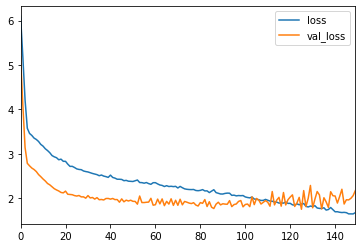

In [20]:
losses = pd.DataFrame(model.history.history)
losses.plot()

from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score
predictions = model.predict(X_test)

print("MSE: ",mean_squared_error(y_test,predictions) )
print("RMSE: ",np.sqrt(mean_squared_error(y_test,predictions)) )
print("MAE: ",mean_absolute_error(y_test,predictions) )
print("ESV: ", explained_variance_score(y_test, predictions))

In [13]:
#model.save('./savedmodels/57dnn')

In [14]:
# loaded_model = tf.keras.models.load_model('./savedmodels/57dnn/')
# predictions = loaded_model.predict(X_test)
# print("MSE: ",mean_squared_error(y_test,predictions) )
# print("RMSE: ",np.sqrt(mean_squared_error(y_test,predictions)) )
# print("MAE: ",mean_absolute_error(y_test,predictions) )
# print("ESV: ", explained_variance_score(y_test, predictions))

In [ ]:
while True:
# for i in range(10):
    
    X_train.shape
    model = Sequential()

    model.add(Dense(24, activation="relu"))
    model.add(Dense(10, activation="relu"))
    model.add(Dense(10, activation="relu"))
    
    model.add(Dense(1))

    model.compile(optimizer="adam", loss="mse")
    model.fit(x=X_train, y= y_train, validation_data=(X_test,y_test),batch_size=32,epochs=125)
    
    predictions = model.predict(X_test)
    print('\n'+'\n'+"ESV: " + str(explained_variance_score(y_test,predictions))+ '\n'+'\n'+'\n')
    if(explained_variance_score(y_test,predictions) > .60):
        winsound.Beep(1024, 2000)
        break

winsound.Beep(1024, 2000)
winsound.Beep(1024, 2000)
winsound.Beep(1024, 2000)

Epoch 1/125
13/13 [==============================] - 0s 9ms/step - loss: 6.2114 - val_loss: 5.4495
Epoch 2/125
13/13 [==============================] - 0s 3ms/step - loss: 5.6413 - val_loss: 4.8222
Epoch 3/125
13/13 [==============================] - 0s 3ms/step - loss: 4.9838 - val_loss: 4.1131
Epoch 4/125
13/13 [==============================] - 0s 3ms/step - loss: 4.2859 - val_loss: 3.4764
Epoch 5/125
13/13 [==============================] - 0s 3ms/step - loss: 3.8448 - val_loss: 3.1303
Epoch 6/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6923 - val_loss: 3.0617
Epoch 7/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6243 - val_loss: 2.9861
Epoch 8/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5568 - val_loss: 2.9183
Epoch 9/125
13/13 [==============================] - 0s 2ms/step - loss: 3.5030 - val_loss: 2.8467
Epoch 10/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4401 - val_loss: 2.7780
Epoch 11/

Epoch 83/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0544 - val_loss: 1.8949
Epoch 84/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0501 - val_loss: 1.8998
Epoch 85/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0276 - val_loss: 1.8737
Epoch 86/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0098 - val_loss: 1.8983
Epoch 87/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0136 - val_loss: 1.8534
Epoch 88/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9864 - val_loss: 1.9281
Epoch 89/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9742 - val_loss: 1.8801
Epoch 90/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9723 - val_loss: 1.8750
Epoch 91/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9607 - val_loss: 1.8891
Epoch 92/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9743 - val_loss: 1.9449


13/13 [==============================] - 0s 4ms/step - loss: 2.8030 - val_loss: 2.1309
Epoch 40/125
13/13 [==============================] - 0s 5ms/step - loss: 2.7893 - val_loss: 2.1695
Epoch 41/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7711 - val_loss: 2.1160
Epoch 42/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7475 - val_loss: 2.1437
Epoch 43/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7351 - val_loss: 2.1224
Epoch 44/125
13/13 [==============================] - 0s 4ms/step - loss: 2.7236 - val_loss: 2.1070
Epoch 45/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7232 - val_loss: 2.1046
Epoch 46/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7205 - val_loss: 2.1082
Epoch 47/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6993 - val_loss: 2.0989
Epoch 48/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6950 - val_loss: 2.0893
Epoch 49/125


13/13 [==============================] - 0s 5ms/step - loss: 2.2624 - val_loss: 1.8187
Epoch 121/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2925 - val_loss: 1.9220
Epoch 122/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2572 - val_loss: 1.8699
Epoch 123/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2343 - val_loss: 1.8340
Epoch 124/125
13/13 [==============================] - 0s 4ms/step - loss: 2.2082 - val_loss: 1.8469
Epoch 125/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2062 - val_loss: 1.8517


ESV: 0.49168610770852095



Epoch 1/125
13/13 [==============================] - 0s 9ms/step - loss: 6.9019 - val_loss: 6.1429
Epoch 2/125
13/13 [==============================] - 0s 3ms/step - loss: 6.2729 - val_loss: 5.3922
Epoch 3/125
13/13 [==============================] - 0s 3ms/step - loss: 5.4626 - val_loss: 4.4978
Epoch 4/125
13/13 [==============================] - 0s 4ms/step - loss: 4.6142 -

Epoch 77/125
13/13 [==============================] - 0s 2ms/step - loss: 1.9523 - val_loss: 2.1655
Epoch 78/125
13/13 [==============================] - 0s 2ms/step - loss: 2.0006 - val_loss: 2.0907
Epoch 79/125
13/13 [==============================] - 0s 2ms/step - loss: 1.9951 - val_loss: 2.4793
Epoch 80/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9692 - val_loss: 2.0438
Epoch 81/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8969 - val_loss: 2.5145
Epoch 82/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9732 - val_loss: 2.0947
Epoch 83/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9118 - val_loss: 2.1454
Epoch 84/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9322 - val_loss: 2.2594
Epoch 85/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8932 - val_loss: 2.2028
Epoch 86/125
13/13 [==============================] - 0s 2ms/step - loss: 1.9063 - val_loss: 2.2581


13/13 [==============================] - 0s 3ms/step - loss: 2.5116 - val_loss: 1.9899
Epoch 34/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5083 - val_loss: 1.9629
Epoch 35/125
13/13 [==============================] - 0s 2ms/step - loss: 2.5134 - val_loss: 1.9833
Epoch 36/125
13/13 [==============================] - 0s 2ms/step - loss: 2.4768 - val_loss: 2.0346
Epoch 37/125
13/13 [==============================] - 0s 2ms/step - loss: 2.4568 - val_loss: 1.9644
Epoch 38/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4846 - val_loss: 2.1083
Epoch 39/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4318 - val_loss: 1.9578
Epoch 40/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4356 - val_loss: 1.9368
Epoch 41/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4109 - val_loss: 2.0864
Epoch 42/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3828 - val_loss: 1.9163
Epoch 43/125


Epoch 115/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6049 - val_loss: 1.8759
Epoch 116/125
13/13 [==============================] - 0s 2ms/step - loss: 1.5994 - val_loss: 1.7892
Epoch 117/125
13/13 [==============================] - 0s 2ms/step - loss: 1.6147 - val_loss: 1.6665
Epoch 118/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6646 - val_loss: 2.0621
Epoch 119/125
13/13 [==============================] - 0s 2ms/step - loss: 1.5546 - val_loss: 1.7210
Epoch 120/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5539 - val_loss: 1.8177
Epoch 121/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5445 - val_loss: 1.8974
Epoch 122/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5347 - val_loss: 1.7621
Epoch 123/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5169 - val_loss: 1.8791
Epoch 124/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5011 - val_los

13/13 [==============================] - 0s 3ms/step - loss: 2.0549 - val_loss: 1.7374
Epoch 72/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0523 - val_loss: 1.8634
Epoch 73/125
13/13 [==============================] - 0s 2ms/step - loss: 2.0459 - val_loss: 1.9415
Epoch 74/125
13/13 [==============================] - 0s 2ms/step - loss: 1.9992 - val_loss: 1.9440
Epoch 75/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9675 - val_loss: 1.8375
Epoch 76/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0322 - val_loss: 1.7252
Epoch 77/125
13/13 [==============================] - 0s 2ms/step - loss: 2.0104 - val_loss: 2.0113
Epoch 78/125
13/13 [==============================] - 0s 2ms/step - loss: 1.9785 - val_loss: 1.8152
Epoch 79/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9518 - val_loss: 1.9009
Epoch 80/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9358 - val_loss: 1.8750
Epoch 81/125


13/13 [==============================] - 0s 3ms/step - loss: 2.5751 - val_loss: 2.0606
Epoch 28/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5298 - val_loss: 2.0606
Epoch 29/125
13/13 [==============================] - 0s 2ms/step - loss: 2.5178 - val_loss: 2.0476
Epoch 30/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4869 - val_loss: 2.0231
Epoch 31/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4622 - val_loss: 2.0274
Epoch 32/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4491 - val_loss: 1.9863
Epoch 33/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4320 - val_loss: 2.0015
Epoch 34/125
13/13 [==============================] - 0s 2ms/step - loss: 2.5500 - val_loss: 1.9710
Epoch 35/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4830 - val_loss: 1.9743
Epoch 36/125
13/13 [==============================] - 0s 2ms/step - loss: 2.3881 - val_loss: 1.9821
Epoch 37/125


13/13 [==============================] - 0s 3ms/step - loss: 1.2966 - val_loss: 2.0794
Epoch 109/125
13/13 [==============================] - 0s 2ms/step - loss: 1.2899 - val_loss: 1.9587
Epoch 110/125
13/13 [==============================] - 0s 3ms/step - loss: 1.2910 - val_loss: 2.0136
Epoch 111/125
13/13 [==============================] - 0s 3ms/step - loss: 1.2275 - val_loss: 1.9829
Epoch 112/125
13/13 [==============================] - 0s 3ms/step - loss: 1.2614 - val_loss: 2.0990
Epoch 113/125
13/13 [==============================] - 0s 3ms/step - loss: 1.2745 - val_loss: 2.0621
Epoch 114/125
13/13 [==============================] - 0s 3ms/step - loss: 1.1947 - val_loss: 2.0200
Epoch 115/125
13/13 [==============================] - 0s 2ms/step - loss: 1.1912 - val_loss: 1.9880
Epoch 116/125
13/13 [==============================] - 0s 3ms/step - loss: 1.2028 - val_loss: 2.0376
Epoch 117/125
13/13 [==============================] - 0s 2ms/step - loss: 1.1670 - val_loss: 2.0148
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 2.3344 - val_loss: 1.8890
Epoch 65/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3083 - val_loss: 1.8818
Epoch 66/125
13/13 [==============================] - 0s 2ms/step - loss: 2.3115 - val_loss: 1.8816
Epoch 67/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3105 - val_loss: 1.8915
Epoch 68/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3753 - val_loss: 2.0505
Epoch 69/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3505 - val_loss: 1.9316
Epoch 70/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2969 - val_loss: 1.8641
Epoch 71/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2427 - val_loss: 1.9370
Epoch 72/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2428 - val_loss: 1.8639
Epoch 73/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2466 - val_loss: 2.0209
Epoch 74/125


13/13 [==============================] - 0s 3ms/step - loss: 2.7575 - val_loss: 2.2383
Epoch 21/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7401 - val_loss: 2.1905
Epoch 22/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7127 - val_loss: 2.1589
Epoch 23/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7461 - val_loss: 2.1637
Epoch 24/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6900 - val_loss: 2.1411
Epoch 25/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6313 - val_loss: 2.1371
Epoch 26/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6247 - val_loss: 2.1070
Epoch 27/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6034 - val_loss: 2.1207
Epoch 28/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5864 - val_loss: 2.0773
Epoch 29/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5703 - val_loss: 2.1171
Epoch 30/125


13/13 [==============================] - 0s 3ms/step - loss: 1.9162 - val_loss: 1.9206
Epoch 103/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9300 - val_loss: 2.0630
Epoch 104/125
13/13 [==============================] - 0s 2ms/step - loss: 1.8839 - val_loss: 1.8122
Epoch 105/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8609 - val_loss: 2.0179
Epoch 106/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8646 - val_loss: 1.9571
Epoch 107/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8392 - val_loss: 1.9040
Epoch 108/125
13/13 [==============================] - 0s 2ms/step - loss: 1.8358 - val_loss: 1.9328
Epoch 109/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8094 - val_loss: 1.9556
Epoch 110/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8080 - val_loss: 1.8653
Epoch 111/125
13/13 [==============================] - 0s 2ms/step - loss: 1.7745 - val_loss: 2.1108
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 2.2072 - val_loss: 2.2542
Epoch 59/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2347 - val_loss: 1.8746
Epoch 60/125
13/13 [==============================] - 0s 2ms/step - loss: 2.2852 - val_loss: 1.8737
Epoch 61/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2503 - val_loss: 2.3300
Epoch 62/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2623 - val_loss: 2.0652
Epoch 63/125
13/13 [==============================] - 0s 2ms/step - loss: 2.1993 - val_loss: 1.9077
Epoch 64/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1557 - val_loss: 2.1870
Epoch 65/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1252 - val_loss: 2.0590
Epoch 66/125
13/13 [==============================] - 0s 2ms/step - loss: 2.1301 - val_loss: 2.0416
Epoch 67/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0953 - val_loss: 1.9430
Epoch 68/125


13/13 [==============================] - 0s 2ms/step - loss: 3.5291 - val_loss: 2.9464
Epoch 15/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4789 - val_loss: 2.8882
Epoch 16/125
13/13 [==============================] - 0s 2ms/step - loss: 3.4308 - val_loss: 2.8333
Epoch 17/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3805 - val_loss: 2.7784
Epoch 18/125
13/13 [==============================] - 0s 2ms/step - loss: 3.3453 - val_loss: 2.7193
Epoch 19/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2743 - val_loss: 2.6655
Epoch 20/125
13/13 [==============================] - 0s 2ms/step - loss: 3.2195 - val_loss: 2.6001
Epoch 21/125
13/13 [==============================] - 0s 2ms/step - loss: 3.1554 - val_loss: 2.5346
Epoch 22/125
13/13 [==============================] - 0s 2ms/step - loss: 3.0913 - val_loss: 2.4664
Epoch 23/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0214 - val_loss: 2.3964
Epoch 24/125


13/13 [==============================] - 0s 3ms/step - loss: 1.9947 - val_loss: 1.8081
Epoch 97/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9842 - val_loss: 1.7556
Epoch 98/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9709 - val_loss: 1.8215
Epoch 99/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9462 - val_loss: 1.7431
Epoch 100/125
13/13 [==============================] - 0s 2ms/step - loss: 1.9360 - val_loss: 1.7274
Epoch 101/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9841 - val_loss: 1.8995
Epoch 102/125
13/13 [==============================] - 0s 2ms/step - loss: 1.9970 - val_loss: 1.7197
Epoch 103/125
13/13 [==============================] - 0s 2ms/step - loss: 1.8972 - val_loss: 1.8003
Epoch 104/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8974 - val_loss: 1.8147
Epoch 105/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8754 - val_loss: 1.7191
Epoch 1

13/13 [==============================] - 0s 3ms/step - loss: 2.4225 - val_loss: 2.0346
Epoch 53/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4014 - val_loss: 2.0644
Epoch 54/125
13/13 [==============================] - 0s 2ms/step - loss: 2.3943 - val_loss: 2.0192
Epoch 55/125
13/13 [==============================] - 0s 2ms/step - loss: 2.3866 - val_loss: 2.0566
Epoch 56/125
13/13 [==============================] - 0s 2ms/step - loss: 2.3711 - val_loss: 2.0186
Epoch 57/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3447 - val_loss: 2.0484
Epoch 58/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3342 - val_loss: 2.0373
Epoch 59/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3463 - val_loss: 2.0218
Epoch 60/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3190 - val_loss: 2.0462
Epoch 61/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2917 - val_loss: 2.0900
Epoch 62/125


13/13 [==============================] - 0s 2ms/step - loss: 3.7140 - val_loss: 3.1361
Epoch 9/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6707 - val_loss: 3.0506
Epoch 10/125
13/13 [==============================] - 0s 2ms/step - loss: 3.6101 - val_loss: 2.9965
Epoch 11/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5765 - val_loss: 2.9410
Epoch 12/125
13/13 [==============================] - 0s 2ms/step - loss: 3.5020 - val_loss: 2.8705
Epoch 13/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4435 - val_loss: 2.8197
Epoch 14/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3913 - val_loss: 2.7673
Epoch 15/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3302 - val_loss: 2.6818
Epoch 16/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2786 - val_loss: 2.6359
Epoch 17/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2259 - val_loss: 2.6028
Epoch 18/125
1

13/13 [==============================] - 0s 3ms/step - loss: 2.2745 - val_loss: 1.9238
Epoch 91/125
13/13 [==============================] - 0s 2ms/step - loss: 2.2625 - val_loss: 1.9006
Epoch 92/125
13/13 [==============================] - 0s 2ms/step - loss: 2.2205 - val_loss: 1.9328
Epoch 93/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2341 - val_loss: 1.8966
Epoch 94/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2194 - val_loss: 1.9201
Epoch 95/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2037 - val_loss: 2.0211
Epoch 96/125
13/13 [==============================] - 0s 2ms/step - loss: 2.2020 - val_loss: 1.8906
Epoch 97/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2121 - val_loss: 1.9919
Epoch 98/125
13/13 [==============================] - 0s 2ms/step - loss: 2.1768 - val_loss: 1.8538
Epoch 99/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1652 - val_loss: 1.8861
Epoch 100/125

13/13 [==============================] - 0s 3ms/step - loss: 2.5229 - val_loss: 2.0485
Epoch 47/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4902 - val_loss: 2.0357
Epoch 48/125
13/13 [==============================] - 0s 2ms/step - loss: 2.4763 - val_loss: 2.0439
Epoch 49/125
13/13 [==============================] - 0s 2ms/step - loss: 2.4745 - val_loss: 2.0336
Epoch 50/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4838 - val_loss: 2.0504
Epoch 51/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4746 - val_loss: 2.0335
Epoch 52/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4414 - val_loss: 2.0441
Epoch 53/125
13/13 [==============================] - 0s 2ms/step - loss: 2.4435 - val_loss: 2.0140
Epoch 54/125
13/13 [==============================] - 0s 2ms/step - loss: 2.4546 - val_loss: 2.0315
Epoch 55/125
13/13 [==============================] - 0s 2ms/step - loss: 2.4274 - val_loss: 2.0055
Epoch 56/125


13/13 [==============================] - 0s 3ms/step - loss: 5.3334 - val_loss: 4.1982
Epoch 3/125
13/13 [==============================] - 0s 3ms/step - loss: 4.3849 - val_loss: 3.3727
Epoch 4/125
13/13 [==============================] - 0s 2ms/step - loss: 3.8019 - val_loss: 2.9783
Epoch 5/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5932 - val_loss: 2.8958
Epoch 6/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5569 - val_loss: 2.8598
Epoch 7/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5110 - val_loss: 2.8146
Epoch 8/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4682 - val_loss: 2.7571
Epoch 9/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4116 - val_loss: 2.7190
Epoch 10/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3696 - val_loss: 2.6600
Epoch 11/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3199 - val_loss: 2.5964
Epoch 12/125
13/13 [

13/13 [==============================] - 0s 2ms/step - loss: 2.1840 - val_loss: 1.8788
Epoch 85/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1935 - val_loss: 1.8313
Epoch 86/125
13/13 [==============================] - 0s 2ms/step - loss: 2.2048 - val_loss: 1.9120
Epoch 87/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1635 - val_loss: 1.8323
Epoch 88/125
13/13 [==============================] - 0s 2ms/step - loss: 2.1622 - val_loss: 1.8544
Epoch 89/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1908 - val_loss: 1.9737
Epoch 90/125
13/13 [==============================] - 0s 2ms/step - loss: 2.1647 - val_loss: 1.9120
Epoch 91/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1496 - val_loss: 1.8302
Epoch 92/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1193 - val_loss: 1.9863
Epoch 93/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1198 - val_loss: 1.8458
Epoch 94/125


13/13 [==============================] - 0s 3ms/step - loss: 2.4780 - val_loss: 1.9455
Epoch 41/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4544 - val_loss: 1.9125
Epoch 42/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4481 - val_loss: 1.9581
Epoch 43/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4420 - val_loss: 1.9509
Epoch 44/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4248 - val_loss: 1.9001
Epoch 45/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4198 - val_loss: 1.9546
Epoch 46/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4085 - val_loss: 1.9169
Epoch 47/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4173 - val_loss: 1.8718
Epoch 48/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4015 - val_loss: 1.9689
Epoch 49/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4068 - val_loss: 1.9109
Epoch 50/125


Epoch 122/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6111 - val_loss: 1.9294
Epoch 123/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6074 - val_loss: 2.0833
Epoch 124/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6192 - val_loss: 1.8265
Epoch 125/125
13/13 [==============================] - 0s 2ms/step - loss: 1.5919 - val_loss: 2.4445


ESV: 0.4128838768297828



Epoch 1/125
13/13 [==============================] - 0s 7ms/step - loss: 6.5274 - val_loss: 5.7672
Epoch 2/125
13/13 [==============================] - 0s 4ms/step - loss: 5.8682 - val_loss: 5.0723
Epoch 3/125
13/13 [==============================] - 0s 3ms/step - loss: 5.1133 - val_loss: 4.1978
Epoch 4/125
13/13 [==============================] - 0s 3ms/step - loss: 4.3524 - val_loss: 3.4916
Epoch 5/125
13/13 [==============================] - 0s 3ms/step - loss: 3.8536 - val_loss: 3.1522
Epoch 6/125
13/13 [==============================] - 0s 3ms/step - loss:

13/13 [==============================] - 0s 3ms/step - loss: 2.0423 - val_loss: 1.9465
Epoch 79/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0214 - val_loss: 1.6937
Epoch 80/125
13/13 [==============================] - 0s 2ms/step - loss: 2.0293 - val_loss: 1.8857
Epoch 81/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0216 - val_loss: 1.7418
Epoch 82/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0233 - val_loss: 1.9081
Epoch 83/125
13/13 [==============================] - 0s 2ms/step - loss: 1.9914 - val_loss: 1.7383
Epoch 84/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0074 - val_loss: 1.7976
Epoch 85/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0117 - val_loss: 1.8161
Epoch 86/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9491 - val_loss: 1.8213
Epoch 87/125
13/13 [==============================] - 0s 2ms/step - loss: 1.9301 - val_loss: 1.8680
Epoch 88/125


13/13 [==============================] - 0s 2ms/step - loss: 2.8763 - val_loss: 2.2401
Epoch 35/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8595 - val_loss: 2.1943
Epoch 36/125
13/13 [==============================] - 0s 2ms/step - loss: 2.8428 - val_loss: 2.1706
Epoch 37/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7845 - val_loss: 2.1583
Epoch 38/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7564 - val_loss: 2.1835
Epoch 39/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7493 - val_loss: 2.1278
Epoch 40/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7067 - val_loss: 2.1457
Epoch 41/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6763 - val_loss: 2.1467
Epoch 42/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6645 - val_loss: 2.1053
Epoch 43/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6294 - val_loss: 2.0848
Epoch 44/125


13/13 [==============================] - 0s 3ms/step - loss: 1.7414 - val_loss: 1.9349
Epoch 116/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7096 - val_loss: 1.9579
Epoch 117/125
13/13 [==============================] - 0s 2ms/step - loss: 1.7064 - val_loss: 1.8497
Epoch 118/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7115 - val_loss: 1.9918
Epoch 119/125
13/13 [==============================] - 0s 2ms/step - loss: 1.7371 - val_loss: 1.8707
Epoch 120/125
13/13 [==============================] - 0s 2ms/step - loss: 1.6900 - val_loss: 1.9882
Epoch 121/125
13/13 [==============================] - 0s 2ms/step - loss: 1.6748 - val_loss: 1.9636
Epoch 122/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6662 - val_loss: 1.9710
Epoch 123/125
13/13 [==============================] - 0s 2ms/step - loss: 1.6444 - val_loss: 1.8991
Epoch 124/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6532 - val_loss: 2.1315
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 2.1927 - val_loss: 1.8686
Epoch 72/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1287 - val_loss: 1.8072
Epoch 73/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1762 - val_loss: 1.8268
Epoch 74/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1221 - val_loss: 1.8141
Epoch 75/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1005 - val_loss: 1.8338
Epoch 76/125
13/13 [==============================] - 0s 2ms/step - loss: 2.0833 - val_loss: 1.8119
Epoch 77/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0755 - val_loss: 1.7982
Epoch 78/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0785 - val_loss: 1.8838
Epoch 79/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0411 - val_loss: 1.8037
Epoch 80/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0613 - val_loss: 1.8057
Epoch 81/125


13/13 [==============================] - 0s 3ms/step - loss: 2.6183 - val_loss: 2.0675
Epoch 28/125
13/13 [==============================] - 0s 2ms/step - loss: 2.5948 - val_loss: 2.0843
Epoch 29/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5912 - val_loss: 2.0946
Epoch 30/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5585 - val_loss: 2.0642
Epoch 31/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5658 - val_loss: 1.9878
Epoch 32/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5149 - val_loss: 2.1818
Epoch 33/125
13/13 [==============================] - 0s 2ms/step - loss: 2.4903 - val_loss: 2.0014
Epoch 34/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4755 - val_loss: 2.0469
Epoch 35/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4727 - val_loss: 1.9896
Epoch 36/125
13/13 [==============================] - 0s 2ms/step - loss: 2.4800 - val_loss: 2.0655
Epoch 37/125


Epoch 109/125
13/13 [==============================] - 0s 2ms/step - loss: 1.8381 - val_loss: 1.7997
Epoch 110/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8036 - val_loss: 2.0975
Epoch 111/125
13/13 [==============================] - ETA: 0s - loss: 1.736 - 0s 3ms/step - loss: 1.8236 - val_loss: 1.8043
Epoch 112/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7924 - val_loss: 2.0138
Epoch 113/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8178 - val_loss: 1.9859
Epoch 114/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8365 - val_loss: 1.8888
Epoch 115/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7809 - val_loss: 1.8725
Epoch 116/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8101 - val_loss: 1.9977
Epoch 117/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7662 - val_loss: 1.8461
Epoch 118/125
13/13 [==============================] - 0s 3ms/step 

13/13 [==============================] - 0s 3ms/step - loss: 2.3464 - val_loss: 2.1528
Epoch 66/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3205 - val_loss: 2.0133
Epoch 67/125
13/13 [==============================] - 0s 2ms/step - loss: 2.3065 - val_loss: 2.0730
Epoch 68/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2851 - val_loss: 2.1048
Epoch 69/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2817 - val_loss: 2.0203
Epoch 70/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3093 - val_loss: 2.1069
Epoch 71/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2640 - val_loss: 2.1115
Epoch 72/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2612 - val_loss: 2.0228
Epoch 73/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2476 - val_loss: 2.1123
Epoch 74/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2493 - val_loss: 2.0355
Epoch 75/125


13/13 [==============================] - 0s 3ms/step - loss: 2.7929 - val_loss: 2.1416
Epoch 22/125
13/13 [==============================] - 0s 2ms/step - loss: 2.7827 - val_loss: 2.1280
Epoch 23/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7859 - val_loss: 2.1492
Epoch 24/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7464 - val_loss: 2.0918
Epoch 25/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7074 - val_loss: 2.1215
Epoch 26/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7008 - val_loss: 2.0665
Epoch 27/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6713 - val_loss: 2.0630
Epoch 28/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6513 - val_loss: 2.0581
Epoch 29/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6364 - val_loss: 2.0499
Epoch 30/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6424 - val_loss: 2.0566
Epoch 31/125


Epoch 103/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8261 - val_loss: 1.7976
Epoch 104/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8063 - val_loss: 1.7286
Epoch 105/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8639 - val_loss: 1.9989
Epoch 106/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8559 - val_loss: 1.7083
Epoch 107/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7548 - val_loss: 1.8946
Epoch 108/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7930 - val_loss: 1.7947
Epoch 109/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7495 - val_loss: 1.7137
Epoch 110/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7439 - val_loss: 1.8301
Epoch 111/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7188 - val_loss: 1.7124
Epoch 112/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7053 - val_los

13/13 [==============================] - 0s 3ms/step - loss: 2.3654 - val_loss: 1.9236
Epoch 60/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3405 - val_loss: 1.9073
Epoch 61/125
13/13 [==============================] - 0s 2ms/step - loss: 2.3190 - val_loss: 1.9908
Epoch 62/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3248 - val_loss: 1.9395
Epoch 63/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3017 - val_loss: 1.9603
Epoch 64/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3099 - val_loss: 1.9657
Epoch 65/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3023 - val_loss: 1.8821
Epoch 66/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3228 - val_loss: 1.9372
Epoch 67/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2879 - val_loss: 1.9357
Epoch 68/125
13/13 [==============================] - 0s 2ms/step - loss: 2.3070 - val_loss: 1.8731
Epoch 69/125


13/13 [==============================] - 0s 3ms/step - loss: 3.3221 - val_loss: 2.7046
Epoch 16/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2766 - val_loss: 2.6527
Epoch 17/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2347 - val_loss: 2.6120
Epoch 18/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1975 - val_loss: 2.5867
Epoch 19/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1155 - val_loss: 2.5162
Epoch 20/125
13/13 [==============================] - 0s 2ms/step - loss: 3.0734 - val_loss: 2.4818
Epoch 21/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0205 - val_loss: 2.4441
Epoch 22/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9795 - val_loss: 2.3931
Epoch 23/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9290 - val_loss: 2.3456
Epoch 24/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8939 - val_loss: 2.3137
Epoch 25/125


13/13 [==============================] - 0s 3ms/step - loss: 1.7978 - val_loss: 1.8564
Epoch 98/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7606 - val_loss: 1.8677
Epoch 99/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7517 - val_loss: 1.8327
Epoch 100/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7465 - val_loss: 1.8886
Epoch 101/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7210 - val_loss: 1.9006
Epoch 102/125
13/13 [==============================] - 0s 2ms/step - loss: 1.7394 - val_loss: 1.9339
Epoch 103/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7042 - val_loss: 1.8562
Epoch 104/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7244 - val_loss: 1.8736
Epoch 105/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7103 - val_loss: 1.9344
Epoch 106/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6682 - val_loss: 1.8735
Epoch 

13/13 [==============================] - 0s 3ms/step - loss: 2.2957 - val_loss: 1.9938
Epoch 54/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3107 - val_loss: 1.9126
Epoch 55/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2497 - val_loss: 2.0043
Epoch 56/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2554 - val_loss: 1.9081
Epoch 57/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2403 - val_loss: 2.0264
Epoch 58/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2941 - val_loss: 1.9114
Epoch 59/125
13/13 [==============================] - 0s 2ms/step - loss: 2.2225 - val_loss: 1.9890
Epoch 60/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2182 - val_loss: 1.9598
Epoch 61/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2765 - val_loss: 1.9673
Epoch 62/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2410 - val_loss: 1.8674
Epoch 63/125


13/13 [==============================] - 0s 3ms/step - loss: 3.4632 - val_loss: 2.7474
Epoch 10/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4345 - val_loss: 2.7124
Epoch 11/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3976 - val_loss: 2.6701
Epoch 12/125
13/13 [==============================] - 0s 2ms/step - loss: 3.3451 - val_loss: 2.6359
Epoch 13/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3158 - val_loss: 2.5994
Epoch 14/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2931 - val_loss: 2.5688
Epoch 15/125
13/13 [==============================] - 0s 2ms/step - loss: 3.2439 - val_loss: 2.5406
Epoch 16/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2087 - val_loss: 2.4991
Epoch 17/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1748 - val_loss: 2.4672
Epoch 18/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1367 - val_loss: 2.4377
Epoch 19/125


13/13 [==============================] - 0s 3ms/step - loss: 1.7410 - val_loss: 2.0030
Epoch 92/125
13/13 [==============================] - 0s 2ms/step - loss: 1.7264 - val_loss: 1.8453
Epoch 93/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7755 - val_loss: 2.1218
Epoch 94/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6672 - val_loss: 1.8675
Epoch 95/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6718 - val_loss: 1.9773
Epoch 96/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6585 - val_loss: 1.9310
Epoch 97/125
13/13 [==============================] - 0s 2ms/step - loss: 1.6677 - val_loss: 1.9089
Epoch 98/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6826 - val_loss: 2.0924
Epoch 99/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6394 - val_loss: 2.0763
Epoch 100/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6091 - val_loss: 2.0708
Epoch 101/12

13/13 [==============================] - 0s 3ms/step - loss: 2.3041 - val_loss: 2.1170
Epoch 48/125
13/13 [==============================] - 0s 2ms/step - loss: 2.2939 - val_loss: 2.0183
Epoch 49/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2372 - val_loss: 2.0786
Epoch 50/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2002 - val_loss: 2.1198
Epoch 51/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1890 - val_loss: 2.0520
Epoch 52/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1902 - val_loss: 2.1657
Epoch 53/125
13/13 [==============================] - 0s 2ms/step - loss: 2.2096 - val_loss: 1.9821
Epoch 54/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1601 - val_loss: 2.1308
Epoch 55/125
13/13 [==============================] - 0s 2ms/step - loss: 2.1306 - val_loss: 2.0312
Epoch 56/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1486 - val_loss: 1.9798
Epoch 57/125


13/13 [==============================] - 0s 3ms/step - loss: 6.6692 - val_loss: 6.0449
Epoch 4/125
13/13 [==============================] - 0s 3ms/step - loss: 6.3322 - val_loss: 5.6754
Epoch 5/125
13/13 [==============================] - 0s 3ms/step - loss: 5.8780 - val_loss: 5.1533
Epoch 6/125
13/13 [==============================] - 0s 3ms/step - loss: 5.3243 - val_loss: 4.5334
Epoch 7/125
13/13 [==============================] - 0s 3ms/step - loss: 4.7482 - val_loss: 3.9410
Epoch 8/125
13/13 [==============================] - 0s 3ms/step - loss: 4.2411 - val_loss: 3.5023
Epoch 9/125
13/13 [==============================] - 0s 3ms/step - loss: 3.9123 - val_loss: 3.2641
Epoch 10/125
13/13 [==============================] - 0s 3ms/step - loss: 3.7594 - val_loss: 3.1720
Epoch 11/125
13/13 [==============================] - 0s 3ms/step - loss: 3.7225 - val_loss: 3.1294
Epoch 12/125
13/13 [==============================] - 0s 3ms/step - loss: 3.7004 - val_loss: 3.0994
Epoch 13/125
13/13 

13/13 [==============================] - 0s 3ms/step - loss: 2.2766 - val_loss: 1.9556
Epoch 86/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2873 - val_loss: 1.9157
Epoch 87/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2781 - val_loss: 1.8988
Epoch 88/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2624 - val_loss: 1.9351
Epoch 89/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2863 - val_loss: 1.9619
Epoch 90/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2785 - val_loss: 1.8787
Epoch 91/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2544 - val_loss: 1.9176
Epoch 92/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2453 - val_loss: 1.9310
Epoch 93/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2337 - val_loss: 1.8646
Epoch 94/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2570 - val_loss: 1.8662
Epoch 95/125


13/13 [==============================] - 0s 3ms/step - loss: 2.4804 - val_loss: 2.1486
Epoch 42/125
13/13 [==============================] - 0s 2ms/step - loss: 2.4685 - val_loss: 2.0604
Epoch 43/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4736 - val_loss: 2.0608
Epoch 44/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4683 - val_loss: 2.1021
Epoch 45/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4588 - val_loss: 2.0373
Epoch 46/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4476 - val_loss: 2.0829
Epoch 47/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4472 - val_loss: 2.0878
Epoch 48/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4327 - val_loss: 2.0799
Epoch 49/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4025 - val_loss: 2.0806
Epoch 50/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4332 - val_loss: 2.1387
Epoch 51/125


Epoch 123/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8484 - val_loss: 2.0158
Epoch 124/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8272 - val_loss: 1.9709
Epoch 125/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8401 - val_loss: 2.0030


ESV: 0.4486071585384991



Epoch 1/125
13/13 [==============================] - 0s 8ms/step - loss: 7.5536 - val_loss: 6.7004
Epoch 2/125
13/13 [==============================] - 0s 3ms/step - loss: 6.9670 - val_loss: 6.3166
Epoch 3/125
13/13 [==============================] - 0s 3ms/step - loss: 6.6989 - val_loss: 5.9427
Epoch 4/125
13/13 [==============================] - 0s 3ms/step - loss: 6.1942 - val_loss: 5.2423
Epoch 5/125
13/13 [==============================] - 0s 3ms/step - loss: 5.4425 - val_loss: 4.4966
Epoch 6/125
13/13 [==============================] - 0s 3ms/step - loss: 4.7206 - val_loss: 3.7383
Epoch 7/125
13/13 [==============================] - 0s 3ms/step - loss: 4

13/13 [==============================] - 0s 3ms/step - loss: 1.9407 - val_loss: 1.9433
Epoch 80/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9460 - val_loss: 1.9540
Epoch 81/125
13/13 [==============================] - 0s 2ms/step - loss: 1.9055 - val_loss: 2.0512
Epoch 82/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9031 - val_loss: 2.0261
Epoch 83/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8718 - val_loss: 1.9993
Epoch 84/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8668 - val_loss: 2.0263
Epoch 85/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8570 - val_loss: 2.0255
Epoch 86/125
13/13 [==============================] - 0s 2ms/step - loss: 1.8523 - val_loss: 2.0748
Epoch 87/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8202 - val_loss: 2.0591
Epoch 88/125
13/13 [==============================] - 0s 2ms/step - loss: 1.8307 - val_loss: 2.1473
Epoch 89/125


13/13 [==============================] - 0s 3ms/step - loss: 2.6601 - val_loss: 2.1557
Epoch 36/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6440 - val_loss: 2.1268
Epoch 37/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6084 - val_loss: 2.1337
Epoch 38/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5658 - val_loss: 2.1318
Epoch 39/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5679 - val_loss: 2.2147
Epoch 40/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5633 - val_loss: 2.0708
Epoch 41/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5053 - val_loss: 2.1969
Epoch 42/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5372 - val_loss: 2.0319
Epoch 43/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4783 - val_loss: 2.2440
Epoch 44/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4931 - val_loss: 1.9763
Epoch 45/125


Epoch 117/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6566 - val_loss: 1.7891
Epoch 118/125
13/13 [==============================] - 0s 2ms/step - loss: 1.6300 - val_loss: 1.9970
Epoch 119/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6449 - val_loss: 1.8211
Epoch 120/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6891 - val_loss: 2.3480
Epoch 121/125
13/13 [==============================] - 0s 2ms/step - loss: 1.6334 - val_loss: 1.7778
Epoch 122/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5969 - val_loss: 1.9722
Epoch 123/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5967 - val_loss: 1.8963
Epoch 124/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5771 - val_loss: 1.8649
Epoch 125/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5641 - val_loss: 2.0698


ESV: 0.4586584340517098



Epoch 1/125
13/13 [==============================] - 0s 8ms/st

13/13 [==============================] - 0s 3ms/step - loss: 1.9965 - val_loss: 1.9159
Epoch 74/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9512 - val_loss: 1.9480
Epoch 75/125
13/13 [==============================] - 0s 2ms/step - loss: 1.9498 - val_loss: 2.0307
Epoch 76/125
13/13 [==============================] - 0s 2ms/step - loss: 1.9196 - val_loss: 1.8588
Epoch 77/125
13/13 [==============================] - 0s 2ms/step - loss: 1.8971 - val_loss: 2.0546
Epoch 78/125
13/13 [==============================] - 0s 2ms/step - loss: 1.9007 - val_loss: 1.8770
Epoch 79/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8830 - val_loss: 1.9969
Epoch 80/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8686 - val_loss: 1.9920
Epoch 81/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8296 - val_loss: 1.8767
Epoch 82/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8399 - val_loss: 2.0318
Epoch 83/125


13/13 [==============================] - 0s 3ms/step - loss: 2.6703 - val_loss: 2.0525
Epoch 30/125
13/13 [==============================] - 0s 2ms/step - loss: 2.6218 - val_loss: 2.1038
Epoch 31/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6048 - val_loss: 2.0274
Epoch 32/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5757 - val_loss: 2.0381
Epoch 33/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5506 - val_loss: 1.9736
Epoch 34/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5625 - val_loss: 1.9961
Epoch 35/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5244 - val_loss: 2.0022
Epoch 36/125
13/13 [==============================] - 0s 4ms/step - loss: 2.5243 - val_loss: 1.9016
Epoch 37/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5226 - val_loss: 2.0375
Epoch 38/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5360 - val_loss: 1.8894
Epoch 39/125


Epoch 111/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6370 - val_loss: 1.7781
Epoch 112/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6283 - val_loss: 1.8360
Epoch 113/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5882 - val_loss: 1.8287
Epoch 114/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5829 - val_loss: 1.8157
Epoch 115/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5543 - val_loss: 1.8854
Epoch 116/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5603 - val_loss: 1.8276
Epoch 117/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5572 - val_loss: 1.8887
Epoch 118/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5380 - val_loss: 1.8140
Epoch 119/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6017 - val_loss: 1.9094
Epoch 120/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5114 - val_los

13/13 [==============================] - 0s 3ms/step - loss: 2.4181 - val_loss: 1.9470
Epoch 68/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4347 - val_loss: 2.0186
Epoch 69/125
13/13 [==============================] - 0s 2ms/step - loss: 2.4391 - val_loss: 1.9387
Epoch 70/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4317 - val_loss: 1.9703
Epoch 71/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3706 - val_loss: 1.9091
Epoch 72/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4036 - val_loss: 1.9544
Epoch 73/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4155 - val_loss: 1.9013
Epoch 74/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3757 - val_loss: 1.9273
Epoch 75/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3598 - val_loss: 1.8959
Epoch 76/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3800 - val_loss: 1.9249
Epoch 77/125


13/13 [==============================] - 0s 3ms/step - loss: 2.7905 - val_loss: 2.2350
Epoch 24/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7641 - val_loss: 2.2062
Epoch 25/125
13/13 [==============================] - 0s 2ms/step - loss: 2.7518 - val_loss: 2.1640
Epoch 26/125
13/13 [==============================] - 0s 2ms/step - loss: 2.7259 - val_loss: 2.1820
Epoch 27/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6890 - val_loss: 2.1276
Epoch 28/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6646 - val_loss: 2.1458
Epoch 29/125
13/13 [==============================] - ETA: 0s - loss: 2.388 - 0s 3ms/step - loss: 2.6382 - val_loss: 2.1105
Epoch 30/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6281 - val_loss: 2.1054
Epoch 31/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6186 - val_loss: 2.1090
Epoch 32/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5906 - val_lo

13/13 [==============================] - 0s 2ms/step - loss: 1.7875 - val_loss: 1.8606
Epoch 105/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7949 - val_loss: 1.8523
Epoch 106/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8105 - val_loss: 2.0304
Epoch 107/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7521 - val_loss: 1.8137
Epoch 108/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7277 - val_loss: 1.8733
Epoch 109/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7194 - val_loss: 1.9038
Epoch 110/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7151 - val_loss: 1.8393
Epoch 111/125
13/13 [==============================] - 0s 2ms/step - loss: 1.6875 - val_loss: 1.8571
Epoch 112/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7005 - val_loss: 1.8313
Epoch 113/125
13/13 [==============================] - 0s 2ms/step - loss: 1.6704 - val_loss: 1.9176
Epoc

13/13 [==============================] - 0s 2ms/step - loss: 2.2900 - val_loss: 2.0263
Epoch 61/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2832 - val_loss: 1.8966
Epoch 62/125
13/13 [==============================] - 0s 2ms/step - loss: 2.2846 - val_loss: 1.9325
Epoch 63/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2224 - val_loss: 1.8676
Epoch 64/125
13/13 [==============================] - 0s 2ms/step - loss: 2.2667 - val_loss: 2.0291
Epoch 65/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2303 - val_loss: 1.8642
Epoch 66/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1741 - val_loss: 1.9497
Epoch 67/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1837 - val_loss: 1.8645
Epoch 68/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1611 - val_loss: 1.8602
Epoch 69/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1772 - val_loss: 1.9058
Epoch 70/125


13/13 [==============================] - 0s 3ms/step - loss: 3.0482 - val_loss: 2.3580
Epoch 17/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0210 - val_loss: 2.3048
Epoch 18/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9533 - val_loss: 2.2752
Epoch 19/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9446 - val_loss: 2.2235
Epoch 20/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8834 - val_loss: 2.1896
Epoch 21/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8580 - val_loss: 2.1631
Epoch 22/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8311 - val_loss: 2.1302
Epoch 23/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8095 - val_loss: 2.1226
Epoch 24/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7863 - val_loss: 2.0873
Epoch 25/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7598 - val_loss: 2.0799
Epoch 26/125


13/13 [==============================] - 0s 3ms/step - loss: 1.9430 - val_loss: 1.8276
Epoch 99/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8633 - val_loss: 1.7381
Epoch 100/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8430 - val_loss: 1.7603
Epoch 101/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8250 - val_loss: 1.6807
Epoch 102/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8121 - val_loss: 1.7204
Epoch 103/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8209 - val_loss: 1.6968
Epoch 104/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8188 - val_loss: 1.7190
Epoch 105/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8100 - val_loss: 1.7925
Epoch 106/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7761 - val_loss: 1.8290
Epoch 107/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7445 - val_loss: 1.7182
Epoch

13/13 [==============================] - 0s 3ms/step - loss: 2.3168 - val_loss: 2.2001
Epoch 55/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3157 - val_loss: 2.0850
Epoch 56/125
13/13 [==============================] - 0s 2ms/step - loss: 2.2841 - val_loss: 2.2845
Epoch 57/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2932 - val_loss: 1.9935
Epoch 58/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2637 - val_loss: 2.2047
Epoch 59/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2404 - val_loss: 2.0342
Epoch 60/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2306 - val_loss: 2.1265
Epoch 61/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2395 - val_loss: 2.0102
Epoch 62/125
13/13 [==============================] - 0s 2ms/step - loss: 2.2884 - val_loss: 2.2784
Epoch 63/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2635 - val_loss: 1.9195
Epoch 64/125


13/13 [==============================] - 0s 3ms/step - loss: 3.3904 - val_loss: 2.6904
Epoch 11/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3028 - val_loss: 2.6041
Epoch 12/125
13/13 [==============================] - 0s 2ms/step - loss: 3.2259 - val_loss: 2.5581
Epoch 13/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1335 - val_loss: 2.4774
Epoch 14/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0752 - val_loss: 2.4190
Epoch 15/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0205 - val_loss: 2.4668
Epoch 16/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9351 - val_loss: 2.3155
Epoch 17/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9117 - val_loss: 2.3007
Epoch 18/125
13/13 [==============================] - 0s 2ms/step - loss: 2.8597 - val_loss: 2.2481
Epoch 19/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7872 - val_loss: 2.1891
Epoch 20/125


Epoch 92/125
13/13 [==============================] - 0s 2ms/step - loss: 1.5505 - val_loss: 1.7872
Epoch 93/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6196 - val_loss: 1.9934
Epoch 94/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5764 - val_loss: 1.8068
Epoch 95/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5236 - val_loss: 1.9289
Epoch 96/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5399 - val_loss: 1.9765
Epoch 97/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5217 - val_loss: 1.8710
Epoch 98/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5514 - val_loss: 1.7840
Epoch 99/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5243 - val_loss: 1.8252
Epoch 100/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5593 - val_loss: 2.2070
Epoch 101/125
13/13 [==============================] - 0s 2ms/step - loss: 1.6059 - val_loss: 1.822

13/13 [==============================] - 0s 2ms/step - loss: 2.4475 - val_loss: 2.0651
Epoch 49/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4051 - val_loss: 2.0940
Epoch 50/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3930 - val_loss: 2.1174
Epoch 51/125
13/13 [==============================] - 0s 2ms/step - loss: 2.3829 - val_loss: 2.0287
Epoch 52/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3588 - val_loss: 2.0882
Epoch 53/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3828 - val_loss: 2.1337
Epoch 54/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3779 - val_loss: 2.0070
Epoch 55/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3904 - val_loss: 2.1215
Epoch 56/125
13/13 [==============================] - 0s 2ms/step - loss: 2.3535 - val_loss: 1.9967
Epoch 57/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3203 - val_loss: 2.1134
Epoch 58/125


13/13 [==============================] - 0s 3ms/step - loss: 3.5072 - val_loss: 2.9175
Epoch 5/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4225 - val_loss: 2.8064
Epoch 6/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3443 - val_loss: 2.7367
Epoch 7/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2808 - val_loss: 2.6649
Epoch 8/125
13/13 [==============================] - 0s 2ms/step - loss: 3.2244 - val_loss: 2.6054
Epoch 9/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1606 - val_loss: 2.5435
Epoch 10/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1039 - val_loss: 2.4888
Epoch 11/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0592 - val_loss: 2.4379
Epoch 12/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0074 - val_loss: 2.3869
Epoch 13/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9559 - val_loss: 2.3679
Epoch 14/125
13/13

13/13 [==============================] - 0s 2ms/step - loss: 1.9746 - val_loss: 2.0836
Epoch 87/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0126 - val_loss: 2.3099
Epoch 88/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0079 - val_loss: 1.9952
Epoch 89/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0633 - val_loss: 2.0633
Epoch 90/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0464 - val_loss: 2.1805
Epoch 91/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9678 - val_loss: 2.1098
Epoch 92/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9572 - val_loss: 2.0353
Epoch 93/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9637 - val_loss: 2.2416
Epoch 94/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9409 - val_loss: 2.0580
Epoch 95/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9173 - val_loss: 2.1197
Epoch 96/125


13/13 [==============================] - 0s 3ms/step - loss: 2.4762 - val_loss: 1.8897
Epoch 43/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4831 - val_loss: 1.8165
Epoch 44/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4876 - val_loss: 1.8478
Epoch 45/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4553 - val_loss: 1.8393
Epoch 46/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4556 - val_loss: 1.8271
Epoch 47/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4438 - val_loss: 1.8317
Epoch 48/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4541 - val_loss: 1.8136
Epoch 49/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4736 - val_loss: 1.9301
Epoch 50/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4064 - val_loss: 1.7759
Epoch 51/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4311 - val_loss: 1.8878
Epoch 52/125


Epoch 124/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5615 - val_loss: 1.9417
Epoch 125/125
13/13 [==============================] - 0s 2ms/step - loss: 1.5223 - val_loss: 1.9575


ESV: 0.4743920722814434



Epoch 1/125
13/13 [==============================] - 0s 7ms/step - loss: 6.8753 - val_loss: 6.2419
Epoch 2/125
13/13 [==============================] - 0s 3ms/step - loss: 6.5710 - val_loss: 5.8427
Epoch 3/125
13/13 [==============================] - 0s 3ms/step - loss: 6.1242 - val_loss: 5.2998
Epoch 4/125
13/13 [==============================] - 0s 3ms/step - loss: 5.4976 - val_loss: 4.4636
Epoch 5/125
13/13 [==============================] - 0s 3ms/step - loss: 4.6442 - val_loss: 3.5673
Epoch 6/125
13/13 [==============================] - 0s 2ms/step - loss: 3.9769 - val_loss: 3.1025
Epoch 7/125
13/13 [==============================] - 0s 3ms/step - loss: 3.7727 - val_loss: 3.0189
Epoch 8/125
13/13 [==============================] - 0s 3ms/step - loss: 3.7

13/13 [==============================] - 0s 3ms/step - loss: 2.2808 - val_loss: 1.8564
Epoch 81/125
13/13 [==============================] - 0s 2ms/step - loss: 2.2717 - val_loss: 1.8128
Epoch 82/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2680 - val_loss: 1.8760
Epoch 83/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2759 - val_loss: 1.8768
Epoch 84/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2752 - val_loss: 1.8464
Epoch 85/125
13/13 [==============================] - 0s 2ms/step - loss: 2.2788 - val_loss: 1.8849
Epoch 86/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3323 - val_loss: 1.7769
Epoch 87/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2592 - val_loss: 1.9505
Epoch 88/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2411 - val_loss: 1.7726
Epoch 89/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2901 - val_loss: 1.8689
Epoch 90/125


13/13 [==============================] - 0s 3ms/step - loss: 2.4785 - val_loss: 1.9806
Epoch 37/125
13/13 [==============================] - 0s 2ms/step - loss: 2.4415 - val_loss: 2.0241
Epoch 38/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4472 - val_loss: 1.9919
Epoch 39/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4631 - val_loss: 1.9578
Epoch 40/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4262 - val_loss: 2.0873
Epoch 41/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4392 - val_loss: 1.9866
Epoch 42/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4025 - val_loss: 2.0625
Epoch 43/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3896 - val_loss: 1.9958
Epoch 44/125
13/13 [==============================] - 0s 2ms/step - loss: 2.3995 - val_loss: 1.9977
Epoch 45/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3925 - val_loss: 1.9790
Epoch 46/125


Epoch 118/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7069 - val_loss: 2.2560
Epoch 119/125
13/13 [==============================] - 0s 2ms/step - loss: 1.7407 - val_loss: 2.0162
Epoch 120/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6895 - val_loss: 2.2307
Epoch 121/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6861 - val_loss: 2.0645
Epoch 122/125
13/13 [==============================] - 0s 2ms/step - loss: 1.6689 - val_loss: 2.1781
Epoch 123/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6622 - val_loss: 2.2333
Epoch 124/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6717 - val_loss: 2.2460
Epoch 125/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6888 - val_loss: 2.3972


ESV: 0.401619316545333



Epoch 1/125
13/13 [==============================] - 0s 8ms/step - loss: 7.0518 - val_loss: 6.2245
Epoch 2/125
13/13 [==============================] - 0s 3ms/step 

13/13 [==============================] - 0s 3ms/step - loss: 2.2430 - val_loss: 1.8164
Epoch 75/125
13/13 [==============================] - 0s 2ms/step - loss: 2.2494 - val_loss: 1.8856
Epoch 76/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2416 - val_loss: 1.8187
Epoch 77/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2527 - val_loss: 1.8343
Epoch 78/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2718 - val_loss: 1.8367
Epoch 79/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2082 - val_loss: 1.9114
Epoch 80/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2136 - val_loss: 1.7771
Epoch 81/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1743 - val_loss: 1.9326
Epoch 82/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1902 - val_loss: 1.7857
Epoch 83/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1696 - val_loss: 1.7977
Epoch 84/125


13/13 [==============================] - 0s 3ms/step - loss: 2.8925 - val_loss: 2.2286
Epoch 31/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8473 - val_loss: 2.2411
Epoch 32/125
13/13 [==============================] - 0s 2ms/step - loss: 2.8340 - val_loss: 2.2207
Epoch 33/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7973 - val_loss: 2.1850
Epoch 34/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7737 - val_loss: 2.1334
Epoch 35/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7373 - val_loss: 2.1055
Epoch 36/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7207 - val_loss: 2.0924
Epoch 37/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6903 - val_loss: 2.0574
Epoch 38/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6885 - val_loss: 2.1264
Epoch 39/125
13/13 [==============================] - 0s 2ms/step - loss: 2.6321 - val_loss: 2.0120
Epoch 40/125


Epoch 112/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0056 - val_loss: 1.8973
Epoch 113/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0033 - val_loss: 1.7870
Epoch 114/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0012 - val_loss: 1.8414
Epoch 115/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9781 - val_loss: 1.8462
Epoch 116/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9860 - val_loss: 1.9316
Epoch 117/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9649 - val_loss: 1.8159
Epoch 118/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9651 - val_loss: 1.8421
Epoch 119/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9923 - val_loss: 1.7889
Epoch 120/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9601 - val_loss: 1.8540
Epoch 121/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9749 - val_los

13/13 [==============================] - 0s 3ms/step - loss: 2.2921 - val_loss: 1.9046
Epoch 69/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3006 - val_loss: 2.0110
Epoch 70/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2727 - val_loss: 1.9127
Epoch 71/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2904 - val_loss: 1.8947
Epoch 72/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3362 - val_loss: 1.8564
Epoch 73/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2965 - val_loss: 1.9362
Epoch 74/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2736 - val_loss: 1.8718
Epoch 75/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2605 - val_loss: 1.8701
Epoch 76/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2320 - val_loss: 1.9708
Epoch 77/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2235 - val_loss: 1.8892
Epoch 78/125


13/13 [==============================] - 0s 3ms/step - loss: 2.6860 - val_loss: 2.4483
Epoch 25/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6958 - val_loss: 2.3016
Epoch 26/125
13/13 [==============================] - 0s 2ms/step - loss: 2.6417 - val_loss: 2.3645
Epoch 27/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6122 - val_loss: 2.1806
Epoch 28/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6285 - val_loss: 2.5291
Epoch 29/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6199 - val_loss: 2.1815
Epoch 30/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5650 - val_loss: 2.2533
Epoch 31/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5376 - val_loss: 2.1868
Epoch 32/125
13/13 [==============================] - 0s 2ms/step - loss: 2.5404 - val_loss: 2.3404
Epoch 33/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5421 - val_loss: 2.1527
Epoch 34/125


Epoch 106/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5369 - val_loss: 1.8675
Epoch 107/125
13/13 [==============================] - 0s 2ms/step - loss: 1.5564 - val_loss: 2.0021
Epoch 108/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6001 - val_loss: 1.9802
Epoch 109/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5606 - val_loss: 1.9008
Epoch 110/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4886 - val_loss: 2.0481
Epoch 111/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5583 - val_loss: 1.8705
Epoch 112/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5619 - val_loss: 2.1965
Epoch 113/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4932 - val_loss: 1.8822
Epoch 114/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4638 - val_loss: 1.9815
Epoch 115/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4438 - val_los

13/13 [==============================] - 0s 3ms/step - loss: 2.3958 - val_loss: 2.0267
Epoch 63/125
13/13 [==============================] - 0s 2ms/step - loss: 2.3955 - val_loss: 1.9438
Epoch 64/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3884 - val_loss: 2.0685
Epoch 65/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3796 - val_loss: 1.9891
Epoch 66/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3938 - val_loss: 1.9725
Epoch 67/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3735 - val_loss: 1.9639
Epoch 68/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3644 - val_loss: 1.9990
Epoch 69/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3591 - val_loss: 1.9419
Epoch 70/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3681 - val_loss: 2.0720
Epoch 71/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3716 - val_loss: 1.9542
Epoch 72/125


13/13 [==============================] - 0s 3ms/step - loss: 2.7486 - val_loss: 2.1371
Epoch 19/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7718 - val_loss: 2.1005
Epoch 20/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6985 - val_loss: 2.0693
Epoch 21/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6779 - val_loss: 2.0649
Epoch 22/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6741 - val_loss: 2.0290
Epoch 23/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6020 - val_loss: 2.0194
Epoch 24/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5685 - val_loss: 2.0068
Epoch 25/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5530 - val_loss: 1.9805
Epoch 26/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5571 - val_loss: 1.9934
Epoch 27/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5087 - val_loss: 1.9498
Epoch 28/125


13/13 [==============================] - 0s 3ms/step - loss: 1.5668 - val_loss: 1.8495
Epoch 101/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5690 - val_loss: 1.9197
Epoch 102/125
13/13 [==============================] - 0s 2ms/step - loss: 1.5470 - val_loss: 1.7243
Epoch 103/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5322 - val_loss: 1.8118
Epoch 104/125
13/13 [==============================] - 0s 2ms/step - loss: 1.5436 - val_loss: 1.9324
Epoch 105/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5246 - val_loss: 1.7254
Epoch 106/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5067 - val_loss: 1.7822
Epoch 107/125
13/13 [==============================] - ETA: 0s - loss: 3.025 - 0s 3ms/step - loss: 1.4806 - val_loss: 1.7292
Epoch 108/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5052 - val_loss: 1.7296
Epoch 109/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4519

13/13 [==============================] - 0s 2ms/step - loss: 2.2627 - val_loss: 1.8671
Epoch 57/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2613 - val_loss: 1.8475
Epoch 58/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2712 - val_loss: 1.8243
Epoch 59/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2607 - val_loss: 1.8680
Epoch 60/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2453 - val_loss: 1.8500
Epoch 61/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2196 - val_loss: 1.9460
Epoch 62/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2250 - val_loss: 1.8423
Epoch 63/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2807 - val_loss: 1.8284
Epoch 64/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2142 - val_loss: 1.8227
Epoch 65/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1857 - val_loss: 1.8981
Epoch 66/125


13/13 [==============================] - 0s 3ms/step - loss: 3.5601 - val_loss: 2.8488
Epoch 13/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5381 - val_loss: 2.8269
Epoch 14/125
13/13 [==============================] - 0s 2ms/step - loss: 3.4956 - val_loss: 2.7838
Epoch 15/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4595 - val_loss: 2.7418
Epoch 16/125
13/13 [==============================] - ETA: 0s - loss: 1.937 - 0s 3ms/step - loss: 3.4289 - val_loss: 2.7001
Epoch 17/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3857 - val_loss: 2.6411
Epoch 18/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3268 - val_loss: 2.5920
Epoch 19/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2790 - val_loss: 2.5385
Epoch 20/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2241 - val_loss: 2.4821
Epoch 21/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1751 - val_lo

Epoch 94/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8373 - val_loss: 1.6759
Epoch 95/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8121 - val_loss: 1.6438
Epoch 96/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8040 - val_loss: 1.7695
Epoch 97/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8417 - val_loss: 1.6275
Epoch 98/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7680 - val_loss: 1.6669
Epoch 99/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7312 - val_loss: 1.6716
Epoch 100/125
13/13 [==============================] - 0s 2ms/step - loss: 1.7230 - val_loss: 1.6749
Epoch 101/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7015 - val_loss: 1.6924
Epoch 102/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6999 - val_loss: 1.6822
Epoch 103/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6853 - val_loss: 1.6

13/13 [==============================] - 0s 2ms/step - loss: 2.4372 - val_loss: 2.0170
Epoch 51/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3635 - val_loss: 1.9161
Epoch 52/125
13/13 [==============================] - 0s 2ms/step - loss: 2.3511 - val_loss: 1.9308
Epoch 53/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3491 - val_loss: 1.9037
Epoch 54/125
13/13 [==============================] - 0s 2ms/step - loss: 2.3372 - val_loss: 1.9366
Epoch 55/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3313 - val_loss: 1.8976
Epoch 56/125
13/13 [==============================] - 0s 2ms/step - loss: 2.3283 - val_loss: 1.9608
Epoch 57/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3107 - val_loss: 1.8823
Epoch 58/125
13/13 [==============================] - 0s 2ms/step - loss: 2.3600 - val_loss: 2.0605
Epoch 59/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3392 - val_loss: 1.8389
Epoch 60/125


13/13 [==============================] - 0s 3ms/step - loss: 6.1321 - val_loss: 5.4644
Epoch 7/125
13/13 [==============================] - 0s 3ms/step - loss: 5.7613 - val_loss: 5.0216
Epoch 8/125
13/13 [==============================] - 0s 3ms/step - loss: 5.2977 - val_loss: 4.4712
Epoch 9/125
13/13 [==============================] - 0s 3ms/step - loss: 4.7774 - val_loss: 3.8700
Epoch 10/125
13/13 [==============================] - 0s 3ms/step - loss: 4.2317 - val_loss: 3.3958
Epoch 11/125
13/13 [==============================] - 0s 3ms/step - loss: 3.9048 - val_loss: 3.1552
Epoch 12/125
13/13 [==============================] - 0s 3ms/step - loss: 3.7816 - val_loss: 3.0961
Epoch 13/125
13/13 [==============================] - 0s 3ms/step - loss: 3.7395 - val_loss: 3.0542
Epoch 14/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6999 - val_loss: 3.0090
Epoch 15/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6502 - val_loss: 2.9596
Epoch 16/125
13/

13/13 [==============================] - 0s 2ms/step - loss: 2.0617 - val_loss: 1.7591
Epoch 89/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0601 - val_loss: 1.8129
Epoch 90/125
13/13 [==============================] - 0s 2ms/step - loss: 2.0672 - val_loss: 1.8967
Epoch 91/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0664 - val_loss: 1.7732
Epoch 92/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0180 - val_loss: 1.9025
Epoch 93/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9866 - val_loss: 1.7733
Epoch 94/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9763 - val_loss: 1.7861
Epoch 95/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9784 - val_loss: 1.9147
Epoch 96/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9935 - val_loss: 1.8389
Epoch 97/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9842 - val_loss: 1.7504
Epoch 98/125


13/13 [==============================] - 0s 3ms/step - loss: 2.3446 - val_loss: 1.8896
Epoch 45/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3703 - val_loss: 1.9752
Epoch 46/125
13/13 [==============================] - 0s 2ms/step - loss: 2.3332 - val_loss: 1.8849
Epoch 47/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3193 - val_loss: 1.9034
Epoch 48/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3276 - val_loss: 1.9236
Epoch 49/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3034 - val_loss: 1.8667
Epoch 50/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2679 - val_loss: 1.9080
Epoch 51/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2779 - val_loss: 1.8456
Epoch 52/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3608 - val_loss: 2.0722
Epoch 53/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2990 - val_loss: 1.8460
Epoch 54/125




ESV: 0.43295029544231556



Epoch 1/125
13/13 [==============================] - 0s 7ms/step - loss: 6.4801 - val_loss: 5.6432
Epoch 2/125
13/13 [==============================] - 0s 3ms/step - loss: 5.7847 - val_loss: 4.8335
Epoch 3/125
13/13 [==============================] - 0s 3ms/step - loss: 4.9565 - val_loss: 3.9363
Epoch 4/125
13/13 [==============================] - 0s 3ms/step - loss: 4.2359 - val_loss: 3.2948
Epoch 5/125
13/13 [==============================] - 0s 3ms/step - loss: 3.7966 - val_loss: 3.1608
Epoch 6/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6830 - val_loss: 3.0663
Epoch 7/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5404 - val_loss: 2.9136
Epoch 8/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4171 - val_loss: 2.7653
Epoch 9/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3341 - val_loss: 2.6688
Epoch 10/125
13/13 [==============================] - 0s 3ms/step - loss: 3.248

13/13 [==============================] - 0s 3ms/step - loss: 2.1090 - val_loss: 1.9728
Epoch 83/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0961 - val_loss: 2.0390
Epoch 84/125
13/13 [==============================] - 0s 2ms/step - loss: 2.1678 - val_loss: 1.9597
Epoch 85/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0906 - val_loss: 2.0265
Epoch 86/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0658 - val_loss: 1.9686
Epoch 87/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0636 - val_loss: 2.1054
Epoch 88/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0443 - val_loss: 1.9171
Epoch 89/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0447 - val_loss: 2.0751
Epoch 90/125
13/13 [==============================] - 0s 2ms/step - loss: 2.0172 - val_loss: 2.0236
Epoch 91/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0025 - val_loss: 1.9630
Epoch 92/125


13/13 [==============================] - 0s 3ms/step - loss: 2.5129 - val_loss: 2.0212
Epoch 39/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4744 - val_loss: 2.0263
Epoch 40/125
13/13 [==============================] - 0s 2ms/step - loss: 2.4699 - val_loss: 2.0712
Epoch 41/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4636 - val_loss: 2.0010
Epoch 42/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4406 - val_loss: 2.0510
Epoch 43/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4224 - val_loss: 1.9942
Epoch 44/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4189 - val_loss: 1.9655
Epoch 45/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4346 - val_loss: 1.9675
Epoch 46/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3817 - val_loss: 2.0163
Epoch 47/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3749 - val_loss: 1.9514
Epoch 48/125


Epoch 120/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6503 - val_loss: 1.8896
Epoch 121/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6417 - val_loss: 1.9337
Epoch 122/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6509 - val_loss: 1.8033
Epoch 123/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5829 - val_loss: 1.8966
Epoch 124/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6110 - val_loss: 1.8572
Epoch 125/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6348 - val_loss: 2.0131


ESV: 0.4425784054573959



Epoch 1/125
13/13 [==============================] - 0s 8ms/step - loss: 6.0139 - val_loss: 4.9810
Epoch 2/125
13/13 [==============================] - 0s 3ms/step - loss: 4.9617 - val_loss: 3.9322
Epoch 3/125
13/13 [==============================] - 0s 4ms/step - loss: 4.1235 - val_loss: 3.3518
Epoch 4/125
13/13 [==============================] - 0s 3ms/step - l

13/13 [==============================] - 0s 3ms/step - loss: 2.1504 - val_loss: 1.9220
Epoch 77/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1690 - val_loss: 1.9425
Epoch 78/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1479 - val_loss: 1.8806
Epoch 79/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1406 - val_loss: 1.9037
Epoch 80/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1842 - val_loss: 1.8334
Epoch 81/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1732 - val_loss: 1.9830
Epoch 82/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0941 - val_loss: 1.9235
Epoch 83/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1119 - val_loss: 2.0729
Epoch 84/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1221 - val_loss: 1.8286
Epoch 85/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0639 - val_loss: 2.0050
Epoch 86/125


13/13 [==============================] - 0s 3ms/step - loss: 2.3764 - val_loss: 1.9723
Epoch 33/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3524 - val_loss: 1.9061
Epoch 34/125
13/13 [==============================] - 0s 2ms/step - loss: 2.3233 - val_loss: 1.9397
Epoch 35/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2971 - val_loss: 1.9091
Epoch 36/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3358 - val_loss: 2.0611
Epoch 37/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3207 - val_loss: 1.8539
Epoch 38/125
13/13 [==============================] - 0s 2ms/step - loss: 2.2477 - val_loss: 1.9452
Epoch 39/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2293 - val_loss: 1.8673
Epoch 40/125
13/13 [==============================] - 0s 2ms/step - loss: 2.2238 - val_loss: 1.9074
Epoch 41/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2357 - val_loss: 1.8128
Epoch 42/125


13/13 [==============================] - 0s 3ms/step - loss: 1.2178 - val_loss: 2.3010
Epoch 114/125
13/13 [==============================] - 0s 2ms/step - loss: 1.1860 - val_loss: 2.6413
Epoch 115/125
13/13 [==============================] - 0s 3ms/step - loss: 1.2551 - val_loss: 2.7371
Epoch 116/125
13/13 [==============================] - 0s 3ms/step - loss: 1.2156 - val_loss: 2.2576
Epoch 117/125
13/13 [==============================] - 0s 3ms/step - loss: 1.1762 - val_loss: 2.5293
Epoch 118/125
13/13 [==============================] - 0s 3ms/step - loss: 1.1881 - val_loss: 2.5196
Epoch 119/125
13/13 [==============================] - 0s 3ms/step - loss: 1.2243 - val_loss: 2.9850
Epoch 120/125
13/13 [==============================] - 0s 3ms/step - loss: 1.3126 - val_loss: 2.2880
Epoch 121/125
13/13 [==============================] - 0s 3ms/step - loss: 1.1987 - val_loss: 2.2610
Epoch 122/125
13/13 [==============================] - 0s 3ms/step - loss: 1.1452 - val_loss: 2.8496
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 2.3192 - val_loss: 1.9161
Epoch 70/125
13/13 [==============================] - 0s 2ms/step - loss: 2.3056 - val_loss: 1.9607
Epoch 71/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3069 - val_loss: 1.9624
Epoch 72/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3102 - val_loss: 1.9157
Epoch 73/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3435 - val_loss: 2.0082
Epoch 74/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2751 - val_loss: 1.9178
Epoch 75/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2556 - val_loss: 1.9645
Epoch 76/125
13/13 [==============================] - 0s 2ms/step - loss: 2.2616 - val_loss: 1.9663
Epoch 77/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2397 - val_loss: 1.9501
Epoch 78/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2491 - val_loss: 1.9200
Epoch 79/125


13/13 [==============================] - 0s 3ms/step - loss: 2.8057 - val_loss: 2.1499
Epoch 26/125
13/13 [==============================] - 0s 2ms/step - loss: 2.8101 - val_loss: 2.1306
Epoch 27/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7850 - val_loss: 2.1334
Epoch 28/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7291 - val_loss: 2.0980
Epoch 29/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7111 - val_loss: 2.0886
Epoch 30/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7576 - val_loss: 2.0674
Epoch 31/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7929 - val_loss: 2.0764
Epoch 32/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6923 - val_loss: 2.0481
Epoch 33/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6604 - val_loss: 2.0396
Epoch 34/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6335 - val_loss: 2.0381
Epoch 35/125


Epoch 107/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1572 - val_loss: 1.8345
Epoch 108/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1299 - val_loss: 1.6654
Epoch 109/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1178 - val_loss: 1.6857
Epoch 110/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1508 - val_loss: 1.7911
Epoch 111/125
13/13 [==============================] - 0s 4ms/step - loss: 2.1061 - val_loss: 1.7080
Epoch 112/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0786 - val_loss: 1.6763
Epoch 113/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0591 - val_loss: 1.7252
Epoch 114/125
13/13 [==============================] - 0s 2ms/step - loss: 2.0850 - val_loss: 1.8143
Epoch 115/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0871 - val_loss: 1.6288
Epoch 116/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0934 - val_los

13/13 [==============================] - 0s 3ms/step - loss: 2.3503 - val_loss: 1.9675
Epoch 64/125
13/13 [==============================] - 0s 2ms/step - loss: 2.3465 - val_loss: 2.0507
Epoch 65/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3576 - val_loss: 2.0515
Epoch 66/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3265 - val_loss: 1.9475
Epoch 67/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3183 - val_loss: 2.0353
Epoch 68/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3178 - val_loss: 1.9577
Epoch 69/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3088 - val_loss: 1.9589
Epoch 70/125
13/13 [==============================] - 0s 2ms/step - loss: 2.2930 - val_loss: 2.0653
Epoch 71/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3019 - val_loss: 1.9281
Epoch 72/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2826 - val_loss: 1.9985
Epoch 73/125


13/13 [==============================] - 0s 3ms/step - loss: 3.5852 - val_loss: 2.9336
Epoch 20/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5588 - val_loss: 2.9015
Epoch 21/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5302 - val_loss: 2.8617
Epoch 22/125
13/13 [==============================] - 0s 2ms/step - loss: 3.4981 - val_loss: 2.8263
Epoch 23/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4688 - val_loss: 2.7881
Epoch 24/125
13/13 [==============================] - 0s 2ms/step - loss: 3.4377 - val_loss: 2.7518
Epoch 25/125
13/13 [==============================] - 0s 2ms/step - loss: 3.4033 - val_loss: 2.7149
Epoch 26/125
13/13 [==============================] - 0s 2ms/step - loss: 3.3732 - val_loss: 2.6814
Epoch 27/125
13/13 [==============================] - 0s 2ms/step - loss: 3.3461 - val_loss: 2.6437
Epoch 28/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3045 - val_loss: 2.6030
Epoch 29/125


13/13 [==============================] - 0s 3ms/step - loss: 2.1037 - val_loss: 1.8636
Epoch 102/125
13/13 [==============================] - 0s 2ms/step - loss: 2.0747 - val_loss: 1.9180
Epoch 103/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0959 - val_loss: 1.8666
Epoch 104/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0433 - val_loss: 1.9442
Epoch 105/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0363 - val_loss: 1.8658
Epoch 106/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0411 - val_loss: 1.9437
Epoch 107/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0240 - val_loss: 1.8616
Epoch 108/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0216 - val_loss: 1.8839
Epoch 109/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0104 - val_loss: 1.8393
Epoch 110/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0242 - val_loss: 1.8974
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 2.3627 - val_loss: 1.9043
Epoch 58/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3526 - val_loss: 1.8695
Epoch 59/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3472 - val_loss: 1.8490
Epoch 60/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3409 - val_loss: 1.8647
Epoch 61/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3481 - val_loss: 1.9111
Epoch 62/125
13/13 [==============================] - 0s 2ms/step - loss: 2.3127 - val_loss: 1.8426
Epoch 63/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3138 - val_loss: 1.8672
Epoch 64/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3039 - val_loss: 1.8727
Epoch 65/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3037 - val_loss: 1.9239
Epoch 66/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3095 - val_loss: 1.8611
Epoch 67/125


13/13 [==============================] - 0s 3ms/step - loss: 3.4945 - val_loss: 2.8517
Epoch 14/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4456 - val_loss: 2.7943
Epoch 15/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3902 - val_loss: 2.7337
Epoch 16/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3396 - val_loss: 2.6879
Epoch 17/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2774 - val_loss: 2.6221
Epoch 18/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2196 - val_loss: 2.5613
Epoch 19/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1639 - val_loss: 2.5147
Epoch 20/125
13/13 [==============================] - 0s 2ms/step - loss: 3.1172 - val_loss: 2.4552
Epoch 21/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0751 - val_loss: 2.4103
Epoch 22/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0163 - val_loss: 2.3767
Epoch 23/125


Epoch 95/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2412 - val_loss: 1.8621
Epoch 96/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2352 - val_loss: 1.9058
Epoch 97/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2177 - val_loss: 1.8733
Epoch 98/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2349 - val_loss: 1.9771
Epoch 99/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2006 - val_loss: 1.8392
Epoch 100/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1986 - val_loss: 1.9193
Epoch 101/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2152 - val_loss: 1.8154
Epoch 102/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1964 - val_loss: 1.8933
Epoch 103/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1866 - val_loss: 1.8898
Epoch 104/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1888 - val_loss: 1.

13/13 [==============================] - 0s 2ms/step - loss: 2.6033 - val_loss: 1.8853
Epoch 52/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5853 - val_loss: 1.8913
Epoch 53/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5636 - val_loss: 1.8701
Epoch 54/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5602 - val_loss: 1.8630
Epoch 55/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5547 - val_loss: 1.8538
Epoch 56/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5322 - val_loss: 1.8493
Epoch 57/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5056 - val_loss: 1.8346
Epoch 58/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4995 - val_loss: 1.8276
Epoch 59/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4898 - val_loss: 1.8307
Epoch 60/125
13/13 [==============================] - 0s 2ms/step - loss: 2.4807 - val_loss: 1.8101
Epoch 61/125


13/13 [==============================] - 0s 3ms/step - loss: 3.3946 - val_loss: 2.7369
Epoch 8/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3513 - val_loss: 2.6768
Epoch 9/125
13/13 [==============================] - 0s 2ms/step - loss: 3.2748 - val_loss: 2.6103
Epoch 10/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2186 - val_loss: 2.5410
Epoch 11/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1589 - val_loss: 2.4697
Epoch 12/125
13/13 [==============================] - 0s 2ms/step - loss: 3.0963 - val_loss: 2.4249
Epoch 13/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0241 - val_loss: 2.3416
Epoch 14/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9731 - val_loss: 2.3325
Epoch 15/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9166 - val_loss: 2.2521
Epoch 16/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8911 - val_loss: 2.2415
Epoch 17/125
13

13/13 [==============================] - 0s 5ms/step - loss: 1.5979 - val_loss: 1.7009
Epoch 90/125
13/13 [==============================] - 0s 4ms/step - loss: 1.5837 - val_loss: 1.7410
Epoch 91/125
13/13 [==============================] - 0s 5ms/step - loss: 1.5709 - val_loss: 1.6438
Epoch 92/125
13/13 [==============================] - 0s 4ms/step - loss: 1.6252 - val_loss: 1.8779
Epoch 93/125
13/13 [==============================] - 0s 5ms/step - loss: 1.5527 - val_loss: 1.7992
Epoch 94/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5408 - val_loss: 1.6997
Epoch 95/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5389 - val_loss: 1.6881
Epoch 96/125
13/13 [==============================] - 0s 2ms/step - loss: 1.5046 - val_loss: 1.6938
Epoch 97/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5284 - val_loss: 1.6519
Epoch 98/125
13/13 [==============================] - 0s 2ms/step - loss: 1.5609 - val_loss: 1.7485
Epoch 99/125


13/13 [==============================] - 0s 3ms/step - loss: 2.4656 - val_loss: 2.0482
Epoch 46/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5050 - val_loss: 1.9871
Epoch 47/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4645 - val_loss: 2.0233
Epoch 48/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4371 - val_loss: 1.9873
Epoch 49/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4549 - val_loss: 2.0501
Epoch 50/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4122 - val_loss: 1.9875
Epoch 51/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4143 - val_loss: 1.9575
Epoch 52/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3890 - val_loss: 2.0241
Epoch 53/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4008 - val_loss: 2.0305
Epoch 54/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3929 - val_loss: 1.9624
Epoch 55/125


13/13 [==============================] - 0s 8ms/step - loss: 7.1017 - val_loss: 6.2300
Epoch 2/125
13/13 [==============================] - 0s 3ms/step - loss: 6.4902 - val_loss: 5.7475
Epoch 3/125
13/13 [==============================] - 0s 3ms/step - loss: 5.9836 - val_loss: 5.2391
Epoch 4/125
13/13 [==============================] - 0s 3ms/step - loss: 5.4348 - val_loss: 4.6680
Epoch 5/125
13/13 [==============================] - 0s 3ms/step - loss: 4.8622 - val_loss: 4.0316
Epoch 6/125
13/13 [==============================] - 0s 2ms/step - loss: 4.2823 - val_loss: 3.5278
Epoch 7/125
13/13 [==============================] - 0s 3ms/step - loss: 3.9085 - val_loss: 3.2462
Epoch 8/125
13/13 [==============================] - 0s 3ms/step - loss: 3.7406 - val_loss: 3.1492
Epoch 9/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6844 - val_loss: 3.0924
Epoch 10/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6392 - val_loss: 3.0412
Epoch 11/125
13/13 [=

13/13 [==============================] - 0s 3ms/step - loss: 2.2369 - val_loss: 1.8809
Epoch 84/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2201 - val_loss: 1.8897
Epoch 85/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2116 - val_loss: 1.8661
Epoch 86/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2135 - val_loss: 1.8788
Epoch 87/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2059 - val_loss: 1.9494
Epoch 88/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1967 - val_loss: 1.8934
Epoch 89/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1748 - val_loss: 1.9517
Epoch 90/125
13/13 [==============================] - 0s 2ms/step - loss: 2.2126 - val_loss: 1.8738
Epoch 91/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1908 - val_loss: 1.9628
Epoch 92/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1582 - val_loss: 1.9253
Epoch 93/125


13/13 [==============================] - 0s 3ms/step - loss: 2.4511 - val_loss: 2.0757
Epoch 40/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4592 - val_loss: 2.1725
Epoch 41/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4154 - val_loss: 2.0341
Epoch 42/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4045 - val_loss: 2.0819
Epoch 43/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3747 - val_loss: 2.0578
Epoch 44/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3621 - val_loss: 2.0927
Epoch 45/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3773 - val_loss: 1.9869
Epoch 46/125
13/13 [==============================] - 0s 2ms/step - loss: 2.3409 - val_loss: 2.0810
Epoch 47/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3211 - val_loss: 2.0869
Epoch 48/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3180 - val_loss: 1.9974
Epoch 49/125


Epoch 121/125
13/13 [==============================] - 0s 3ms/step - loss: 1.3922 - val_loss: 2.3966
Epoch 122/125
13/13 [==============================] - 0s 3ms/step - loss: 1.3900 - val_loss: 2.5032
Epoch 123/125
13/13 [==============================] - 0s 2ms/step - loss: 1.3743 - val_loss: 2.4777
Epoch 124/125
13/13 [==============================] - 0s 2ms/step - loss: 1.3576 - val_loss: 2.4580
Epoch 125/125
13/13 [==============================] - 0s 2ms/step - loss: 1.3778 - val_loss: 2.5016


ESV: 0.30834964915309115



Epoch 1/125
13/13 [==============================] - 0s 8ms/step - loss: 6.9863 - val_loss: 5.7062
Epoch 2/125
13/13 [==============================] - 0s 3ms/step - loss: 5.6442 - val_loss: 4.5138
Epoch 3/125
13/13 [==============================] - 0s 3ms/step - loss: 4.4888 - val_loss: 3.5301
Epoch 4/125
13/13 [==============================] - 0s 3ms/step - loss: 3.7955 - val_loss: 3.0992
Epoch 5/125
13/13 [==============================] - 0s 3ms/step - lo

13/13 [==============================] - 0s 3ms/step - loss: 2.1916 - val_loss: 1.9494
Epoch 78/125
13/13 [==============================] - 0s 2ms/step - loss: 2.1937 - val_loss: 1.9657
Epoch 79/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1680 - val_loss: 1.9363
Epoch 80/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1638 - val_loss: 1.9367
Epoch 81/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1699 - val_loss: 1.8742
Epoch 82/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1664 - val_loss: 1.9753
Epoch 83/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1595 - val_loss: 1.8992
Epoch 84/125
13/13 [==============================] - 0s 2ms/step - loss: 2.1424 - val_loss: 1.9301
Epoch 85/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1467 - val_loss: 1.8843
Epoch 86/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1602 - val_loss: 2.0049
Epoch 87/125


13/13 [==============================] - 0s 3ms/step - loss: 2.7440 - val_loss: 2.1363
Epoch 34/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7261 - val_loss: 2.1400
Epoch 35/125
13/13 [==============================] - 0s 2ms/step - loss: 2.8004 - val_loss: 2.1198
Epoch 36/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7294 - val_loss: 2.1287
Epoch 37/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6905 - val_loss: 2.1206
Epoch 38/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6616 - val_loss: 2.0991
Epoch 39/125
13/13 [==============================] - 0s 2ms/step - loss: 2.6538 - val_loss: 2.1148
Epoch 40/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6363 - val_loss: 2.1153
Epoch 41/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6257 - val_loss: 2.0706
Epoch 42/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6520 - val_loss: 2.1164
Epoch 43/125


Epoch 115/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8425 - val_loss: 2.0161
Epoch 116/125
13/13 [==============================] - 0s 4ms/step - loss: 1.8578 - val_loss: 2.2435
Epoch 117/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8337 - val_loss: 2.0019
Epoch 118/125
13/13 [==============================] - 0s 2ms/step - loss: 1.8393 - val_loss: 2.0329
Epoch 119/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8062 - val_loss: 2.0364
Epoch 120/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7903 - val_loss: 2.0074
Epoch 121/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8127 - val_loss: 1.9661
Epoch 122/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7646 - val_loss: 2.1758
Epoch 123/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7893 - val_loss: 1.9976
Epoch 124/125
13/13 [==============================] - ETA: 0s - loss: 0.779 - 0s 2ms/step 

13/13 [==============================] - 0s 3ms/step - loss: 2.2923 - val_loss: 2.0502
Epoch 72/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2822 - val_loss: 2.0296
Epoch 73/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2932 - val_loss: 2.1054
Epoch 74/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2658 - val_loss: 1.9681
Epoch 75/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2471 - val_loss: 2.0661
Epoch 76/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2542 - val_loss: 1.9348
Epoch 77/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2577 - val_loss: 2.0888
Epoch 78/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2567 - val_loss: 2.0475
Epoch 79/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2425 - val_loss: 1.9403
Epoch 80/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2270 - val_loss: 2.0679
Epoch 81/125


13/13 [==============================] - 0s 3ms/step - loss: 2.6007 - val_loss: 2.0467
Epoch 28/125
13/13 [==============================] - 0s 2ms/step - loss: 2.5599 - val_loss: 2.0234
Epoch 29/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5582 - val_loss: 2.0092
Epoch 30/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5292 - val_loss: 2.0105
Epoch 31/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5175 - val_loss: 1.9978
Epoch 32/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5049 - val_loss: 1.9972
Epoch 33/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4894 - val_loss: 1.9679
Epoch 34/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4837 - val_loss: 1.9687
Epoch 35/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4616 - val_loss: 1.9693
Epoch 36/125
13/13 [==============================] - 0s 2ms/step - loss: 2.4463 - val_loss: 1.9449
Epoch 37/125


Epoch 109/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5422 - val_loss: 2.0825
Epoch 110/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5608 - val_loss: 1.9660
Epoch 111/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5316 - val_loss: 2.0242
Epoch 112/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5195 - val_loss: 1.9633
Epoch 113/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5162 - val_loss: 2.0882
Epoch 114/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4791 - val_loss: 2.0291
Epoch 115/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4569 - val_loss: 2.0546
Epoch 116/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4703 - val_loss: 2.1427
Epoch 117/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4331 - val_loss: 2.0290
Epoch 118/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4355 - val_los

13/13 [==============================] - 0s 3ms/step - loss: 1.9795 - val_loss: 1.9059
Epoch 66/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9322 - val_loss: 1.7893
Epoch 67/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9374 - val_loss: 1.7604
Epoch 68/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9537 - val_loss: 1.9642
Epoch 69/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9274 - val_loss: 1.7588
Epoch 70/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9063 - val_loss: 1.8385
Epoch 71/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8655 - val_loss: 1.8899
Epoch 72/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8887 - val_loss: 1.8413
Epoch 73/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8423 - val_loss: 1.8295
Epoch 74/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8576 - val_loss: 2.0418
Epoch 75/125


13/13 [==============================] - 0s 3ms/step - loss: 2.9611 - val_loss: 2.2073
Epoch 22/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9636 - val_loss: 2.1740
Epoch 23/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9125 - val_loss: 2.1435
Epoch 24/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8333 - val_loss: 2.1239
Epoch 25/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8002 - val_loss: 2.1117
Epoch 26/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7654 - val_loss: 2.0820
Epoch 27/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7369 - val_loss: 2.0724
Epoch 28/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7200 - val_loss: 2.0556
Epoch 29/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6997 - val_loss: 2.0333
Epoch 30/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6805 - val_loss: 2.0286
Epoch 31/125


13/13 [==============================] - 0s 3ms/step - loss: 2.0211 - val_loss: 1.8613
Epoch 104/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0226 - val_loss: 1.8895
Epoch 105/125
13/13 [==============================] - 0s 2ms/step - loss: 2.0367 - val_loss: 1.9309
Epoch 106/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0273 - val_loss: 1.8062
Epoch 107/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9973 - val_loss: 2.0458
Epoch 108/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0103 - val_loss: 1.7626
Epoch 109/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9907 - val_loss: 1.9974
Epoch 110/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9608 - val_loss: 1.8040
Epoch 111/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9501 - val_loss: 1.9044
Epoch 112/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9456 - val_loss: 1.9007
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 2.3453 - val_loss: 2.0248
Epoch 60/125
13/13 [==============================] - 0s 2ms/step - loss: 2.3612 - val_loss: 2.0745
Epoch 61/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3290 - val_loss: 1.9763
Epoch 62/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3313 - val_loss: 2.0113
Epoch 63/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3198 - val_loss: 1.9388
Epoch 64/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3325 - val_loss: 1.9921
Epoch 65/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3096 - val_loss: 1.9745
Epoch 66/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2866 - val_loss: 1.9933
Epoch 67/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3173 - val_loss: 2.0606
Epoch 68/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3176 - val_loss: 1.9251
Epoch 69/125


13/13 [==============================] - 0s 2ms/step - loss: 3.0321 - val_loss: 2.3262
Epoch 16/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0135 - val_loss: 2.2548
Epoch 17/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9323 - val_loss: 2.2277
Epoch 18/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8824 - val_loss: 2.2253
Epoch 19/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8403 - val_loss: 2.1413
Epoch 20/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7899 - val_loss: 2.1129
Epoch 21/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7553 - val_loss: 2.0842
Epoch 22/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7357 - val_loss: 2.0679
Epoch 23/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7322 - val_loss: 2.1304
Epoch 24/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7120 - val_loss: 2.0384
Epoch 25/125


13/13 [==============================] - 0s 3ms/step - loss: 1.9178 - val_loss: 1.6472
Epoch 98/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9106 - val_loss: 1.9975
Epoch 99/125
13/13 [==============================] - 0s 2ms/step - loss: 2.0063 - val_loss: 1.6171
Epoch 100/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8881 - val_loss: 1.8948
Epoch 101/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8970 - val_loss: 1.6974
Epoch 102/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9071 - val_loss: 1.6761
Epoch 103/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9033 - val_loss: 1.8147
Epoch 104/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8399 - val_loss: 1.7012
Epoch 105/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8313 - val_loss: 1.8460
Epoch 106/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8467 - val_loss: 1.6690
Epoch 

13/13 [==============================] - 0s 2ms/step - loss: 2.4728 - val_loss: 1.9136
Epoch 54/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4638 - val_loss: 1.9173
Epoch 55/125
13/13 [==============================] - 0s 4ms/step - loss: 2.4519 - val_loss: 1.9553
Epoch 56/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4510 - val_loss: 1.8873
Epoch 57/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4578 - val_loss: 1.9213
Epoch 58/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4633 - val_loss: 1.8733
Epoch 59/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4125 - val_loss: 1.9555
Epoch 60/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4185 - val_loss: 1.8912
Epoch 61/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4040 - val_loss: 1.9043
Epoch 62/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4041 - val_loss: 1.8877
Epoch 63/125


13/13 [==============================] - 0s 3ms/step - loss: 3.3956 - val_loss: 2.7480
Epoch 10/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3639 - val_loss: 2.7140
Epoch 11/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3318 - val_loss: 2.6820
Epoch 12/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3140 - val_loss: 2.6572
Epoch 13/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2757 - val_loss: 2.6187
Epoch 14/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2501 - val_loss: 2.5937
Epoch 15/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2271 - val_loss: 2.5660
Epoch 16/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1937 - val_loss: 2.5404
Epoch 17/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1802 - val_loss: 2.5222
Epoch 18/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1453 - val_loss: 2.4927
Epoch 19/125


13/13 [==============================] - 0s 2ms/step - loss: 2.1094 - val_loss: 1.9485
Epoch 92/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1070 - val_loss: 1.9613
Epoch 93/125
13/13 [==============================] - 0s 2ms/step - loss: 2.0913 - val_loss: 1.9770
Epoch 94/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1027 - val_loss: 2.1119
Epoch 95/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0882 - val_loss: 2.0105
Epoch 96/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0861 - val_loss: 2.0077
Epoch 97/125
13/13 [==============================] - 0s 2ms/step - loss: 2.0730 - val_loss: 1.9698
Epoch 98/125
13/13 [==============================] - 0s 2ms/step - loss: 2.0546 - val_loss: 1.9931
Epoch 99/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0548 - val_loss: 1.9502
Epoch 100/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0399 - val_loss: 1.9827
Epoch 101/12

13/13 [==============================] - 0s 3ms/step - loss: 2.4847 - val_loss: 2.0108
Epoch 48/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5021 - val_loss: 2.0149
Epoch 49/125
13/13 [==============================] - 0s 2ms/step - loss: 2.4771 - val_loss: 1.9758
Epoch 50/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5345 - val_loss: 1.9467
Epoch 51/125
13/13 [==============================] - 0s 2ms/step - loss: 2.4759 - val_loss: 2.0420
Epoch 52/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4487 - val_loss: 1.9478
Epoch 53/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4574 - val_loss: 1.9465
Epoch 54/125
13/13 [==============================] - 0s 2ms/step - loss: 2.4451 - val_loss: 1.9905
Epoch 55/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4283 - val_loss: 1.9489
Epoch 56/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4470 - val_loss: 1.9137
Epoch 57/125


13/13 [==============================] - 0s 3ms/step - loss: 4.8085 - val_loss: 3.8265
Epoch 4/125
13/13 [==============================] - 0s 3ms/step - loss: 4.0423 - val_loss: 3.2525
Epoch 5/125
13/13 [==============================] - 0s 3ms/step - loss: 3.7288 - val_loss: 3.1331
Epoch 6/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6647 - val_loss: 3.0644
Epoch 7/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5843 - val_loss: 3.0066
Epoch 8/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5123 - val_loss: 2.9291
Epoch 9/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4384 - val_loss: 2.8462
Epoch 10/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3560 - val_loss: 2.7643
Epoch 11/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2928 - val_loss: 2.6763
Epoch 12/125
13/13 [==============================] - 0s 2ms/step - loss: 3.2050 - val_loss: 2.6046
Epoch 13/125
13/13 

13/13 [==============================] - 0s 3ms/step - loss: 1.9008 - val_loss: 2.0706
Epoch 86/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8950 - val_loss: 1.8975
Epoch 87/125
13/13 [==============================] - 0s 2ms/step - loss: 1.8635 - val_loss: 2.0440
Epoch 88/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8295 - val_loss: 2.0244
Epoch 89/125
13/13 [==============================] - 0s 2ms/step - loss: 1.8146 - val_loss: 2.0896
Epoch 90/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8222 - val_loss: 1.9784
Epoch 91/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8450 - val_loss: 1.9529
Epoch 92/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7904 - val_loss: 2.0456
Epoch 93/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7803 - val_loss: 2.0196
Epoch 94/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7665 - val_loss: 2.0639
Epoch 95/125


13/13 [==============================] - 0s 2ms/step - loss: 2.5220 - val_loss: 1.9539
Epoch 42/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4823 - val_loss: 2.0277
Epoch 43/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4863 - val_loss: 1.9603
Epoch 44/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4929 - val_loss: 2.0186
Epoch 45/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5082 - val_loss: 1.9707
Epoch 46/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4770 - val_loss: 1.9167
Epoch 47/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4414 - val_loss: 1.9817
Epoch 48/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4316 - val_loss: 1.9128
Epoch 49/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4567 - val_loss: 2.0289
Epoch 50/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4108 - val_loss: 1.9278
Epoch 51/125


Epoch 123/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8667 - val_loss: 1.7268
Epoch 124/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8721 - val_loss: 1.6597
Epoch 125/125
13/13 [==============================] - 0s 2ms/step - loss: 1.8430 - val_loss: 1.7620


ESV: 0.5278482425786502



Epoch 1/125
13/13 [==============================] - 0s 8ms/step - loss: 6.6114 - val_loss: 5.8438
Epoch 2/125
13/13 [==============================] - 0s 3ms/step - loss: 6.0720 - val_loss: 5.2564
Epoch 3/125
13/13 [==============================] - 0s 3ms/step - loss: 5.4593 - val_loss: 4.5522
Epoch 4/125
13/13 [==============================] - 0s 3ms/step - loss: 4.7491 - val_loss: 3.8631
Epoch 5/125
13/13 [==============================] - 0s 3ms/step - loss: 4.1562 - val_loss: 3.2865
Epoch 6/125
13/13 [==============================] - 0s 2ms/step - loss: 3.7740 - val_loss: 3.0885
Epoch 7/125
13/13 [==============================] - 0s 3ms/step - loss: 3

13/13 [==============================] - 0s 3ms/step - loss: 2.1961 - val_loss: 1.8008
Epoch 80/125
13/13 [==============================] - 0s 2ms/step - loss: 2.1767 - val_loss: 1.8854
Epoch 81/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1586 - val_loss: 1.8534
Epoch 82/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2041 - val_loss: 1.8672
Epoch 83/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2243 - val_loss: 1.7879
Epoch 84/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1192 - val_loss: 1.8556
Epoch 85/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1045 - val_loss: 1.9172
Epoch 86/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0975 - val_loss: 1.8800
Epoch 87/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0991 - val_loss: 1.8311
Epoch 88/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0820 - val_loss: 1.9062
Epoch 89/125


13/13 [==============================] - 0s 3ms/step - loss: 2.6587 - val_loss: 2.1185
Epoch 36/125
13/13 [==============================] - 0s 2ms/step - loss: 2.6429 - val_loss: 2.0578
Epoch 37/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6147 - val_loss: 2.1282
Epoch 38/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6140 - val_loss: 2.0700
Epoch 39/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5887 - val_loss: 2.0633
Epoch 40/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5576 - val_loss: 2.0358
Epoch 41/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5546 - val_loss: 2.0502
Epoch 42/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5375 - val_loss: 2.0261
Epoch 43/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5426 - val_loss: 2.0836
Epoch 44/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5049 - val_loss: 2.0107
Epoch 45/125


Epoch 117/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8906 - val_loss: 2.1860
Epoch 118/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8780 - val_loss: 2.0300
Epoch 119/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8693 - val_loss: 2.1482
Epoch 120/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8537 - val_loss: 1.9996
Epoch 121/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8718 - val_loss: 2.2322
Epoch 122/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8354 - val_loss: 2.1027
Epoch 123/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8207 - val_loss: 2.0931
Epoch 124/125
13/13 [==============================] - 0s 2ms/step - loss: 1.8753 - val_loss: 2.2008
Epoch 125/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8698 - val_loss: 2.1078


ESV: 0.44122976497753563



Epoch 1/125
13/13 [==============================] - 0s 8ms/s

13/13 [==============================] - 0s 2ms/step - loss: 2.1843 - val_loss: 2.0190
Epoch 74/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1649 - val_loss: 2.1268
Epoch 75/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1919 - val_loss: 1.9894
Epoch 76/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1555 - val_loss: 2.0216
Epoch 77/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1600 - val_loss: 2.0495
Epoch 78/125
13/13 [==============================] - 0s 2ms/step - loss: 2.1809 - val_loss: 1.9916
Epoch 79/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1260 - val_loss: 2.0560
Epoch 80/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1050 - val_loss: 1.9286
Epoch 81/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0772 - val_loss: 2.0642
Epoch 82/125
13/13 [==============================] - 0s 2ms/step - loss: 2.0772 - val_loss: 1.9601
Epoch 83/125


13/13 [==============================] - 0s 3ms/step - loss: 2.3849 - val_loss: 1.8864
Epoch 30/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3726 - val_loss: 1.8876
Epoch 31/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3525 - val_loss: 1.9474
Epoch 32/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3406 - val_loss: 1.8708
Epoch 33/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3637 - val_loss: 2.0034
Epoch 34/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3326 - val_loss: 1.8535
Epoch 35/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3172 - val_loss: 1.9092
Epoch 36/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3195 - val_loss: 1.9104
Epoch 37/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2671 - val_loss: 1.8752
Epoch 38/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2635 - val_loss: 1.9681
Epoch 39/125


Epoch 111/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6050 - val_loss: 2.1622
Epoch 112/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6021 - val_loss: 2.2034
Epoch 113/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5863 - val_loss: 2.0589
Epoch 114/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6125 - val_loss: 2.2480
Epoch 115/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6184 - val_loss: 2.2705
Epoch 116/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5871 - val_loss: 2.1621
Epoch 117/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5473 - val_loss: 2.1238
Epoch 118/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5503 - val_loss: 2.2647
Epoch 119/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5293 - val_loss: 2.0862
Epoch 120/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5940 - val_los

13/13 [==============================] - 0s 3ms/step - loss: 2.2228 - val_loss: 2.0676
Epoch 68/125
13/13 [==============================] - 0s 2ms/step - loss: 2.2370 - val_loss: 2.0829
Epoch 69/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2129 - val_loss: 1.8922
Epoch 70/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2293 - val_loss: 2.0392
Epoch 71/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1941 - val_loss: 1.9799
Epoch 72/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1946 - val_loss: 2.1393
Epoch 73/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1875 - val_loss: 1.9742
Epoch 74/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1840 - val_loss: 2.0226
Epoch 75/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1873 - val_loss: 1.9436
Epoch 76/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1729 - val_loss: 2.0607
Epoch 77/125


13/13 [==============================] - 0s 3ms/step - loss: 3.2440 - val_loss: 2.6188
Epoch 24/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1982 - val_loss: 2.5744
Epoch 25/125
13/13 [==============================] - 0s 2ms/step - loss: 3.1556 - val_loss: 2.5394
Epoch 26/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0917 - val_loss: 2.4540
Epoch 27/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0593 - val_loss: 2.4393
Epoch 28/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0260 - val_loss: 2.4315
Epoch 29/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9740 - val_loss: 2.3936
Epoch 30/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9383 - val_loss: 2.3573
Epoch 31/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9055 - val_loss: 2.3238
Epoch 32/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8817 - val_loss: 2.3014
Epoch 33/125


13/13 [==============================] - 0s 2ms/step - loss: 1.9449 - val_loss: 2.1588
Epoch 106/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9377 - val_loss: 1.7964
Epoch 107/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9398 - val_loss: 2.0433
Epoch 108/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9015 - val_loss: 1.9505
Epoch 109/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8426 - val_loss: 1.9988
Epoch 110/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8510 - val_loss: 1.9359
Epoch 111/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8332 - val_loss: 1.8806
Epoch 112/125
13/13 [==============================] - 0s 2ms/step - loss: 1.8482 - val_loss: 1.9356
Epoch 113/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8429 - val_loss: 1.8841
Epoch 114/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8588 - val_loss: 2.1175
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 2.2365 - val_loss: 1.7940
Epoch 62/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2144 - val_loss: 1.8700
Epoch 63/125
13/13 [==============================] - 0s 2ms/step - loss: 2.2069 - val_loss: 1.8106
Epoch 64/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2341 - val_loss: 1.8702
Epoch 65/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1997 - val_loss: 1.8099
Epoch 66/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1764 - val_loss: 1.8481
Epoch 67/125
13/13 [==============================] - 0s 4ms/step - loss: 2.1882 - val_loss: 1.7839
Epoch 68/125
13/13 [==============================] - 0s 2ms/step - loss: 2.1935 - val_loss: 1.8860
Epoch 69/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1872 - val_loss: 1.7630
Epoch 70/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1680 - val_loss: 1.7912
Epoch 71/125


13/13 [==============================] - 0s 2ms/step - loss: 3.2827 - val_loss: 2.5971
Epoch 18/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2466 - val_loss: 2.5530
Epoch 19/125
13/13 [==============================] - 0s 2ms/step - loss: 3.2221 - val_loss: 2.5305
Epoch 20/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1680 - val_loss: 2.4623
Epoch 21/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1282 - val_loss: 2.4363
Epoch 22/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1140 - val_loss: 2.4106
Epoch 23/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0815 - val_loss: 2.3466
Epoch 24/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0326 - val_loss: 2.3368
Epoch 25/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9888 - val_loss: 2.2948
Epoch 26/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9582 - val_loss: 2.2608
Epoch 27/125


13/13 [==============================] - 0s 3ms/step - loss: 1.8773 - val_loss: 2.0132
Epoch 100/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8337 - val_loss: 1.8894
Epoch 101/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8315 - val_loss: 2.0558
Epoch 102/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8245 - val_loss: 2.0375
Epoch 103/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8308 - val_loss: 2.0092
Epoch 104/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7900 - val_loss: 1.9475
Epoch 105/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7862 - val_loss: 1.8868
Epoch 106/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7722 - val_loss: 2.0374
Epoch 107/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7659 - val_loss: 2.0114
Epoch 108/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7882 - val_loss: 1.8997
Epoc

13/13 [==============================] - 0s 2ms/step - loss: 2.4333 - val_loss: 2.1221
Epoch 56/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4261 - val_loss: 2.1420
Epoch 57/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4182 - val_loss: 2.0388
Epoch 58/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4210 - val_loss: 2.2102
Epoch 59/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3945 - val_loss: 2.1247
Epoch 60/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3859 - val_loss: 2.0728
Epoch 61/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3853 - val_loss: 2.1226
Epoch 62/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3633 - val_loss: 2.1336
Epoch 63/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3815 - val_loss: 2.1091
Epoch 64/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3784 - val_loss: 2.1335
Epoch 65/125


13/13 [==============================] - 0s 2ms/step - loss: 3.3885 - val_loss: 2.7158
Epoch 12/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3303 - val_loss: 2.6510
Epoch 13/125
13/13 [==============================] - 0s 2ms/step - loss: 3.2588 - val_loss: 2.5780
Epoch 14/125
13/13 [==============================] - 0s 2ms/step - loss: 3.1864 - val_loss: 2.5151
Epoch 15/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0905 - val_loss: 2.4560
Epoch 16/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0248 - val_loss: 2.3723
Epoch 17/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9374 - val_loss: 2.3453
Epoch 18/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8936 - val_loss: 2.2488
Epoch 19/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8219 - val_loss: 2.2506
Epoch 20/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8165 - val_loss: 2.1869
Epoch 21/125


Epoch 93/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6900 - val_loss: 2.0162
Epoch 94/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6845 - val_loss: 2.0452
Epoch 95/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6535 - val_loss: 2.0863
Epoch 96/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6401 - val_loss: 2.0848
Epoch 97/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6245 - val_loss: 2.0766
Epoch 98/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6236 - val_loss: 2.1041
Epoch 99/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6020 - val_loss: 2.1881
Epoch 100/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5874 - val_loss: 2.0783
Epoch 101/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5893 - val_loss: 2.0977
Epoch 102/125
13/13 [==============================] - 0s 2ms/step - loss: 1.5733 - val_loss: 2.25

13/13 [==============================] - 0s 3ms/step - loss: 2.3784 - val_loss: 2.2159
Epoch 50/125
13/13 [==============================] - 0s 2ms/step - loss: 2.3885 - val_loss: 2.1391
Epoch 51/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3649 - val_loss: 2.2258
Epoch 52/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3447 - val_loss: 2.2004
Epoch 53/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3533 - val_loss: 2.1127
Epoch 54/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3249 - val_loss: 2.2071
Epoch 55/125
13/13 [==============================] - 0s 2ms/step - loss: 2.3000 - val_loss: 2.1120
Epoch 56/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2941 - val_loss: 2.2798
Epoch 57/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2858 - val_loss: 2.2272
Epoch 58/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2666 - val_loss: 2.1069
Epoch 59/125


13/13 [==============================] - 0s 3ms/step - loss: 3.8042 - val_loss: 3.1071
Epoch 6/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6973 - val_loss: 3.0243
Epoch 7/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6273 - val_loss: 2.9427
Epoch 8/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5436 - val_loss: 2.8688
Epoch 9/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4674 - val_loss: 2.8019
Epoch 10/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4103 - val_loss: 2.7382
Epoch 11/125
13/13 [==============================] - 0s 4ms/step - loss: 3.3537 - val_loss: 2.6908
Epoch 12/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2998 - val_loss: 2.6279
Epoch 13/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2479 - val_loss: 2.5697
Epoch 14/125
13/13 [==============================] - 0s 2ms/step - loss: 3.2066 - val_loss: 2.5422
Epoch 15/125
13/1

13/13 [==============================] - 0s 3ms/step - loss: 2.2196 - val_loss: 1.8886
Epoch 88/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1733 - val_loss: 2.0356
Epoch 89/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2222 - val_loss: 2.0310
Epoch 90/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1686 - val_loss: 1.9778
Epoch 91/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1630 - val_loss: 1.9885
Epoch 92/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1474 - val_loss: 1.9852
Epoch 93/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1292 - val_loss: 1.9969
Epoch 94/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1499 - val_loss: 1.9851
Epoch 95/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1184 - val_loss: 2.0215
Epoch 96/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1229 - val_loss: 2.0528
Epoch 97/125


13/13 [==============================] - 0s 3ms/step - loss: 2.3477 - val_loss: 2.1209
Epoch 44/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3518 - val_loss: 1.9391
Epoch 45/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2951 - val_loss: 2.0666
Epoch 46/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2853 - val_loss: 1.9816
Epoch 47/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2760 - val_loss: 2.1152
Epoch 48/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2634 - val_loss: 2.0119
Epoch 49/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2605 - val_loss: 2.0632
Epoch 50/125
13/13 [==============================] - 0s 2ms/step - loss: 2.2563 - val_loss: 2.0386
Epoch 51/125
13/13 [==============================] - 0s 2ms/step - loss: 2.2315 - val_loss: 2.0005
Epoch 52/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2190 - val_loss: 1.9600
Epoch 53/125


Epoch 125/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5673 - val_loss: 2.1524


ESV: 0.40483492204324645



Epoch 1/125
13/13 [==============================] - 0s 8ms/step - loss: 7.0026 - val_loss: 5.6720
Epoch 2/125
13/13 [==============================] - 0s 3ms/step - loss: 5.7762 - val_loss: 4.7380
Epoch 3/125
13/13 [==============================] - 0s 3ms/step - loss: 4.8326 - val_loss: 3.9228
Epoch 4/125
13/13 [==============================] - 0s 3ms/step - loss: 4.1196 - val_loss: 3.3465
Epoch 5/125
13/13 [==============================] - 0s 3ms/step - loss: 3.7635 - val_loss: 3.1142
Epoch 6/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6388 - val_loss: 3.0272
Epoch 7/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5602 - val_loss: 2.9532
Epoch 8/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4985 - val_loss: 2.8898
Epoch 9/125
13/13 [==============================] - 0s 3ms/step - loss: 3.44

13/13 [==============================] - 0s 3ms/step - loss: 1.6565 - val_loss: 1.9519
Epoch 82/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6663 - val_loss: 1.7250
Epoch 83/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6271 - val_loss: 1.7964
Epoch 84/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6101 - val_loss: 1.6604
Epoch 85/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6286 - val_loss: 1.6381
Epoch 86/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6149 - val_loss: 1.8003
Epoch 87/125
13/13 [==============================] - 0s 2ms/step - loss: 1.6023 - val_loss: 1.8925
Epoch 88/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5421 - val_loss: 1.6476
Epoch 89/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5570 - val_loss: 1.8176
Epoch 90/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5638 - val_loss: 1.8969
Epoch 91/125


13/13 [==============================] - 0s 3ms/step - loss: 2.3993 - val_loss: 2.0663
Epoch 38/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3533 - val_loss: 2.0627
Epoch 39/125
13/13 [==============================] - 0s 2ms/step - loss: 2.3474 - val_loss: 2.1396
Epoch 40/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3448 - val_loss: 1.9297
Epoch 41/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2825 - val_loss: 2.2536
Epoch 42/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3378 - val_loss: 1.9718
Epoch 43/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3232 - val_loss: 2.0933
Epoch 44/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2662 - val_loss: 2.1020
Epoch 45/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2570 - val_loss: 2.0449
Epoch 46/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2521 - val_loss: 2.0196
Epoch 47/125


Epoch 119/125
13/13 [==============================] - 0s 3ms/step - loss: 1.2462 - val_loss: 2.4559
Epoch 120/125
13/13 [==============================] - 0s 3ms/step - loss: 1.2567 - val_loss: 2.4710
Epoch 121/125
13/13 [==============================] - 0s 3ms/step - loss: 1.2468 - val_loss: 3.1772
Epoch 122/125
13/13 [==============================] - 0s 3ms/step - loss: 1.2201 - val_loss: 2.0628
Epoch 123/125
13/13 [==============================] - 0s 3ms/step - loss: 1.2783 - val_loss: 2.7872
Epoch 124/125
13/13 [==============================] - 0s 3ms/step - loss: 1.1909 - val_loss: 2.3314
Epoch 125/125
13/13 [==============================] - 0s 2ms/step - loss: 1.2383 - val_loss: 2.8009


ESV: 0.30731929053488793



Epoch 1/125
13/13 [==============================] - 0s 7ms/step - loss: 6.9623 - val_loss: 6.2028
Epoch 2/125
13/13 [==============================] - 0s 3ms/step - loss: 6.4798 - val_loss: 5.7089
Epoch 3/125
13/13 [==============================] - 0s 4ms/step 

13/13 [==============================] - 0s 3ms/step - loss: 2.2544 - val_loss: 1.8367
Epoch 76/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2492 - val_loss: 1.7969
Epoch 77/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2795 - val_loss: 1.7815
Epoch 78/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2149 - val_loss: 1.7833
Epoch 79/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2256 - val_loss: 1.8501
Epoch 80/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2056 - val_loss: 1.7937
Epoch 81/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2007 - val_loss: 1.7963
Epoch 82/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1731 - val_loss: 1.8237
Epoch 83/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1582 - val_loss: 1.7678
Epoch 84/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1698 - val_loss: 1.8834
Epoch 85/125


13/13 [==============================] - 0s 3ms/step - loss: 2.7341 - val_loss: 2.2636
Epoch 32/125
13/13 [==============================] - 0s 2ms/step - loss: 2.7333 - val_loss: 2.2421
Epoch 33/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6730 - val_loss: 2.3200
Epoch 34/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6426 - val_loss: 2.2179
Epoch 35/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6669 - val_loss: 2.2548
Epoch 36/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6420 - val_loss: 2.2213
Epoch 37/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6109 - val_loss: 2.2020
Epoch 38/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5914 - val_loss: 2.1688
Epoch 39/125
13/13 [==============================] - 0s 2ms/step - loss: 2.5392 - val_loss: 2.1927
Epoch 40/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5157 - val_loss: 2.1507
Epoch 41/125


Epoch 113/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7250 - val_loss: 2.1342
Epoch 114/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7215 - val_loss: 2.1815
Epoch 115/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7399 - val_loss: 2.1307
Epoch 116/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7840 - val_loss: 2.2435
Epoch 117/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7644 - val_loss: 2.1900
Epoch 118/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7139 - val_loss: 2.1581
Epoch 119/125
13/13 [==============================] - 0s 2ms/step - loss: 1.6887 - val_loss: 2.1336
Epoch 120/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6656 - val_loss: 2.1838
Epoch 121/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6754 - val_loss: 2.2654
Epoch 122/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6739 - val_los

13/13 [==============================] - 0s 2ms/step - loss: 2.4019 - val_loss: 1.9818
Epoch 70/125
13/13 [==============================] - 0s 2ms/step - loss: 2.3677 - val_loss: 2.0925
Epoch 71/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3808 - val_loss: 1.9620
Epoch 72/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3718 - val_loss: 2.1481
Epoch 73/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3811 - val_loss: 2.0117
Epoch 74/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3914 - val_loss: 1.9577
Epoch 75/125
13/13 [==============================] - 0s 2ms/step - loss: 2.3578 - val_loss: 2.1207
Epoch 76/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3429 - val_loss: 1.9272
Epoch 77/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3634 - val_loss: 2.0255
Epoch 78/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3501 - val_loss: 1.9569
Epoch 79/125


13/13 [==============================] - 0s 3ms/step - loss: 2.6242 - val_loss: 2.0232
Epoch 26/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5420 - val_loss: 1.9687
Epoch 27/125
13/13 [==============================] - 0s 2ms/step - loss: 2.5263 - val_loss: 1.9734
Epoch 28/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5023 - val_loss: 1.9751
Epoch 29/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5055 - val_loss: 1.9663
Epoch 30/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4955 - val_loss: 1.9755
Epoch 31/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4945 - val_loss: 1.9224
Epoch 32/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4282 - val_loss: 2.0102
Epoch 33/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3943 - val_loss: 1.8798
Epoch 34/125
13/13 [==============================] - 0s 2ms/step - loss: 2.3778 - val_loss: 1.9062
Epoch 35/125


Epoch 107/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5473 - val_loss: 2.0082
Epoch 108/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5159 - val_loss: 1.8718
Epoch 109/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5343 - val_loss: 2.0054
Epoch 110/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5213 - val_loss: 1.8372
Epoch 111/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5073 - val_loss: 2.1037
Epoch 112/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5033 - val_loss: 1.8256
Epoch 113/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4938 - val_loss: 2.2031
Epoch 114/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4962 - val_loss: 2.0898
Epoch 115/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4619 - val_loss: 2.1667
Epoch 116/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4590 - val_los

13/13 [==============================] - 0s 3ms/step - loss: 2.6720 - val_loss: 2.1945
Epoch 64/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6769 - val_loss: 2.1403
Epoch 65/125
13/13 [==============================] - 0s 2ms/step - loss: 2.6924 - val_loss: 2.1693
Epoch 66/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7266 - val_loss: 2.1303
Epoch 67/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6607 - val_loss: 2.1610
Epoch 68/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6486 - val_loss: 2.1683
Epoch 69/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6497 - val_loss: 2.1160
Epoch 70/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6425 - val_loss: 2.1766
Epoch 71/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6482 - val_loss: 2.1367
Epoch 72/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6233 - val_loss: 2.1324
Epoch 73/125


13/13 [==============================] - 0s 3ms/step - loss: 3.2987 - val_loss: 2.6515
Epoch 20/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2376 - val_loss: 2.5979
Epoch 21/125
13/13 [==============================] - 0s 2ms/step - loss: 3.1886 - val_loss: 2.5413
Epoch 22/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1357 - val_loss: 2.4602
Epoch 23/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0924 - val_loss: 2.4229
Epoch 24/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0743 - val_loss: 2.3644
Epoch 25/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0102 - val_loss: 2.3531
Epoch 26/125
13/13 [==============================] - 0s 2ms/step - loss: 2.9920 - val_loss: 2.2644
Epoch 27/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9129 - val_loss: 2.3173
Epoch 28/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8653 - val_loss: 2.2027
Epoch 29/125


13/13 [==============================] - 0s 3ms/step - loss: 1.9706 - val_loss: 2.1105
Epoch 102/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9514 - val_loss: 2.0476
Epoch 103/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9398 - val_loss: 2.1459
Epoch 104/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9609 - val_loss: 2.2112
Epoch 105/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9359 - val_loss: 2.0498
Epoch 106/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9183 - val_loss: 2.1419
Epoch 107/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9387 - val_loss: 2.0359
Epoch 108/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9181 - val_loss: 2.0506
Epoch 109/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9160 - val_loss: 2.0190
Epoch 110/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8950 - val_loss: 2.0481
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 2.3436 - val_loss: 2.1210
Epoch 58/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3525 - val_loss: 2.0085
Epoch 59/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3414 - val_loss: 2.1157
Epoch 60/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3119 - val_loss: 2.0294
Epoch 61/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3462 - val_loss: 1.9708
Epoch 62/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3227 - val_loss: 2.2637
Epoch 63/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3957 - val_loss: 2.0583
Epoch 64/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3449 - val_loss: 2.0926
Epoch 65/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3459 - val_loss: 2.0387
Epoch 66/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2944 - val_loss: 2.0266
Epoch 67/125


13/13 [==============================] - 0s 3ms/step - loss: 3.1593 - val_loss: 2.5609
Epoch 14/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1071 - val_loss: 2.5084
Epoch 15/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0665 - val_loss: 2.4552
Epoch 16/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9842 - val_loss: 2.4417
Epoch 17/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9239 - val_loss: 2.3534
Epoch 18/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9171 - val_loss: 2.3248
Epoch 19/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8506 - val_loss: 2.3428
Epoch 20/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7937 - val_loss: 2.2652
Epoch 21/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7755 - val_loss: 2.2414
Epoch 22/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7338 - val_loss: 2.2233
Epoch 23/125


13/13 [==============================] - 0s 3ms/step - loss: 1.5092 - val_loss: 1.9070
Epoch 96/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4877 - val_loss: 2.2917
Epoch 97/125
13/13 [==============================] - 0s 2ms/step - loss: 1.5044 - val_loss: 2.0622
Epoch 98/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4681 - val_loss: 1.9818
Epoch 99/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4473 - val_loss: 2.1145
Epoch 100/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4451 - val_loss: 2.1494
Epoch 101/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4285 - val_loss: 2.0904
Epoch 102/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4270 - val_loss: 1.9826
Epoch 103/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4086 - val_loss: 2.1277
Epoch 104/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4144 - val_loss: 1.9021
Epoch 10

13/13 [==============================] - 0s 3ms/step - loss: 2.4836 - val_loss: 1.9136
Epoch 52/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4845 - val_loss: 1.8791
Epoch 53/125
13/13 [==============================] - 0s 2ms/step - loss: 2.5001 - val_loss: 1.8615
Epoch 54/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4559 - val_loss: 1.8783
Epoch 55/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4533 - val_loss: 1.8916
Epoch 56/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4242 - val_loss: 1.8755
Epoch 57/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4223 - val_loss: 1.8549
Epoch 58/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4145 - val_loss: 1.8473
Epoch 59/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4052 - val_loss: 1.8652
Epoch 60/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4028 - val_loss: 1.8560
Epoch 61/125


13/13 [==============================] - 0s 3ms/step - loss: 3.7829 - val_loss: 3.1585
Epoch 8/125
13/13 [==============================] - 0s 2ms/step - loss: 3.7151 - val_loss: 3.0856
Epoch 9/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6331 - val_loss: 3.0243
Epoch 10/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5880 - val_loss: 2.9769
Epoch 11/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5233 - val_loss: 2.8806
Epoch 12/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4318 - val_loss: 2.8312
Epoch 13/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3706 - val_loss: 2.7703
Epoch 14/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3000 - val_loss: 2.6595
Epoch 15/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2232 - val_loss: 2.6015
Epoch 16/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1605 - val_loss: 2.5285
Epoch 17/125
13

13/13 [==============================] - 0s 2ms/step - loss: 1.9245 - val_loss: 1.6361
Epoch 90/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9474 - val_loss: 1.6614
Epoch 91/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9191 - val_loss: 1.6331
Epoch 92/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8983 - val_loss: 1.6909
Epoch 93/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8996 - val_loss: 1.6224
Epoch 94/125
13/13 [==============================] - 0s 2ms/step - loss: 1.9209 - val_loss: 1.6355
Epoch 95/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8962 - val_loss: 1.7209
Epoch 96/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8495 - val_loss: 1.6434
Epoch 97/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8800 - val_loss: 1.7049
Epoch 98/125
13/13 [==============================] - 0s 2ms/step - loss: 1.8397 - val_loss: 1.6449
Epoch 99/125


13/13 [==============================] - 0s 3ms/step - loss: 2.5580 - val_loss: 2.1815
Epoch 46/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5248 - val_loss: 2.1273
Epoch 47/125
13/13 [==============================] - 0s 2ms/step - loss: 2.5117 - val_loss: 2.1239
Epoch 48/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4988 - val_loss: 2.1588
Epoch 49/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4828 - val_loss: 2.1069
Epoch 50/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4629 - val_loss: 2.1389
Epoch 51/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4879 - val_loss: 2.0451
Epoch 52/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4831 - val_loss: 2.1173
Epoch 53/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4491 - val_loss: 2.0796
Epoch 54/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4284 - val_loss: 2.0665
Epoch 55/125


13/13 [==============================] - 0s 8ms/step - loss: 6.6202 - val_loss: 5.7334
Epoch 2/125
13/13 [==============================] - 0s 4ms/step - loss: 6.0329 - val_loss: 4.9989
Epoch 3/125
13/13 [==============================] - 0s 3ms/step - loss: 5.1713 - val_loss: 4.0580
Epoch 4/125
13/13 [==============================] - 0s 3ms/step - loss: 4.3055 - val_loss: 3.2871
Epoch 5/125
13/13 [==============================] - 0s 3ms/step - loss: 3.7579 - val_loss: 3.0622
Epoch 6/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6732 - val_loss: 3.0345
Epoch 7/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6258 - val_loss: 2.9642
Epoch 8/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5862 - val_loss: 2.9126
Epoch 9/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5514 - val_loss: 2.8642
Epoch 10/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5042 - val_loss: 2.8068
Epoch 11/125
13/13 [=

13/13 [==============================] - 0s 3ms/step - loss: 2.0818 - val_loss: 2.0726
Epoch 84/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0352 - val_loss: 2.0515
Epoch 85/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0231 - val_loss: 2.1226
Epoch 86/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0152 - val_loss: 2.0978
Epoch 87/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0077 - val_loss: 2.1350
Epoch 88/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0034 - val_loss: 2.1385
Epoch 89/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9942 - val_loss: 2.1184
Epoch 90/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9747 - val_loss: 2.1704
Epoch 91/125
13/13 [==============================] - 0s 2ms/step - loss: 1.9956 - val_loss: 2.2462
Epoch 92/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9791 - val_loss: 2.0742
Epoch 93/125


13/13 [==============================] - 0s 3ms/step - loss: 2.5295 - val_loss: 2.1375
Epoch 40/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5237 - val_loss: 1.9112
Epoch 41/125
13/13 [==============================] - 0s 2ms/step - loss: 2.4403 - val_loss: 2.0264
Epoch 42/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4608 - val_loss: 1.9886
Epoch 43/125
13/13 [==============================] - 0s 2ms/step - loss: 2.4618 - val_loss: 1.9048
Epoch 44/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4313 - val_loss: 2.0194
Epoch 45/125
13/13 [==============================] - 0s 2ms/step - loss: 2.4097 - val_loss: 1.9194
Epoch 46/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4146 - val_loss: 1.8480
Epoch 47/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3906 - val_loss: 1.9705
Epoch 48/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3873 - val_loss: 1.9114
Epoch 49/125


Epoch 121/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5777 - val_loss: 1.8081
Epoch 122/125
13/13 [==============================] - 0s 2ms/step - loss: 1.5893 - val_loss: 1.8584
Epoch 123/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5867 - val_loss: 1.8294
Epoch 124/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5574 - val_loss: 1.7325
Epoch 125/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5573 - val_loss: 1.8206


ESV: 0.49524363954067285



Epoch 1/125
13/13 [==============================] - 0s 7ms/step - loss: 6.6661 - val_loss: 5.4609
Epoch 2/125
13/13 [==============================] - 0s 5ms/step - loss: 5.6995 - val_loss: 4.4695
Epoch 3/125
13/13 [==============================] - 0s 3ms/step - loss: 4.8158 - val_loss: 3.5276
Epoch 4/125
13/13 [==============================] - 0s 3ms/step - loss: 4.0333 - val_loss: 2.9730
Epoch 5/125
13/13 [==============================] - 0s 3ms/step - lo

Epoch 77/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2610 - val_loss: 1.8580
Epoch 78/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2332 - val_loss: 1.9481
Epoch 79/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2467 - val_loss: 1.8796
Epoch 80/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2172 - val_loss: 1.9065
Epoch 81/125
13/13 [==============================] - 0s 2ms/step - loss: 2.1964 - val_loss: 1.8738
Epoch 82/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2437 - val_loss: 1.9741
Epoch 83/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1995 - val_loss: 1.8613
Epoch 84/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2544 - val_loss: 1.9608
Epoch 85/125
13/13 [==============================] - 0s 2ms/step - loss: 2.1887 - val_loss: 1.8812
Epoch 86/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1619 - val_loss: 1.8505


13/13 [==============================] - 0s 3ms/step - loss: 2.3578 - val_loss: 1.8945
Epoch 34/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3228 - val_loss: 1.8648
Epoch 35/125
13/13 [==============================] - 0s 2ms/step - loss: 2.2902 - val_loss: 1.8595
Epoch 36/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2668 - val_loss: 1.8636
Epoch 37/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2514 - val_loss: 1.8428
Epoch 38/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2323 - val_loss: 1.8433
Epoch 39/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2140 - val_loss: 1.8453
Epoch 40/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1875 - val_loss: 1.7955
Epoch 41/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1455 - val_loss: 1.7947
Epoch 42/125
13/13 [==============================] - 0s 2ms/step - loss: 2.1401 - val_loss: 1.7930
Epoch 43/125


Epoch 115/125
13/13 [==============================] - 0s 2ms/step - loss: 1.1604 - val_loss: 2.2629
Epoch 116/125
13/13 [==============================] - 0s 3ms/step - loss: 1.1540 - val_loss: 2.1636
Epoch 117/125
13/13 [==============================] - 0s 3ms/step - loss: 1.1617 - val_loss: 2.1618
Epoch 118/125
13/13 [==============================] - 0s 3ms/step - loss: 1.1170 - val_loss: 2.2727
Epoch 119/125
13/13 [==============================] - 0s 3ms/step - loss: 1.1331 - val_loss: 2.4190
Epoch 120/125
13/13 [==============================] - 0s 3ms/step - loss: 1.1112 - val_loss: 2.1103
Epoch 121/125
13/13 [==============================] - 0s 3ms/step - loss: 1.1652 - val_loss: 2.2228
Epoch 122/125
13/13 [==============================] - 0s 3ms/step - loss: 1.1432 - val_loss: 2.3010
Epoch 123/125
13/13 [==============================] - 0s 3ms/step - loss: 1.0925 - val_loss: 2.1754
Epoch 124/125
13/13 [==============================] - 0s 3ms/step - loss: 1.1222 - val_los

13/13 [==============================] - 0s 3ms/step - loss: 1.9131 - val_loss: 1.6729
Epoch 72/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8850 - val_loss: 1.7220
Epoch 73/125
13/13 [==============================] - 0s 2ms/step - loss: 1.8642 - val_loss: 1.6666
Epoch 74/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8590 - val_loss: 1.7097
Epoch 75/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8713 - val_loss: 1.6635
Epoch 76/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8187 - val_loss: 1.6733
Epoch 77/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7894 - val_loss: 1.6790
Epoch 78/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7889 - val_loss: 1.6663
Epoch 79/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7663 - val_loss: 1.6692
Epoch 80/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7691 - val_loss: 1.6440
Epoch 81/125


13/13 [==============================] - 0s 3ms/step - loss: 3.0440 - val_loss: 2.3699
Epoch 28/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0348 - val_loss: 2.3369
Epoch 29/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9973 - val_loss: 2.3323
Epoch 30/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9710 - val_loss: 2.2873
Epoch 31/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9675 - val_loss: 2.2710
Epoch 32/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9111 - val_loss: 2.2534
Epoch 33/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9005 - val_loss: 2.2294
Epoch 34/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8751 - val_loss: 2.2431
Epoch 35/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8399 - val_loss: 2.1909
Epoch 36/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8238 - val_loss: 2.1841
Epoch 37/125


Epoch 109/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0059 - val_loss: 1.9091
Epoch 110/125
13/13 [==============================] - 0s 2ms/step - loss: 1.9664 - val_loss: 1.9015
Epoch 111/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9643 - val_loss: 1.9748
Epoch 112/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9437 - val_loss: 1.8955
Epoch 113/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9306 - val_loss: 1.9952
Epoch 114/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9198 - val_loss: 1.8740
Epoch 115/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9090 - val_loss: 2.0036
Epoch 116/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8835 - val_loss: 1.8748
Epoch 117/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8858 - val_loss: 2.0221
Epoch 118/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8921 - val_los

13/13 [==============================] - 0s 2ms/step - loss: 2.3526 - val_loss: 2.0548
Epoch 66/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3570 - val_loss: 2.0429
Epoch 67/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3497 - val_loss: 1.9777
Epoch 68/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3241 - val_loss: 2.0201
Epoch 69/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2969 - val_loss: 1.9707
Epoch 70/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3211 - val_loss: 1.9535
Epoch 71/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2896 - val_loss: 2.0264
Epoch 72/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2884 - val_loss: 2.0258
Epoch 73/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2771 - val_loss: 1.9675
Epoch 74/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3159 - val_loss: 2.0227
Epoch 75/125


13/13 [==============================] - 0s 3ms/step - loss: 2.8953 - val_loss: 2.1934
Epoch 22/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8588 - val_loss: 2.1643
Epoch 23/125
13/13 [==============================] - 0s 2ms/step - loss: 2.8258 - val_loss: 2.1539
Epoch 24/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7823 - val_loss: 2.1089
Epoch 25/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7916 - val_loss: 2.1391
Epoch 26/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7990 - val_loss: 2.0802
Epoch 27/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7394 - val_loss: 2.0663
Epoch 28/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7321 - val_loss: 2.0527
Epoch 29/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7127 - val_loss: 2.0472
Epoch 30/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6841 - val_loss: 2.0836
Epoch 31/125


Epoch 103/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7421 - val_loss: 1.8570
Epoch 104/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7462 - val_loss: 1.8818
Epoch 105/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7532 - val_loss: 1.8732
Epoch 106/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7320 - val_loss: 1.8873
Epoch 107/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7289 - val_loss: 1.9001
Epoch 108/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7405 - val_loss: 1.9092
Epoch 109/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7179 - val_loss: 2.0038
Epoch 110/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7249 - val_loss: 1.9200
Epoch 111/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7744 - val_loss: 1.9665
Epoch 112/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7265 - val_los

13/13 [==============================] - 0s 3ms/step - loss: 2.2911 - val_loss: 1.9816
Epoch 60/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2064 - val_loss: 2.1223
Epoch 61/125
13/13 [==============================] - 0s 2ms/step - loss: 2.1911 - val_loss: 2.0295
Epoch 62/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1774 - val_loss: 2.0774
Epoch 63/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1647 - val_loss: 1.9571
Epoch 64/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1721 - val_loss: 2.0823
Epoch 65/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1277 - val_loss: 1.9947
Epoch 66/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1216 - val_loss: 2.1463
Epoch 67/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0974 - val_loss: 1.9550
Epoch 68/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0931 - val_loss: 2.0919
Epoch 69/125


13/13 [==============================] - 0s 3ms/step - loss: 3.6290 - val_loss: 2.9240
Epoch 16/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5566 - val_loss: 2.8726
Epoch 17/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5216 - val_loss: 2.8269
Epoch 18/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4560 - val_loss: 2.7540
Epoch 19/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4005 - val_loss: 2.7055
Epoch 20/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3450 - val_loss: 2.6566
Epoch 21/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2966 - val_loss: 2.6025
Epoch 22/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2512 - val_loss: 2.5454
Epoch 23/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1944 - val_loss: 2.4956
Epoch 24/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1498 - val_loss: 2.4531
Epoch 25/125


13/13 [==============================] - 0s 3ms/step - loss: 1.8830 - val_loss: 1.8149
Epoch 98/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8642 - val_loss: 1.7102
Epoch 99/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8798 - val_loss: 1.7911
Epoch 100/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8964 - val_loss: 1.6793
Epoch 101/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8476 - val_loss: 1.7463
Epoch 102/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8313 - val_loss: 1.7841
Epoch 103/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8157 - val_loss: 1.7250
Epoch 104/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8090 - val_loss: 1.7060
Epoch 105/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7970 - val_loss: 1.7565
Epoch 106/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7837 - val_loss: 1.7025
Epoch 

13/13 [==============================] - 0s 3ms/step - loss: 2.2531 - val_loss: 1.9138
Epoch 54/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2343 - val_loss: 1.8982
Epoch 55/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2481 - val_loss: 1.9411
Epoch 56/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2445 - val_loss: 1.9046
Epoch 57/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2506 - val_loss: 1.9311
Epoch 58/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2210 - val_loss: 1.9037
Epoch 59/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1778 - val_loss: 1.9003
Epoch 60/125
13/13 [==============================] - 0s 2ms/step - loss: 2.1783 - val_loss: 1.9005
Epoch 61/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1460 - val_loss: 1.9044
Epoch 62/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1723 - val_loss: 1.8986
Epoch 63/125


13/13 [==============================] - 0s 3ms/step - loss: 3.5428 - val_loss: 2.8542
Epoch 10/125
13/13 [==============================] - 0s 2ms/step - loss: 3.4920 - val_loss: 2.8047
Epoch 11/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4563 - val_loss: 2.7631
Epoch 12/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4184 - val_loss: 2.7224
Epoch 13/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3771 - val_loss: 2.6786
Epoch 14/125
13/13 [==============================] - 0s 2ms/step - loss: 3.3447 - val_loss: 2.6290
Epoch 15/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2926 - val_loss: 2.5780
Epoch 16/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2551 - val_loss: 2.5345
Epoch 17/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2059 - val_loss: 2.5088
Epoch 18/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1676 - val_loss: 2.4674
Epoch 19/125


13/13 [==============================] - 0s 3ms/step - loss: 2.0848 - val_loss: 2.0319
Epoch 92/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0484 - val_loss: 2.1232
Epoch 93/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0456 - val_loss: 2.1357
Epoch 94/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0213 - val_loss: 1.9917
Epoch 95/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0092 - val_loss: 2.1025
Epoch 96/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9997 - val_loss: 2.0033
Epoch 97/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0023 - val_loss: 2.2439
Epoch 98/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9626 - val_loss: 1.9458
Epoch 99/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9663 - val_loss: 2.0852
Epoch 100/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9517 - val_loss: 2.0547
Epoch 101/12

13/13 [==============================] - 0s 3ms/step - loss: 2.4290 - val_loss: 1.9522
Epoch 48/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4630 - val_loss: 1.9546
Epoch 49/125
13/13 [==============================] - 0s 2ms/step - loss: 2.4380 - val_loss: 1.9625
Epoch 50/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4407 - val_loss: 1.9499
Epoch 51/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3943 - val_loss: 1.9213
Epoch 52/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3886 - val_loss: 1.9647
Epoch 53/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3742 - val_loss: 1.9636
Epoch 54/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3651 - val_loss: 1.9166
Epoch 55/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3585 - val_loss: 1.9197
Epoch 56/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3557 - val_loss: 1.9078
Epoch 57/125


13/13 [==============================] - 0s 3ms/step - loss: 5.8473 - val_loss: 5.0337
Epoch 4/125
13/13 [==============================] - 0s 3ms/step - loss: 5.2299 - val_loss: 4.3276
Epoch 5/125
13/13 [==============================] - 0s 3ms/step - loss: 4.4845 - val_loss: 3.5285
Epoch 6/125
13/13 [==============================] - 0s 3ms/step - loss: 3.8411 - val_loss: 3.0507
Epoch 7/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6013 - val_loss: 2.9696
Epoch 8/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5917 - val_loss: 2.9286
Epoch 9/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5517 - val_loss: 2.8804
Epoch 10/125
13/13 [==============================] - 0s 2ms/step - loss: 3.5064 - val_loss: 2.8413
Epoch 11/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4709 - val_loss: 2.7879
Epoch 12/125
13/13 [==============================] - 0s 2ms/step - loss: 3.4220 - val_loss: 2.7345
Epoch 13/125
13/13 

13/13 [==============================] - 0s 2ms/step - loss: 2.2387 - val_loss: 1.8291
Epoch 86/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3027 - val_loss: 1.8048
Epoch 87/125
13/13 [==============================] - 0s 2ms/step - loss: 2.3191 - val_loss: 1.7815
Epoch 88/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2623 - val_loss: 1.8427
Epoch 89/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2163 - val_loss: 1.8131
Epoch 90/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1991 - val_loss: 1.7613
Epoch 91/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2061 - val_loss: 1.8851
Epoch 92/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1878 - val_loss: 1.7676
Epoch 93/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1822 - val_loss: 1.7948
Epoch 94/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1962 - val_loss: 1.7879
Epoch 95/125


13/13 [==============================] - 0s 3ms/step - loss: 2.6008 - val_loss: 2.0013
Epoch 42/125
13/13 [==============================] - 0s 2ms/step - loss: 2.5128 - val_loss: 2.1589
Epoch 43/125
13/13 [==============================] - 0s 2ms/step - loss: 2.4956 - val_loss: 2.1067
Epoch 44/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4730 - val_loss: 2.1169
Epoch 45/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5000 - val_loss: 2.0255
Epoch 46/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4691 - val_loss: 2.0839
Epoch 47/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4654 - val_loss: 2.2215
Epoch 48/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4521 - val_loss: 2.0818
Epoch 49/125
13/13 [==============================] - 0s 2ms/step - loss: 2.4518 - val_loss: 2.0531
Epoch 50/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4588 - val_loss: 2.0938
Epoch 51/125


13/13 [==============================] - 0s 3ms/step - loss: 1.9797 - val_loss: 1.9013
Epoch 123/125
13/13 [==============================] - 0s 2ms/step - loss: 2.0266 - val_loss: 2.0943
Epoch 124/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0296 - val_loss: 2.0051
Epoch 125/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0748 - val_loss: 1.7403


ESV: 0.5144554689021956



Epoch 1/125
13/13 [==============================] - 0s 8ms/step - loss: 4.7189 - val_loss: 3.5939
Epoch 2/125
13/13 [==============================] - 0s 3ms/step - loss: 3.9865 - val_loss: 3.0228
Epoch 3/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6404 - val_loss: 2.9478
Epoch 4/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6259 - val_loss: 2.9075
Epoch 5/125
13/13 [==============================] - 0s 2ms/step - loss: 3.5571 - val_loss: 2.8473
Epoch 6/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5065 - val_

Epoch 79/125
13/13 [==============================] - 0s 2ms/step - loss: 1.8531 - val_loss: 1.7684
Epoch 80/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8718 - val_loss: 1.8694
Epoch 81/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8472 - val_loss: 1.7703
Epoch 82/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8830 - val_loss: 2.1071
Epoch 83/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8958 - val_loss: 1.7284
Epoch 84/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8161 - val_loss: 1.8091
Epoch 85/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7945 - val_loss: 2.0057
Epoch 86/125
13/13 [==============================] - 0s 2ms/step - loss: 1.7740 - val_loss: 1.7173
Epoch 87/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7726 - val_loss: 1.8981
Epoch 88/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7602 - val_loss: 1.8630


13/13 [==============================] - 0s 2ms/step - loss: 2.5283 - val_loss: 2.0996
Epoch 36/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5247 - val_loss: 2.0557
Epoch 37/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5266 - val_loss: 2.0288
Epoch 38/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4895 - val_loss: 2.0744
Epoch 39/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4734 - val_loss: 2.0485
Epoch 40/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4436 - val_loss: 2.0109
Epoch 41/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4792 - val_loss: 2.0090
Epoch 42/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4425 - val_loss: 2.0396
Epoch 43/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4294 - val_loss: 2.0167
Epoch 44/125
13/13 [==============================] - 0s 2ms/step - loss: 2.4160 - val_loss: 1.9923
Epoch 45/125


Epoch 117/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6921 - val_loss: 1.7579
Epoch 118/125
13/13 [==============================] - 0s 2ms/step - loss: 1.6715 - val_loss: 1.6865
Epoch 119/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6745 - val_loss: 1.7376
Epoch 120/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6569 - val_loss: 1.7200
Epoch 121/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6373 - val_loss: 1.7319
Epoch 122/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6353 - val_loss: 1.7351
Epoch 123/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6242 - val_loss: 1.7336
Epoch 124/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6346 - val_loss: 1.8192
Epoch 125/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6135 - val_loss: 1.7525


ESV: 0.5130912302526043



Epoch 1/125
13/13 [==============================] - 0s 8ms/st

13/13 [==============================] - 0s 3ms/step - loss: 2.1838 - val_loss: 1.8249
Epoch 74/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1919 - val_loss: 1.8903
Epoch 75/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1893 - val_loss: 1.8201
Epoch 76/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1590 - val_loss: 1.8245
Epoch 77/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1319 - val_loss: 1.8076
Epoch 78/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1125 - val_loss: 1.8164
Epoch 79/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0946 - val_loss: 1.7950
Epoch 80/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1086 - val_loss: 1.9097
Epoch 81/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1351 - val_loss: 1.7694
Epoch 82/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1179 - val_loss: 1.8540
Epoch 83/125


13/13 [==============================] - 0s 3ms/step - loss: 2.6732 - val_loss: 2.1050
Epoch 30/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6457 - val_loss: 2.1110
Epoch 31/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6239 - val_loss: 2.1141
Epoch 32/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6109 - val_loss: 2.0949
Epoch 33/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6054 - val_loss: 2.0771
Epoch 34/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5751 - val_loss: 2.1368
Epoch 35/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5297 - val_loss: 2.0551
Epoch 36/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5128 - val_loss: 2.0644
Epoch 37/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5224 - val_loss: 2.0465
Epoch 38/125
13/13 [==============================] - 0s 2ms/step - loss: 2.4857 - val_loss: 2.0447
Epoch 39/125


Epoch 111/125
13/13 [==============================] - 0s 2ms/step - loss: 1.8983 - val_loss: 1.9897
Epoch 112/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8959 - val_loss: 1.8906
Epoch 113/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9198 - val_loss: 2.1152
Epoch 114/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9111 - val_loss: 1.8230
Epoch 115/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9131 - val_loss: 1.9378
Epoch 116/125
13/13 [==============================] - 0s 2ms/step - loss: 1.8665 - val_loss: 1.8958
Epoch 117/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8430 - val_loss: 1.9767
Epoch 118/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8354 - val_loss: 1.8839
Epoch 119/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8720 - val_loss: 2.0842
Epoch 120/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8692 - val_los

13/13 [==============================] - 0s 2ms/step - loss: 2.3535 - val_loss: 2.0454
Epoch 68/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3554 - val_loss: 2.0009
Epoch 69/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3641 - val_loss: 1.9307
Epoch 70/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4194 - val_loss: 1.9952
Epoch 71/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3675 - val_loss: 1.8673
Epoch 72/125
13/13 [==============================] - 0s 2ms/step - loss: 2.3222 - val_loss: 2.0080
Epoch 73/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2897 - val_loss: 1.9244
Epoch 74/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3079 - val_loss: 1.8911
Epoch 75/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2923 - val_loss: 1.9569
Epoch 76/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2746 - val_loss: 1.9359
Epoch 77/125


13/13 [==============================] - 0s 3ms/step - loss: 2.7161 - val_loss: 2.2565
Epoch 24/125
13/13 [==============================] - 0s 2ms/step - loss: 2.7308 - val_loss: 2.2593
Epoch 25/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6757 - val_loss: 2.2845
Epoch 26/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6774 - val_loss: 2.1711
Epoch 27/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6534 - val_loss: 2.2548
Epoch 28/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6706 - val_loss: 2.2890
Epoch 29/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6221 - val_loss: 2.1713
Epoch 30/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6299 - val_loss: 2.1317
Epoch 31/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5793 - val_loss: 2.2150
Epoch 32/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5551 - val_loss: 2.1265
Epoch 33/125


13/13 [==============================] - 0s 3ms/step - loss: 2.0872 - val_loss: 2.0527
Epoch 106/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0674 - val_loss: 1.9466
Epoch 107/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0989 - val_loss: 1.9210
Epoch 108/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0881 - val_loss: 1.9897
Epoch 109/125
13/13 [==============================] - 0s 2ms/step - loss: 2.1452 - val_loss: 1.9352
Epoch 110/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0674 - val_loss: 2.0093
Epoch 111/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0515 - val_loss: 1.9348
Epoch 112/125
13/13 [==============================] - 0s 2ms/step - loss: 2.1174 - val_loss: 1.9397
Epoch 113/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0892 - val_loss: 1.9418
Epoch 114/125
13/13 [==============================] - 0s 2ms/step - loss: 2.0661 - val_loss: 2.0907
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 2.4070 - val_loss: 1.9546
Epoch 62/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4054 - val_loss: 1.9415
Epoch 63/125
13/13 [==============================] - 0s 2ms/step - loss: 2.3985 - val_loss: 1.9142
Epoch 64/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3941 - val_loss: 2.0559
Epoch 65/125
13/13 [==============================] - 0s 2ms/step - loss: 2.3661 - val_loss: 1.9214
Epoch 66/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3761 - val_loss: 2.0008
Epoch 67/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3769 - val_loss: 2.0280
Epoch 68/125
13/13 [==============================] - 0s 2ms/step - loss: 2.3473 - val_loss: 1.9645
Epoch 69/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3592 - val_loss: 1.9898
Epoch 70/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3614 - val_loss: 1.9628
Epoch 71/125


13/13 [==============================] - 0s 3ms/step - loss: 3.1997 - val_loss: 2.4588
Epoch 18/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1494 - val_loss: 2.4187
Epoch 19/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1295 - val_loss: 2.3988
Epoch 20/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1297 - val_loss: 2.3489
Epoch 21/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0772 - val_loss: 2.3362
Epoch 22/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0273 - val_loss: 2.2878
Epoch 23/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9764 - val_loss: 2.2651
Epoch 24/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9598 - val_loss: 2.2312
Epoch 25/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9135 - val_loss: 2.2103
Epoch 26/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8916 - val_loss: 2.1842
Epoch 27/125


13/13 [==============================] - 0s 3ms/step - loss: 1.9484 - val_loss: 1.7388
Epoch 100/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9342 - val_loss: 1.7489
Epoch 101/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9206 - val_loss: 1.8086
Epoch 102/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9248 - val_loss: 1.7520
Epoch 103/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9127 - val_loss: 1.8060
Epoch 104/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9345 - val_loss: 1.7057
Epoch 105/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9232 - val_loss: 1.7387
Epoch 106/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8742 - val_loss: 1.7408
Epoch 107/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8835 - val_loss: 1.8170
Epoch 108/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8896 - val_loss: 1.7180
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 2.0263 - val_loss: 1.9388
Epoch 56/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0115 - val_loss: 1.9575
Epoch 57/125
13/13 [==============================] - 0s 2ms/step - loss: 1.9990 - val_loss: 1.9116
Epoch 58/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9971 - val_loss: 1.9940
Epoch 59/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9885 - val_loss: 2.0726
Epoch 60/125
13/13 [==============================] - 0s 2ms/step - loss: 1.9337 - val_loss: 1.9108
Epoch 61/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9618 - val_loss: 1.8242
Epoch 62/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9561 - val_loss: 2.2318
Epoch 63/125
13/13 [==============================] - 0s 2ms/step - loss: 1.9032 - val_loss: 1.8938
Epoch 64/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9039 - val_loss: 1.9813
Epoch 65/125


13/13 [==============================] - 0s 3ms/step - loss: 3.5865 - val_loss: 2.9862
Epoch 12/125
13/13 [==============================] - 0s 2ms/step - loss: 3.5585 - val_loss: 2.9561
Epoch 13/125
13/13 [==============================] - 0s 2ms/step - loss: 3.5291 - val_loss: 2.9320
Epoch 14/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5031 - val_loss: 2.9070
Epoch 15/125
13/13 [==============================] - 0s 2ms/step - loss: 3.4886 - val_loss: 2.8650
Epoch 16/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4327 - val_loss: 2.8312
Epoch 17/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3940 - val_loss: 2.7817
Epoch 18/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3537 - val_loss: 2.7289
Epoch 19/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2969 - val_loss: 2.6847
Epoch 20/125
13/13 [==============================] - 0s 2ms/step - loss: 3.2470 - val_loss: 2.6334
Epoch 21/125


13/13 [==============================] - 0s 3ms/step - loss: 2.1243 - val_loss: 2.0738
Epoch 94/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1161 - val_loss: 2.1458
Epoch 95/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1265 - val_loss: 2.1930
Epoch 96/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1065 - val_loss: 2.1052
Epoch 97/125
13/13 [==============================] - 0s 2ms/step - loss: 2.0801 - val_loss: 2.1116
Epoch 98/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0944 - val_loss: 2.0654
Epoch 99/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0835 - val_loss: 2.2016
Epoch 100/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0660 - val_loss: 2.0768
Epoch 101/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0675 - val_loss: 2.1324
Epoch 102/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0463 - val_loss: 2.1335
Epoch 103/

13/13 [==============================] - 0s 2ms/step - loss: 2.4998 - val_loss: 2.0585
Epoch 50/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4745 - val_loss: 1.9785
Epoch 51/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4806 - val_loss: 1.9514
Epoch 52/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5036 - val_loss: 1.9964
Epoch 53/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4803 - val_loss: 1.9362
Epoch 54/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4542 - val_loss: 2.0440
Epoch 55/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4778 - val_loss: 1.8911
Epoch 56/125
13/13 [==============================] - 0s 2ms/step - loss: 2.4433 - val_loss: 2.0805
Epoch 57/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4648 - val_loss: 1.9130
Epoch 58/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4026 - val_loss: 2.0731
Epoch 59/125


13/13 [==============================] - 0s 3ms/step - loss: 3.9103 - val_loss: 3.2504
Epoch 6/125
13/13 [==============================] - 0s 3ms/step - loss: 3.8092 - val_loss: 3.1905
Epoch 7/125
13/13 [==============================] - 0s 3ms/step - loss: 3.7505 - val_loss: 3.1245
Epoch 8/125
13/13 [==============================] - 0s 3ms/step - loss: 3.7006 - val_loss: 3.0697
Epoch 9/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6485 - val_loss: 3.0174
Epoch 10/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6016 - val_loss: 2.9622
Epoch 11/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5386 - val_loss: 2.9020
Epoch 12/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4776 - val_loss: 2.8419
Epoch 13/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4122 - val_loss: 2.7966
Epoch 14/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3580 - val_loss: 2.7274
Epoch 15/125
13/1

13/13 [==============================] - 0s 3ms/step - loss: 1.9461 - val_loss: 1.8868
Epoch 88/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9365 - val_loss: 1.9153
Epoch 89/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9285 - val_loss: 1.8993
Epoch 90/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9229 - val_loss: 1.8900
Epoch 91/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9109 - val_loss: 1.8586
Epoch 92/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8934 - val_loss: 1.9359
Epoch 93/125
13/13 [==============================] - 0s 2ms/step - loss: 1.8944 - val_loss: 1.8496
Epoch 94/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8854 - val_loss: 1.9271
Epoch 95/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8579 - val_loss: 1.8630
Epoch 96/125
13/13 [==============================] - 0s 2ms/step - loss: 1.8684 - val_loss: 1.9563
Epoch 97/125


13/13 [==============================] - 0s 3ms/step - loss: 2.4617 - val_loss: 2.1553
Epoch 44/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4411 - val_loss: 2.2402
Epoch 45/125
13/13 [==============================] - 0s 2ms/step - loss: 2.4341 - val_loss: 2.2003
Epoch 46/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4464 - val_loss: 2.1387
Epoch 47/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4716 - val_loss: 2.1968
Epoch 48/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4720 - val_loss: 2.1571
Epoch 49/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4512 - val_loss: 2.1627
Epoch 50/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3959 - val_loss: 2.1731
Epoch 51/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3806 - val_loss: 2.3316
Epoch 52/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3786 - val_loss: 2.1512
Epoch 53/125


Epoch 125/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5219 - val_loss: 2.3088


ESV: 0.42673622433852476



Epoch 1/125
13/13 [==============================] - 0s 9ms/step - loss: 6.9427 - val_loss: 5.6950
Epoch 2/125
13/13 [==============================] - 0s 3ms/step - loss: 5.5030 - val_loss: 4.3579
Epoch 3/125
13/13 [==============================] - 0s 3ms/step - loss: 4.3309 - val_loss: 3.3032
Epoch 4/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6635 - val_loss: 3.1775
Epoch 5/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5998 - val_loss: 3.0440
Epoch 6/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4968 - val_loss: 2.9311
Epoch 7/125
13/13 [==============================] - 0s 2ms/step - loss: 3.3939 - val_loss: 2.8537
Epoch 8/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3392 - val_loss: 2.7893
Epoch 9/125
13/13 [==============================] - 0s 3ms/step - loss: 3.27

13/13 [==============================] - 0s 3ms/step - loss: 1.9494 - val_loss: 1.7267
Epoch 82/125
13/13 [==============================] - 0s 2ms/step - loss: 1.9398 - val_loss: 1.7346
Epoch 83/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9277 - val_loss: 1.8330
Epoch 84/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8966 - val_loss: 1.6988
Epoch 85/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8798 - val_loss: 1.8142
Epoch 86/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8703 - val_loss: 1.7241
Epoch 87/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8479 - val_loss: 1.7753
Epoch 88/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8480 - val_loss: 1.6932
Epoch 89/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8872 - val_loss: 1.8027
Epoch 90/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8478 - val_loss: 1.7211
Epoch 91/125


13/13 [==============================] - 0s 3ms/step - loss: 2.6056 - val_loss: 2.0318
Epoch 38/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6177 - val_loss: 2.0223
Epoch 39/125
13/13 [==============================] - 0s 2ms/step - loss: 2.6098 - val_loss: 1.9935
Epoch 40/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6024 - val_loss: 2.0317
Epoch 41/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6084 - val_loss: 1.9700
Epoch 42/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5622 - val_loss: 2.0417
Epoch 43/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5160 - val_loss: 1.9552
Epoch 44/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4932 - val_loss: 2.0073
Epoch 45/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4971 - val_loss: 1.9682
Epoch 46/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4998 - val_loss: 1.9942
Epoch 47/125


Epoch 119/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8759 - val_loss: 1.9553
Epoch 120/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8306 - val_loss: 2.2486
Epoch 121/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7954 - val_loss: 2.0451
Epoch 122/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7761 - val_loss: 2.2178
Epoch 123/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7831 - val_loss: 2.1070
Epoch 124/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7625 - val_loss: 2.3712
Epoch 125/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7464 - val_loss: 2.1428


ESV: 0.41950069121429556



Epoch 1/125
13/13 [==============================] - 0s 8ms/step - loss: 6.2155 - val_loss: 5.0493
Epoch 2/125
13/13 [==============================] - 0s 3ms/step - loss: 4.7774 - val_loss: 3.6164
Epoch 3/125
13/13 [==============================] - 0s 3ms/step 

13/13 [==============================] - 0s 3ms/step - loss: 2.1277 - val_loss: 1.7424
Epoch 76/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1145 - val_loss: 1.7107
Epoch 77/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1362 - val_loss: 1.7283
Epoch 78/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1339 - val_loss: 1.6935
Epoch 79/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0879 - val_loss: 1.7124
Epoch 80/125
13/13 [==============================] - 0s 2ms/step - loss: 2.1049 - val_loss: 1.7713
Epoch 81/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1083 - val_loss: 1.6724
Epoch 82/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0680 - val_loss: 1.7228
Epoch 83/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0411 - val_loss: 1.6665
Epoch 84/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0561 - val_loss: 1.7660
Epoch 85/125


13/13 [==============================] - 0s 3ms/step - loss: 2.6169 - val_loss: 1.9746
Epoch 32/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5762 - val_loss: 1.9730
Epoch 33/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5727 - val_loss: 1.9559
Epoch 34/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5337 - val_loss: 1.9496
Epoch 35/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5123 - val_loss: 1.9528
Epoch 36/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5025 - val_loss: 1.9568
Epoch 37/125
13/13 [==============================] - 0s 2ms/step - loss: 2.5011 - val_loss: 1.9310
Epoch 38/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4748 - val_loss: 1.9479
Epoch 39/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4522 - val_loss: 1.9207
Epoch 40/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4235 - val_loss: 1.9152
Epoch 41/125


Epoch 113/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4838 - val_loss: 2.4974
Epoch 114/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4563 - val_loss: 2.8412
Epoch 115/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4513 - val_loss: 2.5001
Epoch 116/125
13/13 [==============================] - 0s 2ms/step - loss: 1.4461 - val_loss: 2.8621
Epoch 117/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4349 - val_loss: 2.8287
Epoch 118/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4272 - val_loss: 2.6949
Epoch 119/125
13/13 [==============================] - 0s 2ms/step - loss: 1.4044 - val_loss: 2.6496
Epoch 120/125
13/13 [==============================] - 0s 3ms/step - loss: 1.3815 - val_loss: 2.9585
Epoch 121/125
13/13 [==============================] - 0s 3ms/step - loss: 1.3735 - val_loss: 2.7354
Epoch 122/125
13/13 [==============================] - 0s 3ms/step - loss: 1.3553 - val_los

13/13 [==============================] - 0s 2ms/step - loss: 2.2836 - val_loss: 1.7725
Epoch 70/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2970 - val_loss: 1.8738
Epoch 71/125
13/13 [==============================] - 0s 2ms/step - loss: 2.2620 - val_loss: 1.8172
Epoch 72/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2719 - val_loss: 1.7965
Epoch 73/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2823 - val_loss: 1.9472
Epoch 74/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2898 - val_loss: 1.7490
Epoch 75/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2499 - val_loss: 1.8990
Epoch 76/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2148 - val_loss: 1.8056
Epoch 77/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2436 - val_loss: 1.7537
Epoch 78/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1882 - val_loss: 1.8952
Epoch 79/125


13/13 [==============================] - 0s 3ms/step - loss: 2.7497 - val_loss: 2.1118
Epoch 26/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7246 - val_loss: 2.0918
Epoch 27/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7119 - val_loss: 2.0677
Epoch 28/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6887 - val_loss: 2.0683
Epoch 29/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6924 - val_loss: 2.0605
Epoch 30/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6864 - val_loss: 2.0343
Epoch 31/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6258 - val_loss: 2.0236
Epoch 32/125
13/13 [==============================] - 0s 2ms/step - loss: 2.5757 - val_loss: 2.0520
Epoch 33/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5705 - val_loss: 1.9878
Epoch 34/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5629 - val_loss: 2.0368
Epoch 35/125


Epoch 107/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7427 - val_loss: 1.7500
Epoch 108/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7238 - val_loss: 1.7679
Epoch 109/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7005 - val_loss: 1.7892
Epoch 110/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6902 - val_loss: 1.9361
Epoch 111/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7463 - val_loss: 1.7539
Epoch 112/125
13/13 [==============================] - 0s 2ms/step - loss: 1.6800 - val_loss: 1.8774
Epoch 113/125
13/13 [==============================] - 0s 2ms/step - loss: 1.6898 - val_loss: 1.7559
Epoch 114/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7378 - val_loss: 1.7396
Epoch 115/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6846 - val_loss: 1.9919
Epoch 116/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6285 - val_los

13/13 [==============================] - 0s 3ms/step - loss: 2.2583 - val_loss: 1.8595
Epoch 64/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2132 - val_loss: 1.9605
Epoch 65/125
13/13 [==============================] - 0s 2ms/step - loss: 2.2338 - val_loss: 2.0479
Epoch 66/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2149 - val_loss: 1.8158
Epoch 67/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2123 - val_loss: 1.9795
Epoch 68/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2011 - val_loss: 1.7823
Epoch 69/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1960 - val_loss: 1.9765
Epoch 70/125
13/13 [==============================] - 0s 2ms/step - loss: 2.2212 - val_loss: 1.8568
Epoch 71/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1933 - val_loss: 1.8301
Epoch 72/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1791 - val_loss: 1.9106
Epoch 73/125


13/13 [==============================] - 0s 3ms/step - loss: 3.2974 - val_loss: 2.5743
Epoch 20/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2569 - val_loss: 2.5298
Epoch 21/125
13/13 [==============================] - 0s 2ms/step - loss: 3.2090 - val_loss: 2.4834
Epoch 22/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1702 - val_loss: 2.4387
Epoch 23/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1285 - val_loss: 2.4012
Epoch 24/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1025 - val_loss: 2.3582
Epoch 25/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0553 - val_loss: 2.3309
Epoch 26/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0308 - val_loss: 2.2994
Epoch 27/125
13/13 [==============================] - 0s 2ms/step - loss: 3.0006 - val_loss: 2.2740
Epoch 28/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9687 - val_loss: 2.2393
Epoch 29/125


Epoch 101/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0065 - val_loss: 1.8129
Epoch 102/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9810 - val_loss: 1.8844
Epoch 103/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9721 - val_loss: 1.8415
Epoch 104/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9544 - val_loss: 1.8326
Epoch 105/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9525 - val_loss: 1.8495
Epoch 106/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9294 - val_loss: 1.8156
Epoch 107/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9240 - val_loss: 1.8445
Epoch 108/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9091 - val_loss: 1.8071
Epoch 109/125
13/13 [==============================] - 0s 2ms/step - loss: 1.8905 - val_loss: 1.8833
Epoch 110/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8942 - val_los

13/13 [==============================] - 0s 3ms/step - loss: 2.1596 - val_loss: 2.0851
Epoch 58/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1181 - val_loss: 2.3486
Epoch 59/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1578 - val_loss: 2.0634
Epoch 60/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1150 - val_loss: 2.1494
Epoch 61/125
13/13 [==============================] - 0s 2ms/step - loss: 2.1378 - val_loss: 2.0603
Epoch 62/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1049 - val_loss: 2.3597
Epoch 63/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1235 - val_loss: 2.1234
Epoch 64/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1190 - val_loss: 2.2673
Epoch 65/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0680 - val_loss: 2.1888
Epoch 66/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0540 - val_loss: 2.2040
Epoch 67/125


13/13 [==============================] - 0s 3ms/step - loss: 2.9459 - val_loss: 2.3836
Epoch 14/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9070 - val_loss: 2.3331
Epoch 15/125
13/13 [==============================] - 0s 2ms/step - loss: 2.8594 - val_loss: 2.2541
Epoch 16/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8140 - val_loss: 2.2092
Epoch 17/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7795 - val_loss: 2.2684
Epoch 18/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7179 - val_loss: 2.1919
Epoch 19/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6926 - val_loss: 2.2150
Epoch 20/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6517 - val_loss: 2.1678
Epoch 21/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6204 - val_loss: 2.1798
Epoch 22/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6090 - val_loss: 2.2118
Epoch 23/125


13/13 [==============================] - 0s 3ms/step - loss: 1.4295 - val_loss: 2.2105
Epoch 96/125
13/13 [==============================] - 0s 2ms/step - loss: 1.3948 - val_loss: 2.1037
Epoch 97/125
13/13 [==============================] - 0s 3ms/step - loss: 1.3790 - val_loss: 2.1582
Epoch 98/125
13/13 [==============================] - 0s 3ms/step - loss: 1.3831 - val_loss: 1.9112
Epoch 99/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4558 - val_loss: 2.5332
Epoch 100/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4013 - val_loss: 1.8865
Epoch 101/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4188 - val_loss: 2.0451
Epoch 102/125
13/13 [==============================] - 0s 3ms/step - loss: 1.3507 - val_loss: 2.3647
Epoch 103/125
13/13 [==============================] - 0s 3ms/step - loss: 1.3247 - val_loss: 2.1809
Epoch 104/125
13/13 [==============================] - 0s 3ms/step - loss: 1.3049 - val_loss: 2.2861
Epoch 10

13/13 [==============================] - 0s 3ms/step - loss: 2.2546 - val_loss: 1.8942
Epoch 52/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2322 - val_loss: 1.9424
Epoch 53/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2103 - val_loss: 1.8911
Epoch 54/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1798 - val_loss: 1.8862
Epoch 55/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1833 - val_loss: 1.9748
Epoch 56/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1589 - val_loss: 1.8364
Epoch 57/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1650 - val_loss: 1.8563
Epoch 58/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1457 - val_loss: 1.9965
Epoch 59/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1545 - val_loss: 1.8125
Epoch 60/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1008 - val_loss: 1.9528
Epoch 61/125


13/13 [==============================] - 0s 3ms/step - loss: 4.2813 - val_loss: 3.4014
Epoch 8/125
13/13 [==============================] - 0s 3ms/step - loss: 3.9091 - val_loss: 3.2068
Epoch 9/125
13/13 [==============================] - 0s 2ms/step - loss: 3.7824 - val_loss: 3.0992
Epoch 10/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6999 - val_loss: 3.0159
Epoch 11/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6332 - val_loss: 2.9551
Epoch 12/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5746 - val_loss: 2.8826
Epoch 13/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5160 - val_loss: 2.8014
Epoch 14/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4439 - val_loss: 2.7374
Epoch 15/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3811 - val_loss: 2.6648
Epoch 16/125
13/13 [==============================] - 0s 2ms/step - loss: 3.3243 - val_loss: 2.5911
Epoch 17/125
13

13/13 [==============================] - 0s 3ms/step - loss: 1.9059 - val_loss: 1.9362
Epoch 90/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9077 - val_loss: 1.7057
Epoch 91/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8666 - val_loss: 1.9089
Epoch 92/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8908 - val_loss: 1.7957
Epoch 93/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8642 - val_loss: 1.7464
Epoch 94/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8797 - val_loss: 1.9632
Epoch 95/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9084 - val_loss: 1.9373
Epoch 96/125
13/13 [==============================] - 0s 2ms/step - loss: 1.8316 - val_loss: 1.7195
Epoch 97/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8423 - val_loss: 1.9946
Epoch 98/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8573 - val_loss: 1.8799
Epoch 99/125


13/13 [==============================] - 0s 3ms/step - loss: 2.4304 - val_loss: 1.9756
Epoch 46/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3922 - val_loss: 1.9974
Epoch 47/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3763 - val_loss: 1.9273
Epoch 48/125
13/13 [==============================] - 0s 2ms/step - loss: 2.3672 - val_loss: 1.9261
Epoch 49/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3657 - val_loss: 1.9430
Epoch 50/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3628 - val_loss: 1.9484
Epoch 51/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3466 - val_loss: 1.9969
Epoch 52/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3474 - val_loss: 1.9323
Epoch 53/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3204 - val_loss: 1.9063
Epoch 54/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3369 - val_loss: 1.9091
Epoch 55/125


13/13 [==============================] - 0s 8ms/step - loss: 7.0310 - val_loss: 6.4563
Epoch 2/125
13/13 [==============================] - 0s 4ms/step - loss: 6.8910 - val_loss: 6.3290
Epoch 3/125
13/13 [==============================] - 0s 2ms/step - loss: 6.6808 - val_loss: 5.9551
Epoch 4/125
13/13 [==============================] - 0s 3ms/step - loss: 6.0604 - val_loss: 5.0988
Epoch 5/125
13/13 [==============================] - 0s 2ms/step - loss: 5.1954 - val_loss: 4.1188
Epoch 6/125
13/13 [==============================] - 0s 3ms/step - loss: 4.2581 - val_loss: 3.3875
Epoch 7/125
13/13 [==============================] - 0s 3ms/step - loss: 3.8952 - val_loss: 3.2572
Epoch 8/125
13/13 [==============================] - 0s 3ms/step - loss: 3.8209 - val_loss: 3.1671
Epoch 9/125
13/13 [==============================] - 0s 3ms/step - loss: 3.7326 - val_loss: 3.1002
Epoch 10/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6712 - val_loss: 3.0237
Epoch 11/125
13/13 [=

13/13 [==============================] - 0s 3ms/step - loss: 1.6464 - val_loss: 1.9969
Epoch 84/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6320 - val_loss: 2.0633
Epoch 85/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5959 - val_loss: 1.8805
Epoch 86/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6007 - val_loss: 1.8164
Epoch 87/125
13/13 [==============================] - 0s 2ms/step - loss: 1.5833 - val_loss: 2.0434
Epoch 88/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5932 - val_loss: 1.8406
Epoch 89/125
13/13 [==============================] - 0s 2ms/step - loss: 1.5714 - val_loss: 2.0093
Epoch 90/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5386 - val_loss: 1.9193
Epoch 91/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5296 - val_loss: 1.9462
Epoch 92/125
13/13 [==============================] - 0s 2ms/step - loss: 1.5318 - val_loss: 1.8695
Epoch 93/125


13/13 [==============================] - 0s 3ms/step - loss: 2.5149 - val_loss: 1.9732
Epoch 40/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5419 - val_loss: 1.9831
Epoch 41/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4927 - val_loss: 1.9474
Epoch 42/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4651 - val_loss: 1.9578
Epoch 43/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4727 - val_loss: 2.0240
Epoch 44/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4650 - val_loss: 1.9272
Epoch 45/125
13/13 [==============================] - 0s 2ms/step - loss: 2.4092 - val_loss: 2.0058
Epoch 46/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3978 - val_loss: 1.9085
Epoch 47/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4359 - val_loss: 1.9155
Epoch 48/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3640 - val_loss: 1.8999
Epoch 49/125


Epoch 121/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5832 - val_loss: 1.7912
Epoch 122/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5977 - val_loss: 2.1580
Epoch 123/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5555 - val_loss: 1.8970
Epoch 124/125
13/13 [==============================] - 0s 2ms/step - loss: 1.5664 - val_loss: 1.9199
Epoch 125/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5723 - val_loss: 2.4835


ESV: 0.37035471127752373



Epoch 1/125
13/13 [==============================] - 0s 8ms/step - loss: 6.5342 - val_loss: 5.6548
Epoch 2/125
13/13 [==============================] - 0s 3ms/step - loss: 5.8299 - val_loss: 4.9105
Epoch 3/125
13/13 [==============================] - 0s 3ms/step - loss: 5.0595 - val_loss: 4.1524
Epoch 4/125
13/13 [==============================] - 0s 3ms/step - loss: 4.3613 - val_loss: 3.5153
Epoch 5/125
13/13 [==============================] - 0s 3ms/step - lo

13/13 [==============================] - 0s 3ms/step - loss: 2.3027 - val_loss: 1.9610
Epoch 78/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3046 - val_loss: 2.0066
Epoch 79/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2866 - val_loss: 1.9526
Epoch 80/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2705 - val_loss: 2.0001
Epoch 81/125
13/13 [==============================] - 0s 2ms/step - loss: 2.2763 - val_loss: 1.9478
Epoch 82/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2772 - val_loss: 1.9958
Epoch 83/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2765 - val_loss: 2.0710
Epoch 84/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2587 - val_loss: 1.9645
Epoch 85/125
13/13 [==============================] - 0s 2ms/step - loss: 2.2462 - val_loss: 2.0189
Epoch 86/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2373 - val_loss: 1.9689
Epoch 87/125


13/13 [==============================] - 0s 3ms/step - loss: 2.8719 - val_loss: 2.2521
Epoch 34/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8536 - val_loss: 2.2424
Epoch 35/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8390 - val_loss: 2.2253
Epoch 36/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8118 - val_loss: 2.2207
Epoch 37/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7816 - val_loss: 2.1818
Epoch 38/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7637 - val_loss: 2.1651
Epoch 39/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7470 - val_loss: 2.1886
Epoch 40/125
13/13 [==============================] - 0s 2ms/step - loss: 2.7230 - val_loss: 2.1439
Epoch 41/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7196 - val_loss: 2.1372
Epoch 42/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6863 - val_loss: 2.1841
Epoch 43/125


13/13 [==============================] - 0s 3ms/step - loss: 1.8706 - val_loss: 2.0912
Epoch 115/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8487 - val_loss: 2.0444
Epoch 116/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8293 - val_loss: 2.1185
Epoch 117/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8242 - val_loss: 1.9830
Epoch 118/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8423 - val_loss: 2.0635
Epoch 119/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8233 - val_loss: 1.9681
Epoch 120/125
13/13 [==============================] - 0s 2ms/step - loss: 1.7799 - val_loss: 2.1967
Epoch 121/125
13/13 [==============================] - 0s 2ms/step - loss: 1.8035 - val_loss: 1.9580
Epoch 122/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8293 - val_loss: 2.1549
Epoch 123/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7421 - val_loss: 1.9758
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 1.9907 - val_loss: 1.7377
Epoch 71/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9664 - val_loss: 1.7208
Epoch 72/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9975 - val_loss: 1.7294
Epoch 73/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9581 - val_loss: 1.7726
Epoch 74/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9155 - val_loss: 1.7072
Epoch 75/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9309 - val_loss: 1.8366
Epoch 76/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9663 - val_loss: 1.7116
Epoch 77/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8958 - val_loss: 1.7079
Epoch 78/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8729 - val_loss: 1.7116
Epoch 79/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8602 - val_loss: 1.7681
Epoch 80/125


13/13 [==============================] - 0s 3ms/step - loss: 2.7083 - val_loss: 2.1123
Epoch 27/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6911 - val_loss: 2.1726
Epoch 28/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6659 - val_loss: 2.0779
Epoch 29/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6433 - val_loss: 2.1091
Epoch 30/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6217 - val_loss: 2.1069
Epoch 31/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6140 - val_loss: 2.1075
Epoch 32/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6030 - val_loss: 2.0268
Epoch 33/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5891 - val_loss: 2.1042
Epoch 34/125
13/13 [==============================] - 0s 2ms/step - loss: 2.5615 - val_loss: 2.0454
Epoch 35/125
13/13 [==============================] - 0s 4ms/step - loss: 2.5520 - val_loss: 2.0637
Epoch 36/125


13/13 [==============================] - 0s 3ms/step - loss: 1.7828 - val_loss: 2.2346
Epoch 108/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7290 - val_loss: 2.1838
Epoch 109/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7128 - val_loss: 2.2428
Epoch 110/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7352 - val_loss: 1.9907
Epoch 111/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6830 - val_loss: 2.4137
Epoch 112/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6999 - val_loss: 2.0175
Epoch 113/125
13/13 [==============================] - 0s 2ms/step - loss: 1.7034 - val_loss: 2.1442
Epoch 114/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6840 - val_loss: 2.3804
Epoch 115/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6520 - val_loss: 2.0449
Epoch 116/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6307 - val_loss: 2.1935
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 2.1084 - val_loss: 1.9154
Epoch 64/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1345 - val_loss: 1.8365
Epoch 65/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0380 - val_loss: 2.0012
Epoch 66/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0880 - val_loss: 1.8700
Epoch 67/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0719 - val_loss: 1.8490
Epoch 68/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0150 - val_loss: 1.9583
Epoch 69/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9954 - val_loss: 1.8817
Epoch 70/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9981 - val_loss: 1.9742
Epoch 71/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0218 - val_loss: 1.8322
Epoch 72/125
13/13 [==============================] - 0s 2ms/step - loss: 1.9384 - val_loss: 1.9650
Epoch 73/125


13/13 [==============================] - 0s 2ms/step - loss: 3.0064 - val_loss: 2.3580
Epoch 20/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9581 - val_loss: 2.3095
Epoch 21/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9164 - val_loss: 2.2546
Epoch 22/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8832 - val_loss: 2.2315
Epoch 23/125
13/13 [==============================] - 0s 2ms/step - loss: 2.8325 - val_loss: 2.2362
Epoch 24/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8163 - val_loss: 2.1916
Epoch 25/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7778 - val_loss: 2.1717
Epoch 26/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7513 - val_loss: 2.1666
Epoch 27/125
13/13 [==============================] - 0s 2ms/step - loss: 2.7121 - val_loss: 2.1290
Epoch 28/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7413 - val_loss: 2.1596
Epoch 29/125


13/13 [==============================] - 0s 3ms/step - loss: 1.7281 - val_loss: 1.8843
Epoch 102/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8621 - val_loss: 1.7511
Epoch 103/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0143 - val_loss: 2.2318
Epoch 104/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7779 - val_loss: 1.8825
Epoch 105/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7157 - val_loss: 2.1007
Epoch 106/125
13/13 [==============================] - 0s 2ms/step - loss: 1.7754 - val_loss: 2.2718
Epoch 107/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6997 - val_loss: 1.8573
Epoch 108/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6948 - val_loss: 2.3131
Epoch 109/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7395 - val_loss: 1.6655
Epoch 110/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6642 - val_loss: 2.1002
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 2.1192 - val_loss: 2.1826
Epoch 58/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1070 - val_loss: 2.0043
Epoch 59/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1318 - val_loss: 2.0206
Epoch 60/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0601 - val_loss: 2.0861
Epoch 61/125
13/13 [==============================] - 0s 2ms/step - loss: 2.0506 - val_loss: 2.0230
Epoch 62/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0663 - val_loss: 2.2063
Epoch 63/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0987 - val_loss: 2.1584
Epoch 64/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0565 - val_loss: 2.0207
Epoch 65/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0326 - val_loss: 2.2078
Epoch 66/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0434 - val_loss: 2.0791
Epoch 67/125


13/13 [==============================] - 0s 3ms/step - loss: 3.0036 - val_loss: 2.3086
Epoch 14/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9439 - val_loss: 2.2675
Epoch 15/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9002 - val_loss: 2.2278
Epoch 16/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8419 - val_loss: 2.2046
Epoch 17/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8034 - val_loss: 2.1753
Epoch 18/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7672 - val_loss: 2.1752
Epoch 19/125
13/13 [==============================] - 0s 2ms/step - loss: 2.7227 - val_loss: 2.0954
Epoch 20/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6986 - val_loss: 2.0711
Epoch 21/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6662 - val_loss: 2.0527
Epoch 22/125
13/13 [==============================] - 0s 2ms/step - loss: 2.6262 - val_loss: 2.0811
Epoch 23/125


13/13 [==============================] - 0s 3ms/step - loss: 1.5948 - val_loss: 2.1913
Epoch 96/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5746 - val_loss: 1.9070
Epoch 97/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6019 - val_loss: 2.0281
Epoch 98/125
13/13 [==============================] - 0s 2ms/step - loss: 1.5468 - val_loss: 2.2255
Epoch 99/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5357 - val_loss: 2.0660
Epoch 100/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5154 - val_loss: 2.1178
Epoch 101/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5049 - val_loss: 1.9892
Epoch 102/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4994 - val_loss: 2.2164
Epoch 103/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4977 - val_loss: 2.0499
Epoch 104/125
13/13 [==============================] - 0s 2ms/step - loss: 1.4694 - val_loss: 2.3309
Epoch 10

13/13 [==============================] - 0s 3ms/step - loss: 2.2287 - val_loss: 2.0075
Epoch 52/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2051 - val_loss: 2.3446
Epoch 53/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1857 - val_loss: 2.0282
Epoch 54/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1626 - val_loss: 2.2533
Epoch 55/125
13/13 [==============================] - 0s 2ms/step - loss: 2.1874 - val_loss: 2.1455
Epoch 56/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1642 - val_loss: 2.0840
Epoch 57/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1209 - val_loss: 2.2396
Epoch 58/125
13/13 [==============================] - 0s 2ms/step - loss: 2.1375 - val_loss: 2.1962
Epoch 59/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0996 - val_loss: 2.2123
Epoch 60/125
13/13 [==============================] - 0s 2ms/step - loss: 2.0802 - val_loss: 2.2071
Epoch 61/125


13/13 [==============================] - 0s 2ms/step - loss: 3.8424 - val_loss: 3.2994
Epoch 8/125
13/13 [==============================] - 0s 3ms/step - loss: 3.7637 - val_loss: 3.1996
Epoch 9/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6681 - val_loss: 3.1041
Epoch 10/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5856 - val_loss: 3.0039
Epoch 11/125
13/13 [==============================] - 0s 2ms/step - loss: 3.4628 - val_loss: 2.8744
Epoch 12/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3302 - val_loss: 2.7516
Epoch 13/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2096 - val_loss: 2.6508
Epoch 14/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1128 - val_loss: 2.5935
Epoch 15/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0491 - val_loss: 2.5182
Epoch 16/125
13/13 [==============================] - 0s 2ms/step - loss: 3.0177 - val_loss: 2.5464
Epoch 17/125
13

13/13 [==============================] - 0s 3ms/step - loss: 1.9772 - val_loss: 2.5345
Epoch 90/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9751 - val_loss: 1.9391
Epoch 91/125
13/13 [==============================] - 0s 4ms/step - loss: 1.9781 - val_loss: 2.3429
Epoch 92/125
13/13 [==============================] - 0s 4ms/step - loss: 1.9365 - val_loss: 2.0772
Epoch 93/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9201 - val_loss: 2.0642
Epoch 94/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9068 - val_loss: 2.1481
Epoch 95/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9628 - val_loss: 2.4529
Epoch 96/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9997 - val_loss: 1.9180
Epoch 97/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9536 - val_loss: 2.2361
Epoch 98/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8794 - val_loss: 1.9892
Epoch 99/125


13/13 [==============================] - 0s 1ms/step - loss: 2.5854 - val_loss: 2.1142
Epoch 46/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5851 - val_loss: 2.0623
Epoch 47/125
13/13 [==============================] - 0s 2ms/step - loss: 2.5693 - val_loss: 2.0940
Epoch 48/125
13/13 [==============================] - 0s 2ms/step - loss: 2.5878 - val_loss: 2.0285
Epoch 49/125
13/13 [==============================] - 0s 2ms/step - loss: 2.5444 - val_loss: 2.1042
Epoch 50/125
13/13 [==============================] - 0s 2ms/step - loss: 2.5267 - val_loss: 2.0450
Epoch 51/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5240 - val_loss: 2.0639
Epoch 52/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5079 - val_loss: 2.0434
Epoch 53/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5006 - val_loss: 2.0712
Epoch 54/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5206 - val_loss: 2.0053
Epoch 55/125


13/13 [==============================] - 0s 8ms/step - loss: 7.0631 - val_loss: 6.0699
Epoch 2/125
13/13 [==============================] - 0s 3ms/step - loss: 6.3329 - val_loss: 5.2945
Epoch 3/125
13/13 [==============================] - 0s 2ms/step - loss: 5.4991 - val_loss: 4.3424
Epoch 4/125
13/13 [==============================] - 0s 3ms/step - loss: 4.6342 - val_loss: 3.6107
Epoch 5/125
13/13 [==============================] - 0s 2ms/step - loss: 4.0331 - val_loss: 3.3130
Epoch 6/125
13/13 [==============================] - 0s 3ms/step - loss: 3.8408 - val_loss: 3.2846
Epoch 7/125
13/13 [==============================] - 0s 3ms/step - loss: 3.7466 - val_loss: 3.1917
Epoch 8/125
13/13 [==============================] - 0s 2ms/step - loss: 3.6855 - val_loss: 3.0893
Epoch 9/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6240 - val_loss: 3.0440
Epoch 10/125
13/13 [==============================] - 0s 2ms/step - loss: 3.5472 - val_loss: 2.9617
Epoch 11/125
13/13 [=

13/13 [==============================] - 0s 3ms/step - loss: 1.9890 - val_loss: 2.0063
Epoch 84/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9968 - val_loss: 2.3414
Epoch 85/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0014 - val_loss: 2.2490
Epoch 86/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9613 - val_loss: 2.0910
Epoch 87/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9608 - val_loss: 2.0369
Epoch 88/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9695 - val_loss: 2.1603
Epoch 89/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0570 - val_loss: 1.9136
Epoch 90/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9438 - val_loss: 2.4281
Epoch 91/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9849 - val_loss: 1.9112
Epoch 92/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8843 - val_loss: 2.3730
Epoch 93/125


13/13 [==============================] - 0s 3ms/step - loss: 2.3695 - val_loss: 2.1078
Epoch 40/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3358 - val_loss: 2.1553
Epoch 41/125
13/13 [==============================] - 0s 2ms/step - loss: 2.3170 - val_loss: 2.3479
Epoch 42/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3187 - val_loss: 2.0927
Epoch 43/125
13/13 [==============================] - 0s 2ms/step - loss: 2.2960 - val_loss: 2.2569
Epoch 44/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2715 - val_loss: 2.0595
Epoch 45/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3009 - val_loss: 2.6023
Epoch 46/125
13/13 [==============================] - 0s 2ms/step - loss: 2.2728 - val_loss: 1.9795
Epoch 47/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3182 - val_loss: 2.3532
Epoch 48/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2199 - val_loss: 2.0831
Epoch 49/125


Epoch 121/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5904 - val_loss: 2.2838
Epoch 122/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5890 - val_loss: 2.3096
Epoch 123/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5791 - val_loss: 2.1533
Epoch 124/125
13/13 [==============================] - 0s 2ms/step - loss: 1.5743 - val_loss: 2.4880
Epoch 125/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5475 - val_loss: 1.9617


ESV: 0.45663534209301493



Epoch 1/125
13/13 [==============================] - 0s 8ms/step - loss: 7.4828 - val_loss: 6.5253
Epoch 2/125
13/13 [==============================] - 0s 3ms/step - loss: 6.5184 - val_loss: 5.7623
Epoch 3/125
13/13 [==============================] - 0s 3ms/step - loss: 5.8612 - val_loss: 5.2183
Epoch 4/125
13/13 [==============================] - 0s 3ms/step - loss: 5.3359 - val_loss: 4.6787
Epoch 5/125
13/13 [==============================] - 0s 3ms/step - lo

13/13 [==============================] - 0s 3ms/step - loss: 2.3603 - val_loss: 1.8630
Epoch 78/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3400 - val_loss: 1.9119
Epoch 79/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3546 - val_loss: 1.9104
Epoch 80/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3299 - val_loss: 1.8648
Epoch 81/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3301 - val_loss: 1.9054
Epoch 82/125
13/13 [==============================] - 0s 2ms/step - loss: 2.3361 - val_loss: 1.8859
Epoch 83/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3539 - val_loss: 1.9182
Epoch 84/125
13/13 [==============================] - 0s 2ms/step - loss: 2.3493 - val_loss: 1.8250
Epoch 85/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3255 - val_loss: 1.8723
Epoch 86/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2985 - val_loss: 1.8804
Epoch 87/125


13/13 [==============================] - 0s 2ms/step - loss: 2.8340 - val_loss: 2.1578
Epoch 34/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8079 - val_loss: 2.1369
Epoch 35/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7904 - val_loss: 2.1275
Epoch 36/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7709 - val_loss: 2.1450
Epoch 37/125
13/13 [==============================] - 0s 2ms/step - loss: 2.7450 - val_loss: 2.1064
Epoch 38/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7292 - val_loss: 2.0928
Epoch 39/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6996 - val_loss: 2.0811
Epoch 40/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6761 - val_loss: 2.0813
Epoch 41/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6620 - val_loss: 2.0791
Epoch 42/125
13/13 [==============================] - 0s 2ms/step - loss: 2.6524 - val_loss: 2.0574
Epoch 43/125


Epoch 115/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8128 - val_loss: 1.8932
Epoch 116/125
13/13 [==============================] - 0s 2ms/step - loss: 1.7963 - val_loss: 2.0321
Epoch 117/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8151 - val_loss: 1.9456
Epoch 118/125
13/13 [==============================] - 0s 2ms/step - loss: 1.7903 - val_loss: 1.8703
Epoch 119/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7986 - val_loss: 1.9864
Epoch 120/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7507 - val_loss: 1.8762
Epoch 121/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7376 - val_loss: 1.9821
Epoch 122/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7387 - val_loss: 1.8947
Epoch 123/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7435 - val_loss: 1.9872
Epoch 124/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7672 - val_los

13/13 [==============================] - 0s 3ms/step - loss: 1.7705 - val_loss: 2.0229
Epoch 72/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7493 - val_loss: 2.0183
Epoch 73/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7161 - val_loss: 2.1720
Epoch 74/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7074 - val_loss: 1.9983
Epoch 75/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7426 - val_loss: 2.2886
Epoch 76/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7017 - val_loss: 2.0706
Epoch 77/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6845 - val_loss: 2.2079
Epoch 78/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6486 - val_loss: 2.1389
Epoch 79/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6612 - val_loss: 1.9763
Epoch 80/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6175 - val_loss: 2.1858
Epoch 81/125


13/13 [==============================] - 0s 3ms/step - loss: 2.5168 - val_loss: 2.0479
Epoch 28/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4915 - val_loss: 1.9777
Epoch 29/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4674 - val_loss: 1.9711
Epoch 30/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5050 - val_loss: 1.9590
Epoch 31/125
13/13 [==============================] - 0s 2ms/step - loss: 2.4577 - val_loss: 1.9665
Epoch 32/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4316 - val_loss: 1.9585
Epoch 33/125
13/13 [==============================] - 0s 2ms/step - loss: 2.4079 - val_loss: 1.9585
Epoch 34/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4037 - val_loss: 1.9918
Epoch 35/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3832 - val_loss: 1.9590
Epoch 36/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3888 - val_loss: 1.9858
Epoch 37/125


Epoch 109/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7383 - val_loss: 2.1136
Epoch 110/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7127 - val_loss: 2.1174
Epoch 111/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7218 - val_loss: 2.0167
Epoch 112/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7404 - val_loss: 1.8781
Epoch 113/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6659 - val_loss: 2.2947
Epoch 114/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6951 - val_loss: 1.9206
Epoch 115/125
13/13 [==============================] - 0s 2ms/step - loss: 1.6692 - val_loss: 2.1019
Epoch 116/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6559 - val_loss: 2.1086
Epoch 117/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6620 - val_loss: 1.7552
Epoch 118/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6782 - val_los

13/13 [==============================] - 0s 2ms/step - loss: 2.0669 - val_loss: 1.8098
Epoch 66/125
13/13 [==============================] - 0s 2ms/step - loss: 2.0393 - val_loss: 1.8859
Epoch 67/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0428 - val_loss: 1.7526
Epoch 68/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0852 - val_loss: 1.9487
Epoch 69/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0639 - val_loss: 1.7758
Epoch 70/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0243 - val_loss: 1.8464
Epoch 71/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0012 - val_loss: 1.8307
Epoch 72/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0126 - val_loss: 1.8686
Epoch 73/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9990 - val_loss: 1.7692
Epoch 74/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9833 - val_loss: 1.8311
Epoch 75/125


13/13 [==============================] - 0s 3ms/step - loss: 2.8554 - val_loss: 2.1994
Epoch 22/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8146 - val_loss: 2.1472
Epoch 23/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8288 - val_loss: 2.1688
Epoch 24/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8051 - val_loss: 2.1230
Epoch 25/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7546 - val_loss: 2.1070
Epoch 26/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7468 - val_loss: 2.0845
Epoch 27/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7195 - val_loss: 2.1490
Epoch 28/125
13/13 [==============================] - 0s 2ms/step - loss: 2.6932 - val_loss: 2.0626
Epoch 29/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6881 - val_loss: 2.0779
Epoch 30/125
13/13 [==============================] - 0s 2ms/step - loss: 2.6714 - val_loss: 2.0718
Epoch 31/125


Epoch 103/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6689 - val_loss: 1.9767
Epoch 104/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6423 - val_loss: 1.9434
Epoch 105/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6321 - val_loss: 2.0421
Epoch 106/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6403 - val_loss: 1.9272
Epoch 107/125
13/13 [==============================] - 0s 2ms/step - loss: 1.6797 - val_loss: 1.9286
Epoch 108/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6398 - val_loss: 2.0714
Epoch 109/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6668 - val_loss: 2.0614
Epoch 110/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6246 - val_loss: 2.1296
Epoch 111/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5958 - val_loss: 2.0274
Epoch 112/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5718 - val_los

13/13 [==============================] - 0s 3ms/step - loss: 2.3157 - val_loss: 1.9219
Epoch 60/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2759 - val_loss: 1.9252
Epoch 61/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2863 - val_loss: 1.8961
Epoch 62/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2537 - val_loss: 1.9416
Epoch 63/125
13/13 [==============================] - 0s 2ms/step - loss: 2.2556 - val_loss: 1.8486
Epoch 64/125
13/13 [==============================] - 0s 2ms/step - loss: 2.2564 - val_loss: 1.9010
Epoch 65/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2374 - val_loss: 1.8678
Epoch 66/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2634 - val_loss: 1.8373
Epoch 67/125
13/13 [==============================] - 0s 2ms/step - loss: 2.2626 - val_loss: 1.8962
Epoch 68/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2127 - val_loss: 1.8819
Epoch 69/125


13/13 [==============================] - 0s 3ms/step - loss: 3.2286 - val_loss: 2.6537
Epoch 16/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1795 - val_loss: 2.6210
Epoch 17/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1361 - val_loss: 2.5818
Epoch 18/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0941 - val_loss: 2.5322
Epoch 19/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0330 - val_loss: 2.4881
Epoch 20/125
13/13 [==============================] - 0s 2ms/step - loss: 2.9865 - val_loss: 2.4544
Epoch 21/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9409 - val_loss: 2.4143
Epoch 22/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8954 - val_loss: 2.3951
Epoch 23/125
13/13 [==============================] - 0s 2ms/step - loss: 2.8813 - val_loss: 2.3508
Epoch 24/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8240 - val_loss: 2.3351
Epoch 25/125


13/13 [==============================] - 0s 3ms/step - loss: 1.7674 - val_loss: 2.1303
Epoch 98/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8115 - val_loss: 2.4015
Epoch 99/125
13/13 [==============================] - 0s 4ms/step - loss: 1.7130 - val_loss: 2.2849
Epoch 100/125
13/13 [==============================] - 0s 4ms/step - loss: 1.6704 - val_loss: 2.3586
Epoch 101/125
13/13 [==============================] - ETA: 0s - loss: 0.769 - 0s 4ms/step - loss: 1.6648 - val_loss: 2.5474
Epoch 102/125
13/13 [==============================] - 0s 5ms/step - loss: 1.6540 - val_loss: 2.4057
Epoch 103/125
13/13 [==============================] - 0s 4ms/step - loss: 1.6453 - val_loss: 2.3209
Epoch 104/125
13/13 [==============================] - 0s 4ms/step - loss: 1.6307 - val_loss: 2.5778
Epoch 105/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6241 - val_loss: 2.4825
Epoch 106/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6303 -

13/13 [==============================] - 0s 3ms/step - loss: 2.3243 - val_loss: 2.2255
Epoch 54/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3550 - val_loss: 2.2192
Epoch 55/125
13/13 [==============================] - 0s 2ms/step - loss: 2.3044 - val_loss: 2.1279
Epoch 56/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2858 - val_loss: 2.1630
Epoch 57/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2811 - val_loss: 2.2058
Epoch 58/125
13/13 [==============================] - 0s 2ms/step - loss: 2.2866 - val_loss: 2.0341
Epoch 59/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2981 - val_loss: 2.3767
Epoch 60/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2758 - val_loss: 2.1155
Epoch 61/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2465 - val_loss: 2.2026
Epoch 62/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2417 - val_loss: 2.0654
Epoch 63/125


13/13 [==============================] - 0s 3ms/step - loss: 3.8569 - val_loss: 3.2562
Epoch 10/125
13/13 [==============================] - 0s 3ms/step - loss: 3.7809 - val_loss: 3.1952
Epoch 11/125
13/13 [==============================] - 0s 3ms/step - loss: 3.7397 - val_loss: 3.1499
Epoch 12/125
13/13 [==============================] - 0s 3ms/step - loss: 3.7025 - val_loss: 3.1078
Epoch 13/125
13/13 [==============================] - 0s 2ms/step - loss: 3.6668 - val_loss: 3.0601
Epoch 14/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6199 - val_loss: 2.9878
Epoch 15/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5675 - val_loss: 2.9301
Epoch 16/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5084 - val_loss: 2.8599
Epoch 17/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4592 - val_loss: 2.7927
Epoch 18/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3870 - val_loss: 2.7177
Epoch 19/125


Epoch 91/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4753 - val_loss: 1.9615
Epoch 92/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4771 - val_loss: 1.9617
Epoch 93/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4776 - val_loss: 1.9384
Epoch 94/125
13/13 [==============================] - 0s 4ms/step - loss: 2.4476 - val_loss: 1.9651
Epoch 95/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4878 - val_loss: 1.9332
Epoch 96/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4887 - val_loss: 1.9791
Epoch 97/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4579 - val_loss: 1.9317
Epoch 98/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4301 - val_loss: 1.9174
Epoch 99/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4230 - val_loss: 1.9175
Epoch 100/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4395 - val_loss: 1.9011

13/13 [==============================] - 0s 3ms/step - loss: 2.4696 - val_loss: 1.9785
Epoch 48/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4537 - val_loss: 2.0087
Epoch 49/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4352 - val_loss: 2.0164
Epoch 50/125
13/13 [==============================] - 0s 2ms/step - loss: 2.4930 - val_loss: 1.8932
Epoch 51/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4622 - val_loss: 2.0383
Epoch 52/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4534 - val_loss: 1.9368
Epoch 53/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4053 - val_loss: 1.9515
Epoch 54/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3890 - val_loss: 1.9541
Epoch 55/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3882 - val_loss: 1.9800
Epoch 56/125
13/13 [==============================] - 0s 2ms/step - loss: 2.3952 - val_loss: 1.9502
Epoch 57/125


13/13 [==============================] - 0s 3ms/step - loss: 3.6696 - val_loss: 3.1669
Epoch 4/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6064 - val_loss: 3.0338
Epoch 5/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5095 - val_loss: 2.9339
Epoch 6/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4485 - val_loss: 2.8740
Epoch 7/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3568 - val_loss: 2.8142
Epoch 8/125
13/13 [==============================] - 0s 2ms/step - loss: 3.3018 - val_loss: 2.7500
Epoch 9/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2433 - val_loss: 2.7255
Epoch 10/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1963 - val_loss: 2.6165
Epoch 11/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1052 - val_loss: 2.6000
Epoch 12/125
13/13 [==============================] - 0s 2ms/step - loss: 3.0221 - val_loss: 2.4932
Epoch 13/125
13/13 

13/13 [==============================] - 0s 3ms/step - loss: 1.8357 - val_loss: 2.0432
Epoch 86/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7120 - val_loss: 2.3335
Epoch 87/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7105 - val_loss: 2.1098
Epoch 88/125
13/13 [==============================] - 0s 2ms/step - loss: 1.7152 - val_loss: 2.1770
Epoch 89/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7088 - val_loss: 2.2351
Epoch 90/125
13/13 [==============================] - 0s 2ms/step - loss: 1.6753 - val_loss: 2.1185
Epoch 91/125
13/13 [==============================] - 0s 2ms/step - loss: 1.6848 - val_loss: 2.4729
Epoch 92/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7140 - val_loss: 2.0164
Epoch 93/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6410 - val_loss: 2.3761
Epoch 94/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6486 - val_loss: 2.1365
Epoch 95/125


13/13 [==============================] - 0s 3ms/step - loss: 2.5888 - val_loss: 2.0559
Epoch 42/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5495 - val_loss: 2.1258
Epoch 43/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4925 - val_loss: 2.0307
Epoch 44/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5577 - val_loss: 2.0843
Epoch 45/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4859 - val_loss: 2.0364
Epoch 46/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5130 - val_loss: 2.0504
Epoch 47/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4909 - val_loss: 2.0610
Epoch 48/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4997 - val_loss: 2.0560
Epoch 49/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4688 - val_loss: 2.0533
Epoch 50/125
13/13 [==============================] - 0s 2ms/step - loss: 2.4732 - val_loss: 2.0172
Epoch 51/125


Epoch 123/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9134 - val_loss: 1.8267
Epoch 124/125
13/13 [==============================] - 0s 2ms/step - loss: 1.8884 - val_loss: 1.7997
Epoch 125/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8841 - val_loss: 1.8082


ESV: 0.49706897541111805



Epoch 1/125
13/13 [==============================] - 0s 8ms/step - loss: 6.0633 - val_loss: 4.9711
Epoch 2/125
13/13 [==============================] - 0s 4ms/step - loss: 5.1885 - val_loss: 4.0585
Epoch 3/125
13/13 [==============================] - 0s 3ms/step - loss: 4.4468 - val_loss: 3.4006
Epoch 4/125
13/13 [==============================] - 0s 3ms/step - loss: 3.9620 - val_loss: 3.1289
Epoch 5/125
13/13 [==============================] - 0s 3ms/step - loss: 3.7539 - val_loss: 3.0714
Epoch 6/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6796 - val_loss: 2.9967
Epoch 7/125
13/13 [==============================] - 0s 3ms/step - loss: 

13/13 [==============================] - 0s 3ms/step - loss: 1.7444 - val_loss: 1.9207
Epoch 80/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7409 - val_loss: 1.8357
Epoch 81/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7449 - val_loss: 1.9951
Epoch 82/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7277 - val_loss: 1.8845
Epoch 83/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7141 - val_loss: 1.8631
Epoch 84/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6879 - val_loss: 1.9054
Epoch 85/125
13/13 [==============================] - 0s 2ms/step - loss: 1.6722 - val_loss: 1.9275
Epoch 86/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6713 - val_loss: 2.0578
Epoch 87/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6922 - val_loss: 1.8759
Epoch 88/125
13/13 [==============================] - 0s 2ms/step - loss: 1.6193 - val_loss: 1.9401
Epoch 89/125


13/13 [==============================] - 0s 3ms/step - loss: 2.6494 - val_loss: 2.0774
Epoch 36/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6254 - val_loss: 2.0518
Epoch 37/125
13/13 [==============================] - 0s 4ms/step - loss: 2.6291 - val_loss: 2.1121
Epoch 38/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6021 - val_loss: 2.0446
Epoch 39/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5997 - val_loss: 2.0573
Epoch 40/125
13/13 [==============================] - 0s 2ms/step - loss: 2.5732 - val_loss: 2.0638
Epoch 41/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5623 - val_loss: 2.0491
Epoch 42/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5904 - val_loss: 2.0217
Epoch 43/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5523 - val_loss: 2.0022
Epoch 44/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5401 - val_loss: 2.0304
Epoch 45/125


13/13 [==============================] - 0s 3ms/step - loss: 1.8466 - val_loss: 2.0734
Epoch 117/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8288 - val_loss: 2.2614
Epoch 118/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8533 - val_loss: 2.2539
Epoch 119/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8068 - val_loss: 2.1970
Epoch 120/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7945 - val_loss: 2.2896
Epoch 121/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7844 - val_loss: 2.0717
Epoch 122/125
13/13 [==============================] - 0s 2ms/step - loss: 1.7764 - val_loss: 2.1713
Epoch 123/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7797 - val_loss: 2.3351
Epoch 124/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7724 - val_loss: 2.1261
Epoch 125/125
13/13 [==============================] - 0s 2ms/step - loss: 1.7572 - val_loss: 2.4279


ES

Epoch 73/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2643 - val_loss: 1.7697
Epoch 74/125
13/13 [==============================] - 0s 2ms/step - loss: 2.2643 - val_loss: 1.8345
Epoch 75/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2381 - val_loss: 1.7411
Epoch 76/125
13/13 [==============================] - 0s 2ms/step - loss: 2.2243 - val_loss: 1.7861
Epoch 77/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2248 - val_loss: 1.8505
Epoch 78/125
13/13 [==============================] - 0s 2ms/step - loss: 2.2110 - val_loss: 1.7600
Epoch 79/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2035 - val_loss: 1.8002
Epoch 80/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2077 - val_loss: 1.7743
Epoch 81/125
13/13 [==============================] - 0s 2ms/step - loss: 2.2184 - val_loss: 1.7729
Epoch 82/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1864 - val_loss: 1.7425


13/13 [==============================] - 0s 3ms/step - loss: 2.5824 - val_loss: 1.9565
Epoch 30/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5033 - val_loss: 1.9367
Epoch 31/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5040 - val_loss: 1.9384
Epoch 32/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4680 - val_loss: 1.9041
Epoch 33/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4492 - val_loss: 1.8936
Epoch 34/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4378 - val_loss: 1.8842
Epoch 35/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4355 - val_loss: 1.8825
Epoch 36/125
13/13 [==============================] - 0s 2ms/step - loss: 2.4068 - val_loss: 1.8799
Epoch 37/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3855 - val_loss: 1.8509
Epoch 38/125
13/13 [==============================] - 0s 2ms/step - loss: 2.3727 - val_loss: 1.8483
Epoch 39/125


Epoch 111/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4619 - val_loss: 1.9630
Epoch 112/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4487 - val_loss: 1.9169
Epoch 113/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4586 - val_loss: 1.9714
Epoch 114/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5011 - val_loss: 1.9262
Epoch 115/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4532 - val_loss: 1.9470
Epoch 116/125
13/13 [==============================] - 0s 2ms/step - loss: 1.4359 - val_loss: 2.0070
Epoch 117/125
13/13 [==============================] - 0s 3ms/step - loss: 1.3982 - val_loss: 1.9895
Epoch 118/125
13/13 [==============================] - 0s 3ms/step - loss: 1.3745 - val_loss: 1.9780
Epoch 119/125
13/13 [==============================] - 0s 3ms/step - loss: 1.3696 - val_loss: 1.9795
Epoch 120/125
13/13 [==============================] - 0s 3ms/step - loss: 1.3825 - val_los

13/13 [==============================] - 0s 3ms/step - loss: 2.3635 - val_loss: 2.0809
Epoch 68/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3533 - val_loss: 2.0195
Epoch 69/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3716 - val_loss: 2.0481
Epoch 70/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3275 - val_loss: 1.9664
Epoch 71/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3110 - val_loss: 2.0388
Epoch 72/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3135 - val_loss: 1.9142
Epoch 73/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3008 - val_loss: 2.0679
Epoch 74/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2974 - val_loss: 1.9688
Epoch 75/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3111 - val_loss: 1.9779
Epoch 76/125
13/13 [==============================] - 0s 2ms/step - loss: 2.2815 - val_loss: 1.9205
Epoch 77/125


13/13 [==============================] - 0s 3ms/step - loss: 2.7762 - val_loss: 2.1775
Epoch 24/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7610 - val_loss: 2.1424
Epoch 25/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7263 - val_loss: 2.1215
Epoch 26/125
13/13 [==============================] - 0s 2ms/step - loss: 2.6951 - val_loss: 2.0991
Epoch 27/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6663 - val_loss: 2.0824
Epoch 28/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6304 - val_loss: 2.0627
Epoch 29/125
13/13 [==============================] - 0s 2ms/step - loss: 2.6625 - val_loss: 2.0574
Epoch 30/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6235 - val_loss: 2.0408
Epoch 31/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5708 - val_loss: 2.0196
Epoch 32/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5675 - val_loss: 2.0139
Epoch 33/125


13/13 [==============================] - 0s 3ms/step - loss: 1.5557 - val_loss: 2.0385
Epoch 106/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6425 - val_loss: 1.8123
Epoch 107/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7316 - val_loss: 2.2398
Epoch 108/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5915 - val_loss: 1.8376
Epoch 109/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5625 - val_loss: 1.9635
Epoch 110/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5390 - val_loss: 1.9666
Epoch 111/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5177 - val_loss: 1.9150
Epoch 112/125
13/13 [==============================] - 0s 2ms/step - loss: 1.4972 - val_loss: 2.0121
Epoch 113/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5240 - val_loss: 1.9943
Epoch 114/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5226 - val_loss: 2.0181
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 2.1118 - val_loss: 2.0532
Epoch 62/125
13/13 [==============================] - 0s 2ms/step - loss: 2.0929 - val_loss: 2.0140
Epoch 63/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0698 - val_loss: 2.0370
Epoch 64/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0417 - val_loss: 2.0159
Epoch 65/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0319 - val_loss: 2.1474
Epoch 66/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0245 - val_loss: 2.0760
Epoch 67/125
13/13 [==============================] - 0s 2ms/step - loss: 1.9999 - val_loss: 1.9771
Epoch 68/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9929 - val_loss: 2.0454
Epoch 69/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9538 - val_loss: 2.0225
Epoch 70/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9407 - val_loss: 1.9830
Epoch 71/125


13/13 [==============================] - 0s 3ms/step - loss: 3.3842 - val_loss: 2.7161
Epoch 18/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3128 - val_loss: 2.6204
Epoch 19/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2653 - val_loss: 2.5873
Epoch 20/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2087 - val_loss: 2.5577
Epoch 21/125
13/13 [==============================] - 0s 2ms/step - loss: 3.1702 - val_loss: 2.5313
Epoch 22/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1140 - val_loss: 2.4424
Epoch 23/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0665 - val_loss: 2.3699
Epoch 24/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0150 - val_loss: 2.3931
Epoch 25/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9724 - val_loss: 2.3827
Epoch 26/125
13/13 [==============================] - 0s 2ms/step - loss: 2.9488 - val_loss: 2.3140
Epoch 27/125


13/13 [==============================] - 0s 3ms/step - loss: 2.0650 - val_loss: 1.9095
Epoch 100/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0577 - val_loss: 2.0633
Epoch 101/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0642 - val_loss: 2.0250
Epoch 102/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0828 - val_loss: 1.9565
Epoch 103/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0448 - val_loss: 2.1640
Epoch 104/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0437 - val_loss: 2.0116
Epoch 105/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0235 - val_loss: 1.9965
Epoch 106/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0106 - val_loss: 2.0827
Epoch 107/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9995 - val_loss: 2.1667
Epoch 108/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9879 - val_loss: 2.0338
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 2.2489 - val_loss: 1.8884
Epoch 56/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2476 - val_loss: 1.8652
Epoch 57/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2732 - val_loss: 2.0391
Epoch 58/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4032 - val_loss: 1.7706
Epoch 59/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2491 - val_loss: 1.9159
Epoch 60/125
13/13 [==============================] - 0s 2ms/step - loss: 2.2126 - val_loss: 1.8096
Epoch 61/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2162 - val_loss: 1.8321
Epoch 62/125
13/13 [==============================] - 0s 2ms/step - loss: 2.1910 - val_loss: 1.8862
Epoch 63/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1828 - val_loss: 1.8832
Epoch 64/125
13/13 [==============================] - 0s 2ms/step - loss: 2.2082 - val_loss: 2.0226
Epoch 65/125


13/13 [==============================] - 0s 3ms/step - loss: 3.3679 - val_loss: 2.7261
Epoch 12/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3017 - val_loss: 2.6660
Epoch 13/125
13/13 [==============================] - 0s 2ms/step - loss: 3.2218 - val_loss: 2.5752
Epoch 14/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1595 - val_loss: 2.5085
Epoch 15/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0908 - val_loss: 2.4422
Epoch 16/125
13/13 [==============================] - 0s 2ms/step - loss: 3.0470 - val_loss: 2.3795
Epoch 17/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9873 - val_loss: 2.3097
Epoch 18/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9383 - val_loss: 2.2897
Epoch 19/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9202 - val_loss: 2.2226
Epoch 20/125
13/13 [==============================] - 0s 2ms/step - loss: 2.8605 - val_loss: 2.2862
Epoch 21/125


13/13 [==============================] - 0s 3ms/step - loss: 2.0891 - val_loss: 2.0872
Epoch 94/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0613 - val_loss: 1.9692
Epoch 95/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0806 - val_loss: 2.1923
Epoch 96/125
13/13 [==============================] - 0s 2ms/step - loss: 2.0719 - val_loss: 2.0240
Epoch 97/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0499 - val_loss: 2.1138
Epoch 98/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0907 - val_loss: 1.9462
Epoch 99/125
13/13 [==============================] - 0s 2ms/step - loss: 2.0512 - val_loss: 2.0167
Epoch 100/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0445 - val_loss: 2.0080
Epoch 101/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0260 - val_loss: 2.0385
Epoch 102/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9918 - val_loss: 2.0066
Epoch 103/

13/13 [==============================] - 0s 3ms/step - loss: 2.3208 - val_loss: 1.8810
Epoch 50/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2944 - val_loss: 1.9189
Epoch 51/125
13/13 [==============================] - 0s 2ms/step - loss: 2.2968 - val_loss: 1.8695
Epoch 52/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2646 - val_loss: 1.9488
Epoch 53/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2720 - val_loss: 1.8352
Epoch 54/125
13/13 [==============================] - 0s 2ms/step - loss: 2.2521 - val_loss: 1.9500
Epoch 55/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2408 - val_loss: 1.8990
Epoch 56/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2308 - val_loss: 1.8743
Epoch 57/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2248 - val_loss: 1.8925
Epoch 58/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2011 - val_loss: 1.9158
Epoch 59/125


13/13 [==============================] - 0s 3ms/step - loss: 4.0242 - val_loss: 3.2261
Epoch 6/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6826 - val_loss: 3.1010
Epoch 7/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6117 - val_loss: 3.0822
Epoch 8/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5815 - val_loss: 3.0416
Epoch 9/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5652 - val_loss: 2.9921
Epoch 10/125
13/13 [==============================] - 0s 2ms/step - loss: 3.5198 - val_loss: 2.9633
Epoch 11/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4767 - val_loss: 2.8912
Epoch 12/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3960 - val_loss: 2.7792
Epoch 13/125
13/13 [==============================] - 0s 2ms/step - loss: 3.3306 - val_loss: 2.7399
Epoch 14/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2772 - val_loss: 2.6426
Epoch 15/125
13/1

13/13 [==============================] - 0s 3ms/step - loss: 2.0631 - val_loss: 2.3993
Epoch 88/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0179 - val_loss: 2.2784
Epoch 89/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0132 - val_loss: 2.3803
Epoch 90/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9997 - val_loss: 2.1952
Epoch 91/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0118 - val_loss: 2.2914
Epoch 92/125
13/13 [==============================] - 0s 2ms/step - loss: 1.9857 - val_loss: 2.3414
Epoch 93/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0100 - val_loss: 2.4125
Epoch 94/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9962 - val_loss: 2.2093
Epoch 95/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9701 - val_loss: 2.3234
Epoch 96/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9573 - val_loss: 2.4018
Epoch 97/125


13/13 [==============================] - 0s 3ms/step - loss: 2.4081 - val_loss: 1.9947
Epoch 44/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3934 - val_loss: 2.0131
Epoch 45/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3857 - val_loss: 1.9920
Epoch 46/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3775 - val_loss: 2.0544
Epoch 47/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3752 - val_loss: 1.9979
Epoch 48/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3642 - val_loss: 1.9950
Epoch 49/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3751 - val_loss: 1.9617
Epoch 50/125
13/13 [==============================] - 0s 2ms/step - loss: 2.3905 - val_loss: 2.0450
Epoch 51/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3529 - val_loss: 1.9442
Epoch 52/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3131 - val_loss: 1.9836
Epoch 53/125


Epoch 125/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7057 - val_loss: 1.9049


ESV: 0.46809366773594496



Epoch 1/125
13/13 [==============================] - 0s 8ms/step - loss: 5.5722 - val_loss: 4.5053
Epoch 2/125
13/13 [==============================] - 0s 4ms/step - loss: 4.6960 - val_loss: 3.6961
Epoch 3/125
13/13 [==============================] - 0s 3ms/step - loss: 4.0318 - val_loss: 3.2716
Epoch 4/125
13/13 [==============================] - 0s 3ms/step - loss: 3.7977 - val_loss: 3.1543
Epoch 5/125
13/13 [==============================] - 0s 3ms/step - loss: 3.7363 - val_loss: 3.0904
Epoch 6/125
13/13 [==============================] - 0s 2ms/step - loss: 3.6782 - val_loss: 3.0146
Epoch 7/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6182 - val_loss: 2.9202
Epoch 8/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5364 - val_loss: 2.7926
Epoch 9/125
13/13 [==============================] - 0s 2ms/step - loss: 3.42

13/13 [==============================] - 0s 3ms/step - loss: 2.1549 - val_loss: 1.9263
Epoch 82/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1239 - val_loss: 2.0178
Epoch 83/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1353 - val_loss: 1.8937
Epoch 84/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1234 - val_loss: 2.0233
Epoch 85/125
13/13 [==============================] - 0s 2ms/step - loss: 2.1110 - val_loss: 1.9698
Epoch 86/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1409 - val_loss: 1.8939
Epoch 87/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1006 - val_loss: 2.0379
Epoch 88/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1548 - val_loss: 1.8819
Epoch 89/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0739 - val_loss: 2.1835
Epoch 90/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0954 - val_loss: 1.9994
Epoch 91/125


13/13 [==============================] - 0s 3ms/step - loss: 2.7822 - val_loss: 2.1207
Epoch 38/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7517 - val_loss: 2.0995
Epoch 39/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7397 - val_loss: 2.0762
Epoch 40/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7075 - val_loss: 2.0951
Epoch 41/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7060 - val_loss: 2.1006
Epoch 42/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6885 - val_loss: 2.0283
Epoch 43/125
13/13 [==============================] - 0s 2ms/step - loss: 2.6541 - val_loss: 2.1140
Epoch 44/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6204 - val_loss: 2.0078
Epoch 45/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6276 - val_loss: 2.0616
Epoch 46/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6214 - val_loss: 2.0468
Epoch 47/125


Epoch 119/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1428 - val_loss: 1.8655
Epoch 120/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1343 - val_loss: 2.0444
Epoch 121/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1833 - val_loss: 1.8306
Epoch 122/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1515 - val_loss: 1.8634
Epoch 123/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1171 - val_loss: 1.9066
Epoch 124/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1070 - val_loss: 1.8575
Epoch 125/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1188 - val_loss: 1.9520


ESV: 0.48952012450328186



Epoch 1/125
13/13 [==============================] - 0s 9ms/step - loss: 7.8135 - val_loss: 6.7181
Epoch 2/125
13/13 [==============================] - 0s 3ms/step - loss: 6.9852 - val_loss: 6.1676
Epoch 3/125
13/13 [==============================] - 0s 3ms/step 

13/13 [==============================] - 0s 3ms/step - loss: 2.2334 - val_loss: 2.0098
Epoch 76/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2207 - val_loss: 2.0217
Epoch 77/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2459 - val_loss: 2.0981
Epoch 78/125
13/13 [==============================] - 0s 2ms/step - loss: 2.1832 - val_loss: 1.9724
Epoch 79/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2000 - val_loss: 2.1325
Epoch 80/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1813 - val_loss: 1.9508
Epoch 81/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1984 - val_loss: 1.9950
Epoch 82/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2092 - val_loss: 2.2243
Epoch 83/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2082 - val_loss: 2.1663
Epoch 84/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1470 - val_loss: 1.9288
Epoch 85/125


13/13 [==============================] - 0s 3ms/step - loss: 2.8253 - val_loss: 2.2456
Epoch 32/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7835 - val_loss: 2.1709
Epoch 33/125
13/13 [==============================] - 0s 2ms/step - loss: 2.7765 - val_loss: 2.1454
Epoch 34/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7308 - val_loss: 2.1933
Epoch 35/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7308 - val_loss: 2.1611
Epoch 36/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7117 - val_loss: 2.1316
Epoch 37/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7007 - val_loss: 2.1018
Epoch 38/125
13/13 [==============================] - 0s 2ms/step - loss: 2.6823 - val_loss: 2.1506
Epoch 39/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6508 - val_loss: 2.0819
Epoch 40/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6372 - val_loss: 2.1103
Epoch 41/125


Epoch 113/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6323 - val_loss: 2.5918
Epoch 114/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6143 - val_loss: 2.3933
Epoch 115/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6562 - val_loss: 2.7988
Epoch 116/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6343 - val_loss: 2.8440
Epoch 117/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5930 - val_loss: 2.5802
Epoch 118/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5675 - val_loss: 2.4522
Epoch 119/125
13/13 [==============================] - 0s 2ms/step - loss: 1.5982 - val_loss: 2.9434
Epoch 120/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5520 - val_loss: 2.5989
Epoch 121/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5389 - val_loss: 2.5174
Epoch 122/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5270 - val_los

13/13 [==============================] - 0s 3ms/step - loss: 2.0883 - val_loss: 1.8904
Epoch 70/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0728 - val_loss: 1.9345
Epoch 71/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0732 - val_loss: 1.9495
Epoch 72/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0723 - val_loss: 1.8354
Epoch 73/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0774 - val_loss: 1.9154
Epoch 74/125
13/13 [==============================] - 0s 2ms/step - loss: 2.0257 - val_loss: 1.8491
Epoch 75/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0241 - val_loss: 1.8756
Epoch 76/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0094 - val_loss: 1.8752
Epoch 77/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0731 - val_loss: 1.8038
Epoch 78/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0163 - val_loss: 1.8664
Epoch 79/125


13/13 [==============================] - 0s 3ms/step - loss: 2.6822 - val_loss: 2.1506
Epoch 26/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6663 - val_loss: 2.0707
Epoch 27/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6448 - val_loss: 2.0868
Epoch 28/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6110 - val_loss: 2.0658
Epoch 29/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6105 - val_loss: 2.0355
Epoch 30/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5882 - val_loss: 2.0534
Epoch 31/125
13/13 [==============================] - 0s 2ms/step - loss: 2.5912 - val_loss: 2.0257
Epoch 32/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5572 - val_loss: 2.0466
Epoch 33/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5359 - val_loss: 2.0075
Epoch 34/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5187 - val_loss: 2.0552
Epoch 35/125


Epoch 107/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4978 - val_loss: 2.2304
Epoch 108/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4690 - val_loss: 1.9016
Epoch 109/125
13/13 [==============================] - 0s 2ms/step - loss: 1.4661 - val_loss: 2.1570
Epoch 110/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4485 - val_loss: 2.0548
Epoch 111/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4441 - val_loss: 1.7930
Epoch 112/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5046 - val_loss: 2.1541
Epoch 113/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4143 - val_loss: 1.9575
Epoch 114/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4434 - val_loss: 1.9168
Epoch 115/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4032 - val_loss: 2.4152
Epoch 116/125
13/13 [==============================] - 0s 3ms/step - loss: 1.3997 - val_los

13/13 [==============================] - 0s 3ms/step - loss: 1.9934 - val_loss: 2.1613
Epoch 64/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9717 - val_loss: 2.1923
Epoch 65/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9591 - val_loss: 2.2726
Epoch 66/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9561 - val_loss: 1.9969
Epoch 67/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0224 - val_loss: 2.2051
Epoch 68/125
13/13 [==============================] - 0s 2ms/step - loss: 1.9509 - val_loss: 2.3210
Epoch 69/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9175 - val_loss: 2.1521
Epoch 70/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8914 - val_loss: 2.2138
Epoch 71/125
13/13 [==============================] - 0s 2ms/step - loss: 1.8786 - val_loss: 2.2142
Epoch 72/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9028 - val_loss: 2.0363
Epoch 73/125


13/13 [==============================] - 0s 3ms/step - loss: 3.1873 - val_loss: 2.4386
Epoch 20/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1308 - val_loss: 2.3738
Epoch 21/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0853 - val_loss: 2.3231
Epoch 22/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0000 - val_loss: 2.2480
Epoch 23/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9505 - val_loss: 2.2084
Epoch 24/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8940 - val_loss: 2.1827
Epoch 25/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8680 - val_loss: 2.1199
Epoch 26/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8202 - val_loss: 2.0878
Epoch 27/125
13/13 [==============================] - 0s 2ms/step - loss: 2.7952 - val_loss: 2.0711
Epoch 28/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7626 - val_loss: 2.0494
Epoch 29/125


13/13 [==============================] - 0s 3ms/step - loss: 1.7346 - val_loss: 1.7960
Epoch 102/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7269 - val_loss: 1.8593
Epoch 103/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7238 - val_loss: 1.7117
Epoch 104/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7597 - val_loss: 1.7281
Epoch 105/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7480 - val_loss: 2.1114
Epoch 106/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7438 - val_loss: 1.7261
Epoch 107/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6636 - val_loss: 1.8137
Epoch 108/125
13/13 [==============================] - 0s 2ms/step - loss: 1.6620 - val_loss: 1.7635
Epoch 109/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6432 - val_loss: 1.8671
Epoch 110/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6437 - val_loss: 1.8241
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 2.1555 - val_loss: 1.8822
Epoch 58/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1063 - val_loss: 1.9141
Epoch 59/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0968 - val_loss: 1.8541
Epoch 60/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1244 - val_loss: 1.9254
Epoch 61/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0894 - val_loss: 1.8718
Epoch 62/125
13/13 [==============================] - 0s 2ms/step - loss: 2.0530 - val_loss: 1.8896
Epoch 63/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0228 - val_loss: 1.8825
Epoch 64/125
13/13 [==============================] - 0s 2ms/step - loss: 2.0066 - val_loss: 1.8825
Epoch 65/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0035 - val_loss: 1.8788
Epoch 66/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0116 - val_loss: 1.8572
Epoch 67/125


13/13 [==============================] - 0s 3ms/step - loss: 3.5385 - val_loss: 2.8472
Epoch 14/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5086 - val_loss: 2.8038
Epoch 15/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4658 - val_loss: 2.7585
Epoch 16/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4334 - val_loss: 2.7083
Epoch 17/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3915 - val_loss: 2.6738
Epoch 18/125
13/13 [==============================] - 0s 2ms/step - loss: 3.3568 - val_loss: 2.6282
Epoch 19/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3166 - val_loss: 2.5872
Epoch 20/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2756 - val_loss: 2.5354
Epoch 21/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2410 - val_loss: 2.4907
Epoch 22/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1879 - val_loss: 2.4427
Epoch 23/125


13/13 [==============================] - 0s 3ms/step - loss: 1.8551 - val_loss: 1.7016
Epoch 96/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8488 - val_loss: 1.6868
Epoch 97/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8290 - val_loss: 1.7037
Epoch 98/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8248 - val_loss: 1.7267
Epoch 99/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8106 - val_loss: 1.7167
Epoch 100/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8206 - val_loss: 1.6880
Epoch 101/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7904 - val_loss: 1.7985
Epoch 102/125
13/13 [==============================] - 0s 2ms/step - loss: 1.7948 - val_loss: 1.7515
Epoch 103/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8031 - val_loss: 1.7397
Epoch 104/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8290 - val_loss: 1.7165
Epoch 10

13/13 [==============================] - 0s 3ms/step - loss: 2.4948 - val_loss: 2.1088
Epoch 52/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4853 - val_loss: 2.0862
Epoch 53/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5137 - val_loss: 2.0519
Epoch 54/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4836 - val_loss: 2.1268
Epoch 55/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4430 - val_loss: 2.0380
Epoch 56/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4505 - val_loss: 2.0827
Epoch 57/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4189 - val_loss: 2.0141
Epoch 58/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3934 - val_loss: 2.0947
Epoch 59/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3666 - val_loss: 1.9948
Epoch 60/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3783 - val_loss: 1.9996
Epoch 61/125


13/13 [==============================] - 0s 3ms/step - loss: 5.7836 - val_loss: 5.0368
Epoch 8/125
13/13 [==============================] - 0s 3ms/step - loss: 5.1271 - val_loss: 4.2280
Epoch 9/125
13/13 [==============================] - 0s 3ms/step - loss: 4.3527 - val_loss: 3.5202
Epoch 10/125
13/13 [==============================] - 0s 3ms/step - loss: 3.8932 - val_loss: 3.1560
Epoch 11/125
13/13 [==============================] - 0s 2ms/step - loss: 3.7558 - val_loss: 3.0758
Epoch 12/125
13/13 [==============================] - 0s 3ms/step - loss: 3.7104 - val_loss: 3.0269
Epoch 13/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6504 - val_loss: 2.9971
Epoch 14/125
13/13 [==============================] - 0s 2ms/step - loss: 3.5860 - val_loss: 2.9301
Epoch 15/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5116 - val_loss: 2.8431
Epoch 16/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4425 - val_loss: 2.7732
Epoch 17/125
13

13/13 [==============================] - 0s 3ms/step - loss: 2.0772 - val_loss: 1.7898
Epoch 90/125
13/13 [==============================] - 0s 2ms/step - loss: 2.0457 - val_loss: 1.7928
Epoch 91/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0363 - val_loss: 1.9233
Epoch 92/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0166 - val_loss: 1.7485
Epoch 93/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0370 - val_loss: 1.8260
Epoch 94/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9963 - val_loss: 1.8227
Epoch 95/125
13/13 [==============================] - 0s 2ms/step - loss: 2.0161 - val_loss: 1.8165
Epoch 96/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9737 - val_loss: 1.7533
Epoch 97/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9530 - val_loss: 1.9215
Epoch 98/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9486 - val_loss: 1.7473
Epoch 99/125


13/13 [==============================] - 0s 3ms/step - loss: 2.3638 - val_loss: 1.8268
Epoch 46/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3759 - val_loss: 1.8165
Epoch 47/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3303 - val_loss: 1.8075
Epoch 48/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3193 - val_loss: 1.8568
Epoch 49/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3632 - val_loss: 1.7746
Epoch 50/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3915 - val_loss: 1.9795
Epoch 51/125
13/13 [==============================] - 0s 2ms/step - loss: 2.3005 - val_loss: 1.7666
Epoch 52/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2680 - val_loss: 1.8250
Epoch 53/125
13/13 [==============================] - 0s 2ms/step - loss: 2.2769 - val_loss: 1.7743
Epoch 54/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2562 - val_loss: 1.7746
Epoch 55/125


13/13 [==============================] - 0s 8ms/step - loss: 5.9153 - val_loss: 4.7707
Epoch 2/125
13/13 [==============================] - 0s 4ms/step - loss: 4.8682 - val_loss: 3.7116
Epoch 3/125
13/13 [==============================] - 0s 3ms/step - loss: 3.9787 - val_loss: 3.1305
Epoch 4/125
13/13 [==============================] - 0s 3ms/step - loss: 3.7208 - val_loss: 3.0959
Epoch 5/125
13/13 [==============================] - 0s 2ms/step - loss: 3.6146 - val_loss: 2.9887
Epoch 6/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5345 - val_loss: 2.9179
Epoch 7/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4813 - val_loss: 2.8532
Epoch 8/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4277 - val_loss: 2.8016
Epoch 9/125
13/13 [==============================] - 0s 2ms/step - loss: 3.3502 - val_loss: 2.7166
Epoch 10/125
13/13 [==============================] - 0s 2ms/step - loss: 3.2899 - val_loss: 2.6467
Epoch 11/125
13/13 [=

13/13 [==============================] - 0s 3ms/step - loss: 1.6485 - val_loss: 1.9441
Epoch 84/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6057 - val_loss: 2.1200
Epoch 85/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5941 - val_loss: 2.1008
Epoch 86/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5938 - val_loss: 1.7760
Epoch 87/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6604 - val_loss: 1.8643
Epoch 88/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5719 - val_loss: 1.9522
Epoch 89/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5889 - val_loss: 1.7915
Epoch 90/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5488 - val_loss: 2.2997
Epoch 91/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5341 - val_loss: 1.9705
Epoch 92/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5220 - val_loss: 1.9569
Epoch 93/125


13/13 [==============================] - 0s 3ms/step - loss: 2.5040 - val_loss: 2.0399
Epoch 40/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4771 - val_loss: 2.1468
Epoch 41/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5107 - val_loss: 2.0366
Epoch 42/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4685 - val_loss: 2.0946
Epoch 43/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4572 - val_loss: 2.0137
Epoch 44/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4641 - val_loss: 2.0616
Epoch 45/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4426 - val_loss: 2.0942
Epoch 46/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4363 - val_loss: 2.0584
Epoch 47/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4285 - val_loss: 2.0288
Epoch 48/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4243 - val_loss: 2.0463
Epoch 49/125


Epoch 121/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8878 - val_loss: 1.6434
Epoch 122/125
13/13 [==============================] - 0s 2ms/step - loss: 1.8865 - val_loss: 1.6374
Epoch 123/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8728 - val_loss: 1.6436
Epoch 124/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8694 - val_loss: 1.6677
Epoch 125/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8677 - val_loss: 1.6271


ESV: 0.5517653110537446



Epoch 1/125
13/13 [==============================] - 0s 9ms/step - loss: 7.0370 - val_loss: 6.3639
Epoch 2/125
13/13 [==============================] - 0s 3ms/step - loss: 6.6580 - val_loss: 5.9553
Epoch 3/125
13/13 [==============================] - 0s 2ms/step - loss: 6.2286 - val_loss: 5.4432
Epoch 4/125
13/13 [==============================] - 0s 3ms/step - loss: 5.6552 - val_loss: 4.8012
Epoch 5/125
13/13 [==============================] - 0s 3ms/step - los

13/13 [==============================] - 0s 3ms/step - loss: 1.8853 - val_loss: 1.9006
Epoch 78/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8324 - val_loss: 1.7245
Epoch 79/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8182 - val_loss: 1.8506
Epoch 80/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8457 - val_loss: 1.7428
Epoch 81/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8349 - val_loss: 1.7358
Epoch 82/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7813 - val_loss: 1.8010
Epoch 83/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7821 - val_loss: 1.7754
Epoch 84/125
13/13 [==============================] - 0s 2ms/step - loss: 1.8010 - val_loss: 1.7830
Epoch 85/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7813 - val_loss: 1.8590
Epoch 86/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7543 - val_loss: 1.7966
Epoch 87/125


13/13 [==============================] - 0s 3ms/step - loss: 2.6574 - val_loss: 2.0070
Epoch 34/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6320 - val_loss: 1.9920
Epoch 35/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5962 - val_loss: 1.9766
Epoch 36/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5816 - val_loss: 1.9582
Epoch 37/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5638 - val_loss: 1.9507
Epoch 38/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5426 - val_loss: 1.9383
Epoch 39/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5252 - val_loss: 1.9266
Epoch 40/125
13/13 [==============================] - 0s 2ms/step - loss: 2.5264 - val_loss: 1.9235
Epoch 41/125
13/13 [==============================] - 0s 2ms/step - loss: 2.5111 - val_loss: 1.8916
Epoch 42/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4956 - val_loss: 1.9046
Epoch 43/125


Epoch 115/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8915 - val_loss: 1.7880
Epoch 116/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9186 - val_loss: 1.7932
Epoch 117/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8648 - val_loss: 1.8794
Epoch 118/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8533 - val_loss: 1.8087
Epoch 119/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8504 - val_loss: 1.9928
Epoch 120/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8841 - val_loss: 1.7774
Epoch 121/125
13/13 [==============================] - 0s 2ms/step - loss: 1.8442 - val_loss: 2.0128
Epoch 122/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8471 - val_loss: 1.7240
Epoch 123/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9322 - val_loss: 2.1640
Epoch 124/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8079 - val_los

13/13 [==============================] - 0s 3ms/step - loss: 2.1753 - val_loss: 1.9579
Epoch 72/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1792 - val_loss: 1.8729
Epoch 73/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1710 - val_loss: 1.8895
Epoch 74/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1644 - val_loss: 1.9851
Epoch 75/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1530 - val_loss: 1.8665
Epoch 76/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1941 - val_loss: 2.0313
Epoch 77/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1404 - val_loss: 1.9085
Epoch 78/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1367 - val_loss: 1.9398
Epoch 79/125
13/13 [==============================] - 0s 2ms/step - loss: 2.1489 - val_loss: 1.8880
Epoch 80/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1376 - val_loss: 2.0412
Epoch 81/125


13/13 [==============================] - 0s 3ms/step - loss: 2.8716 - val_loss: 2.3382
Epoch 28/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8512 - val_loss: 2.3492
Epoch 29/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8141 - val_loss: 2.3013
Epoch 30/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7971 - val_loss: 2.3314
Epoch 31/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7846 - val_loss: 2.2576
Epoch 32/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7555 - val_loss: 2.2721
Epoch 33/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7263 - val_loss: 2.2669
Epoch 34/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7057 - val_loss: 2.2953
Epoch 35/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6946 - val_loss: 2.1844
Epoch 36/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6802 - val_loss: 2.2452
Epoch 37/125


Epoch 109/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9657 - val_loss: 2.0031
Epoch 110/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9449 - val_loss: 1.8828
Epoch 111/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9495 - val_loss: 1.7723
Epoch 112/125
13/13 [==============================] - 0s 2ms/step - loss: 1.9171 - val_loss: 1.9819
Epoch 113/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9465 - val_loss: 1.8984
Epoch 114/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9248 - val_loss: 1.8797
Epoch 115/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9450 - val_loss: 1.8310
Epoch 116/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8970 - val_loss: 1.9339
Epoch 117/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9135 - val_loss: 2.0032
Epoch 118/125
13/13 [==============================] - 0s 2ms/step - loss: 1.8856 - val_los

13/13 [==============================] - 0s 2ms/step - loss: 2.2440 - val_loss: 1.8311
Epoch 66/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2828 - val_loss: 1.8079
Epoch 67/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2390 - val_loss: 1.8497
Epoch 68/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2189 - val_loss: 1.7895
Epoch 69/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2215 - val_loss: 1.8455
Epoch 70/125
13/13 [==============================] - 0s 2ms/step - loss: 2.2174 - val_loss: 1.7834
Epoch 71/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2179 - val_loss: 1.8041
Epoch 72/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2152 - val_loss: 1.7979
Epoch 73/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2040 - val_loss: 1.7804
Epoch 74/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2005 - val_loss: 1.7756
Epoch 75/125


13/13 [==============================] - 0s 3ms/step - loss: 3.0297 - val_loss: 2.2973
Epoch 22/125
13/13 [==============================] - 0s 2ms/step - loss: 2.9881 - val_loss: 2.2752
Epoch 23/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8959 - val_loss: 2.2726
Epoch 24/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8776 - val_loss: 2.2132
Epoch 25/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8393 - val_loss: 2.1869
Epoch 26/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8026 - val_loss: 2.1693
Epoch 27/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7787 - val_loss: 2.1589
Epoch 28/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7579 - val_loss: 2.1481
Epoch 29/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7259 - val_loss: 2.1174
Epoch 30/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7258 - val_loss: 2.1848
Epoch 31/125


13/13 [==============================] - 0s 3ms/step - loss: 2.1409 - val_loss: 2.2114
Epoch 104/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1540 - val_loss: 2.0081
Epoch 105/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1618 - val_loss: 1.9605
Epoch 106/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1508 - val_loss: 2.1213
Epoch 107/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1168 - val_loss: 2.0286
Epoch 108/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1113 - val_loss: 2.2852
Epoch 109/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1328 - val_loss: 1.9898
Epoch 110/125
13/13 [==============================] - 0s 2ms/step - loss: 2.0888 - val_loss: 2.2509
Epoch 111/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1333 - val_loss: 1.9209
Epoch 112/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0905 - val_loss: 2.2298
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 2.2891 - val_loss: 2.0018
Epoch 60/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2729 - val_loss: 1.9428
Epoch 61/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2520 - val_loss: 1.9503
Epoch 62/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2420 - val_loss: 1.8728
Epoch 63/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2755 - val_loss: 1.8399
Epoch 64/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2468 - val_loss: 1.9422
Epoch 65/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1938 - val_loss: 1.9302
Epoch 66/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1851 - val_loss: 1.9222
Epoch 67/125
13/13 [==============================] - 0s 2ms/step - loss: 2.1834 - val_loss: 1.9535
Epoch 68/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1646 - val_loss: 1.8387
Epoch 69/125


13/13 [==============================] - 0s 3ms/step - loss: 3.1303 - val_loss: 2.3948
Epoch 16/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0276 - val_loss: 2.3480
Epoch 17/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9944 - val_loss: 2.2666
Epoch 18/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9334 - val_loss: 2.2316
Epoch 19/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8728 - val_loss: 2.1799
Epoch 20/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8235 - val_loss: 2.1674
Epoch 21/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8172 - val_loss: 2.1164
Epoch 22/125
13/13 [==============================] - 0s 2ms/step - loss: 2.7821 - val_loss: 2.0919
Epoch 23/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7447 - val_loss: 2.1228
Epoch 24/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7588 - val_loss: 2.0615
Epoch 25/125


13/13 [==============================] - 0s 3ms/step - loss: 2.0140 - val_loss: 1.8252
Epoch 98/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0274 - val_loss: 1.8137
Epoch 99/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9882 - val_loss: 1.7757
Epoch 100/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9936 - val_loss: 1.6935
Epoch 101/125
13/13 [==============================] - 0s 2ms/step - loss: 1.9862 - val_loss: 1.7627
Epoch 102/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9857 - val_loss: 1.7047
Epoch 103/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9736 - val_loss: 1.8527
Epoch 104/125
13/13 [==============================] - 0s 2ms/step - loss: 1.9527 - val_loss: 1.7239
Epoch 105/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9443 - val_loss: 1.7130
Epoch 106/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9444 - val_loss: 1.7877
Epoch 

13/13 [==============================] - 0s 3ms/step - loss: 2.2047 - val_loss: 1.9199
Epoch 54/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2044 - val_loss: 1.9011
Epoch 55/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2129 - val_loss: 1.9500
Epoch 56/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1734 - val_loss: 1.8880
Epoch 57/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2094 - val_loss: 2.0057
Epoch 58/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1793 - val_loss: 1.8712
Epoch 59/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1454 - val_loss: 1.8902
Epoch 60/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1383 - val_loss: 1.9282
Epoch 61/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1029 - val_loss: 1.8718
Epoch 62/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1328 - val_loss: 1.9269
Epoch 63/125


13/13 [==============================] - 0s 3ms/step - loss: 3.4483 - val_loss: 2.8191
Epoch 10/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3955 - val_loss: 2.7423
Epoch 11/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3315 - val_loss: 2.6768
Epoch 12/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2739 - val_loss: 2.6129
Epoch 13/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2446 - val_loss: 2.5601
Epoch 14/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1716 - val_loss: 2.5025
Epoch 15/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1252 - val_loss: 2.4674
Epoch 16/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0759 - val_loss: 2.4374
Epoch 17/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0428 - val_loss: 2.3899
Epoch 18/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0220 - val_loss: 2.3566
Epoch 19/125


13/13 [==============================] - 0s 3ms/step - loss: 1.9421 - val_loss: 1.8043
Epoch 92/125
13/13 [==============================] - 0s 4ms/step - loss: 1.9222 - val_loss: 1.8273
Epoch 93/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9181 - val_loss: 1.8298
Epoch 94/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9481 - val_loss: 1.8160
Epoch 95/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9320 - val_loss: 1.8401
Epoch 96/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9114 - val_loss: 1.8431
Epoch 97/125
13/13 [==============================] - 0s 2ms/step - loss: 1.8834 - val_loss: 1.8200
Epoch 98/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8721 - val_loss: 1.9079
Epoch 99/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9208 - val_loss: 1.7944
Epoch 100/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9448 - val_loss: 1.8205
Epoch 101/12

13/13 [==============================] - 0s 3ms/step - loss: 2.4473 - val_loss: 1.9931
Epoch 48/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4471 - val_loss: 1.9975
Epoch 49/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4294 - val_loss: 2.0036
Epoch 50/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4283 - val_loss: 2.0266
Epoch 51/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4191 - val_loss: 2.0260
Epoch 52/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3922 - val_loss: 1.9675
Epoch 53/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3924 - val_loss: 1.9951
Epoch 54/125
13/13 [==============================] - 0s 2ms/step - loss: 2.3808 - val_loss: 1.9724
Epoch 55/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3680 - val_loss: 2.0013
Epoch 56/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3510 - val_loss: 1.9490
Epoch 57/125


13/13 [==============================] - 0s 3ms/step - loss: 5.1836 - val_loss: 4.1460
Epoch 4/125
13/13 [==============================] - 0s 3ms/step - loss: 4.3538 - val_loss: 3.3523
Epoch 5/125
13/13 [==============================] - 0s 3ms/step - loss: 3.8108 - val_loss: 3.0161
Epoch 6/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6276 - val_loss: 2.9784
Epoch 7/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6009 - val_loss: 2.9349
Epoch 8/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5507 - val_loss: 2.8754
Epoch 9/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5048 - val_loss: 2.8302
Epoch 10/125
13/13 [==============================] - 0s 2ms/step - loss: 3.4553 - val_loss: 2.7811
Epoch 11/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4098 - val_loss: 2.7310
Epoch 12/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3522 - val_loss: 2.6711
Epoch 13/125
13/13 

13/13 [==============================] - 0s 3ms/step - loss: 1.6731 - val_loss: 1.9861
Epoch 86/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5711 - val_loss: 1.8188
Epoch 87/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5634 - val_loss: 1.9632
Epoch 88/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5647 - val_loss: 1.9687
Epoch 89/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5314 - val_loss: 1.9214
Epoch 90/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5498 - val_loss: 2.0259
Epoch 91/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5227 - val_loss: 2.0975
Epoch 92/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5118 - val_loss: 1.7671
Epoch 93/125
13/13 [==============================] - 0s 2ms/step - loss: 1.5148 - val_loss: 2.0624
Epoch 94/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5059 - val_loss: 2.0046
Epoch 95/125


13/13 [==============================] - 0s 3ms/step - loss: 2.4840 - val_loss: 1.9944
Epoch 42/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4594 - val_loss: 2.0316
Epoch 43/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4510 - val_loss: 1.9800
Epoch 44/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4439 - val_loss: 2.0715
Epoch 45/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4159 - val_loss: 1.9664
Epoch 46/125
13/13 [==============================] - 0s 2ms/step - loss: 2.4477 - val_loss: 1.9437
Epoch 47/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4367 - val_loss: 2.0478
Epoch 48/125
13/13 [==============================] - 0s 2ms/step - loss: 2.4130 - val_loss: 1.9371
Epoch 49/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3777 - val_loss: 1.9872
Epoch 50/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4604 - val_loss: 1.8882
Epoch 51/125


Epoch 123/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4749 - val_loss: 2.0360
Epoch 124/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4687 - val_loss: 2.0707
Epoch 125/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4556 - val_loss: 2.0516


ESV: 0.428318570464276



Epoch 1/125
13/13 [==============================] - 0s 7ms/step - loss: 6.9890 - val_loss: 6.2032
Epoch 2/125
13/13 [==============================] - 0s 3ms/step - loss: 6.3402 - val_loss: 5.6083
Epoch 3/125
13/13 [==============================] - 0s 4ms/step - loss: 5.7079 - val_loss: 4.8754
Epoch 4/125
13/13 [==============================] - 0s 3ms/step - loss: 4.8828 - val_loss: 3.9347
Epoch 5/125
13/13 [==============================] - 0s 2ms/step - loss: 4.1333 - val_loss: 3.3411
Epoch 6/125
13/13 [==============================] - 0s 3ms/step - loss: 3.8601 - val_loss: 3.2302
Epoch 7/125
13/13 [==============================] - 0s 3ms/step - loss: 3.

13/13 [==============================] - 0s 3ms/step - loss: 2.0616 - val_loss: 1.8633
Epoch 80/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0786 - val_loss: 1.9829
Epoch 81/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0764 - val_loss: 1.8149
Epoch 82/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0220 - val_loss: 2.0083
Epoch 83/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0831 - val_loss: 1.8194
Epoch 84/125
13/13 [==============================] - 0s 2ms/step - loss: 2.0199 - val_loss: 1.8469
Epoch 85/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9990 - val_loss: 1.8545
Epoch 86/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9924 - val_loss: 1.9625
Epoch 87/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9910 - val_loss: 1.7925
Epoch 88/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0057 - val_loss: 2.0461
Epoch 89/125


13/13 [==============================] - 0s 3ms/step - loss: 2.6351 - val_loss: 1.9397
Epoch 34/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6047 - val_loss: 1.9265
Epoch 35/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6324 - val_loss: 1.9099
Epoch 36/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5810 - val_loss: 1.9615
Epoch 37/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5577 - val_loss: 1.8912
Epoch 38/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5578 - val_loss: 1.9271
Epoch 39/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5522 - val_loss: 1.8798
Epoch 40/125
13/13 [==============================] - 0s 2ms/step - loss: 2.5732 - val_loss: 1.8824
Epoch 41/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5367 - val_loss: 1.8658
Epoch 42/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5052 - val_loss: 1.9132
Epoch 43/125


Epoch 115/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8046 - val_loss: 1.6908
Epoch 116/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7492 - val_loss: 1.7820
Epoch 117/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7348 - val_loss: 1.7237
Epoch 118/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7538 - val_loss: 1.8944
Epoch 119/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7385 - val_loss: 1.7517
Epoch 120/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7261 - val_loss: 1.7613
Epoch 121/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7229 - val_loss: 1.7455
Epoch 122/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6960 - val_loss: 1.8216
Epoch 123/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7095 - val_loss: 1.8021
Epoch 124/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7142 - val_los

13/13 [==============================] - 0s 3ms/step - loss: 2.2619 - val_loss: 2.0321
Epoch 72/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2963 - val_loss: 1.9207
Epoch 73/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3084 - val_loss: 1.9696
Epoch 74/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2667 - val_loss: 1.8958
Epoch 75/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2713 - val_loss: 1.9534
Epoch 76/125
13/13 [==============================] - 0s 2ms/step - loss: 2.2379 - val_loss: 1.9848
Epoch 77/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2109 - val_loss: 1.9224
Epoch 78/125
13/13 [==============================] - 0s 2ms/step - loss: 2.2049 - val_loss: 1.9357
Epoch 79/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2104 - val_loss: 1.9403
Epoch 80/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2071 - val_loss: 1.9152
Epoch 81/125


13/13 [==============================] - 0s 3ms/step - loss: 2.7291 - val_loss: 2.1134
Epoch 28/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6899 - val_loss: 2.0908
Epoch 29/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6740 - val_loss: 2.1069
Epoch 30/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6527 - val_loss: 2.0724
Epoch 31/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6570 - val_loss: 2.1072
Epoch 32/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6441 - val_loss: 2.0573
Epoch 33/125
13/13 [==============================] - 0s 2ms/step - loss: 2.6242 - val_loss: 2.0525
Epoch 34/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6103 - val_loss: 2.0457
Epoch 35/125
13/13 [==============================] - 0s 2ms/step - loss: 2.5828 - val_loss: 2.0199
Epoch 36/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5680 - val_loss: 2.0702
Epoch 37/125


Epoch 109/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9857 - val_loss: 1.8925
Epoch 110/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9807 - val_loss: 1.8944
Epoch 111/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9799 - val_loss: 1.7920
Epoch 112/125
13/13 [==============================] - 0s 2ms/step - loss: 1.9934 - val_loss: 1.9681
Epoch 113/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9713 - val_loss: 1.7824
Epoch 114/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9525 - val_loss: 1.9561
Epoch 115/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9431 - val_loss: 1.8547
Epoch 116/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9513 - val_loss: 1.7716
Epoch 117/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9617 - val_loss: 1.8249
Epoch 118/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9232 - val_los

13/13 [==============================] - 0s 3ms/step - loss: 2.2589 - val_loss: 1.8054
Epoch 66/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2618 - val_loss: 1.9407
Epoch 67/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2327 - val_loss: 1.8352
Epoch 68/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2478 - val_loss: 1.9202
Epoch 69/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2212 - val_loss: 1.8394
Epoch 70/125
13/13 [==============================] - 0s 2ms/step - loss: 2.2060 - val_loss: 1.8843
Epoch 71/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1826 - val_loss: 1.8934
Epoch 72/125
13/13 [==============================] - 0s 2ms/step - loss: 2.1857 - val_loss: 1.9627
Epoch 73/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1829 - val_loss: 1.8196
Epoch 74/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1622 - val_loss: 1.9830
Epoch 75/125


13/13 [==============================] - 0s 2ms/step - loss: 2.8592 - val_loss: 2.3884
Epoch 22/125
13/13 [==============================] - 0s 2ms/step - loss: 2.8255 - val_loss: 2.2941
Epoch 23/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8173 - val_loss: 2.3308
Epoch 24/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7865 - val_loss: 2.2853
Epoch 25/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7488 - val_loss: 2.4488
Epoch 26/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7520 - val_loss: 2.2715
Epoch 27/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7146 - val_loss: 2.3302
Epoch 28/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6891 - val_loss: 2.2558
Epoch 29/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6750 - val_loss: 2.2682
Epoch 30/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6580 - val_loss: 2.2711
Epoch 31/125


13/13 [==============================] - 0s 3ms/step - loss: 1.8594 - val_loss: 2.7217
Epoch 104/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8140 - val_loss: 2.3627
Epoch 105/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8073 - val_loss: 2.3501
Epoch 106/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8383 - val_loss: 2.6675
Epoch 107/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8061 - val_loss: 2.2872
Epoch 108/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7749 - val_loss: 2.5315
Epoch 109/125
13/13 [==============================] - 0s 2ms/step - loss: 1.7692 - val_loss: 2.3437
Epoch 110/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7694 - val_loss: 2.3767
Epoch 111/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7819 - val_loss: 2.6387
Epoch 112/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7384 - val_loss: 2.3710
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 2.0670 - val_loss: 1.8619
Epoch 60/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0618 - val_loss: 1.8248
Epoch 61/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0402 - val_loss: 1.8395
Epoch 62/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0312 - val_loss: 1.8312
Epoch 63/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0394 - val_loss: 1.9494
Epoch 64/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0326 - val_loss: 1.8452
Epoch 65/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9965 - val_loss: 1.7598
Epoch 66/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9882 - val_loss: 1.8012
Epoch 67/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9690 - val_loss: 1.8266
Epoch 68/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9532 - val_loss: 1.8029
Epoch 69/125


13/13 [==============================] - 0s 3ms/step - loss: 3.1028 - val_loss: 2.3912
Epoch 16/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0528 - val_loss: 2.3344
Epoch 17/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9831 - val_loss: 2.2825
Epoch 18/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9370 - val_loss: 2.2500
Epoch 19/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8796 - val_loss: 2.2314
Epoch 20/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8268 - val_loss: 2.1914
Epoch 21/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7865 - val_loss: 2.1582
Epoch 22/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7353 - val_loss: 2.1360
Epoch 23/125
13/13 [==============================] - 0s 2ms/step - loss: 2.7030 - val_loss: 2.1478
Epoch 24/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6504 - val_loss: 2.0942
Epoch 25/125


13/13 [==============================] - 0s 3ms/step - loss: 1.5876 - val_loss: 2.3317
Epoch 98/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6120 - val_loss: 3.0452
Epoch 99/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5053 - val_loss: 2.3901
Epoch 100/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5306 - val_loss: 3.0356
Epoch 101/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5724 - val_loss: 2.4307
Epoch 102/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4932 - val_loss: 2.7817
Epoch 103/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4674 - val_loss: 2.5483
Epoch 104/125
13/13 [==============================] - 0s 2ms/step - loss: 1.4611 - val_loss: 2.6989
Epoch 105/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4436 - val_loss: 2.5000
Epoch 106/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4391 - val_loss: 2.8632
Epoch 

13/13 [==============================] - 0s 3ms/step - loss: 2.3015 - val_loss: 1.9597
Epoch 54/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2690 - val_loss: 1.9562
Epoch 55/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2685 - val_loss: 1.8440
Epoch 56/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2638 - val_loss: 1.9905
Epoch 57/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2374 - val_loss: 1.8588
Epoch 58/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2389 - val_loss: 1.8437
Epoch 59/125
13/13 [==============================] - 0s 2ms/step - loss: 2.2418 - val_loss: 1.9238
Epoch 60/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2208 - val_loss: 1.8580
Epoch 61/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2015 - val_loss: 1.9286
Epoch 62/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1991 - val_loss: 1.8880
Epoch 63/125


13/13 [==============================] - 0s 3ms/step - loss: 3.8548 - val_loss: 3.1102
Epoch 10/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6946 - val_loss: 3.0704
Epoch 11/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6868 - val_loss: 3.0520
Epoch 12/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6210 - val_loss: 2.9939
Epoch 13/125
13/13 [==============================] - 0s 2ms/step - loss: 3.5671 - val_loss: 2.9481
Epoch 14/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5114 - val_loss: 2.8975
Epoch 15/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4469 - val_loss: 2.8371
Epoch 16/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3771 - val_loss: 2.7654
Epoch 17/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3203 - val_loss: 2.6951
Epoch 18/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2358 - val_loss: 2.6155
Epoch 19/125


13/13 [==============================] - 0s 3ms/step - loss: 2.0597 - val_loss: 1.9496
Epoch 92/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1213 - val_loss: 1.8289
Epoch 93/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0605 - val_loss: 1.9560
Epoch 94/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0325 - val_loss: 1.8786
Epoch 95/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0206 - val_loss: 1.9203
Epoch 96/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0157 - val_loss: 1.8746
Epoch 97/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0030 - val_loss: 1.8762
Epoch 98/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9953 - val_loss: 1.8929
Epoch 99/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9823 - val_loss: 1.9342
Epoch 100/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9728 - val_loss: 1.9040
Epoch 101/12

13/13 [==============================] - 0s 3ms/step - loss: 2.4456 - val_loss: 1.9358
Epoch 48/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4531 - val_loss: 1.9172
Epoch 49/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4411 - val_loss: 1.9116
Epoch 50/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4395 - val_loss: 1.9315
Epoch 51/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4145 - val_loss: 1.9009
Epoch 52/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3822 - val_loss: 1.9305
Epoch 53/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3947 - val_loss: 1.9022
Epoch 54/125
13/13 [==============================] - 0s 2ms/step - loss: 2.3766 - val_loss: 1.8915
Epoch 55/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3586 - val_loss: 1.9090
Epoch 56/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3588 - val_loss: 1.8945
Epoch 57/125


13/13 [==============================] - 0s 3ms/step - loss: 5.3327 - val_loss: 3.9534
Epoch 4/125
13/13 [==============================] - 0s 3ms/step - loss: 4.0804 - val_loss: 3.0007
Epoch 5/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6118 - val_loss: 3.0065
Epoch 6/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5090 - val_loss: 2.8838
Epoch 7/125
13/13 [==============================] - 0s 2ms/step - loss: 3.4282 - val_loss: 2.8183
Epoch 8/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3980 - val_loss: 2.7665
Epoch 9/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3497 - val_loss: 2.7288
Epoch 10/125
13/13 [==============================] - 0s 2ms/step - loss: 3.3024 - val_loss: 2.6941
Epoch 11/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2566 - val_loss: 2.6424
Epoch 12/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2166 - val_loss: 2.5933
Epoch 13/125
13/13 

13/13 [==============================] - 0s 3ms/step - loss: 1.8523 - val_loss: 2.3880
Epoch 86/125
13/13 [==============================] - 0s 2ms/step - loss: 1.8546 - val_loss: 2.2170
Epoch 87/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7814 - val_loss: 2.1591
Epoch 88/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7735 - val_loss: 2.1527
Epoch 89/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7605 - val_loss: 2.2951
Epoch 90/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7850 - val_loss: 2.0829
Epoch 91/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7485 - val_loss: 2.4489
Epoch 92/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7689 - val_loss: 2.2878
Epoch 93/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6999 - val_loss: 2.2169
Epoch 94/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7017 - val_loss: 2.2430
Epoch 95/125


13/13 [==============================] - 0s 3ms/step - loss: 2.4224 - val_loss: 1.8342
Epoch 42/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4218 - val_loss: 1.9295
Epoch 43/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3684 - val_loss: 1.8456
Epoch 44/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3871 - val_loss: 1.9538
Epoch 45/125
13/13 [==============================] - 0s 2ms/step - loss: 2.3713 - val_loss: 1.9022
Epoch 46/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3512 - val_loss: 1.8228
Epoch 47/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3798 - val_loss: 1.9252
Epoch 48/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3440 - val_loss: 1.8415
Epoch 49/125
13/13 [==============================] - 0s 2ms/step - loss: 2.3539 - val_loss: 1.8380
Epoch 50/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3441 - val_loss: 1.8551
Epoch 51/125


Epoch 123/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6985 - val_loss: 1.8159
Epoch 124/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6880 - val_loss: 1.7156
Epoch 125/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6979 - val_loss: 1.7265


ESV: 0.5295159629425612



Epoch 1/125
13/13 [==============================] - 0s 8ms/step - loss: 6.1230 - val_loss: 5.1611
Epoch 2/125
13/13 [==============================] - 0s 3ms/step - loss: 5.2500 - val_loss: 4.3239
Epoch 3/125
13/13 [==============================] - 0s 2ms/step - loss: 4.4242 - val_loss: 3.6067
Epoch 4/125
13/13 [==============================] - 0s 3ms/step - loss: 3.9016 - val_loss: 3.3565
Epoch 5/125
13/13 [==============================] - 0s 3ms/step - loss: 3.8197 - val_loss: 3.2580
Epoch 6/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6788 - val_loss: 3.1213
Epoch 7/125
13/13 [==============================] - 0s 3ms/step - loss: 3

13/13 [==============================] - 0s 3ms/step - loss: 2.2831 - val_loss: 1.9178
Epoch 80/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2447 - val_loss: 1.8853
Epoch 81/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2482 - val_loss: 1.8795
Epoch 82/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2333 - val_loss: 1.8640
Epoch 83/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2330 - val_loss: 1.9311
Epoch 84/125
13/13 [==============================] - 0s 2ms/step - loss: 2.2300 - val_loss: 1.9111
Epoch 85/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2082 - val_loss: 1.8665
Epoch 86/125
13/13 [==============================] - 0s 2ms/step - loss: 2.2007 - val_loss: 1.9445
Epoch 87/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2349 - val_loss: 1.9402
Epoch 88/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1905 - val_loss: 1.8457
Epoch 89/125


13/13 [==============================] - 0s 3ms/step - loss: 2.4670 - val_loss: 2.1871
Epoch 36/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4691 - val_loss: 1.9521
Epoch 37/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4367 - val_loss: 2.1669
Epoch 38/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3958 - val_loss: 1.9938
Epoch 39/125
13/13 [==============================] - 0s 2ms/step - loss: 2.3834 - val_loss: 2.0273
Epoch 40/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3748 - val_loss: 2.0471
Epoch 41/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3631 - val_loss: 2.0276
Epoch 42/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3990 - val_loss: 2.0733
Epoch 43/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3584 - val_loss: 1.9721
Epoch 44/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3341 - val_loss: 2.0646
Epoch 45/125


Epoch 117/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6210 - val_loss: 1.6683
Epoch 118/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5860 - val_loss: 1.6860
Epoch 119/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5642 - val_loss: 1.8425
Epoch 120/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5684 - val_loss: 1.6748
Epoch 121/125
13/13 [==============================] - 0s 2ms/step - loss: 1.5720 - val_loss: 1.7127
Epoch 122/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5560 - val_loss: 1.7351
Epoch 123/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5496 - val_loss: 1.7343
Epoch 124/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5801 - val_loss: 1.8495
Epoch 125/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5247 - val_loss: 1.6715


ESV: 0.5333817767226463



Epoch 1/125
13/13 [==============================] - 0s 8ms/st

13/13 [==============================] - 0s 3ms/step - loss: 2.0960 - val_loss: 2.3051
Epoch 74/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1038 - val_loss: 1.9982
Epoch 75/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0149 - val_loss: 2.1602
Epoch 76/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0486 - val_loss: 2.0195
Epoch 77/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0146 - val_loss: 2.1490
Epoch 78/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9995 - val_loss: 2.1775
Epoch 79/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9678 - val_loss: 2.1270
Epoch 80/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9655 - val_loss: 2.0474
Epoch 81/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9358 - val_loss: 2.0723
Epoch 82/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9417 - val_loss: 2.1754
Epoch 83/125


13/13 [==============================] - 0s 3ms/step - loss: 2.8442 - val_loss: 2.1636
Epoch 30/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8080 - val_loss: 2.1441
Epoch 31/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7689 - val_loss: 2.1228
Epoch 32/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7514 - val_loss: 2.0913
Epoch 33/125
13/13 [==============================] - 0s 2ms/step - loss: 2.7074 - val_loss: 2.0957
Epoch 34/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7355 - val_loss: 2.0609
Epoch 35/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6744 - val_loss: 2.0433
Epoch 36/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6749 - val_loss: 2.0718
Epoch 37/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6528 - val_loss: 2.0222
Epoch 38/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6286 - val_loss: 2.0481
Epoch 39/125


Epoch 111/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0228 - val_loss: 1.9542
Epoch 112/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0025 - val_loss: 1.9749
Epoch 113/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0023 - val_loss: 2.0655
Epoch 114/125
13/13 [==============================] - 0s 2ms/step - loss: 2.0203 - val_loss: 1.9467
Epoch 115/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0073 - val_loss: 1.9476
Epoch 116/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9994 - val_loss: 2.0078
Epoch 117/125
13/13 [==============================] - 0s 2ms/step - loss: 1.9699 - val_loss: 1.9437
Epoch 118/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9663 - val_loss: 1.9974
Epoch 119/125
13/13 [==============================] - 0s 2ms/step - loss: 1.9752 - val_loss: 1.9384
Epoch 120/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9674 - val_los

13/13 [==============================] - 0s 3ms/step - loss: 2.1803 - val_loss: 1.9204
Epoch 68/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1662 - val_loss: 2.1094
Epoch 69/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1529 - val_loss: 1.9303
Epoch 70/125
13/13 [==============================] - 0s 2ms/step - loss: 2.1559 - val_loss: 1.9664
Epoch 71/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1275 - val_loss: 1.9684
Epoch 72/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1199 - val_loss: 1.9454
Epoch 73/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1210 - val_loss: 2.0011
Epoch 74/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1031 - val_loss: 1.9434
Epoch 75/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0927 - val_loss: 1.9673
Epoch 76/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0927 - val_loss: 2.0153
Epoch 77/125


13/13 [==============================] - 0s 3ms/step - loss: 2.8856 - val_loss: 2.1972
Epoch 24/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8532 - val_loss: 2.1755
Epoch 25/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8272 - val_loss: 2.1596
Epoch 26/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7902 - val_loss: 2.1356
Epoch 27/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7725 - val_loss: 2.1139
Epoch 28/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7658 - val_loss: 2.0938
Epoch 29/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7171 - val_loss: 2.0889
Epoch 30/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6970 - val_loss: 2.0628
Epoch 31/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6771 - val_loss: 2.0518
Epoch 32/125
13/13 [==============================] - 0s 2ms/step - loss: 2.6667 - val_loss: 2.0368
Epoch 33/125


13/13 [==============================] - 0s 3ms/step - loss: 1.6217 - val_loss: 1.8343
Epoch 106/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5605 - val_loss: 1.8219
Epoch 107/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5638 - val_loss: 1.9247
Epoch 108/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5494 - val_loss: 1.8102
Epoch 109/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5950 - val_loss: 1.9270
Epoch 110/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5121 - val_loss: 1.8017
Epoch 111/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5202 - val_loss: 1.8779
Epoch 112/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5209 - val_loss: 2.0110
Epoch 113/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5038 - val_loss: 1.8840
Epoch 114/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4756 - val_loss: 1.9011
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 2.3503 - val_loss: 1.9232
Epoch 62/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3305 - val_loss: 2.0377
Epoch 63/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3031 - val_loss: 1.9266
Epoch 64/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3207 - val_loss: 1.9872
Epoch 65/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3098 - val_loss: 1.8910
Epoch 66/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3402 - val_loss: 2.0044
Epoch 67/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3287 - val_loss: 1.8800
Epoch 68/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2373 - val_loss: 2.0400
Epoch 69/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2460 - val_loss: 1.9376
Epoch 70/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2118 - val_loss: 1.9562
Epoch 71/125


13/13 [==============================] - 0s 3ms/step - loss: 3.0330 - val_loss: 2.3684
Epoch 18/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9947 - val_loss: 2.3363
Epoch 19/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9295 - val_loss: 2.2889
Epoch 20/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9032 - val_loss: 2.2581
Epoch 21/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8739 - val_loss: 2.2468
Epoch 22/125
13/13 [==============================] - 0s 2ms/step - loss: 2.8296 - val_loss: 2.2055
Epoch 23/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7898 - val_loss: 2.2006
Epoch 24/125
13/13 [==============================] - 0s 2ms/step - loss: 2.7744 - val_loss: 2.1732
Epoch 25/125
13/13 [==============================] - 0s 4ms/step - loss: 2.7462 - val_loss: 2.1598
Epoch 26/125
13/13 [==============================] - 0s 2ms/step - loss: 2.7213 - val_loss: 2.1396
Epoch 27/125


13/13 [==============================] - 0s 3ms/step - loss: 1.7577 - val_loss: 1.7762
Epoch 100/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7252 - val_loss: 1.8359
Epoch 101/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7353 - val_loss: 1.6885
Epoch 102/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7964 - val_loss: 2.2517
Epoch 103/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8502 - val_loss: 1.6964
Epoch 104/125
13/13 [==============================] - 0s 2ms/step - loss: 1.6898 - val_loss: 2.0459
Epoch 105/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7076 - val_loss: 1.7597
Epoch 106/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6841 - val_loss: 1.8320
Epoch 107/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6718 - val_loss: 1.8445
Epoch 108/125
13/13 [==============================] - 0s 2ms/step - loss: 1.6542 - val_loss: 1.9079
Epoc

Epoch 53/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2748 - val_loss: 2.2757
Epoch 54/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2598 - val_loss: 2.2712
Epoch 55/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2570 - val_loss: 2.3062
Epoch 56/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2256 - val_loss: 2.1914
Epoch 57/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2736 - val_loss: 2.3601
Epoch 58/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2738 - val_loss: 2.1824
Epoch 59/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1853 - val_loss: 2.3865
Epoch 60/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1792 - val_loss: 2.2136
Epoch 61/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1597 - val_loss: 2.2792
Epoch 62/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1635 - val_loss: 2.1189


13/13 [==============================] - 0s 3ms/step - loss: 3.5845 - val_loss: 2.8246
Epoch 10/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5454 - val_loss: 2.7846
Epoch 11/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5049 - val_loss: 2.7299
Epoch 12/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4514 - val_loss: 2.6833
Epoch 13/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4287 - val_loss: 2.6348
Epoch 14/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3622 - val_loss: 2.5903
Epoch 15/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3097 - val_loss: 2.5508
Epoch 16/125
13/13 [==============================] - 0s 2ms/step - loss: 3.2664 - val_loss: 2.5025
Epoch 17/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2154 - val_loss: 2.4293
Epoch 18/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1488 - val_loss: 2.3676
Epoch 19/125


13/13 [==============================] - 0s 3ms/step - loss: 1.7369 - val_loss: 1.9053
Epoch 92/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7506 - val_loss: 1.9243
Epoch 93/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6949 - val_loss: 1.9447
Epoch 94/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6787 - val_loss: 1.9351
Epoch 95/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7050 - val_loss: 1.9097
Epoch 96/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6710 - val_loss: 2.0105
Epoch 97/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6757 - val_loss: 1.9466
Epoch 98/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6243 - val_loss: 1.9536
Epoch 99/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6373 - val_loss: 1.9960
Epoch 100/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6576 - val_loss: 2.0377
Epoch 101/12

13/13 [==============================] - 0s 2ms/step - loss: 2.4205 - val_loss: 2.0512
Epoch 48/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3681 - val_loss: 1.9601
Epoch 49/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3503 - val_loss: 2.0150
Epoch 50/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3517 - val_loss: 2.0747
Epoch 51/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3333 - val_loss: 1.9444
Epoch 52/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3556 - val_loss: 2.0573
Epoch 53/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3092 - val_loss: 2.0149
Epoch 54/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3082 - val_loss: 2.0519
Epoch 55/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2889 - val_loss: 2.0176
Epoch 56/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2862 - val_loss: 2.0100
Epoch 57/125


13/13 [==============================] - 0s 3ms/step - loss: 6.6478 - val_loss: 5.9692
Epoch 4/125
13/13 [==============================] - 0s 3ms/step - loss: 6.2594 - val_loss: 5.4361
Epoch 5/125
13/13 [==============================] - 0s 3ms/step - loss: 5.6252 - val_loss: 4.6818
Epoch 6/125
13/13 [==============================] - 0s 3ms/step - loss: 4.9237 - val_loss: 3.8353
Epoch 7/125
13/13 [==============================] - 0s 3ms/step - loss: 4.1734 - val_loss: 3.2396
Epoch 8/125
13/13 [==============================] - 0s 2ms/step - loss: 3.7811 - val_loss: 3.0256
Epoch 9/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6840 - val_loss: 2.9712
Epoch 10/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6068 - val_loss: 2.8578
Epoch 11/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4902 - val_loss: 2.7888
Epoch 12/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4120 - val_loss: 2.7224
Epoch 13/125
13/13 

13/13 [==============================] - 0s 3ms/step - loss: 2.1237 - val_loss: 1.9265
Epoch 86/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0922 - val_loss: 1.7663
Epoch 87/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0847 - val_loss: 1.7987
Epoch 88/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0562 - val_loss: 1.7434
Epoch 89/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0691 - val_loss: 1.7608
Epoch 90/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0395 - val_loss: 1.7543
Epoch 91/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0449 - val_loss: 1.8419
Epoch 92/125
13/13 [==============================] - 0s 2ms/step - loss: 2.0308 - val_loss: 1.8007
Epoch 93/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0211 - val_loss: 1.7484
Epoch 94/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0139 - val_loss: 1.8481
Epoch 95/125


13/13 [==============================] - 0s 3ms/step - loss: 2.4739 - val_loss: 2.1387
Epoch 42/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4656 - val_loss: 2.2216
Epoch 43/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4442 - val_loss: 2.1203
Epoch 44/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4202 - val_loss: 2.1532
Epoch 45/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4082 - val_loss: 2.1221
Epoch 46/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4009 - val_loss: 2.1786
Epoch 47/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3883 - val_loss: 2.0937
Epoch 48/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3663 - val_loss: 2.1002
Epoch 49/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3716 - val_loss: 2.0928
Epoch 50/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3482 - val_loss: 2.1611
Epoch 51/125


Epoch 123/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6631 - val_loss: 2.4481
Epoch 124/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6477 - val_loss: 2.2859
Epoch 125/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6749 - val_loss: 2.5408


ESV: 0.34027286896956



Epoch 1/125
13/13 [==============================] - 0s 8ms/step - loss: 9.6998 - val_loss: 8.2975
Epoch 2/125
13/13 [==============================] - 0s 4ms/step - loss: 8.0192 - val_loss: 7.0399
Epoch 3/125
13/13 [==============================] - 0s 2ms/step - loss: 7.1906 - val_loss: 6.5338
Epoch 4/125
13/13 [==============================] - 0s 3ms/step - loss: 6.9185 - val_loss: 6.3836
Epoch 5/125
13/13 [==============================] - 0s 3ms/step - loss: 6.8135 - val_loss: 6.2584
Epoch 6/125
13/13 [==============================] - 0s 3ms/step - loss: 6.6831 - val_loss: 6.1102
Epoch 7/125
13/13 [==============================] - 0s 2ms/step - loss: 6.5

13/13 [==============================] - 0s 3ms/step - loss: 2.2255 - val_loss: 1.8080
Epoch 80/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2110 - val_loss: 1.7816
Epoch 81/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1917 - val_loss: 1.7873
Epoch 82/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2035 - val_loss: 1.8085
Epoch 83/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2079 - val_loss: 1.8120
Epoch 84/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1696 - val_loss: 1.7704
Epoch 85/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1770 - val_loss: 1.7935
Epoch 86/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1481 - val_loss: 1.7321
Epoch 87/125
13/13 [==============================] - 0s 2ms/step - loss: 2.1427 - val_loss: 1.7484
Epoch 88/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1149 - val_loss: 1.7561
Epoch 89/125


13/13 [==============================] - 0s 3ms/step - loss: 2.5193 - val_loss: 1.9867
Epoch 36/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4966 - val_loss: 1.9206
Epoch 37/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4887 - val_loss: 1.9538
Epoch 38/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4975 - val_loss: 1.9418
Epoch 39/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4922 - val_loss: 1.9401
Epoch 40/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4696 - val_loss: 1.9508
Epoch 41/125
13/13 [==============================] - 0s 2ms/step - loss: 2.4549 - val_loss: 1.9871
Epoch 42/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4566 - val_loss: 1.9563
Epoch 43/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4334 - val_loss: 1.9655
Epoch 44/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4238 - val_loss: 1.9510
Epoch 45/125


Epoch 117/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8149 - val_loss: 2.0896
Epoch 118/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8431 - val_loss: 2.0927
Epoch 119/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8284 - val_loss: 2.1482
Epoch 120/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8041 - val_loss: 2.1691
Epoch 121/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7959 - val_loss: 2.0935
Epoch 122/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7836 - val_loss: 2.1191
Epoch 123/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7771 - val_loss: 2.2659
Epoch 124/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7827 - val_loss: 2.1884
Epoch 125/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7642 - val_loss: 2.3220


ESV: 0.3835776961057745



Epoch 1/125
13/13 [==============================] - 0s 8ms/st

13/13 [==============================] - 0s 3ms/step - loss: 1.8760 - val_loss: 2.1279
Epoch 72/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8456 - val_loss: 2.0075
Epoch 73/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8930 - val_loss: 2.2689
Epoch 74/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8425 - val_loss: 2.0275
Epoch 75/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8014 - val_loss: 2.1016
Epoch 76/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7764 - val_loss: 2.0915
Epoch 77/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7617 - val_loss: 2.0704
Epoch 78/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7943 - val_loss: 2.1487
Epoch 79/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7611 - val_loss: 2.0603
Epoch 80/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7059 - val_loss: 2.1019
Epoch 81/125


13/13 [==============================] - 0s 3ms/step - loss: 2.8457 - val_loss: 2.1831
Epoch 28/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8410 - val_loss: 2.1580
Epoch 29/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7765 - val_loss: 2.1216
Epoch 30/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7427 - val_loss: 2.1069
Epoch 31/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7153 - val_loss: 2.0887
Epoch 32/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6790 - val_loss: 2.0804
Epoch 33/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6585 - val_loss: 2.0761
Epoch 34/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6388 - val_loss: 2.0553
Epoch 35/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6329 - val_loss: 2.0347
Epoch 36/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5965 - val_loss: 2.0497
Epoch 37/125


Epoch 109/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8894 - val_loss: 2.0681
Epoch 110/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9117 - val_loss: 1.8036
Epoch 111/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8697 - val_loss: 1.9285
Epoch 112/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8773 - val_loss: 1.8791
Epoch 113/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8512 - val_loss: 1.9307
Epoch 114/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8462 - val_loss: 1.9512
Epoch 115/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8579 - val_loss: 1.9138
Epoch 116/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9157 - val_loss: 1.7800
Epoch 117/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8286 - val_loss: 1.8655
Epoch 118/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8394 - val_los

13/13 [==============================] - 0s 2ms/step - loss: 2.1122 - val_loss: 2.2977
Epoch 66/125
13/13 [==============================] - 0s 2ms/step - loss: 2.0888 - val_loss: 2.2992
Epoch 67/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1187 - val_loss: 2.2320
Epoch 68/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0599 - val_loss: 2.2410
Epoch 69/125
13/13 [==============================] - 0s 1ms/step - loss: 2.0529 - val_loss: 2.2406
Epoch 70/125
13/13 [==============================] - 0s 2ms/step - loss: 2.0683 - val_loss: 2.3682
Epoch 71/125
13/13 [==============================] - 0s 2ms/step - loss: 2.0626 - val_loss: 2.1289
Epoch 72/125
13/13 [==============================] - 0s 2ms/step - loss: 2.0472 - val_loss: 2.2848
Epoch 73/125
13/13 [==============================] - 0s 1ms/step - loss: 2.0285 - val_loss: 2.2214
Epoch 74/125
13/13 [==============================] - 0s 1ms/step - loss: 1.9829 - val_loss: 2.2951
Epoch 75/125


13/13 [==============================] - 0s 3ms/step - loss: 2.8404 - val_loss: 2.2787
Epoch 22/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8554 - val_loss: 2.2579
Epoch 23/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7967 - val_loss: 2.2265
Epoch 24/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7922 - val_loss: 2.2345
Epoch 25/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7246 - val_loss: 2.1880
Epoch 26/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7328 - val_loss: 2.2432
Epoch 27/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7933 - val_loss: 2.1707
Epoch 28/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6663 - val_loss: 2.1544
Epoch 29/125
13/13 [==============================] - 0s 2ms/step - loss: 2.6481 - val_loss: 2.1240
Epoch 30/125
13/13 [==============================] - 0s 2ms/step - loss: 2.6061 - val_loss: 2.1231
Epoch 31/125


13/13 [==============================] - 0s 3ms/step - loss: 1.8865 - val_loss: 1.7086
Epoch 104/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7183 - val_loss: 1.7449
Epoch 105/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6807 - val_loss: 1.8429
Epoch 106/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6153 - val_loss: 1.7472
Epoch 107/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6243 - val_loss: 1.9194
Epoch 108/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7178 - val_loss: 1.7389
Epoch 109/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6260 - val_loss: 1.7504
Epoch 110/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5978 - val_loss: 1.7937
Epoch 111/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5862 - val_loss: 1.7494
Epoch 112/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6211 - val_loss: 1.7594
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 2.4602 - val_loss: 2.0653
Epoch 60/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4805 - val_loss: 2.1308
Epoch 61/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4389 - val_loss: 2.1385
Epoch 62/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4066 - val_loss: 2.1012
Epoch 63/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4010 - val_loss: 2.1646
Epoch 64/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3788 - val_loss: 2.0110
Epoch 65/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3919 - val_loss: 2.0898
Epoch 66/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3682 - val_loss: 2.0064
Epoch 67/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3752 - val_loss: 2.1280
Epoch 68/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3680 - val_loss: 2.0161
Epoch 69/125


13/13 [==============================] - 0s 3ms/step - loss: 3.1260 - val_loss: 2.5422
Epoch 16/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0787 - val_loss: 2.4552
Epoch 17/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0311 - val_loss: 2.4041
Epoch 18/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9886 - val_loss: 2.3745
Epoch 19/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9492 - val_loss: 2.3285
Epoch 20/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9035 - val_loss: 2.2858
Epoch 21/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8709 - val_loss: 2.2445
Epoch 22/125
13/13 [==============================] - 0s 2ms/step - loss: 2.8400 - val_loss: 2.2113
Epoch 23/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8139 - val_loss: 2.2131
Epoch 24/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7812 - val_loss: 2.1551
Epoch 25/125


13/13 [==============================] - 0s 3ms/step - loss: 2.0893 - val_loss: 1.8301
Epoch 98/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0761 - val_loss: 1.9182
Epoch 99/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0715 - val_loss: 1.8424
Epoch 100/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0998 - val_loss: 1.7928
Epoch 101/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0841 - val_loss: 1.9290
Epoch 102/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0380 - val_loss: 1.8527
Epoch 103/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0033 - val_loss: 1.8651
Epoch 104/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0008 - val_loss: 1.8529
Epoch 105/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9827 - val_loss: 1.8677
Epoch 106/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0028 - val_loss: 1.8377
Epoch 

13/13 [==============================] - 0s 3ms/step - loss: 2.3527 - val_loss: 1.9826
Epoch 54/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3365 - val_loss: 1.9827
Epoch 55/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3066 - val_loss: 1.9346
Epoch 56/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3333 - val_loss: 1.9646
Epoch 57/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3050 - val_loss: 1.9804
Epoch 58/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2816 - val_loss: 1.9284
Epoch 59/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2867 - val_loss: 1.9920
Epoch 60/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2898 - val_loss: 2.0087
Epoch 61/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2531 - val_loss: 1.9405
Epoch 62/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2424 - val_loss: 1.9766
Epoch 63/125


13/13 [==============================] - 0s 3ms/step - loss: 3.3961 - val_loss: 2.8598
Epoch 10/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3068 - val_loss: 2.7625
Epoch 11/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2217 - val_loss: 2.6772
Epoch 12/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1464 - val_loss: 2.5692
Epoch 13/125
13/13 [==============================] - 0s 2ms/step - loss: 3.0618 - val_loss: 2.4869
Epoch 14/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9811 - val_loss: 2.4176
Epoch 15/125
13/13 [==============================] - 0s 2ms/step - loss: 2.9010 - val_loss: 2.3718
Epoch 16/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8582 - val_loss: 2.2921
Epoch 17/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7913 - val_loss: 2.3397
Epoch 18/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8039 - val_loss: 2.2417
Epoch 19/125


13/13 [==============================] - 0s 3ms/step - loss: 1.7828 - val_loss: 1.7404
Epoch 92/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7945 - val_loss: 2.0592
Epoch 93/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7993 - val_loss: 1.6037
Epoch 94/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7491 - val_loss: 1.8106
Epoch 95/125
13/13 [==============================] - 0s 2ms/step - loss: 1.7585 - val_loss: 1.6799
Epoch 96/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7252 - val_loss: 1.7764
Epoch 97/125
13/13 [==============================] - 0s 2ms/step - loss: 1.7112 - val_loss: 1.7497
Epoch 98/125
13/13 [==============================] - 0s 2ms/step - loss: 1.7271 - val_loss: 1.8468
Epoch 99/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7048 - val_loss: 1.8234
Epoch 100/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6768 - val_loss: 1.7597
Epoch 101/12

13/13 [==============================] - 0s 3ms/step - loss: 2.2804 - val_loss: 2.0113
Epoch 48/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2848 - val_loss: 2.0191
Epoch 49/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2670 - val_loss: 2.0345
Epoch 50/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2460 - val_loss: 2.0243
Epoch 51/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2287 - val_loss: 2.0295
Epoch 52/125
13/13 [==============================] - 0s 2ms/step - loss: 2.2319 - val_loss: 2.0451
Epoch 53/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1937 - val_loss: 1.9422
Epoch 54/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2094 - val_loss: 2.0022
Epoch 55/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1738 - val_loss: 2.0171
Epoch 56/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1611 - val_loss: 2.0698
Epoch 57/125


13/13 [==============================] - 0s 3ms/step - loss: 4.8113 - val_loss: 3.9052
Epoch 4/125
13/13 [==============================] - 0s 3ms/step - loss: 4.2260 - val_loss: 3.5640
Epoch 5/125
13/13 [==============================] - 0s 3ms/step - loss: 4.0492 - val_loss: 3.4744
Epoch 6/125
13/13 [==============================] - 0s 3ms/step - loss: 3.9741 - val_loss: 3.3835
Epoch 7/125
13/13 [==============================] - 0s 3ms/step - loss: 3.8998 - val_loss: 3.3033
Epoch 8/125
13/13 [==============================] - 0s 3ms/step - loss: 3.8189 - val_loss: 3.2323
Epoch 9/125
13/13 [==============================] - 0s 3ms/step - loss: 3.7676 - val_loss: 3.1565
Epoch 10/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6976 - val_loss: 3.0838
Epoch 11/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6228 - val_loss: 2.9978
Epoch 12/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5398 - val_loss: 2.8881
Epoch 13/125
13/13 

13/13 [==============================] - 0s 3ms/step - loss: 2.0244 - val_loss: 2.1548
Epoch 86/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0121 - val_loss: 1.9932
Epoch 87/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0535 - val_loss: 2.0691
Epoch 88/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0124 - val_loss: 2.1019
Epoch 89/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0007 - val_loss: 2.1697
Epoch 90/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9605 - val_loss: 2.0575
Epoch 91/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9507 - val_loss: 2.0792
Epoch 92/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9422 - val_loss: 2.0606
Epoch 93/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9428 - val_loss: 2.0363
Epoch 94/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9305 - val_loss: 2.0609
Epoch 95/125


13/13 [==============================] - 0s 3ms/step - loss: 2.3624 - val_loss: 2.1418
Epoch 42/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3485 - val_loss: 2.2241
Epoch 43/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3778 - val_loss: 2.1965
Epoch 44/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3283 - val_loss: 2.2379
Epoch 45/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3420 - val_loss: 2.1341
Epoch 46/125
13/13 [==============================] - 0s 2ms/step - loss: 2.3301 - val_loss: 2.1768
Epoch 47/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2952 - val_loss: 2.1125
Epoch 48/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3417 - val_loss: 2.1046
Epoch 49/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3097 - val_loss: 2.2512
Epoch 50/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2753 - val_loss: 2.1545
Epoch 51/125


Epoch 123/125
13/13 [==============================] - 0s 3ms/step - loss: 1.3224 - val_loss: 2.6220
Epoch 124/125
13/13 [==============================] - 0s 3ms/step - loss: 1.2752 - val_loss: 2.6579
Epoch 125/125
13/13 [==============================] - 0s 3ms/step - loss: 1.2747 - val_loss: 2.8608


ESV: 0.22588152417476792



Epoch 1/125
13/13 [==============================] - 0s 8ms/step - loss: 5.9297 - val_loss: 5.1529
Epoch 2/125
13/13 [==============================] - 0s 3ms/step - loss: 5.1910 - val_loss: 4.3658
Epoch 3/125
13/13 [==============================] - 0s 3ms/step - loss: 4.4432 - val_loss: 3.6532
Epoch 4/125
13/13 [==============================] - 0s 3ms/step - loss: 3.9025 - val_loss: 3.3120
Epoch 5/125
13/13 [==============================] - 0s 3ms/step - loss: 3.7700 - val_loss: 3.2287
Epoch 6/125
13/13 [==============================] - 0s 3ms/step - loss: 3.7156 - val_loss: 3.1621
Epoch 7/125
13/13 [==============================] - 0s 3ms/step - loss: 

13/13 [==============================] - 0s 3ms/step - loss: 1.8281 - val_loss: 1.7621
Epoch 80/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8118 - val_loss: 1.7472
Epoch 81/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7844 - val_loss: 1.8077
Epoch 82/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8465 - val_loss: 1.7805
Epoch 83/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7910 - val_loss: 1.8077
Epoch 84/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7620 - val_loss: 1.7593
Epoch 85/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7728 - val_loss: 1.7919
Epoch 86/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7540 - val_loss: 1.7695
Epoch 87/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7247 - val_loss: 1.7726
Epoch 88/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7221 - val_loss: 1.7484
Epoch 89/125


13/13 [==============================] - 0s 3ms/step - loss: 2.5300 - val_loss: 2.1580
Epoch 36/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5159 - val_loss: 2.0560
Epoch 37/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5337 - val_loss: 2.1214
Epoch 38/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4768 - val_loss: 2.2013
Epoch 39/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4252 - val_loss: 2.1004
Epoch 40/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4166 - val_loss: 2.1622
Epoch 41/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4026 - val_loss: 2.0223
Epoch 42/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3900 - val_loss: 2.1049
Epoch 43/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3687 - val_loss: 2.1776
Epoch 44/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3551 - val_loss: 2.0451
Epoch 45/125


Epoch 117/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5566 - val_loss: 2.7332
Epoch 118/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5642 - val_loss: 3.3500
Epoch 119/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5598 - val_loss: 2.6776
Epoch 120/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5010 - val_loss: 3.0925
Epoch 121/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5309 - val_loss: 3.2397
Epoch 122/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5406 - val_loss: 2.7938
Epoch 123/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5593 - val_loss: 2.5830
Epoch 124/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4413 - val_loss: 3.3920
Epoch 125/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4857 - val_loss: 2.8028


ESV: 0.25678016415722504



Epoch 1/125
13/13 [==============================] - 0s 8ms/s

13/13 [==============================] - 0s 3ms/step - loss: 2.3293 - val_loss: 1.7539
Epoch 74/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3037 - val_loss: 1.7802
Epoch 75/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3055 - val_loss: 1.7503
Epoch 76/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2815 - val_loss: 1.8493
Epoch 77/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2877 - val_loss: 1.7358
Epoch 78/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2890 - val_loss: 1.8881
Epoch 79/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2850 - val_loss: 1.7229
Epoch 80/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2633 - val_loss: 1.7918
Epoch 81/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2612 - val_loss: 1.7952
Epoch 82/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2535 - val_loss: 1.7490
Epoch 83/125


13/13 [==============================] - 0s 3ms/step - loss: 2.9935 - val_loss: 2.3135
Epoch 30/125
13/13 [==============================] - 0s 2ms/step - loss: 2.9727 - val_loss: 2.2722
Epoch 31/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9215 - val_loss: 2.2817
Epoch 32/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8902 - val_loss: 2.2346
Epoch 33/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8703 - val_loss: 2.2451
Epoch 34/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8300 - val_loss: 2.1884
Epoch 35/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8153 - val_loss: 2.1834
Epoch 36/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7811 - val_loss: 2.2081
Epoch 37/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7843 - val_loss: 2.1394
Epoch 38/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7312 - val_loss: 2.2128
Epoch 39/125


Epoch 111/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1208 - val_loss: 1.9882
Epoch 112/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1198 - val_loss: 2.0098
Epoch 113/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0997 - val_loss: 2.1544
Epoch 114/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1145 - val_loss: 1.9476
Epoch 115/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0978 - val_loss: 2.2449
Epoch 116/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1090 - val_loss: 1.9174
Epoch 117/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1016 - val_loss: 2.2635
Epoch 118/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0793 - val_loss: 1.9766
Epoch 119/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0731 - val_loss: 2.1178
Epoch 120/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0683 - val_los

13/13 [==============================] - 0s 3ms/step - loss: 2.2683 - val_loss: 1.9962
Epoch 68/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2631 - val_loss: 1.8667
Epoch 69/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2135 - val_loss: 2.0259
Epoch 70/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2442 - val_loss: 1.8989
Epoch 71/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2164 - val_loss: 1.8950
Epoch 72/125
13/13 [==============================] - 0s 2ms/step - loss: 2.1962 - val_loss: 1.9392
Epoch 73/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1919 - val_loss: 1.8799
Epoch 74/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1801 - val_loss: 1.9217
Epoch 75/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1791 - val_loss: 1.8738
Epoch 76/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1694 - val_loss: 1.8781
Epoch 77/125


13/13 [==============================] - 0s 3ms/step - loss: 2.7563 - val_loss: 2.1382
Epoch 24/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7598 - val_loss: 2.1558
Epoch 25/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6659 - val_loss: 2.0700
Epoch 26/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6409 - val_loss: 2.0761
Epoch 27/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6350 - val_loss: 2.0664
Epoch 28/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6718 - val_loss: 2.0898
Epoch 29/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5804 - val_loss: 2.0380
Epoch 30/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5269 - val_loss: 2.1344
Epoch 31/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5162 - val_loss: 2.0144
Epoch 32/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4993 - val_loss: 2.0688
Epoch 33/125


13/13 [==============================] - 0s 3ms/step - loss: 1.5886 - val_loss: 2.1333
Epoch 106/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6002 - val_loss: 2.0389
Epoch 107/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5572 - val_loss: 2.1539
Epoch 108/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5858 - val_loss: 2.2598
Epoch 109/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5492 - val_loss: 2.0138
Epoch 110/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5647 - val_loss: 2.1235
Epoch 111/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5440 - val_loss: 2.0143
Epoch 112/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5206 - val_loss: 2.1115
Epoch 113/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5085 - val_loss: 2.0623
Epoch 114/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5195 - val_loss: 2.3130
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 2.2570 - val_loss: 1.7849
Epoch 62/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2518 - val_loss: 1.8008
Epoch 63/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2372 - val_loss: 1.7571
Epoch 64/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2444 - val_loss: 1.7661
Epoch 65/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2154 - val_loss: 1.7569
Epoch 66/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2112 - val_loss: 1.7880
Epoch 67/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2395 - val_loss: 1.7220
Epoch 68/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1868 - val_loss: 1.8707
Epoch 69/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1961 - val_loss: 1.7853
Epoch 70/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1728 - val_loss: 1.8135
Epoch 71/125


13/13 [==============================] - 0s 3ms/step - loss: 2.9703 - val_loss: 2.3660
Epoch 18/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9059 - val_loss: 2.3133
Epoch 19/125
13/13 [==============================] - 0s 4ms/step - loss: 2.8739 - val_loss: 2.3204
Epoch 20/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8571 - val_loss: 2.2370
Epoch 21/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8043 - val_loss: 2.2382
Epoch 22/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7735 - val_loss: 2.1997
Epoch 23/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7358 - val_loss: 2.1974
Epoch 24/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7125 - val_loss: 2.1656
Epoch 25/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6848 - val_loss: 2.1819
Epoch 26/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6572 - val_loss: 2.1444
Epoch 27/125


13/13 [==============================] - 0s 3ms/step - loss: 1.7941 - val_loss: 2.0243
Epoch 100/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7835 - val_loss: 2.0428
Epoch 101/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7639 - val_loss: 2.0627
Epoch 102/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7622 - val_loss: 2.0840
Epoch 103/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7796 - val_loss: 2.1077
Epoch 104/125
13/13 [==============================] - 0s 2ms/step - loss: 1.7771 - val_loss: 2.0767
Epoch 105/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7172 - val_loss: 2.0372
Epoch 106/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7181 - val_loss: 2.0933
Epoch 107/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7536 - val_loss: 2.0838
Epoch 108/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6767 - val_loss: 2.0789
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 2.1491 - val_loss: 1.9014
Epoch 56/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1333 - val_loss: 1.9640
Epoch 57/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0997 - val_loss: 1.9447
Epoch 58/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0939 - val_loss: 1.9367
Epoch 59/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0737 - val_loss: 1.9622
Epoch 60/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0768 - val_loss: 1.8974
Epoch 61/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0751 - val_loss: 1.9205
Epoch 62/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0730 - val_loss: 1.9341
Epoch 63/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0843 - val_loss: 1.9936
Epoch 64/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0291 - val_loss: 1.8783
Epoch 65/125


13/13 [==============================] - 0s 2ms/step - loss: 3.4338 - val_loss: 2.8897
Epoch 12/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3736 - val_loss: 2.8123
Epoch 13/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3032 - val_loss: 2.7242
Epoch 14/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2257 - val_loss: 2.6511
Epoch 15/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1663 - val_loss: 2.5804
Epoch 16/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1098 - val_loss: 2.5164
Epoch 17/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0510 - val_loss: 2.4589
Epoch 18/125
13/13 [==============================] - 0s 2ms/step - loss: 2.9978 - val_loss: 2.4071
Epoch 19/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9411 - val_loss: 2.3585
Epoch 20/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9113 - val_loss: 2.3139
Epoch 21/125


13/13 [==============================] - 0s 3ms/step - loss: 1.6569 - val_loss: 1.8294
Epoch 94/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6903 - val_loss: 1.8893
Epoch 95/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5937 - val_loss: 2.0429
Epoch 96/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5545 - val_loss: 2.0969
Epoch 97/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5265 - val_loss: 1.8797
Epoch 98/125
13/13 [==============================] - 0s 2ms/step - loss: 1.5664 - val_loss: 2.2065
Epoch 99/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4931 - val_loss: 1.9413
Epoch 100/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4860 - val_loss: 2.1310
Epoch 101/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4848 - val_loss: 2.0230
Epoch 102/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4549 - val_loss: 1.9035
Epoch 103/

13/13 [==============================] - 0s 3ms/step - loss: 2.3660 - val_loss: 1.9035
Epoch 50/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3368 - val_loss: 1.9485
Epoch 51/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3155 - val_loss: 1.9514
Epoch 52/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3089 - val_loss: 1.9849
Epoch 53/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3008 - val_loss: 1.9674
Epoch 54/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2823 - val_loss: 1.9942
Epoch 55/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2697 - val_loss: 1.9397
Epoch 56/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2397 - val_loss: 1.8975
Epoch 57/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2211 - val_loss: 1.8724
Epoch 58/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2138 - val_loss: 1.8908
Epoch 59/125


13/13 [==============================] - 0s 3ms/step - loss: 3.6958 - val_loss: 2.9863
Epoch 6/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6232 - val_loss: 2.9270
Epoch 7/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5247 - val_loss: 2.8145
Epoch 8/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4153 - val_loss: 2.7482
Epoch 9/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3434 - val_loss: 2.6649
Epoch 10/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2666 - val_loss: 2.5974
Epoch 11/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1959 - val_loss: 2.5223
Epoch 12/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1340 - val_loss: 2.4849
Epoch 13/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0530 - val_loss: 2.4051
Epoch 14/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9904 - val_loss: 2.3370
Epoch 15/125
13/1

13/13 [==============================] - 0s 3ms/step - loss: 1.9275 - val_loss: 1.9157
Epoch 88/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9567 - val_loss: 2.0401
Epoch 89/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9286 - val_loss: 1.8701
Epoch 90/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9027 - val_loss: 1.8863
Epoch 91/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9058 - val_loss: 2.0044
Epoch 92/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9139 - val_loss: 1.8445
Epoch 93/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8755 - val_loss: 1.9182
Epoch 94/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9386 - val_loss: 1.8698
Epoch 95/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9062 - val_loss: 2.0004
Epoch 96/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9047 - val_loss: 1.8945
Epoch 97/125


13/13 [==============================] - 0s 3ms/step - loss: 2.3243 - val_loss: 2.0206
Epoch 44/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3157 - val_loss: 2.0057
Epoch 45/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3125 - val_loss: 2.0155
Epoch 46/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2846 - val_loss: 1.9773
Epoch 47/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2836 - val_loss: 2.0385
Epoch 48/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2577 - val_loss: 1.9495
Epoch 49/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2594 - val_loss: 2.0807
Epoch 50/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2642 - val_loss: 1.9036
Epoch 51/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2486 - val_loss: 1.9290
Epoch 52/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2214 - val_loss: 1.9777
Epoch 53/125


Epoch 125/125
13/13 [==============================] - 0s 2ms/step - loss: 1.3819 - val_loss: 2.0044


ESV: 0.4399244413555522



Epoch 1/125
13/13 [==============================] - 0s 9ms/step - loss: 5.0890 - val_loss: 4.0011
Epoch 2/125
13/13 [==============================] - 0s 2ms/step - loss: 4.1730 - val_loss: 3.3020
Epoch 3/125
13/13 [==============================] - 0s 3ms/step - loss: 3.7177 - val_loss: 3.0914
Epoch 4/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6766 - val_loss: 3.0184
Epoch 5/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5743 - val_loss: 2.9367
Epoch 6/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4870 - val_loss: 2.8368
Epoch 7/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4055 - val_loss: 2.7214
Epoch 8/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3032 - val_loss: 2.6462
Epoch 9/125
13/13 [==============================] - 0s 3ms/step - loss: 3.212

13/13 [==============================] - 0s 3ms/step - loss: 1.5884 - val_loss: 1.9127
Epoch 82/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7324 - val_loss: 1.7948
Epoch 83/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5523 - val_loss: 1.8463
Epoch 84/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5353 - val_loss: 1.7568
Epoch 85/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5869 - val_loss: 1.7681
Epoch 86/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5166 - val_loss: 1.7635
Epoch 87/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5310 - val_loss: 1.7657
Epoch 88/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5400 - val_loss: 1.8146
Epoch 89/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4891 - val_loss: 1.8298
Epoch 90/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4636 - val_loss: 1.7813
Epoch 91/125


13/13 [==============================] - 0s 3ms/step - loss: 2.5538 - val_loss: 2.0210
Epoch 38/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5389 - val_loss: 2.0165
Epoch 39/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5347 - val_loss: 1.9930
Epoch 40/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5185 - val_loss: 2.0184
Epoch 41/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4991 - val_loss: 1.9836
Epoch 42/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4898 - val_loss: 2.0037
Epoch 43/125
13/13 [==============================] - 0s 2ms/step - loss: 2.5080 - val_loss: 1.9868
Epoch 44/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4579 - val_loss: 1.9614
Epoch 45/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4557 - val_loss: 1.9893
Epoch 46/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4350 - val_loss: 1.9600
Epoch 47/125


Epoch 119/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7981 - val_loss: 1.8614
Epoch 120/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7972 - val_loss: 1.9200
Epoch 121/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8037 - val_loss: 1.8181
Epoch 122/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7705 - val_loss: 1.8911
Epoch 123/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7869 - val_loss: 1.9113
Epoch 124/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7576 - val_loss: 1.8680
Epoch 125/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7510 - val_loss: 1.8776


ESV: 0.47647267414101957



Epoch 1/125
13/13 [==============================] - 0s 8ms/step - loss: 6.6400 - val_loss: 5.8116
Epoch 2/125
13/13 [==============================] - 0s 2ms/step - loss: 6.0361 - val_loss: 5.0656
Epoch 3/125
13/13 [==============================] - 0s 3ms/step 

13/13 [==============================] - 0s 3ms/step - loss: 2.0354 - val_loss: 1.9377
Epoch 76/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0243 - val_loss: 1.9755
Epoch 77/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0155 - val_loss: 1.9403
Epoch 78/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0235 - val_loss: 1.8907
Epoch 79/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0339 - val_loss: 1.9142
Epoch 80/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0125 - val_loss: 1.9469
Epoch 81/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9826 - val_loss: 1.9003
Epoch 82/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9696 - val_loss: 1.9909
Epoch 83/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9691 - val_loss: 1.8321
Epoch 84/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9758 - val_loss: 2.0497
Epoch 85/125


13/13 [==============================] - 0s 3ms/step - loss: 2.8135 - val_loss: 2.2550
Epoch 32/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7725 - val_loss: 2.2211
Epoch 33/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7481 - val_loss: 2.2274
Epoch 34/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7361 - val_loss: 2.2041
Epoch 35/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7152 - val_loss: 2.1883
Epoch 36/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6963 - val_loss: 2.1933
Epoch 37/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6735 - val_loss: 2.1587
Epoch 38/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6675 - val_loss: 2.1585
Epoch 39/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6491 - val_loss: 2.1388
Epoch 40/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6414 - val_loss: 2.1434
Epoch 41/125


Epoch 113/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6283 - val_loss: 1.9041
Epoch 114/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6679 - val_loss: 1.9723
Epoch 115/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7217 - val_loss: 1.8643
Epoch 116/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6433 - val_loss: 1.8642
Epoch 117/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6000 - val_loss: 1.9058
Epoch 118/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5972 - val_loss: 1.8628
Epoch 119/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5807 - val_loss: 1.9552
Epoch 120/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5589 - val_loss: 1.9245
Epoch 121/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6039 - val_loss: 2.0693
Epoch 122/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6893 - val_los

13/13 [==============================] - 0s 3ms/step - loss: 2.3256 - val_loss: 1.8250
Epoch 70/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2882 - val_loss: 1.9513
Epoch 71/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2881 - val_loss: 1.9054
Epoch 72/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2695 - val_loss: 1.9130
Epoch 73/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2561 - val_loss: 1.9288
Epoch 74/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2619 - val_loss: 1.8370
Epoch 75/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2422 - val_loss: 1.9492
Epoch 76/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2743 - val_loss: 1.8169
Epoch 77/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2431 - val_loss: 1.9286
Epoch 78/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2238 - val_loss: 1.8241
Epoch 79/125


13/13 [==============================] - 0s 3ms/step - loss: 2.7205 - val_loss: 1.9787
Epoch 26/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7161 - val_loss: 1.9583
Epoch 27/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6895 - val_loss: 1.9601
Epoch 28/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6625 - val_loss: 1.9546
Epoch 29/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6596 - val_loss: 1.9184
Epoch 30/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6557 - val_loss: 1.9547
Epoch 31/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6200 - val_loss: 1.9277
Epoch 32/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6100 - val_loss: 1.9078
Epoch 33/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5794 - val_loss: 1.9638
Epoch 34/125
13/13 [==============================] - 0s 2ms/step - loss: 2.5773 - val_loss: 1.8898
Epoch 35/125


Epoch 107/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8813 - val_loss: 1.6964
Epoch 108/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8744 - val_loss: 1.9642
Epoch 109/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8321 - val_loss: 1.6997
Epoch 110/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8326 - val_loss: 2.2139
Epoch 111/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8863 - val_loss: 1.6307
Epoch 112/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8387 - val_loss: 2.0308
Epoch 113/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8070 - val_loss: 1.7472
Epoch 114/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8125 - val_loss: 1.7894
Epoch 115/125
13/13 [==============================] - 0s 2ms/step - loss: 1.7976 - val_loss: 1.7893
Epoch 116/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8636 - val_los

13/13 [==============================] - 0s 3ms/step - loss: 2.4635 - val_loss: 2.0333
Epoch 64/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4600 - val_loss: 2.0146
Epoch 65/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4852 - val_loss: 1.9386
Epoch 66/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4683 - val_loss: 2.0182
Epoch 67/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4458 - val_loss: 1.9931
Epoch 68/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4300 - val_loss: 1.9736
Epoch 69/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4405 - val_loss: 2.0113
Epoch 70/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4120 - val_loss: 1.9364
Epoch 71/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4087 - val_loss: 1.9954
Epoch 72/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4193 - val_loss: 1.9525
Epoch 73/125


13/13 [==============================] - 0s 3ms/step - loss: 2.9294 - val_loss: 2.1887
Epoch 20/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8886 - val_loss: 2.1592
Epoch 21/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8415 - val_loss: 2.1107
Epoch 22/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8087 - val_loss: 2.0878
Epoch 23/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7670 - val_loss: 2.0624
Epoch 24/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7377 - val_loss: 2.0322
Epoch 25/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7119 - val_loss: 2.0154
Epoch 26/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7120 - val_loss: 2.0121
Epoch 27/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6861 - val_loss: 1.9737
Epoch 28/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6524 - val_loss: 1.9890
Epoch 29/125


13/13 [==============================] - 0s 3ms/step - loss: 2.0434 - val_loss: 1.7813
Epoch 102/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0667 - val_loss: 1.8158
Epoch 103/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0401 - val_loss: 1.7336
Epoch 104/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0570 - val_loss: 1.7766
Epoch 105/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0196 - val_loss: 1.7198
Epoch 106/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0449 - val_loss: 1.7712
Epoch 107/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0096 - val_loss: 1.7367
Epoch 108/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9956 - val_loss: 1.7617
Epoch 109/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0103 - val_loss: 1.7875
Epoch 110/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9953 - val_loss: 1.7344
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 2.2154 - val_loss: 2.0449
Epoch 58/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1799 - val_loss: 1.7355
Epoch 59/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1626 - val_loss: 1.8291
Epoch 60/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1385 - val_loss: 1.8516
Epoch 61/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1271 - val_loss: 1.7586
Epoch 62/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1401 - val_loss: 1.8917
Epoch 63/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1135 - val_loss: 1.8082
Epoch 64/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0896 - val_loss: 1.7986
Epoch 65/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0731 - val_loss: 1.8204
Epoch 66/125
13/13 [==============================] - 0s 2ms/step - loss: 2.0799 - val_loss: 1.8317
Epoch 67/125


13/13 [==============================] - 0s 3ms/step - loss: 2.9169 - val_loss: 2.3034
Epoch 14/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9032 - val_loss: 2.2821
Epoch 15/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8289 - val_loss: 2.2784
Epoch 16/125
13/13 [==============================] - 0s 2ms/step - loss: 2.7973 - val_loss: 2.2356
Epoch 17/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7572 - val_loss: 2.2171
Epoch 18/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7589 - val_loss: 2.1961
Epoch 19/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6945 - val_loss: 2.1963
Epoch 20/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7050 - val_loss: 2.1606
Epoch 21/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6599 - val_loss: 2.1433
Epoch 22/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6264 - val_loss: 2.1549
Epoch 23/125


13/13 [==============================] - 0s 3ms/step - loss: 1.5436 - val_loss: 1.8057
Epoch 96/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5490 - val_loss: 1.7005
Epoch 97/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5233 - val_loss: 1.8452
Epoch 98/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5229 - val_loss: 1.6820
Epoch 99/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5570 - val_loss: 1.8750
Epoch 100/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4933 - val_loss: 1.7079
Epoch 101/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4707 - val_loss: 1.7846
Epoch 102/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4531 - val_loss: 1.6707
Epoch 103/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4556 - val_loss: 1.9126
Epoch 104/125
13/13 [==============================] - 0s 2ms/step - loss: 1.4494 - val_loss: 1.6757
Epoch 10

13/13 [==============================] - 0s 3ms/step - loss: 2.3367 - val_loss: 1.8486
Epoch 52/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3223 - val_loss: 1.9147
Epoch 53/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3585 - val_loss: 1.7992
Epoch 54/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3577 - val_loss: 1.9410
Epoch 55/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3163 - val_loss: 1.8436
Epoch 56/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2849 - val_loss: 1.9239
Epoch 57/125
13/13 [==============================] - 0s 4ms/step - loss: 2.2886 - val_loss: 1.8430
Epoch 58/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3127 - val_loss: 1.7966
Epoch 59/125
13/13 [==============================] - 0s 4ms/step - loss: 2.2991 - val_loss: 1.8872
Epoch 60/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3332 - val_loss: 1.8065
Epoch 61/125


13/13 [==============================] - 0s 2ms/step - loss: 3.4132 - val_loss: 2.7179
Epoch 8/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3264 - val_loss: 2.6474
Epoch 9/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2744 - val_loss: 2.5609
Epoch 10/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1898 - val_loss: 2.5025
Epoch 11/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1155 - val_loss: 2.4402
Epoch 12/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0658 - val_loss: 2.3821
Epoch 13/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0109 - val_loss: 2.3400
Epoch 14/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9900 - val_loss: 2.2852
Epoch 15/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9534 - val_loss: 2.2479
Epoch 16/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9057 - val_loss: 2.2190
Epoch 17/125
13

13/13 [==============================] - 0s 3ms/step - loss: 1.9469 - val_loss: 1.7088
Epoch 90/125
13/13 [==============================] - 0s 2ms/step - loss: 1.9276 - val_loss: 1.8223
Epoch 91/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0467 - val_loss: 1.7223
Epoch 92/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9958 - val_loss: 1.8374
Epoch 93/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8875 - val_loss: 1.6946
Epoch 94/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8821 - val_loss: 1.7127
Epoch 95/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8559 - val_loss: 1.7283
Epoch 96/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8532 - val_loss: 1.7138
Epoch 97/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8799 - val_loss: 1.7181
Epoch 98/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8416 - val_loss: 1.8109
Epoch 99/125


13/13 [==============================] - 0s 3ms/step - loss: 2.3812 - val_loss: 2.0267
Epoch 46/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3511 - val_loss: 2.0925
Epoch 47/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3291 - val_loss: 2.0913
Epoch 48/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3283 - val_loss: 2.0791
Epoch 49/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3047 - val_loss: 2.1117
Epoch 50/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2925 - val_loss: 2.0780
Epoch 51/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3372 - val_loss: 2.3343
Epoch 52/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3168 - val_loss: 1.9813
Epoch 53/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3596 - val_loss: 1.8989
Epoch 54/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2516 - val_loss: 2.3425
Epoch 55/125


13/13 [==============================] - 0s 8ms/step - loss: 6.7665 - val_loss: 5.8980
Epoch 2/125
13/13 [==============================] - 0s 4ms/step - loss: 6.0608 - val_loss: 5.1109
Epoch 3/125
13/13 [==============================] - 0s 3ms/step - loss: 5.2380 - val_loss: 4.2449
Epoch 4/125
13/13 [==============================] - 0s 3ms/step - loss: 4.4510 - val_loss: 3.5496
Epoch 5/125
13/13 [==============================] - 0s 3ms/step - loss: 3.9910 - val_loss: 3.2508
Epoch 6/125
13/13 [==============================] - 0s 3ms/step - loss: 3.8479 - val_loss: 3.1957
Epoch 7/125
13/13 [==============================] - 0s 3ms/step - loss: 3.8192 - val_loss: 3.1248
Epoch 8/125
13/13 [==============================] - 0s 3ms/step - loss: 3.7504 - val_loss: 3.0259
Epoch 9/125
13/13 [==============================] - 0s 3ms/step - loss: 3.7028 - val_loss: 2.9664
Epoch 10/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6354 - val_loss: 2.9084
Epoch 11/125
13/13 [=

13/13 [==============================] - 0s 3ms/step - loss: 2.2719 - val_loss: 1.8839
Epoch 84/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2659 - val_loss: 1.9924
Epoch 85/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2615 - val_loss: 1.9765
Epoch 86/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2445 - val_loss: 1.9304
Epoch 87/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2351 - val_loss: 1.9037
Epoch 88/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2567 - val_loss: 1.9076
Epoch 89/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2681 - val_loss: 2.0558
Epoch 90/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2453 - val_loss: 2.0279
Epoch 91/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2172 - val_loss: 1.8793
Epoch 92/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2174 - val_loss: 2.0724
Epoch 93/125


13/13 [==============================] - 0s 2ms/step - loss: 2.5618 - val_loss: 2.0724
Epoch 40/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5731 - val_loss: 1.9950
Epoch 41/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5437 - val_loss: 2.0388
Epoch 42/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5235 - val_loss: 2.0171
Epoch 43/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5136 - val_loss: 2.0033
Epoch 44/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5030 - val_loss: 1.9706
Epoch 45/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4986 - val_loss: 1.9798
Epoch 46/125
13/13 [==============================] - 0s 2ms/step - loss: 2.4656 - val_loss: 1.9542
Epoch 47/125
13/13 [==============================] - 0s 2ms/step - loss: 2.4605 - val_loss: 1.9416
Epoch 48/125
13/13 [==============================] - 0s 2ms/step - loss: 2.4456 - val_loss: 2.0157
Epoch 49/125


Epoch 121/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6544 - val_loss: 1.8651
Epoch 122/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6432 - val_loss: 1.8332
Epoch 123/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6344 - val_loss: 1.9627
Epoch 124/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6257 - val_loss: 1.8136
Epoch 125/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6026 - val_loss: 1.9191


ESV: 0.4819321550269191



Epoch 1/125
13/13 [==============================] - 0s 7ms/step - loss: 6.4761 - val_loss: 5.6053
Epoch 2/125
13/13 [==============================] - 0s 3ms/step - loss: 5.1975 - val_loss: 4.1956
Epoch 3/125
13/13 [==============================] - 0s 3ms/step - loss: 4.0868 - val_loss: 3.2872
Epoch 4/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6346 - val_loss: 3.0653
Epoch 5/125
13/13 [==============================] - 0s 3ms/step - los

13/13 [==============================] - 0s 3ms/step - loss: 1.8868 - val_loss: 1.8591
Epoch 78/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8752 - val_loss: 1.7711
Epoch 79/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8415 - val_loss: 1.7460
Epoch 80/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8348 - val_loss: 1.7457
Epoch 81/125
13/13 [==============================] - 0s 4ms/step - loss: 1.8312 - val_loss: 1.8111
Epoch 82/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8412 - val_loss: 1.6872
Epoch 83/125
13/13 [==============================] - 0s 4ms/step - loss: 1.8065 - val_loss: 1.7764
Epoch 84/125
13/13 [==============================] - 0s 4ms/step - loss: 1.7932 - val_loss: 1.7219
Epoch 85/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7584 - val_loss: 1.7219
Epoch 86/125
13/13 [==============================] - 0s 4ms/step - loss: 1.7607 - val_loss: 1.7569
Epoch 87/125


13/13 [==============================] - 0s 3ms/step - loss: 2.6874 - val_loss: 2.0900
Epoch 34/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7091 - val_loss: 2.0838
Epoch 35/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6481 - val_loss: 2.0648
Epoch 36/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6308 - val_loss: 2.0461
Epoch 37/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6112 - val_loss: 2.0222
Epoch 38/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5794 - val_loss: 2.0077
Epoch 39/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5832 - val_loss: 1.9870
Epoch 40/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5243 - val_loss: 1.9677
Epoch 41/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5041 - val_loss: 1.9556
Epoch 42/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5243 - val_loss: 1.9645
Epoch 43/125


Epoch 115/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6100 - val_loss: 2.3711
Epoch 116/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5921 - val_loss: 2.0739
Epoch 117/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5689 - val_loss: 2.0170
Epoch 118/125
13/13 [==============================] - 0s 2ms/step - loss: 1.5860 - val_loss: 1.9455
Epoch 119/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6314 - val_loss: 2.2587
Epoch 120/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5091 - val_loss: 1.9671
Epoch 121/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5126 - val_loss: 2.2674
Epoch 122/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5358 - val_loss: 2.0143
Epoch 123/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5089 - val_loss: 2.1173
Epoch 124/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5949 - val_los

13/13 [==============================] - 0s 3ms/step - loss: 1.8624 - val_loss: 1.7839
Epoch 72/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8152 - val_loss: 2.0103
Epoch 73/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7990 - val_loss: 1.7037
Epoch 74/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8500 - val_loss: 1.7840
Epoch 75/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7683 - val_loss: 1.8362
Epoch 76/125
13/13 [==============================] - 0s 2ms/step - loss: 1.7847 - val_loss: 1.7495
Epoch 77/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7683 - val_loss: 2.0015
Epoch 78/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7468 - val_loss: 1.8117
Epoch 79/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7329 - val_loss: 1.8313
Epoch 80/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7887 - val_loss: 2.0213
Epoch 81/125


13/13 [==============================] - 0s 2ms/step - loss: 2.7150 - val_loss: 2.1140
Epoch 28/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7592 - val_loss: 2.1633
Epoch 29/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7233 - val_loss: 2.1199
Epoch 30/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6586 - val_loss: 2.1177
Epoch 31/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6344 - val_loss: 2.1306
Epoch 32/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6290 - val_loss: 2.0880
Epoch 33/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6259 - val_loss: 2.1098
Epoch 34/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5923 - val_loss: 2.1141
Epoch 35/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5975 - val_loss: 2.1337
Epoch 36/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5634 - val_loss: 2.0682
Epoch 37/125


Epoch 109/125
13/13 [==============================] - 0s 2ms/step - loss: 1.8381 - val_loss: 2.6893
Epoch 110/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8190 - val_loss: 2.5693
Epoch 111/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7848 - val_loss: 2.6331
Epoch 112/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7791 - val_loss: 2.5386
Epoch 113/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7614 - val_loss: 2.6669
Epoch 114/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7608 - val_loss: 2.5122
Epoch 115/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8106 - val_loss: 2.8797
Epoch 116/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7386 - val_loss: 2.4866
Epoch 117/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7621 - val_loss: 2.5244
Epoch 118/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7706 - val_los

13/13 [==============================] - 0s 3ms/step - loss: 2.3648 - val_loss: 1.7756
Epoch 66/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3448 - val_loss: 1.7651
Epoch 67/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3007 - val_loss: 1.7589
Epoch 68/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3221 - val_loss: 1.7690
Epoch 69/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2895 - val_loss: 1.7527
Epoch 70/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3000 - val_loss: 1.7706
Epoch 71/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2699 - val_loss: 1.7605
Epoch 72/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2429 - val_loss: 1.7496
Epoch 73/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2336 - val_loss: 1.7453
Epoch 74/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2414 - val_loss: 1.7378
Epoch 75/125


13/13 [==============================] - 0s 3ms/step - loss: 2.7314 - val_loss: 2.1050
Epoch 22/125
13/13 [==============================] - 0s 2ms/step - loss: 2.7290 - val_loss: 2.0765
Epoch 23/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6940 - val_loss: 2.0561
Epoch 24/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6596 - val_loss: 2.0292
Epoch 25/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6450 - val_loss: 2.0662
Epoch 26/125
13/13 [==============================] - 0s 2ms/step - loss: 2.6350 - val_loss: 2.0328
Epoch 27/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6364 - val_loss: 1.9862
Epoch 28/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5962 - val_loss: 2.0281
Epoch 29/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5743 - val_loss: 1.9545
Epoch 30/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5414 - val_loss: 1.9845
Epoch 31/125


13/13 [==============================] - 0s 3ms/step - loss: 1.7455 - val_loss: 1.8725
Epoch 104/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6898 - val_loss: 1.9169
Epoch 105/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7059 - val_loss: 1.8715
Epoch 106/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6878 - val_loss: 1.9388
Epoch 107/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7223 - val_loss: 2.0290
Epoch 108/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7004 - val_loss: 1.8823
Epoch 109/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6415 - val_loss: 1.9118
Epoch 110/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6561 - val_loss: 1.9035
Epoch 111/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6910 - val_loss: 1.9708
Epoch 112/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7379 - val_loss: 2.0630
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 2.4526 - val_loss: 2.1798
Epoch 60/125
13/13 [==============================] - 0s 4ms/step - loss: 2.4554 - val_loss: 2.1630
Epoch 61/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4465 - val_loss: 2.1282
Epoch 62/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4391 - val_loss: 2.2023
Epoch 63/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4271 - val_loss: 2.1180
Epoch 64/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4185 - val_loss: 2.1603
Epoch 65/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3856 - val_loss: 2.1341
Epoch 66/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3824 - val_loss: 2.1306
Epoch 67/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3642 - val_loss: 2.0983
Epoch 68/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3562 - val_loss: 2.1275
Epoch 69/125


13/13 [==============================] - 0s 3ms/step - loss: 3.4233 - val_loss: 2.6947
Epoch 16/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3810 - val_loss: 2.6662
Epoch 17/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3482 - val_loss: 2.6264
Epoch 18/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2998 - val_loss: 2.5784
Epoch 19/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2714 - val_loss: 2.5352
Epoch 20/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2282 - val_loss: 2.4857
Epoch 21/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1770 - val_loss: 2.4415
Epoch 22/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1387 - val_loss: 2.3947
Epoch 23/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0853 - val_loss: 2.3553
Epoch 24/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0355 - val_loss: 2.3123
Epoch 25/125


13/13 [==============================] - 0s 3ms/step - loss: 2.0557 - val_loss: 2.0373
Epoch 98/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0681 - val_loss: 1.9594
Epoch 99/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0400 - val_loss: 1.9622
Epoch 100/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0671 - val_loss: 1.9867
Epoch 101/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0256 - val_loss: 1.9124
Epoch 102/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0239 - val_loss: 2.0816
Epoch 103/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0040 - val_loss: 1.7752
Epoch 104/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0678 - val_loss: 1.9621
Epoch 105/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0547 - val_loss: 1.9757
Epoch 106/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0213 - val_loss: 1.9523
Epoch 

13/13 [==============================] - 0s 3ms/step - loss: 2.3921 - val_loss: 2.0087
Epoch 54/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3927 - val_loss: 2.1460
Epoch 55/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4132 - val_loss: 2.0042
Epoch 56/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3553 - val_loss: 2.1447
Epoch 57/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3640 - val_loss: 2.0061
Epoch 58/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3699 - val_loss: 2.0461
Epoch 59/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3506 - val_loss: 2.0795
Epoch 60/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3576 - val_loss: 1.9232
Epoch 61/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3642 - val_loss: 1.9863
Epoch 62/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3336 - val_loss: 2.0660
Epoch 63/125


13/13 [==============================] - 0s 3ms/step - loss: 3.6200 - val_loss: 3.0518
Epoch 10/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5844 - val_loss: 3.0141
Epoch 11/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5527 - val_loss: 2.9803
Epoch 12/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5113 - val_loss: 2.9443
Epoch 13/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4671 - val_loss: 2.8910
Epoch 14/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4057 - val_loss: 2.8233
Epoch 15/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3207 - val_loss: 2.7312
Epoch 16/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2381 - val_loss: 2.6356
Epoch 17/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1725 - val_loss: 2.5950
Epoch 18/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1147 - val_loss: 2.5440
Epoch 19/125


13/13 [==============================] - 0s 3ms/step - loss: 1.9211 - val_loss: 2.2720
Epoch 92/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9246 - val_loss: 2.2175
Epoch 93/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8969 - val_loss: 2.0426
Epoch 94/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9084 - val_loss: 2.6683
Epoch 95/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8988 - val_loss: 1.8166
Epoch 96/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9384 - val_loss: 2.2705
Epoch 97/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8590 - val_loss: 2.1578
Epoch 98/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8232 - val_loss: 2.1203
Epoch 99/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8204 - val_loss: 2.3888
Epoch 100/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8238 - val_loss: 2.2402
Epoch 101/12

13/13 [==============================] - 0s 3ms/step - loss: 2.3325 - val_loss: 1.8648
Epoch 48/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3198 - val_loss: 1.9499
Epoch 49/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3062 - val_loss: 1.8753
Epoch 50/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2934 - val_loss: 1.9045
Epoch 51/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3020 - val_loss: 1.9222
Epoch 52/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2850 - val_loss: 1.8270
Epoch 53/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2583 - val_loss: 1.8731
Epoch 54/125
13/13 [==============================] - 0s 2ms/step - loss: 2.2381 - val_loss: 1.8216
Epoch 55/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2490 - val_loss: 1.8926
Epoch 56/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2115 - val_loss: 1.7686
Epoch 57/125


13/13 [==============================] - 0s 3ms/step - loss: 3.5117 - val_loss: 2.7188
Epoch 4/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4725 - val_loss: 2.7344
Epoch 5/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3155 - val_loss: 2.5588
Epoch 6/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2584 - val_loss: 2.4897
Epoch 7/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1953 - val_loss: 2.4519
Epoch 8/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1342 - val_loss: 2.3949
Epoch 9/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0802 - val_loss: 2.3595
Epoch 10/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0274 - val_loss: 2.3355
Epoch 11/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9706 - val_loss: 2.2637
Epoch 12/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9289 - val_loss: 2.2445
Epoch 13/125
13/13 

13/13 [==============================] - 0s 3ms/step - loss: 1.7536 - val_loss: 2.1362
Epoch 86/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7604 - val_loss: 2.2065
Epoch 87/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7385 - val_loss: 2.0047
Epoch 88/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7478 - val_loss: 2.0206
Epoch 89/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7246 - val_loss: 2.0635
Epoch 90/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6996 - val_loss: 2.0311
Epoch 91/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7026 - val_loss: 2.2132
Epoch 92/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6924 - val_loss: 1.9869
Epoch 93/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7621 - val_loss: 2.1353
Epoch 94/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6632 - val_loss: 2.1632
Epoch 95/125


13/13 [==============================] - 0s 3ms/step - loss: 2.5816 - val_loss: 2.2166
Epoch 42/125
13/13 [==============================] - 0s 2ms/step - loss: 2.5542 - val_loss: 2.1855
Epoch 43/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5730 - val_loss: 2.1775
Epoch 44/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5639 - val_loss: 2.1438
Epoch 45/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5369 - val_loss: 2.1402
Epoch 46/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5233 - val_loss: 2.1569
Epoch 47/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5255 - val_loss: 2.0709
Epoch 48/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5501 - val_loss: 2.1287
Epoch 49/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4929 - val_loss: 2.1827
Epoch 50/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4918 - val_loss: 2.0888
Epoch 51/125


Epoch 123/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9809 - val_loss: 2.0006
Epoch 124/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9789 - val_loss: 2.0032
Epoch 125/125
13/13 [==============================] - 0s 2ms/step - loss: 1.9934 - val_loss: 2.2134


ESV: 0.4292665928970685



Epoch 1/125
13/13 [==============================] - 0s 7ms/step - loss: 5.8471 - val_loss: 4.7575
Epoch 2/125
13/13 [==============================] - 0s 4ms/step - loss: 4.8927 - val_loss: 3.8716
Epoch 3/125
13/13 [==============================] - 0s 3ms/step - loss: 4.1245 - val_loss: 3.2623
Epoch 4/125
13/13 [==============================] - 0s 3ms/step - loss: 3.7301 - val_loss: 3.0557
Epoch 5/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6509 - val_loss: 3.0091
Epoch 6/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6112 - val_loss: 2.9571
Epoch 7/125
13/13 [==============================] - 0s 3ms/step - loss: 3

13/13 [==============================] - 0s 3ms/step - loss: 1.8284 - val_loss: 1.8672
Epoch 80/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8154 - val_loss: 1.8774
Epoch 81/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8133 - val_loss: 1.9135
Epoch 82/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8188 - val_loss: 1.8280
Epoch 83/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8048 - val_loss: 1.8470
Epoch 84/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7704 - val_loss: 1.9172
Epoch 85/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7789 - val_loss: 1.9177
Epoch 86/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7611 - val_loss: 1.9058
Epoch 87/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7432 - val_loss: 1.8572
Epoch 88/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7138 - val_loss: 1.9526
Epoch 89/125


13/13 [==============================] - 0s 3ms/step - loss: 2.5944 - val_loss: 2.0042
Epoch 36/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5848 - val_loss: 2.0021
Epoch 37/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5838 - val_loss: 2.0104
Epoch 38/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5411 - val_loss: 1.9906
Epoch 39/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5006 - val_loss: 2.0598
Epoch 40/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5001 - val_loss: 2.0158
Epoch 41/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4909 - val_loss: 2.0494
Epoch 42/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4960 - val_loss: 1.9932
Epoch 43/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4602 - val_loss: 2.0106
Epoch 44/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4644 - val_loss: 1.9728
Epoch 45/125


Epoch 117/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9670 - val_loss: 2.2008
Epoch 118/125
13/13 [==============================] - 0s 2ms/step - loss: 1.9737 - val_loss: 2.1213
Epoch 119/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9468 - val_loss: 2.1596
Epoch 120/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9319 - val_loss: 2.1395
Epoch 121/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9906 - val_loss: 2.1668
Epoch 122/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9397 - val_loss: 2.1214
Epoch 123/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9563 - val_loss: 2.4138
Epoch 124/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9420 - val_loss: 2.0490
Epoch 125/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9492 - val_loss: 1.9753


ESV: 0.4626534935145986



Epoch 1/125
13/13 [==============================] - 0s 8ms/st

13/13 [==============================] - 0s 3ms/step - loss: 2.0542 - val_loss: 2.1586
Epoch 74/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0190 - val_loss: 2.2637
Epoch 75/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0057 - val_loss: 2.2664
Epoch 76/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0163 - val_loss: 2.4510
Epoch 77/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0127 - val_loss: 2.2559
Epoch 78/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9837 - val_loss: 2.3058
Epoch 79/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9844 - val_loss: 2.1286
Epoch 80/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0327 - val_loss: 2.2975
Epoch 81/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9628 - val_loss: 2.2474
Epoch 82/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9453 - val_loss: 2.3168
Epoch 83/125


13/13 [==============================] - 0s 2ms/step - loss: 2.8389 - val_loss: 2.0820
Epoch 30/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7874 - val_loss: 2.0525
Epoch 31/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7545 - val_loss: 2.0093
Epoch 32/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7126 - val_loss: 1.9926
Epoch 33/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6769 - val_loss: 1.9726
Epoch 34/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6900 - val_loss: 1.9440
Epoch 35/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6368 - val_loss: 1.9361
Epoch 36/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6036 - val_loss: 1.9190
Epoch 37/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5856 - val_loss: 1.9137
Epoch 38/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5670 - val_loss: 1.9534
Epoch 39/125


Epoch 111/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8379 - val_loss: 1.8592
Epoch 112/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8668 - val_loss: 1.7614
Epoch 113/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8930 - val_loss: 1.7926
Epoch 114/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8947 - val_loss: 1.6723
Epoch 115/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8334 - val_loss: 1.7224
Epoch 116/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8382 - val_loss: 1.7869
Epoch 117/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8469 - val_loss: 1.7113
Epoch 118/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8137 - val_loss: 1.6601
Epoch 119/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8153 - val_loss: 1.8213
Epoch 120/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7760 - val_los

13/13 [==============================] - 0s 3ms/step - loss: 2.3141 - val_loss: 1.8426
Epoch 68/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3218 - val_loss: 1.8211
Epoch 69/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3196 - val_loss: 1.8293
Epoch 70/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3302 - val_loss: 1.8369
Epoch 71/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3138 - val_loss: 1.8349
Epoch 72/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3342 - val_loss: 1.8225
Epoch 73/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2883 - val_loss: 1.8352
Epoch 74/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2736 - val_loss: 1.8060
Epoch 75/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2975 - val_loss: 1.8078
Epoch 76/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2571 - val_loss: 1.7677
Epoch 77/125


13/13 [==============================] - 0s 3ms/step - loss: 2.7011 - val_loss: 2.0820
Epoch 24/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6249 - val_loss: 2.0785
Epoch 25/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6054 - val_loss: 2.0643
Epoch 26/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5921 - val_loss: 2.0479
Epoch 27/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5761 - val_loss: 2.0538
Epoch 28/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5464 - val_loss: 2.0374
Epoch 29/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5483 - val_loss: 2.0650
Epoch 30/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5228 - val_loss: 2.0090
Epoch 31/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5117 - val_loss: 2.0018
Epoch 32/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5440 - val_loss: 1.9915
Epoch 33/125


13/13 [==============================] - 0s 3ms/step - loss: 1.6753 - val_loss: 1.7977
Epoch 106/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6507 - val_loss: 1.7574
Epoch 107/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6450 - val_loss: 1.7345
Epoch 108/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6223 - val_loss: 1.7335
Epoch 109/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6120 - val_loss: 1.7990
Epoch 110/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6271 - val_loss: 1.7065
Epoch 111/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6909 - val_loss: 1.8346
Epoch 112/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6493 - val_loss: 1.7698
Epoch 113/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6235 - val_loss: 1.7536
Epoch 114/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5410 - val_loss: 1.8068
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 2.2579 - val_loss: 1.8290
Epoch 62/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2206 - val_loss: 1.8100
Epoch 63/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2244 - val_loss: 1.8390
Epoch 64/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2344 - val_loss: 1.7911
Epoch 65/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1977 - val_loss: 1.8129
Epoch 66/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1871 - val_loss: 1.7699
Epoch 67/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1783 - val_loss: 1.8115
Epoch 68/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1774 - val_loss: 1.7671
Epoch 69/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1470 - val_loss: 1.7683
Epoch 70/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1480 - val_loss: 1.7650
Epoch 71/125


13/13 [==============================] - 0s 3ms/step - loss: 3.2806 - val_loss: 2.5940
Epoch 18/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2457 - val_loss: 2.5413
Epoch 19/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2058 - val_loss: 2.4990
Epoch 20/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1626 - val_loss: 2.4594
Epoch 21/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1307 - val_loss: 2.4240
Epoch 22/125
13/13 [==============================] - 0s 2ms/step - loss: 3.0928 - val_loss: 2.3798
Epoch 23/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0690 - val_loss: 2.3463
Epoch 24/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0252 - val_loss: 2.3124
Epoch 25/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0201 - val_loss: 2.2919
Epoch 26/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9640 - val_loss: 2.2532
Epoch 27/125


13/13 [==============================] - 0s 3ms/step - loss: 2.2283 - val_loss: 1.8687
Epoch 100/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2484 - val_loss: 1.8106
Epoch 101/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2133 - val_loss: 1.8654
Epoch 102/125
13/13 [==============================] - 0s 2ms/step - loss: 2.2080 - val_loss: 1.8168
Epoch 103/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2080 - val_loss: 1.8719
Epoch 104/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1904 - val_loss: 1.7972
Epoch 105/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2037 - val_loss: 1.8071
Epoch 106/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1799 - val_loss: 1.8439
Epoch 107/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1676 - val_loss: 1.8530
Epoch 108/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1619 - val_loss: 1.8538
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 2.1540 - val_loss: 2.0317
Epoch 56/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1450 - val_loss: 1.9200
Epoch 57/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1461 - val_loss: 1.9349
Epoch 58/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1139 - val_loss: 1.9416
Epoch 59/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0972 - val_loss: 1.9879
Epoch 60/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0699 - val_loss: 1.9445
Epoch 61/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0614 - val_loss: 1.9849
Epoch 62/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0520 - val_loss: 1.9622
Epoch 63/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0477 - val_loss: 1.9852
Epoch 64/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0473 - val_loss: 1.9486
Epoch 65/125


13/13 [==============================] - 0s 3ms/step - loss: 3.3932 - val_loss: 2.7196
Epoch 12/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3460 - val_loss: 2.6666
Epoch 13/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2768 - val_loss: 2.6096
Epoch 14/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2277 - val_loss: 2.5595
Epoch 15/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1754 - val_loss: 2.5187
Epoch 16/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1421 - val_loss: 2.4744
Epoch 17/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0957 - val_loss: 2.4407
Epoch 18/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0597 - val_loss: 2.4255
Epoch 19/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0200 - val_loss: 2.3802
Epoch 20/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9930 - val_loss: 2.3550
Epoch 21/125


13/13 [==============================] - 0s 3ms/step - loss: 1.9002 - val_loss: 2.1141
Epoch 94/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9122 - val_loss: 2.2175
Epoch 95/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8998 - val_loss: 2.1624
Epoch 96/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8759 - val_loss: 2.2647
Epoch 97/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8802 - val_loss: 2.1473
Epoch 98/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8701 - val_loss: 2.3359
Epoch 99/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8385 - val_loss: 2.1801
Epoch 100/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8640 - val_loss: 2.2575
Epoch 101/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8628 - val_loss: 2.0924
Epoch 102/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8315 - val_loss: 2.3042
Epoch 103/

13/13 [==============================] - 0s 3ms/step - loss: 2.5911 - val_loss: 1.9528
Epoch 50/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5121 - val_loss: 1.9649
Epoch 51/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5057 - val_loss: 1.9796
Epoch 52/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4791 - val_loss: 1.9956
Epoch 53/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4746 - val_loss: 1.9412
Epoch 54/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4861 - val_loss: 1.9461
Epoch 55/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4561 - val_loss: 1.9940
Epoch 56/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4570 - val_loss: 1.9053
Epoch 57/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4363 - val_loss: 1.9937
Epoch 58/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4507 - val_loss: 1.9382
Epoch 59/125


13/13 [==============================] - 0s 3ms/step - loss: 4.2396 - val_loss: 3.3452
Epoch 6/125
13/13 [==============================] - 0s 3ms/step - loss: 3.8609 - val_loss: 3.0966
Epoch 7/125
13/13 [==============================] - 0s 3ms/step - loss: 3.7047 - val_loss: 3.0468
Epoch 8/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6685 - val_loss: 3.0259
Epoch 9/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6378 - val_loss: 2.9866
Epoch 10/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6045 - val_loss: 2.9512
Epoch 11/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5636 - val_loss: 2.8986
Epoch 12/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5168 - val_loss: 2.8539
Epoch 13/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4852 - val_loss: 2.8033
Epoch 14/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4206 - val_loss: 2.7551
Epoch 15/125
13/1

13/13 [==============================] - 0s 3ms/step - loss: 2.2132 - val_loss: 2.0486
Epoch 88/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2024 - val_loss: 2.0779
Epoch 89/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1895 - val_loss: 1.9357
Epoch 90/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1818 - val_loss: 1.9757
Epoch 91/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1708 - val_loss: 2.0063
Epoch 92/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1549 - val_loss: 1.9346
Epoch 93/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1464 - val_loss: 2.1308
Epoch 94/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1299 - val_loss: 1.7944
Epoch 95/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1474 - val_loss: 2.0372
Epoch 96/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1128 - val_loss: 1.8946
Epoch 97/125


13/13 [==============================] - 0s 2ms/step - loss: 2.4997 - val_loss: 2.1712
Epoch 44/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4932 - val_loss: 2.1286
Epoch 45/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4708 - val_loss: 2.1859
Epoch 46/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4375 - val_loss: 2.1454
Epoch 47/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4265 - val_loss: 2.1525
Epoch 48/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4062 - val_loss: 2.1242
Epoch 49/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3874 - val_loss: 2.1404
Epoch 50/125
13/13 [==============================] - 0s 2ms/step - loss: 2.3676 - val_loss: 2.1057
Epoch 51/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3451 - val_loss: 2.1686
Epoch 52/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3297 - val_loss: 2.1821
Epoch 53/125


Epoch 125/125
13/13 [==============================] - 0s 3ms/step - loss: 1.3016 - val_loss: 2.3572


ESV: 0.3632643719294091



Epoch 1/125
13/13 [==============================] - 0s 8ms/step - loss: 7.3443 - val_loss: 6.2158
Epoch 2/125
13/13 [==============================] - 0s 2ms/step - loss: 6.3999 - val_loss: 5.5965
Epoch 3/125
13/13 [==============================] - 0s 3ms/step - loss: 5.8156 - val_loss: 4.9307
Epoch 4/125
13/13 [==============================] - 0s 3ms/step - loss: 5.1834 - val_loss: 4.2504
Epoch 5/125
13/13 [==============================] - 0s 3ms/step - loss: 4.5525 - val_loss: 3.6355
Epoch 6/125
13/13 [==============================] - 0s 3ms/step - loss: 4.0185 - val_loss: 3.2140
Epoch 7/125
13/13 [==============================] - 0s 3ms/step - loss: 3.7234 - val_loss: 3.0758
Epoch 8/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6646 - val_loss: 3.0446
Epoch 9/125
13/13 [==============================] - 0s 3ms/step - loss: 3.643

13/13 [==============================] - 0s 3ms/step - loss: 2.3454 - val_loss: 1.9530
Epoch 82/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3289 - val_loss: 1.8594
Epoch 83/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3063 - val_loss: 1.8652
Epoch 84/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2915 - val_loss: 1.8344
Epoch 85/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2855 - val_loss: 1.8666
Epoch 86/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3012 - val_loss: 1.9104
Epoch 87/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2746 - val_loss: 1.8270
Epoch 88/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2673 - val_loss: 1.8317
Epoch 89/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2494 - val_loss: 1.8510
Epoch 90/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2747 - val_loss: 1.7994
Epoch 91/125


13/13 [==============================] - 0s 3ms/step - loss: 2.6326 - val_loss: 2.0529
Epoch 38/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6102 - val_loss: 2.0044
Epoch 39/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5898 - val_loss: 2.0463
Epoch 40/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5568 - val_loss: 2.0696
Epoch 41/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5667 - val_loss: 2.0297
Epoch 42/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5266 - val_loss: 2.0515
Epoch 43/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5005 - val_loss: 1.9983
Epoch 44/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5230 - val_loss: 2.0556
Epoch 45/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4962 - val_loss: 1.9816
Epoch 46/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4862 - val_loss: 1.9702
Epoch 47/125


Epoch 119/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6934 - val_loss: 1.9984
Epoch 120/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6601 - val_loss: 1.8858
Epoch 121/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6782 - val_loss: 2.0598
Epoch 122/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6360 - val_loss: 1.7256
Epoch 123/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7056 - val_loss: 1.7736
Epoch 124/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6685 - val_loss: 2.1293
Epoch 125/125
13/13 [==============================] - 0s 4ms/step - loss: 1.6502 - val_loss: 1.6798


ESV: 0.530658737274277



Epoch 1/125
13/13 [==============================] - 0s 9ms/step - loss: 7.2151 - val_loss: 6.1859
Epoch 2/125
13/13 [==============================] - 0s 3ms/step - loss: 6.3319 - val_loss: 5.4766
Epoch 3/125
13/13 [==============================] - 0s 3ms/step - 

13/13 [==============================] - 0s 3ms/step - loss: 2.1498 - val_loss: 1.8526
Epoch 76/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1563 - val_loss: 1.9882
Epoch 77/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1314 - val_loss: 1.8543
Epoch 78/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1259 - val_loss: 1.9614
Epoch 79/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1183 - val_loss: 1.9146
Epoch 80/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1107 - val_loss: 1.9800
Epoch 81/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0948 - val_loss: 1.8930
Epoch 82/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1715 - val_loss: 1.9807
Epoch 83/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0701 - val_loss: 1.8745
Epoch 84/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0537 - val_loss: 1.9663
Epoch 85/125


13/13 [==============================] - 0s 3ms/step - loss: 2.7501 - val_loss: 2.1195
Epoch 32/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7327 - val_loss: 2.0866
Epoch 33/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6571 - val_loss: 2.1265
Epoch 34/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6701 - val_loss: 2.0565
Epoch 35/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6308 - val_loss: 2.0852
Epoch 36/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6138 - val_loss: 2.0423
Epoch 37/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5892 - val_loss: 2.0351
Epoch 38/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5698 - val_loss: 2.0077
Epoch 39/125
13/13 [==============================] - 0s 2ms/step - loss: 2.5539 - val_loss: 2.0553
Epoch 40/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5325 - val_loss: 1.9969
Epoch 41/125


Epoch 113/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6083 - val_loss: 1.9005
Epoch 114/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6077 - val_loss: 2.0398
Epoch 115/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5965 - val_loss: 1.8982
Epoch 116/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6056 - val_loss: 1.9749
Epoch 117/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5686 - val_loss: 1.9388
Epoch 118/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5683 - val_loss: 1.9669
Epoch 119/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5830 - val_loss: 2.0203
Epoch 120/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6118 - val_loss: 2.0706
Epoch 121/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5388 - val_loss: 1.9347
Epoch 122/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5199 - val_los

13/13 [==============================] - 0s 3ms/step - loss: 2.0977 - val_loss: 1.8857
Epoch 70/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0823 - val_loss: 1.8313
Epoch 71/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0758 - val_loss: 1.8164
Epoch 72/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0705 - val_loss: 1.8575
Epoch 73/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0445 - val_loss: 1.8505
Epoch 74/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0392 - val_loss: 1.8522
Epoch 75/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0271 - val_loss: 1.8401
Epoch 76/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0241 - val_loss: 1.8223
Epoch 77/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0082 - val_loss: 1.9077
Epoch 78/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9987 - val_loss: 1.9407
Epoch 79/125


13/13 [==============================] - 0s 3ms/step - loss: 2.7744 - val_loss: 2.2186
Epoch 26/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7432 - val_loss: 2.2479
Epoch 27/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7126 - val_loss: 2.2338
Epoch 28/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7082 - val_loss: 2.2757
Epoch 29/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6740 - val_loss: 2.2145
Epoch 30/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6574 - val_loss: 2.2913
Epoch 31/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6610 - val_loss: 2.2342
Epoch 32/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6862 - val_loss: 2.2615
Epoch 33/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6430 - val_loss: 2.3226
Epoch 34/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6215 - val_loss: 2.2026
Epoch 35/125


Epoch 107/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8712 - val_loss: 2.5040
Epoch 108/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7991 - val_loss: 2.1417
Epoch 109/125
13/13 [==============================] - 0s 2ms/step - loss: 1.8186 - val_loss: 2.2801
Epoch 110/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7667 - val_loss: 2.2759
Epoch 111/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7717 - val_loss: 2.5890
Epoch 112/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7532 - val_loss: 2.2570
Epoch 113/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7674 - val_loss: 2.4936
Epoch 114/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7175 - val_loss: 2.3073
Epoch 115/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7557 - val_loss: 2.5915
Epoch 116/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7853 - val_los

13/13 [==============================] - 0s 3ms/step - loss: 2.1741 - val_loss: 2.1677
Epoch 64/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1414 - val_loss: 2.0237
Epoch 65/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0891 - val_loss: 2.1318
Epoch 66/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0711 - val_loss: 1.9887
Epoch 67/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0568 - val_loss: 2.1831
Epoch 68/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0537 - val_loss: 1.9721
Epoch 69/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0105 - val_loss: 2.1888
Epoch 70/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9952 - val_loss: 2.0279
Epoch 71/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0366 - val_loss: 2.2406
Epoch 72/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0359 - val_loss: 1.9924
Epoch 73/125


13/13 [==============================] - 0s 2ms/step - loss: 2.9035 - val_loss: 2.3811
Epoch 20/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8839 - val_loss: 2.3295
Epoch 21/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8468 - val_loss: 2.3263
Epoch 22/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8313 - val_loss: 2.3182
Epoch 23/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8065 - val_loss: 2.2746
Epoch 24/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7750 - val_loss: 2.2709
Epoch 25/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7653 - val_loss: 2.2575
Epoch 26/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7428 - val_loss: 2.2257
Epoch 27/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7374 - val_loss: 2.2553
Epoch 28/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7150 - val_loss: 2.2190
Epoch 29/125


13/13 [==============================] - 0s 3ms/step - loss: 2.0439 - val_loss: 1.9258
Epoch 102/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0361 - val_loss: 1.9473
Epoch 103/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0303 - val_loss: 1.9380
Epoch 104/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0223 - val_loss: 1.8726
Epoch 105/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0221 - val_loss: 1.9456
Epoch 106/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0187 - val_loss: 1.9070
Epoch 107/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0082 - val_loss: 1.9545
Epoch 108/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0560 - val_loss: 1.9171
Epoch 109/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0455 - val_loss: 1.8810
Epoch 110/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0253 - val_loss: 1.9273
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 2.2455 - val_loss: 1.8291
Epoch 58/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2275 - val_loss: 1.8763
Epoch 59/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1888 - val_loss: 1.8698
Epoch 60/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1907 - val_loss: 1.9227
Epoch 61/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1642 - val_loss: 1.8467
Epoch 62/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1639 - val_loss: 1.8531
Epoch 63/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1548 - val_loss: 1.9095
Epoch 64/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1340 - val_loss: 1.8055
Epoch 65/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2274 - val_loss: 1.7742
Epoch 66/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1763 - val_loss: 1.8559
Epoch 67/125


13/13 [==============================] - 0s 3ms/step - loss: 3.3256 - val_loss: 2.6763
Epoch 14/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2606 - val_loss: 2.5981
Epoch 15/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1933 - val_loss: 2.5557
Epoch 16/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1258 - val_loss: 2.4805
Epoch 17/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0646 - val_loss: 2.4411
Epoch 18/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0350 - val_loss: 2.3966
Epoch 19/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9716 - val_loss: 2.3460
Epoch 20/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9391 - val_loss: 2.3238
Epoch 21/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8875 - val_loss: 2.2680
Epoch 22/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8499 - val_loss: 2.2479
Epoch 23/125


13/13 [==============================] - 0s 3ms/step - loss: 2.1974 - val_loss: 2.0026
Epoch 96/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1861 - val_loss: 1.9821
Epoch 97/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1660 - val_loss: 1.9926
Epoch 98/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1587 - val_loss: 1.9766
Epoch 99/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1422 - val_loss: 2.0903
Epoch 100/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1538 - val_loss: 2.0583
Epoch 101/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1256 - val_loss: 1.9870
Epoch 102/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1201 - val_loss: 1.9586
Epoch 103/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1100 - val_loss: 1.8996
Epoch 104/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0971 - val_loss: 1.9800
Epoch 10

13/13 [==============================] - 0s 3ms/step - loss: 2.2215 - val_loss: 2.1076
Epoch 52/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2177 - val_loss: 2.2429
Epoch 53/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2515 - val_loss: 2.1087
Epoch 54/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1904 - val_loss: 2.1912
Epoch 55/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1954 - val_loss: 2.1614
Epoch 56/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1909 - val_loss: 2.2459
Epoch 57/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1739 - val_loss: 2.0806
Epoch 58/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1596 - val_loss: 2.0734
Epoch 59/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1256 - val_loss: 2.1700
Epoch 60/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1018 - val_loss: 2.1246
Epoch 61/125


13/13 [==============================] - 0s 2ms/step - loss: 3.6109 - val_loss: 2.9367
Epoch 8/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5159 - val_loss: 2.8542
Epoch 9/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4435 - val_loss: 2.7729
Epoch 10/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3741 - val_loss: 2.6899
Epoch 11/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3099 - val_loss: 2.6166
Epoch 12/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2374 - val_loss: 2.5514
Epoch 13/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1724 - val_loss: 2.4741
Epoch 14/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0912 - val_loss: 2.4154
Epoch 15/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0348 - val_loss: 2.3242
Epoch 16/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9628 - val_loss: 2.2720
Epoch 17/125
13

13/13 [==============================] - 0s 4ms/step - loss: 1.8957 - val_loss: 1.7024
Epoch 90/125
13/13 [==============================] - 0s 4ms/step - loss: 1.8743 - val_loss: 1.8762
Epoch 91/125
13/13 [==============================] - 0s 4ms/step - loss: 1.8511 - val_loss: 1.7322
Epoch 92/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8333 - val_loss: 1.7561
Epoch 93/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8753 - val_loss: 1.7041
Epoch 94/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8389 - val_loss: 1.8198
Epoch 95/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8074 - val_loss: 1.7074
Epoch 96/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8188 - val_loss: 1.9590
Epoch 97/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8023 - val_loss: 1.7247
Epoch 98/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7971 - val_loss: 1.7576
Epoch 99/125


13/13 [==============================] - 0s 3ms/step - loss: 2.3489 - val_loss: 1.9413
Epoch 46/125
13/13 [==============================] - 0s 6ms/step - loss: 2.3588 - val_loss: 1.8820
Epoch 47/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3076 - val_loss: 2.0237
Epoch 48/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3369 - val_loss: 1.8942
Epoch 49/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3531 - val_loss: 2.1848
Epoch 50/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3176 - val_loss: 1.8780
Epoch 51/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2824 - val_loss: 2.0756
Epoch 52/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2676 - val_loss: 1.9046
Epoch 53/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2750 - val_loss: 2.0538
Epoch 54/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2314 - val_loss: 1.9426
Epoch 55/125


13/13 [==============================] - 0s 7ms/step - loss: 5.6300 - val_loss: 4.4647
Epoch 2/125
13/13 [==============================] - 0s 3ms/step - loss: 4.6816 - val_loss: 3.6262
Epoch 3/125
13/13 [==============================] - 0s 3ms/step - loss: 3.9724 - val_loss: 3.1549
Epoch 4/125
13/13 [==============================] - 0s 3ms/step - loss: 3.7475 - val_loss: 3.0349
Epoch 5/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6715 - val_loss: 2.9754
Epoch 6/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6077 - val_loss: 2.9163
Epoch 7/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5499 - val_loss: 2.8586
Epoch 8/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4998 - val_loss: 2.8001
Epoch 9/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4428 - val_loss: 2.7420
Epoch 10/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3911 - val_loss: 2.6874
Epoch 11/125
13/13 [=

13/13 [==============================] - 0s 3ms/step - loss: 2.0186 - val_loss: 2.0068
Epoch 84/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9443 - val_loss: 2.0763
Epoch 85/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9441 - val_loss: 1.9741
Epoch 86/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9219 - val_loss: 2.0538
Epoch 87/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9136 - val_loss: 1.9785
Epoch 88/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9113 - val_loss: 2.0407
Epoch 89/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8874 - val_loss: 1.9314
Epoch 90/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8714 - val_loss: 2.0591
Epoch 91/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8638 - val_loss: 2.0204
Epoch 92/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8512 - val_loss: 2.0021
Epoch 93/125


13/13 [==============================] - 0s 3ms/step - loss: 2.5363 - val_loss: 2.0286
Epoch 40/125
13/13 [==============================] - 0s 2ms/step - loss: 2.5329 - val_loss: 1.9984
Epoch 41/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5126 - val_loss: 2.0625
Epoch 42/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5631 - val_loss: 1.9581
Epoch 43/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5364 - val_loss: 2.0183
Epoch 44/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4955 - val_loss: 1.9499
Epoch 45/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4478 - val_loss: 1.9467
Epoch 46/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4287 - val_loss: 1.9511
Epoch 47/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4361 - val_loss: 1.9712
Epoch 48/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3899 - val_loss: 1.9215
Epoch 49/125


Epoch 121/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7182 - val_loss: 1.9057
Epoch 122/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6946 - val_loss: 1.9180
Epoch 123/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7058 - val_loss: 1.9488
Epoch 124/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7006 - val_loss: 1.7834
Epoch 125/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6766 - val_loss: 2.0080


ESV: 0.473103879931121



Epoch 1/125
13/13 [==============================] - 0s 8ms/step - loss: 7.2603 - val_loss: 6.3506
Epoch 2/125
13/13 [==============================] - 0s 4ms/step - loss: 6.3907 - val_loss: 5.5475
Epoch 3/125
13/13 [==============================] - 0s 3ms/step - loss: 5.5369 - val_loss: 4.6651
Epoch 4/125
13/13 [==============================] - 0s 3ms/step - loss: 4.6146 - val_loss: 3.9517
Epoch 5/125
13/13 [==============================] - 0s 3ms/step - loss

13/13 [==============================] - 0s 3ms/step - loss: 2.1548 - val_loss: 1.8405
Epoch 78/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1264 - val_loss: 1.9475
Epoch 79/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1226 - val_loss: 1.8709
Epoch 80/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1265 - val_loss: 1.8497
Epoch 81/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1226 - val_loss: 1.9158
Epoch 82/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0834 - val_loss: 1.8973
Epoch 83/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0815 - val_loss: 1.9173
Epoch 84/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0894 - val_loss: 1.8401
Epoch 85/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0940 - val_loss: 1.8296
Epoch 86/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1872 - val_loss: 1.9703
Epoch 87/125


13/13 [==============================] - 0s 3ms/step - loss: 2.6303 - val_loss: 2.0810
Epoch 34/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6549 - val_loss: 2.0101
Epoch 35/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6473 - val_loss: 2.0892
Epoch 36/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5254 - val_loss: 1.9732
Epoch 37/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5514 - val_loss: 2.0843
Epoch 38/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5547 - val_loss: 1.9765
Epoch 39/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5121 - val_loss: 2.1513
Epoch 40/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5221 - val_loss: 1.9978
Epoch 41/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4839 - val_loss: 2.0853
Epoch 42/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4711 - val_loss: 1.9888
Epoch 43/125


Epoch 115/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7025 - val_loss: 2.1538
Epoch 116/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7001 - val_loss: 2.3516
Epoch 117/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6612 - val_loss: 2.1366
Epoch 118/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6736 - val_loss: 2.2012
Epoch 119/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6790 - val_loss: 2.4257
Epoch 120/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6562 - val_loss: 2.3481
Epoch 121/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6369 - val_loss: 2.3374
Epoch 122/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6126 - val_loss: 2.2306
Epoch 123/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6380 - val_loss: 2.5749
Epoch 124/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6564 - val_los

13/13 [==============================] - 0s 3ms/step - loss: 2.3766 - val_loss: 2.0278
Epoch 72/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3824 - val_loss: 2.1362
Epoch 73/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3598 - val_loss: 2.1402
Epoch 74/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3500 - val_loss: 2.0641
Epoch 75/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3365 - val_loss: 2.2685
Epoch 76/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3426 - val_loss: 2.0171
Epoch 77/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3921 - val_loss: 2.1931
Epoch 78/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3374 - val_loss: 2.1349
Epoch 79/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3563 - val_loss: 2.1071
Epoch 80/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3507 - val_loss: 2.0879
Epoch 81/125


13/13 [==============================] - 0s 2ms/step - loss: 2.7915 - val_loss: 2.1579
Epoch 28/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7783 - val_loss: 2.1348
Epoch 29/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7484 - val_loss: 2.1252
Epoch 30/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7232 - val_loss: 2.1107
Epoch 31/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6877 - val_loss: 2.0777
Epoch 32/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7083 - val_loss: 2.0858
Epoch 33/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6467 - val_loss: 2.0534
Epoch 34/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6302 - val_loss: 2.0719
Epoch 35/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6509 - val_loss: 2.0873
Epoch 36/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6144 - val_loss: 2.0310
Epoch 37/125


Epoch 109/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7662 - val_loss: 1.7588
Epoch 110/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7518 - val_loss: 1.8408
Epoch 111/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7462 - val_loss: 1.7890
Epoch 112/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7366 - val_loss: 1.7587
Epoch 113/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7256 - val_loss: 1.8299
Epoch 114/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7155 - val_loss: 1.8673
Epoch 115/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7375 - val_loss: 1.8855
Epoch 116/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6815 - val_loss: 1.8113
Epoch 117/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7155 - val_loss: 1.8359
Epoch 118/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7044 - val_los

13/13 [==============================] - 0s 3ms/step - loss: 2.1943 - val_loss: 1.8843
Epoch 66/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1717 - val_loss: 2.0119
Epoch 67/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1523 - val_loss: 1.8853
Epoch 68/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1667 - val_loss: 2.0788
Epoch 69/125
13/13 [==============================] - 0s 2ms/step - loss: 2.1575 - val_loss: 1.9149
Epoch 70/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1312 - val_loss: 1.9400
Epoch 71/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1257 - val_loss: 1.8798
Epoch 72/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1388 - val_loss: 1.9629
Epoch 73/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1418 - val_loss: 1.8820
Epoch 74/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1359 - val_loss: 2.0185
Epoch 75/125


13/13 [==============================] - 0s 3ms/step - loss: 2.8022 - val_loss: 2.1740
Epoch 22/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7957 - val_loss: 2.1420
Epoch 23/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7498 - val_loss: 2.1359
Epoch 24/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7407 - val_loss: 2.1479
Epoch 25/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7200 - val_loss: 2.1296
Epoch 26/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7117 - val_loss: 2.1264
Epoch 27/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7343 - val_loss: 2.1598
Epoch 28/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6768 - val_loss: 2.0746
Epoch 29/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6605 - val_loss: 2.0985
Epoch 30/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6651 - val_loss: 2.0780
Epoch 31/125


13/13 [==============================] - 0s 3ms/step - loss: 1.7247 - val_loss: 2.1112
Epoch 104/125
13/13 [==============================] - 0s 2ms/step - loss: 1.6752 - val_loss: 2.0124
Epoch 105/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6828 - val_loss: 2.0558
Epoch 106/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6969 - val_loss: 2.1390
Epoch 107/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7058 - val_loss: 1.9854
Epoch 108/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6814 - val_loss: 2.1374
Epoch 109/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6272 - val_loss: 2.0409
Epoch 110/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6416 - val_loss: 2.1689
Epoch 111/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6030 - val_loss: 2.0976
Epoch 112/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6489 - val_loss: 2.0995
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 2.3010 - val_loss: 1.8673
Epoch 60/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2814 - val_loss: 1.9556
Epoch 61/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2737 - val_loss: 1.8661
Epoch 62/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2497 - val_loss: 1.9567
Epoch 63/125
13/13 [==============================] - 0s 2ms/step - loss: 2.2821 - val_loss: 1.8594
Epoch 64/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2427 - val_loss: 1.9506
Epoch 65/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2848 - val_loss: 1.8984
Epoch 66/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2277 - val_loss: 1.8356
Epoch 67/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2283 - val_loss: 2.0602
Epoch 68/125
13/13 [==============================] - 0s 2ms/step - loss: 2.2175 - val_loss: 1.8808
Epoch 69/125


13/13 [==============================] - 0s 3ms/step - loss: 3.3804 - val_loss: 2.7812
Epoch 16/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3091 - val_loss: 2.6962
Epoch 17/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2104 - val_loss: 2.5837
Epoch 18/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1633 - val_loss: 2.5316
Epoch 19/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0819 - val_loss: 2.4869
Epoch 20/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0145 - val_loss: 2.3958
Epoch 21/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9568 - val_loss: 2.3522
Epoch 22/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9072 - val_loss: 2.3215
Epoch 23/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8631 - val_loss: 2.2604
Epoch 24/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8494 - val_loss: 2.3205
Epoch 25/125


Epoch 97/125
13/13 [==============================] - 0s 4ms/step - loss: 2.1020 - val_loss: 1.7761
Epoch 98/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0836 - val_loss: 1.7722
Epoch 99/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0809 - val_loss: 1.7507
Epoch 100/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0904 - val_loss: 1.6834
Epoch 101/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0554 - val_loss: 1.8458
Epoch 102/125
13/13 [==============================] - 0s 4ms/step - loss: 2.0863 - val_loss: 1.6787
Epoch 103/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0713 - val_loss: 1.6705
Epoch 104/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0328 - val_loss: 1.7829
Epoch 105/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0521 - val_loss: 1.6672
Epoch 106/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0838 - val_loss: 

13/13 [==============================] - 0s 3ms/step - loss: 2.3119 - val_loss: 2.0430
Epoch 54/125
13/13 [==============================] - 0s 2ms/step - loss: 2.3287 - val_loss: 1.9739
Epoch 55/125
13/13 [==============================] - 0s 2ms/step - loss: 2.3197 - val_loss: 2.0401
Epoch 56/125
13/13 [==============================] - 0s 2ms/step - loss: 2.3134 - val_loss: 1.9794
Epoch 57/125
13/13 [==============================] - 0s 2ms/step - loss: 2.3499 - val_loss: 2.0557
Epoch 58/125
13/13 [==============================] - 0s 2ms/step - loss: 2.3700 - val_loss: 1.9525
Epoch 59/125
13/13 [==============================] - 0s 2ms/step - loss: 2.3054 - val_loss: 2.0129
Epoch 60/125
13/13 [==============================] - 0s 2ms/step - loss: 2.2742 - val_loss: 1.9756
Epoch 61/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2656 - val_loss: 1.9869
Epoch 62/125
13/13 [==============================] - 0s 2ms/step - loss: 2.2490 - val_loss: 1.9883
Epoch 63/125


13/13 [==============================] - 0s 3ms/step - loss: 3.2729 - val_loss: 2.6840
Epoch 10/125
13/13 [==============================] - 0s 2ms/step - loss: 3.2212 - val_loss: 2.6240
Epoch 11/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1708 - val_loss: 2.5675
Epoch 12/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1171 - val_loss: 2.5200
Epoch 13/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0693 - val_loss: 2.4784
Epoch 14/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0201 - val_loss: 2.4393
Epoch 15/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9876 - val_loss: 2.3959
Epoch 16/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9766 - val_loss: 2.3692
Epoch 17/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9134 - val_loss: 2.3326
Epoch 18/125
13/13 [==============================] - 0s 2ms/step - loss: 2.8760 - val_loss: 2.3091
Epoch 19/125


13/13 [==============================] - 0s 3ms/step - loss: 1.9202 - val_loss: 1.7683
Epoch 92/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9186 - val_loss: 1.7922
Epoch 93/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9745 - val_loss: 1.7291
Epoch 94/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9596 - val_loss: 1.8271
Epoch 95/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8982 - val_loss: 1.7452
Epoch 96/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9251 - val_loss: 1.7907
Epoch 97/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8960 - val_loss: 1.8351
Epoch 98/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8458 - val_loss: 1.8005
Epoch 99/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8401 - val_loss: 1.8447
Epoch 100/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8438 - val_loss: 1.8296
Epoch 101/12

13/13 [==============================] - 0s 3ms/step - loss: 2.3394 - val_loss: 1.9022
Epoch 48/125
13/13 [==============================] - 0s 2ms/step - loss: 2.3415 - val_loss: 1.9286
Epoch 49/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3308 - val_loss: 1.8870
Epoch 50/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3229 - val_loss: 1.9121
Epoch 51/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3057 - val_loss: 1.9092
Epoch 52/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3162 - val_loss: 1.9464
Epoch 53/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2874 - val_loss: 1.8907
Epoch 54/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2772 - val_loss: 1.9107
Epoch 55/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2611 - val_loss: 1.8633
Epoch 56/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2637 - val_loss: 1.8942
Epoch 57/125


13/13 [==============================] - 0s 3ms/step - loss: 4.0188 - val_loss: 3.2494
Epoch 4/125
13/13 [==============================] - 0s 3ms/step - loss: 3.7306 - val_loss: 3.0897
Epoch 5/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6413 - val_loss: 3.0460
Epoch 6/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5943 - val_loss: 2.9970
Epoch 7/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5457 - val_loss: 2.9464
Epoch 8/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4952 - val_loss: 2.9076
Epoch 9/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4325 - val_loss: 2.8458
Epoch 10/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4017 - val_loss: 2.8009
Epoch 11/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3494 - val_loss: 2.7526
Epoch 12/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2938 - val_loss: 2.6872
Epoch 13/125
13/13 

13/13 [==============================] - 0s 3ms/step - loss: 1.9652 - val_loss: 1.9797
Epoch 86/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9828 - val_loss: 1.8496
Epoch 87/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9476 - val_loss: 1.7507
Epoch 88/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9488 - val_loss: 1.9030
Epoch 89/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9064 - val_loss: 1.7509
Epoch 90/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8995 - val_loss: 1.9309
Epoch 91/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8858 - val_loss: 1.7982
Epoch 92/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8564 - val_loss: 1.9002
Epoch 93/125
13/13 [==============================] - 0s 4ms/step - loss: 1.8474 - val_loss: 1.8489
Epoch 94/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8693 - val_loss: 1.7574
Epoch 95/125


13/13 [==============================] - 0s 3ms/step - loss: 2.4089 - val_loss: 1.9296
Epoch 42/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4017 - val_loss: 1.8946
Epoch 43/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4572 - val_loss: 1.9110
Epoch 44/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4027 - val_loss: 1.8914
Epoch 45/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3765 - val_loss: 1.8690
Epoch 46/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3582 - val_loss: 1.8607
Epoch 47/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3599 - val_loss: 1.8702
Epoch 48/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3540 - val_loss: 1.8356
Epoch 49/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3562 - val_loss: 1.8858
Epoch 50/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3496 - val_loss: 1.8423
Epoch 51/125


Epoch 123/125
13/13 [==============================] - 0s 2ms/step - loss: 1.7981 - val_loss: 1.6253
Epoch 124/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8208 - val_loss: 1.8095
Epoch 125/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7885 - val_loss: 1.6180


ESV: 0.5483184953084252



Epoch 1/125
13/13 [==============================] - 0s 8ms/step - loss: 6.4688 - val_loss: 5.6556
Epoch 2/125
13/13 [==============================] - 0s 4ms/step - loss: 5.8822 - val_loss: 5.0521
Epoch 3/125
13/13 [==============================] - 0s 3ms/step - loss: 5.2733 - val_loss: 4.3788
Epoch 4/125
13/13 [==============================] - 0s 2ms/step - loss: 4.5884 - val_loss: 3.6986
Epoch 5/125
13/13 [==============================] - 0s 3ms/step - loss: 3.9929 - val_loss: 3.2596
Epoch 6/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6905 - val_loss: 3.1054
Epoch 7/125
13/13 [==============================] - 0s 3ms/step - loss: 3

13/13 [==============================] - 0s 3ms/step - loss: 2.0009 - val_loss: 1.8462
Epoch 80/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9927 - val_loss: 1.9047
Epoch 81/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0186 - val_loss: 1.9740
Epoch 82/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9572 - val_loss: 1.7827
Epoch 83/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9862 - val_loss: 1.7684
Epoch 84/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0028 - val_loss: 1.7507
Epoch 85/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9344 - val_loss: 1.8088
Epoch 86/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9161 - val_loss: 1.7136
Epoch 87/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9218 - val_loss: 1.8839
Epoch 88/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9041 - val_loss: 1.7497
Epoch 89/125


13/13 [==============================] - 0s 3ms/step - loss: 2.5390 - val_loss: 1.9467
Epoch 36/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5221 - val_loss: 1.9817
Epoch 37/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4953 - val_loss: 2.0050
Epoch 38/125
13/13 [==============================] - 0s 2ms/step - loss: 2.4859 - val_loss: 1.9376
Epoch 39/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4724 - val_loss: 1.9964
Epoch 40/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5036 - val_loss: 1.9458
Epoch 41/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4772 - val_loss: 1.9221
Epoch 42/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4675 - val_loss: 2.0075
Epoch 43/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4437 - val_loss: 1.9047
Epoch 44/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4359 - val_loss: 1.9212
Epoch 45/125


Epoch 117/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9730 - val_loss: 1.8211
Epoch 118/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9328 - val_loss: 1.7971
Epoch 119/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9202 - val_loss: 1.8183
Epoch 120/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9253 - val_loss: 1.8155
Epoch 121/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9350 - val_loss: 1.7684
Epoch 122/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9271 - val_loss: 1.8002
Epoch 123/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9717 - val_loss: 1.7601
Epoch 124/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9360 - val_loss: 1.8826
Epoch 125/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8985 - val_loss: 1.7761


ESV: 0.5037043662195061



Epoch 1/125
13/13 [==============================] - 0s 8ms/st

13/13 [==============================] - 0s 3ms/step - loss: 2.3918 - val_loss: 1.8686
Epoch 74/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3393 - val_loss: 2.0268
Epoch 75/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3661 - val_loss: 1.8872
Epoch 76/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3390 - val_loss: 1.9848
Epoch 77/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3255 - val_loss: 1.8738
Epoch 78/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3347 - val_loss: 1.9155
Epoch 79/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3122 - val_loss: 1.8925
Epoch 80/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2987 - val_loss: 1.8997
Epoch 81/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3236 - val_loss: 1.8462
Epoch 82/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3146 - val_loss: 1.8839
Epoch 83/125


13/13 [==============================] - 0s 3ms/step - loss: 2.6309 - val_loss: 2.0647
Epoch 30/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5924 - val_loss: 2.0171
Epoch 31/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5856 - val_loss: 2.0783
Epoch 32/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5745 - val_loss: 2.0111
Epoch 33/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5383 - val_loss: 2.0570
Epoch 34/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5340 - val_loss: 1.9955
Epoch 35/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5011 - val_loss: 2.0066
Epoch 36/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5621 - val_loss: 1.9835
Epoch 37/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4686 - val_loss: 2.0308
Epoch 38/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4886 - val_loss: 1.9803
Epoch 39/125


Epoch 111/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5841 - val_loss: 1.9491
Epoch 112/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5346 - val_loss: 1.8720
Epoch 113/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5084 - val_loss: 1.8913
Epoch 114/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5007 - val_loss: 1.9399
Epoch 115/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5158 - val_loss: 1.8959
Epoch 116/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4778 - val_loss: 1.8922
Epoch 117/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5027 - val_loss: 1.9321
Epoch 118/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4661 - val_loss: 1.9413
Epoch 119/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4497 - val_loss: 1.9113
Epoch 120/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4489 - val_los

13/13 [==============================] - 0s 3ms/step - loss: 2.1830 - val_loss: 1.7858
Epoch 68/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1568 - val_loss: 1.9189
Epoch 69/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1905 - val_loss: 1.7448
Epoch 70/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1372 - val_loss: 1.8077
Epoch 71/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1334 - val_loss: 1.8389
Epoch 72/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1217 - val_loss: 1.7134
Epoch 73/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1263 - val_loss: 1.7374
Epoch 74/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0931 - val_loss: 1.8414
Epoch 75/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0826 - val_loss: 1.7841
Epoch 76/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0651 - val_loss: 1.7948
Epoch 77/125


13/13 [==============================] - 0s 3ms/step - loss: 2.8123 - val_loss: 2.1408
Epoch 24/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7718 - val_loss: 2.1103
Epoch 25/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7381 - val_loss: 2.0822
Epoch 26/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7074 - val_loss: 2.0697
Epoch 27/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6744 - val_loss: 2.0456
Epoch 28/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6526 - val_loss: 2.0380
Epoch 29/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6290 - val_loss: 2.0331
Epoch 30/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6149 - val_loss: 2.0085
Epoch 31/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6021 - val_loss: 2.0447
Epoch 32/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5801 - val_loss: 2.0385
Epoch 33/125


13/13 [==============================] - 0s 3ms/step - loss: 1.6667 - val_loss: 1.6954
Epoch 106/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6412 - val_loss: 1.9017
Epoch 107/125
13/13 [==============================] - 0s 2ms/step - loss: 1.6371 - val_loss: 1.7847
Epoch 108/125
13/13 [==============================] - 0s 4ms/step - loss: 1.6401 - val_loss: 1.8850
Epoch 109/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6475 - val_loss: 1.7145
Epoch 110/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6147 - val_loss: 1.8708
Epoch 111/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5932 - val_loss: 1.7502
Epoch 112/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5978 - val_loss: 1.8980
Epoch 113/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5640 - val_loss: 1.7343
Epoch 114/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5869 - val_loss: 1.7044
Epoc

13/13 [==============================] - 0s 2ms/step - loss: 2.2484 - val_loss: 2.0670
Epoch 62/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3287 - val_loss: 1.7420
Epoch 63/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2711 - val_loss: 2.0133
Epoch 64/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2747 - val_loss: 1.8628
Epoch 65/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2293 - val_loss: 1.8119
Epoch 66/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2051 - val_loss: 1.8342
Epoch 67/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1743 - val_loss: 1.9465
Epoch 68/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1623 - val_loss: 1.8462
Epoch 69/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1534 - val_loss: 1.9753
Epoch 70/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1722 - val_loss: 1.8421
Epoch 71/125


13/13 [==============================] - 0s 3ms/step - loss: 3.0866 - val_loss: 2.3339
Epoch 18/125
13/13 [==============================] - 0s 2ms/step - loss: 3.0119 - val_loss: 2.3009
Epoch 19/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9734 - val_loss: 2.2801
Epoch 20/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9563 - val_loss: 2.2421
Epoch 21/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9071 - val_loss: 2.2359
Epoch 22/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8736 - val_loss: 2.2036
Epoch 23/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8384 - val_loss: 2.1945
Epoch 24/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8413 - val_loss: 2.1712
Epoch 25/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7952 - val_loss: 2.1699
Epoch 26/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7876 - val_loss: 2.1151
Epoch 27/125


13/13 [==============================] - 0s 2ms/step - loss: 1.9058 - val_loss: 1.7782
Epoch 100/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8794 - val_loss: 2.0546
Epoch 101/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9152 - val_loss: 1.8487
Epoch 102/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8686 - val_loss: 1.8770
Epoch 103/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8333 - val_loss: 1.9118
Epoch 104/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8746 - val_loss: 1.8630
Epoch 105/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8098 - val_loss: 1.9554
Epoch 106/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8372 - val_loss: 1.9846
Epoch 107/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8335 - val_loss: 1.8169
Epoch 108/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7865 - val_loss: 2.0320
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 2.0463 - val_loss: 1.7181
Epoch 56/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0172 - val_loss: 1.7353
Epoch 57/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0050 - val_loss: 1.7650
Epoch 58/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0063 - val_loss: 1.7505
Epoch 59/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9568 - val_loss: 1.7438
Epoch 60/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9328 - val_loss: 1.7408
Epoch 61/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9766 - val_loss: 1.6858
Epoch 62/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0326 - val_loss: 1.7854
Epoch 63/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9361 - val_loss: 1.7239
Epoch 64/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8908 - val_loss: 1.7739
Epoch 65/125


13/13 [==============================] - 0s 3ms/step - loss: 3.2927 - val_loss: 2.5531
Epoch 12/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2349 - val_loss: 2.5193
Epoch 13/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1775 - val_loss: 2.4599
Epoch 14/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1334 - val_loss: 2.4202
Epoch 15/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0916 - val_loss: 2.4389
Epoch 16/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0373 - val_loss: 2.3425
Epoch 17/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0111 - val_loss: 2.3750
Epoch 18/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9670 - val_loss: 2.3184
Epoch 19/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9493 - val_loss: 2.2979
Epoch 20/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9110 - val_loss: 2.2421
Epoch 21/125


13/13 [==============================] - 0s 3ms/step - loss: 1.8230 - val_loss: 1.7584
Epoch 94/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8035 - val_loss: 1.8473
Epoch 95/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7959 - val_loss: 1.9787
Epoch 96/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7944 - val_loss: 1.7267
Epoch 97/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8145 - val_loss: 1.9441
Epoch 98/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7932 - val_loss: 1.8800
Epoch 99/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7758 - val_loss: 1.7713
Epoch 100/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7805 - val_loss: 1.7175
Epoch 101/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7456 - val_loss: 1.9444
Epoch 102/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7445 - val_loss: 1.7191
Epoch 103/

13/13 [==============================] - 0s 3ms/step - loss: 2.4230 - val_loss: 1.9688
Epoch 50/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4614 - val_loss: 2.0080
Epoch 51/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4116 - val_loss: 1.9167
Epoch 52/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3948 - val_loss: 2.0123
Epoch 53/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3955 - val_loss: 1.8906
Epoch 54/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3793 - val_loss: 2.0089
Epoch 55/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3515 - val_loss: 1.9256
Epoch 56/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3424 - val_loss: 1.9866
Epoch 57/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3737 - val_loss: 1.8857
Epoch 58/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3091 - val_loss: 1.9655
Epoch 59/125


13/13 [==============================] - 0s 3ms/step - loss: 4.0804 - val_loss: 3.2953
Epoch 6/125
13/13 [==============================] - 0s 3ms/step - loss: 3.7488 - val_loss: 3.1064
Epoch 7/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6846 - val_loss: 3.0477
Epoch 8/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6599 - val_loss: 3.0185
Epoch 9/125
13/13 [==============================] - 0s 2ms/step - loss: 3.6069 - val_loss: 2.9614
Epoch 10/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5640 - val_loss: 2.9272
Epoch 11/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5346 - val_loss: 2.9087
Epoch 12/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4986 - val_loss: 2.8558
Epoch 13/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4472 - val_loss: 2.8158
Epoch 14/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4141 - val_loss: 2.7825
Epoch 15/125
13/1

13/13 [==============================] - 0s 3ms/step - loss: 2.3095 - val_loss: 1.9295
Epoch 88/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3057 - val_loss: 1.9264
Epoch 89/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3154 - val_loss: 1.8888
Epoch 90/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3053 - val_loss: 1.9157
Epoch 91/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2974 - val_loss: 1.9496
Epoch 92/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3217 - val_loss: 1.9283
Epoch 93/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2852 - val_loss: 1.9063
Epoch 94/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2752 - val_loss: 1.8989
Epoch 95/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2677 - val_loss: 1.9179
Epoch 96/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2637 - val_loss: 1.9183
Epoch 97/125


13/13 [==============================] - 0s 3ms/step - loss: 2.4378 - val_loss: 1.8449
Epoch 44/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4168 - val_loss: 1.9566
Epoch 45/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3923 - val_loss: 1.8913
Epoch 46/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3684 - val_loss: 1.9100
Epoch 47/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3635 - val_loss: 1.8456
Epoch 48/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3573 - val_loss: 1.8599
Epoch 49/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3513 - val_loss: 1.9127
Epoch 50/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3288 - val_loss: 1.8133
Epoch 51/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3145 - val_loss: 1.8276
Epoch 52/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3913 - val_loss: 1.8313
Epoch 53/125


Epoch 125/125
13/13 [==============================] - 0s 3ms/step - loss: 1.3502 - val_loss: 1.8871


ESV: 0.4850061786203236



Epoch 1/125
13/13 [==============================] - 0s 9ms/step - loss: 6.1896 - val_loss: 5.0727
Epoch 2/125
13/13 [==============================] - 0s 3ms/step - loss: 4.9104 - val_loss: 3.6890
Epoch 3/125
13/13 [==============================] - 0s 3ms/step - loss: 3.8495 - val_loss: 2.9026
Epoch 4/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4009 - val_loss: 2.8093
Epoch 5/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4009 - val_loss: 2.7605
Epoch 6/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3263 - val_loss: 2.7045
Epoch 7/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2886 - val_loss: 2.6659
Epoch 8/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2479 - val_loss: 2.6235
Epoch 9/125
13/13 [==============================] - 0s 3ms/step - loss: 3.238

13/13 [==============================] - 0s 2ms/step - loss: 1.5577 - val_loss: 2.2408
Epoch 82/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5733 - val_loss: 2.0757
Epoch 83/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5375 - val_loss: 2.0182
Epoch 84/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5247 - val_loss: 2.1361
Epoch 85/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5794 - val_loss: 2.3111
Epoch 86/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5362 - val_loss: 1.8388
Epoch 87/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5393 - val_loss: 2.1751
Epoch 88/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4646 - val_loss: 1.9536
Epoch 89/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4654 - val_loss: 2.0810
Epoch 90/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4473 - val_loss: 2.0649
Epoch 91/125


13/13 [==============================] - 0s 2ms/step - loss: 2.4431 - val_loss: 2.0542
Epoch 38/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4391 - val_loss: 1.9753
Epoch 39/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4650 - val_loss: 1.9212
Epoch 40/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4298 - val_loss: 2.0669
Epoch 41/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4442 - val_loss: 1.9139
Epoch 42/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3984 - val_loss: 1.9823
Epoch 43/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3858 - val_loss: 1.9462
Epoch 44/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3907 - val_loss: 1.9494
Epoch 45/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4292 - val_loss: 1.9975
Epoch 46/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4093 - val_loss: 1.8740
Epoch 47/125


Epoch 119/125
13/13 [==============================] - 0s 2ms/step - loss: 1.6982 - val_loss: 1.7149
Epoch 120/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7293 - val_loss: 1.8765
Epoch 121/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7084 - val_loss: 1.7103
Epoch 122/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6659 - val_loss: 1.7722
Epoch 123/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6404 - val_loss: 1.7597
Epoch 124/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6335 - val_loss: 1.7591
Epoch 125/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6190 - val_loss: 1.7679


ESV: 0.5101392929500509



Epoch 1/125
13/13 [==============================] - 0s 7ms/step - loss: 6.2217 - val_loss: 5.2963
Epoch 2/125
13/13 [==============================] - 0s 4ms/step - loss: 5.4198 - val_loss: 4.4545
Epoch 3/125
13/13 [==============================] - 0s 3ms/step -

13/13 [==============================] - 0s 3ms/step - loss: 1.7970 - val_loss: 1.5572
Epoch 76/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9063 - val_loss: 1.5885
Epoch 77/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8261 - val_loss: 1.6009
Epoch 78/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7538 - val_loss: 1.5513
Epoch 79/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7307 - val_loss: 1.6215
Epoch 80/125
13/13 [==============================] - 0s 2ms/step - loss: 1.7297 - val_loss: 1.5889
Epoch 81/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7110 - val_loss: 1.5900
Epoch 82/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6963 - val_loss: 1.6135
Epoch 83/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7088 - val_loss: 1.5720
Epoch 84/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6742 - val_loss: 1.6440
Epoch 85/125


13/13 [==============================] - 0s 2ms/step - loss: 2.5568 - val_loss: 2.0414
Epoch 32/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5298 - val_loss: 2.0349
Epoch 33/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5116 - val_loss: 2.0250
Epoch 34/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4827 - val_loss: 2.0209
Epoch 35/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4718 - val_loss: 2.0115
Epoch 36/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4534 - val_loss: 2.0267
Epoch 37/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4723 - val_loss: 2.0178
Epoch 38/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4029 - val_loss: 2.0683
Epoch 39/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4362 - val_loss: 1.9903
Epoch 40/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3815 - val_loss: 2.0238
Epoch 41/125


Epoch 113/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4498 - val_loss: 2.0466
Epoch 114/125
13/13 [==============================] - 0s 3ms/step - loss: 1.3954 - val_loss: 2.2845
Epoch 115/125
13/13 [==============================] - 0s 3ms/step - loss: 1.3733 - val_loss: 2.1195
Epoch 116/125
13/13 [==============================] - 0s 3ms/step - loss: 1.3592 - val_loss: 2.2702
Epoch 117/125
13/13 [==============================] - 0s 3ms/step - loss: 1.3712 - val_loss: 2.1471
Epoch 118/125
13/13 [==============================] - 0s 3ms/step - loss: 1.3555 - val_loss: 2.2278
Epoch 119/125
13/13 [==============================] - 0s 3ms/step - loss: 1.3758 - val_loss: 2.4003
Epoch 120/125
13/13 [==============================] - 0s 3ms/step - loss: 1.3969 - val_loss: 2.2386
Epoch 121/125
13/13 [==============================] - 0s 3ms/step - loss: 1.3186 - val_loss: 2.1904
Epoch 122/125
13/13 [==============================] - 0s 3ms/step - loss: 1.3495 - val_los

13/13 [==============================] - 0s 3ms/step - loss: 2.3249 - val_loss: 2.0567
Epoch 70/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2471 - val_loss: 1.9064
Epoch 71/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2335 - val_loss: 1.9611
Epoch 72/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2194 - val_loss: 1.9307
Epoch 73/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2270 - val_loss: 1.9269
Epoch 74/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2319 - val_loss: 2.0723
Epoch 75/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2762 - val_loss: 1.8364
Epoch 76/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2467 - val_loss: 2.0507
Epoch 77/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2023 - val_loss: 1.8721
Epoch 78/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1761 - val_loss: 2.0130
Epoch 79/125


13/13 [==============================] - 0s 3ms/step - loss: 3.2640 - val_loss: 2.5892
Epoch 26/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2224 - val_loss: 2.5492
Epoch 27/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2003 - val_loss: 2.4942
Epoch 28/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1514 - val_loss: 2.4596
Epoch 29/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0937 - val_loss: 2.4103
Epoch 30/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0681 - val_loss: 2.3835
Epoch 31/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0278 - val_loss: 2.3352
Epoch 32/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9907 - val_loss: 2.3061
Epoch 33/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9599 - val_loss: 2.2966
Epoch 34/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9197 - val_loss: 2.2487
Epoch 35/125


Epoch 107/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1932 - val_loss: 1.8922
Epoch 108/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2008 - val_loss: 1.9823
Epoch 109/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1881 - val_loss: 1.9649
Epoch 110/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1750 - val_loss: 1.9340
Epoch 111/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1748 - val_loss: 1.9564
Epoch 112/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1865 - val_loss: 1.9906
Epoch 113/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1928 - val_loss: 2.0394
Epoch 114/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1746 - val_loss: 2.0334
Epoch 115/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1494 - val_loss: 1.9049
Epoch 116/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1553 - val_los

13/13 [==============================] - 0s 3ms/step - loss: 2.0722 - val_loss: 2.3685
Epoch 64/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0348 - val_loss: 2.2024
Epoch 65/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0089 - val_loss: 2.1492
Epoch 66/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0021 - val_loss: 2.0708
Epoch 67/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9793 - val_loss: 2.4449
Epoch 68/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9857 - val_loss: 2.0530
Epoch 69/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9872 - val_loss: 2.1527
Epoch 70/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9360 - val_loss: 2.2839
Epoch 71/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9337 - val_loss: 2.2872
Epoch 72/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9172 - val_loss: 2.2511
Epoch 73/125


13/13 [==============================] - 0s 3ms/step - loss: 2.8531 - val_loss: 2.3324
Epoch 20/125
13/13 [==============================] - 0s 2ms/step - loss: 2.8178 - val_loss: 2.2530
Epoch 21/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7733 - val_loss: 2.2427
Epoch 22/125
13/13 [==============================] - 0s 2ms/step - loss: 2.7685 - val_loss: 2.2881
Epoch 23/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7178 - val_loss: 2.1817
Epoch 24/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7235 - val_loss: 2.2284
Epoch 25/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7395 - val_loss: 2.1944
Epoch 26/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6947 - val_loss: 2.1496
Epoch 27/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6566 - val_loss: 2.1342
Epoch 28/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6338 - val_loss: 2.2172
Epoch 29/125


13/13 [==============================] - 0s 3ms/step - loss: 1.8589 - val_loss: 2.4027
Epoch 102/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8112 - val_loss: 2.0643
Epoch 103/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8347 - val_loss: 2.2403
Epoch 104/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8175 - val_loss: 2.2451
Epoch 105/125
13/13 [==============================] - 0s 2ms/step - loss: 1.7865 - val_loss: 2.3162
Epoch 106/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7752 - val_loss: 2.1622
Epoch 107/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8144 - val_loss: 1.9499
Epoch 108/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7626 - val_loss: 2.4948
Epoch 109/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7480 - val_loss: 2.0546
Epoch 110/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7941 - val_loss: 2.2573
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 2.2193 - val_loss: 1.8621
Epoch 58/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2364 - val_loss: 2.0745
Epoch 59/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2065 - val_loss: 1.8906
Epoch 60/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2140 - val_loss: 2.1559
Epoch 61/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2027 - val_loss: 1.9752
Epoch 62/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1796 - val_loss: 1.9768
Epoch 63/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1919 - val_loss: 2.0136
Epoch 64/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1770 - val_loss: 2.0335
Epoch 65/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1639 - val_loss: 1.9842
Epoch 66/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1540 - val_loss: 2.1111
Epoch 67/125


13/13 [==============================] - 0s 3ms/step - loss: 3.1095 - val_loss: 2.5275
Epoch 14/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0636 - val_loss: 2.5127
Epoch 15/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9729 - val_loss: 2.4098
Epoch 16/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9156 - val_loss: 2.4307
Epoch 17/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9028 - val_loss: 2.4347
Epoch 18/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8497 - val_loss: 2.3974
Epoch 19/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8273 - val_loss: 2.3192
Epoch 20/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7759 - val_loss: 2.4702
Epoch 21/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7421 - val_loss: 2.3206
Epoch 22/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7226 - val_loss: 2.3100
Epoch 23/125


Epoch 95/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8737 - val_loss: 2.2996
Epoch 96/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8162 - val_loss: 2.2138
Epoch 97/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8031 - val_loss: 2.0925
Epoch 98/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8073 - val_loss: 2.2198
Epoch 99/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8194 - val_loss: 2.2475
Epoch 100/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7805 - val_loss: 2.0078
Epoch 101/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7888 - val_loss: 2.1867
Epoch 102/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7832 - val_loss: 2.1202
Epoch 103/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7531 - val_loss: 2.2941
Epoch 104/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7618 - val_loss: 2.

13/13 [==============================] - 0s 3ms/step - loss: 2.3506 - val_loss: 1.8688
Epoch 52/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3696 - val_loss: 1.8535
Epoch 53/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3222 - val_loss: 1.8284
Epoch 54/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3027 - val_loss: 1.8119
Epoch 55/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2969 - val_loss: 1.8695
Epoch 56/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3102 - val_loss: 1.7695
Epoch 57/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3118 - val_loss: 1.8655
Epoch 58/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3053 - val_loss: 1.7693
Epoch 59/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2563 - val_loss: 1.8541
Epoch 60/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2586 - val_loss: 1.7427
Epoch 61/125


13/13 [==============================] - 0s 3ms/step - loss: 3.8339 - val_loss: 3.0568
Epoch 8/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6301 - val_loss: 3.0091
Epoch 9/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6009 - val_loss: 2.9800
Epoch 10/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5799 - val_loss: 2.9478
Epoch 11/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5528 - val_loss: 2.9058
Epoch 12/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5156 - val_loss: 2.8714
Epoch 13/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4697 - val_loss: 2.8251
Epoch 14/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4135 - val_loss: 2.7442
Epoch 15/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3506 - val_loss: 2.6665
Epoch 16/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3046 - val_loss: 2.5935
Epoch 17/125
13

13/13 [==============================] - 0s 3ms/step - loss: 1.7484 - val_loss: 1.9431
Epoch 90/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7363 - val_loss: 2.0148
Epoch 91/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7011 - val_loss: 1.9805
Epoch 92/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6728 - val_loss: 1.9877
Epoch 93/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6545 - val_loss: 2.0474
Epoch 94/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6612 - val_loss: 2.0038
Epoch 95/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6171 - val_loss: 1.9784
Epoch 96/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5983 - val_loss: 2.0563
Epoch 97/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5898 - val_loss: 2.0502
Epoch 98/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6469 - val_loss: 2.2073
Epoch 99/125


13/13 [==============================] - 0s 3ms/step - loss: 2.3690 - val_loss: 2.0073
Epoch 46/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4403 - val_loss: 2.1490
Epoch 47/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3505 - val_loss: 2.0388
Epoch 48/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3267 - val_loss: 1.9915
Epoch 49/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3246 - val_loss: 2.0231
Epoch 50/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3092 - val_loss: 2.0668
Epoch 51/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3174 - val_loss: 2.0541
Epoch 52/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3252 - val_loss: 1.9914
Epoch 53/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3161 - val_loss: 1.9819
Epoch 54/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2866 - val_loss: 2.0770
Epoch 55/125


13/13 [==============================] - 0s 8ms/step - loss: 5.2964 - val_loss: 4.3227
Epoch 2/125
13/13 [==============================] - 0s 3ms/step - loss: 4.3546 - val_loss: 3.5656
Epoch 3/125
13/13 [==============================] - 0s 3ms/step - loss: 3.9103 - val_loss: 3.2992
Epoch 4/125
13/13 [==============================] - 0s 3ms/step - loss: 3.8136 - val_loss: 3.1973
Epoch 5/125
13/13 [==============================] - 0s 3ms/step - loss: 3.7011 - val_loss: 3.1430
Epoch 6/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6365 - val_loss: 3.0696
Epoch 7/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5717 - val_loss: 2.9526
Epoch 8/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4417 - val_loss: 2.8536
Epoch 9/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3403 - val_loss: 2.7497
Epoch 10/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2497 - val_loss: 2.6595
Epoch 11/125
13/13 [=

13/13 [==============================] - 0s 3ms/step - loss: 1.9228 - val_loss: 1.9892
Epoch 84/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9164 - val_loss: 2.0326
Epoch 85/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8917 - val_loss: 1.9444
Epoch 86/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8944 - val_loss: 2.2086
Epoch 87/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8935 - val_loss: 2.0720
Epoch 88/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8535 - val_loss: 1.9618
Epoch 89/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8540 - val_loss: 2.0253
Epoch 90/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8524 - val_loss: 1.9945
Epoch 91/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8927 - val_loss: 2.2065
Epoch 92/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8418 - val_loss: 2.0325
Epoch 93/125


13/13 [==============================] - 0s 3ms/step - loss: 2.5345 - val_loss: 2.0081
Epoch 40/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5263 - val_loss: 1.9769
Epoch 41/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5160 - val_loss: 1.9872
Epoch 42/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4929 - val_loss: 1.9536
Epoch 43/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4708 - val_loss: 1.9895
Epoch 44/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4722 - val_loss: 1.9511
Epoch 45/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4492 - val_loss: 1.9301
Epoch 46/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4284 - val_loss: 1.9651
Epoch 47/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4210 - val_loss: 1.9396
Epoch 48/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4149 - val_loss: 1.9328
Epoch 49/125


Epoch 121/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5258 - val_loss: 1.9849
Epoch 122/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5548 - val_loss: 2.1620
Epoch 123/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5091 - val_loss: 2.1187
Epoch 124/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5005 - val_loss: 2.2612
Epoch 125/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4876 - val_loss: 2.0060


ESV: 0.46139056819723534



Epoch 1/125
13/13 [==============================] - 0s 8ms/step - loss: 7.7115 - val_loss: 6.6475
Epoch 2/125
13/13 [==============================] - 0s 3ms/step - loss: 6.8876 - val_loss: 6.1641
Epoch 3/125
13/13 [==============================] - 0s 3ms/step - loss: 6.4925 - val_loss: 5.7746
Epoch 4/125
13/13 [==============================] - 0s 3ms/step - loss: 6.0803 - val_loss: 5.2799
Epoch 5/125
13/13 [==============================] - 0s 3ms/step - lo

13/13 [==============================] - 0s 3ms/step - loss: 2.2209 - val_loss: 1.8158
Epoch 78/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2146 - val_loss: 1.8266
Epoch 79/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1934 - val_loss: 1.8271
Epoch 80/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2206 - val_loss: 1.8722
Epoch 81/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1894 - val_loss: 1.7917
Epoch 82/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2100 - val_loss: 1.8360
Epoch 83/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1942 - val_loss: 1.7308
Epoch 84/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1828 - val_loss: 1.8204
Epoch 85/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1295 - val_loss: 1.8181
Epoch 86/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1266 - val_loss: 1.8276
Epoch 87/125


13/13 [==============================] - 0s 3ms/step - loss: 2.6023 - val_loss: 1.9380
Epoch 34/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5869 - val_loss: 1.9634
Epoch 35/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5538 - val_loss: 1.9190
Epoch 36/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5635 - val_loss: 1.9233
Epoch 37/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5136 - val_loss: 1.9031
Epoch 38/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5084 - val_loss: 1.9030
Epoch 39/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5044 - val_loss: 1.9335
Epoch 40/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4674 - val_loss: 1.8823
Epoch 41/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4877 - val_loss: 1.8964
Epoch 42/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4547 - val_loss: 1.8649
Epoch 43/125


Epoch 115/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8268 - val_loss: 1.6081
Epoch 116/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8109 - val_loss: 1.6021
Epoch 117/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8312 - val_loss: 1.5662
Epoch 118/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8179 - val_loss: 1.6992
Epoch 119/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7999 - val_loss: 1.5704
Epoch 120/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8072 - val_loss: 1.6226
Epoch 121/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7642 - val_loss: 1.5842
Epoch 122/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7680 - val_loss: 1.6785
Epoch 123/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7770 - val_loss: 1.5625
Epoch 124/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7782 - val_los

13/13 [==============================] - 0s 3ms/step - loss: 2.0844 - val_loss: 1.8615
Epoch 72/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0891 - val_loss: 2.0691
Epoch 73/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0543 - val_loss: 1.8439
Epoch 74/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0469 - val_loss: 2.0043
Epoch 75/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0403 - val_loss: 1.8446
Epoch 76/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0095 - val_loss: 2.0455
Epoch 77/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0012 - val_loss: 1.8924
Epoch 78/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0175 - val_loss: 2.0468
Epoch 79/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9844 - val_loss: 1.9496
Epoch 80/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9658 - val_loss: 2.1252
Epoch 81/125


13/13 [==============================] - 0s 3ms/step - loss: 2.8690 - val_loss: 2.2462
Epoch 28/125
13/13 [==============================] - 0s 2ms/step - loss: 2.8406 - val_loss: 2.2138
Epoch 29/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8147 - val_loss: 2.2237
Epoch 30/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8196 - val_loss: 2.1739
Epoch 31/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7837 - val_loss: 2.2470
Epoch 32/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7313 - val_loss: 2.1475
Epoch 33/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7200 - val_loss: 2.1336
Epoch 34/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6983 - val_loss: 2.1376
Epoch 35/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6903 - val_loss: 2.1737
Epoch 36/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6406 - val_loss: 2.0825
Epoch 37/125


Epoch 109/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8947 - val_loss: 2.3496
Epoch 110/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8720 - val_loss: 2.4715
Epoch 111/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8730 - val_loss: 2.5132
Epoch 112/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8602 - val_loss: 2.5096
Epoch 113/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8554 - val_loss: 2.4608
Epoch 114/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8740 - val_loss: 2.6133
Epoch 115/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8632 - val_loss: 2.3623
Epoch 116/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8782 - val_loss: 2.5777
Epoch 117/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8798 - val_loss: 2.4102
Epoch 118/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8417 - val_los

13/13 [==============================] - 0s 3ms/step - loss: 2.1013 - val_loss: 1.9963
Epoch 66/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1334 - val_loss: 1.9267
Epoch 67/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0953 - val_loss: 1.9612
Epoch 68/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1390 - val_loss: 2.1026
Epoch 69/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1029 - val_loss: 1.8953
Epoch 70/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0693 - val_loss: 1.9082
Epoch 71/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0585 - val_loss: 1.9549
Epoch 72/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0250 - val_loss: 1.8647
Epoch 73/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0117 - val_loss: 2.0933
Epoch 74/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0412 - val_loss: 1.8936
Epoch 75/125


13/13 [==============================] - 0s 3ms/step - loss: 2.8577 - val_loss: 2.2837
Epoch 22/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8309 - val_loss: 2.2615
Epoch 23/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7917 - val_loss: 2.2378
Epoch 24/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7617 - val_loss: 2.2165
Epoch 25/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7387 - val_loss: 2.1988
Epoch 26/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7096 - val_loss: 2.1809
Epoch 27/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6824 - val_loss: 2.1440
Epoch 28/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6493 - val_loss: 2.1333
Epoch 29/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6619 - val_loss: 2.1341
Epoch 30/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6013 - val_loss: 2.0797
Epoch 31/125


13/13 [==============================] - 0s 3ms/step - loss: 1.5409 - val_loss: 1.8104
Epoch 104/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4873 - val_loss: 2.1861
Epoch 105/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4784 - val_loss: 2.1461
Epoch 106/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4319 - val_loss: 2.0290
Epoch 107/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4164 - val_loss: 2.0755
Epoch 108/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4226 - val_loss: 2.3672
Epoch 109/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4723 - val_loss: 2.1761
Epoch 110/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4356 - val_loss: 1.8929
Epoch 111/125
13/13 [==============================] - 0s 3ms/step - loss: 1.3718 - val_loss: 2.3698
Epoch 112/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4099 - val_loss: 1.8680
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 2.1759 - val_loss: 1.9242
Epoch 60/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1504 - val_loss: 1.9373
Epoch 61/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1223 - val_loss: 2.0243
Epoch 62/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1121 - val_loss: 1.9095
Epoch 63/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1398 - val_loss: 1.9259
Epoch 64/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0983 - val_loss: 2.0116
Epoch 65/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0861 - val_loss: 1.9979
Epoch 66/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0683 - val_loss: 1.9335
Epoch 67/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0593 - val_loss: 1.9366
Epoch 68/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0595 - val_loss: 1.9349
Epoch 69/125


13/13 [==============================] - 0s 3ms/step - loss: 3.3321 - val_loss: 2.6098
Epoch 16/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2849 - val_loss: 2.5600
Epoch 17/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2600 - val_loss: 2.5178
Epoch 18/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2015 - val_loss: 2.4631
Epoch 19/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1615 - val_loss: 2.4256
Epoch 20/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0982 - val_loss: 2.3712
Epoch 21/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0453 - val_loss: 2.3471
Epoch 22/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9947 - val_loss: 2.2948
Epoch 23/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9484 - val_loss: 2.2610
Epoch 24/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9191 - val_loss: 2.2167
Epoch 25/125


13/13 [==============================] - 0s 3ms/step - loss: 2.1303 - val_loss: 1.8451
Epoch 98/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1214 - val_loss: 1.8091
Epoch 99/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1344 - val_loss: 1.8379
Epoch 100/125
13/13 [==============================] - 0s 2ms/step - loss: 2.1112 - val_loss: 1.8235
Epoch 101/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1001 - val_loss: 1.8337
Epoch 102/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0919 - val_loss: 1.8293
Epoch 103/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0907 - val_loss: 1.8000
Epoch 104/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1017 - val_loss: 1.8565
Epoch 105/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1946 - val_loss: 1.8724
Epoch 106/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1283 - val_loss: 1.7451
Epoch 

13/13 [==============================] - 0s 3ms/step - loss: 1.8473 - val_loss: 1.6504
Epoch 54/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8453 - val_loss: 1.6074
Epoch 55/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8056 - val_loss: 1.6152
Epoch 56/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7987 - val_loss: 1.6844
Epoch 57/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8039 - val_loss: 1.6155
Epoch 58/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7511 - val_loss: 1.6323
Epoch 59/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7778 - val_loss: 1.6200
Epoch 60/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7572 - val_loss: 1.6100
Epoch 61/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8169 - val_loss: 1.6891
Epoch 62/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7106 - val_loss: 1.5968
Epoch 63/125


13/13 [==============================] - 0s 2ms/step - loss: 3.6971 - val_loss: 3.0510
Epoch 10/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6301 - val_loss: 2.9845
Epoch 11/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5843 - val_loss: 2.9115
Epoch 12/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5072 - val_loss: 2.8423
Epoch 13/125
13/13 [==============================] - 0s 2ms/step - loss: 3.4513 - val_loss: 2.7703
Epoch 14/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3971 - val_loss: 2.7063
Epoch 15/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3392 - val_loss: 2.6441
Epoch 16/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2801 - val_loss: 2.5928
Epoch 17/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2119 - val_loss: 2.5141
Epoch 18/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1568 - val_loss: 2.4642
Epoch 19/125


Epoch 91/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9081 - val_loss: 2.0379
Epoch 92/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9350 - val_loss: 2.2523
Epoch 93/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9009 - val_loss: 2.0641
Epoch 94/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8564 - val_loss: 2.1293
Epoch 95/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8504 - val_loss: 2.0341
Epoch 96/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8873 - val_loss: 2.2498
Epoch 97/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8439 - val_loss: 2.1322
Epoch 98/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8330 - val_loss: 2.1777
Epoch 99/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8376 - val_loss: 2.0522
Epoch 100/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8058 - val_loss: 2.2543

13/13 [==============================] - 0s 3ms/step - loss: 2.2795 - val_loss: 1.9691
Epoch 48/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2663 - val_loss: 1.9937
Epoch 49/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2363 - val_loss: 1.9730
Epoch 50/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2730 - val_loss: 2.0445
Epoch 51/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2623 - val_loss: 2.0202
Epoch 52/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1977 - val_loss: 1.9952
Epoch 53/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2212 - val_loss: 1.9526
Epoch 54/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2261 - val_loss: 1.9630
Epoch 55/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1594 - val_loss: 1.9800
Epoch 56/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2137 - val_loss: 2.2655
Epoch 57/125


13/13 [==============================] - 0s 3ms/step - loss: 3.8923 - val_loss: 3.0918
Epoch 4/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6181 - val_loss: 2.9785
Epoch 5/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5865 - val_loss: 2.9021
Epoch 6/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4941 - val_loss: 2.8327
Epoch 7/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4356 - val_loss: 2.7552
Epoch 8/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3693 - val_loss: 2.6872
Epoch 9/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3137 - val_loss: 2.6200
Epoch 10/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2365 - val_loss: 2.5398
Epoch 11/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1699 - val_loss: 2.4605
Epoch 12/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1056 - val_loss: 2.3769
Epoch 13/125
13/13 

13/13 [==============================] - 0s 2ms/step - loss: 1.6258 - val_loss: 1.8455
Epoch 86/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6068 - val_loss: 1.8282
Epoch 87/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5919 - val_loss: 1.8132
Epoch 88/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5790 - val_loss: 1.8484
Epoch 89/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5612 - val_loss: 1.8482
Epoch 90/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5639 - val_loss: 1.9085
Epoch 91/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5697 - val_loss: 1.8283
Epoch 92/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5909 - val_loss: 1.8636
Epoch 93/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5826 - val_loss: 1.8804
Epoch 94/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5336 - val_loss: 1.8768
Epoch 95/125


13/13 [==============================] - 0s 3ms/step - loss: 2.5028 - val_loss: 1.9984
Epoch 42/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4871 - val_loss: 2.0028
Epoch 43/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4746 - val_loss: 1.9829
Epoch 44/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4590 - val_loss: 1.9775
Epoch 45/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4402 - val_loss: 1.9777
Epoch 46/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4333 - val_loss: 1.9573
Epoch 47/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4452 - val_loss: 2.0336
Epoch 48/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4123 - val_loss: 1.9171
Epoch 49/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3827 - val_loss: 1.9547
Epoch 50/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3984 - val_loss: 1.8937
Epoch 51/125


Epoch 123/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6077 - val_loss: 2.1554
Epoch 124/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5751 - val_loss: 2.0091
Epoch 125/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7734 - val_loss: 1.9645


ESV: 0.4653042235990916



Epoch 1/125
13/13 [==============================] - 0s 8ms/step - loss: 7.5607 - val_loss: 6.6947
Epoch 2/125
13/13 [==============================] - 0s 3ms/step - loss: 7.0820 - val_loss: 6.5052
Epoch 3/125
13/13 [==============================] - 0s 3ms/step - loss: 6.9483 - val_loss: 6.4024
Epoch 4/125
13/13 [==============================] - 0s 3ms/step - loss: 6.8625 - val_loss: 6.3387
Epoch 5/125
13/13 [==============================] - 0s 3ms/step - loss: 6.7975 - val_loss: 6.2771
Epoch 6/125
13/13 [==============================] - 0s 3ms/step - loss: 6.7340 - val_loss: 6.2069
Epoch 7/125
13/13 [==============================] - 0s 3ms/step - loss: 6

13/13 [==============================] - 0s 3ms/step - loss: 2.2006 - val_loss: 1.9924
Epoch 80/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1850 - val_loss: 1.9767
Epoch 81/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1774 - val_loss: 1.9498
Epoch 82/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1607 - val_loss: 1.9682
Epoch 83/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1488 - val_loss: 1.9529
Epoch 84/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1399 - val_loss: 2.0308
Epoch 85/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1316 - val_loss: 1.8993
Epoch 86/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1136 - val_loss: 2.0548
Epoch 87/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1102 - val_loss: 1.9311
Epoch 88/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1086 - val_loss: 2.0679
Epoch 89/125


13/13 [==============================] - 0s 3ms/step - loss: 2.4851 - val_loss: 1.9152
Epoch 36/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4721 - val_loss: 1.9132
Epoch 37/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4678 - val_loss: 1.9001
Epoch 38/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4929 - val_loss: 1.9171
Epoch 39/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4443 - val_loss: 1.8933
Epoch 40/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4159 - val_loss: 1.8793
Epoch 41/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4220 - val_loss: 1.8919
Epoch 42/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3884 - val_loss: 1.8930
Epoch 43/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3978 - val_loss: 1.9012
Epoch 44/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4517 - val_loss: 1.8825
Epoch 45/125


Epoch 117/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7781 - val_loss: 1.7954
Epoch 118/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7901 - val_loss: 1.8378
Epoch 119/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7789 - val_loss: 1.7884
Epoch 120/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7381 - val_loss: 1.7622
Epoch 121/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7154 - val_loss: 1.7919
Epoch 122/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7287 - val_loss: 1.7931
Epoch 123/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7160 - val_loss: 1.8639
Epoch 124/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7619 - val_loss: 1.8272
Epoch 125/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7380 - val_loss: 1.8094


ESV: 0.5029571775085802



Epoch 1/125
13/13 [==============================] - 0s 7ms/st

13/13 [==============================] - 0s 3ms/step - loss: 2.1880 - val_loss: 1.9642
Epoch 74/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1642 - val_loss: 2.0343
Epoch 75/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1582 - val_loss: 1.9655
Epoch 76/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1583 - val_loss: 1.9663
Epoch 77/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1446 - val_loss: 1.9664
Epoch 78/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1277 - val_loss: 1.9699
Epoch 79/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1517 - val_loss: 2.1236
Epoch 80/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1551 - val_loss: 1.9120
Epoch 81/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1072 - val_loss: 1.9807
Epoch 82/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0995 - val_loss: 1.9254
Epoch 83/125


13/13 [==============================] - 0s 3ms/step - loss: 2.5037 - val_loss: 2.0275
Epoch 30/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4815 - val_loss: 2.0743
Epoch 31/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4583 - val_loss: 2.0000
Epoch 32/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4456 - val_loss: 2.0594
Epoch 33/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4218 - val_loss: 2.0180
Epoch 34/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4112 - val_loss: 2.0279
Epoch 35/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3991 - val_loss: 2.0285
Epoch 36/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3823 - val_loss: 1.9934
Epoch 37/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3760 - val_loss: 2.0370
Epoch 38/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3520 - val_loss: 1.9699
Epoch 39/125


Epoch 111/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4416 - val_loss: 2.0870
Epoch 112/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4569 - val_loss: 1.9520
Epoch 113/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4342 - val_loss: 2.0448
Epoch 114/125
13/13 [==============================] - 0s 3ms/step - loss: 1.3980 - val_loss: 2.2847
Epoch 115/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4028 - val_loss: 1.9957
Epoch 116/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4760 - val_loss: 2.3735
Epoch 117/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5015 - val_loss: 1.7810
Epoch 118/125
13/13 [==============================] - 0s 2ms/step - loss: 1.4401 - val_loss: 2.6276
Epoch 119/125
13/13 [==============================] - 0s 3ms/step - loss: 1.3796 - val_loss: 1.8378
Epoch 120/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4258 - val_los

13/13 [==============================] - 0s 3ms/step - loss: 2.1999 - val_loss: 1.7550
Epoch 68/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1797 - val_loss: 1.7563
Epoch 69/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1719 - val_loss: 1.7732
Epoch 70/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1493 - val_loss: 1.7412
Epoch 71/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1225 - val_loss: 1.7587
Epoch 72/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1045 - val_loss: 1.7439
Epoch 73/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0823 - val_loss: 1.7445
Epoch 74/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0596 - val_loss: 1.7485
Epoch 75/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0821 - val_loss: 1.7629
Epoch 76/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0525 - val_loss: 1.7494
Epoch 77/125


13/13 [==============================] - 0s 3ms/step - loss: 2.9703 - val_loss: 2.3011
Epoch 24/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9321 - val_loss: 2.2930
Epoch 25/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9212 - val_loss: 2.2604
Epoch 26/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8915 - val_loss: 2.2416
Epoch 27/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8642 - val_loss: 2.2378
Epoch 28/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8552 - val_loss: 2.2260
Epoch 29/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8429 - val_loss: 2.2060
Epoch 30/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8143 - val_loss: 2.2076
Epoch 31/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7826 - val_loss: 2.1845
Epoch 32/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7801 - val_loss: 2.1780
Epoch 33/125


13/13 [==============================] - 0s 3ms/step - loss: 2.1167 - val_loss: 1.8819
Epoch 106/125
13/13 [==============================] - 0s 4ms/step - loss: 2.0653 - val_loss: 1.9777
Epoch 107/125
13/13 [==============================] - 0s 4ms/step - loss: 2.0908 - val_loss: 1.9769
Epoch 108/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0775 - val_loss: 1.9392
Epoch 109/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0464 - val_loss: 1.8899
Epoch 110/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0823 - val_loss: 1.9692
Epoch 111/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1020 - val_loss: 1.9229
Epoch 112/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0499 - val_loss: 1.9736
Epoch 113/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0401 - val_loss: 1.8920
Epoch 114/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0422 - val_loss: 1.8864
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 2.0827 - val_loss: 1.7943
Epoch 62/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0554 - val_loss: 1.8398
Epoch 63/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0840 - val_loss: 1.7568
Epoch 64/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0429 - val_loss: 1.8494
Epoch 65/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0094 - val_loss: 1.7276
Epoch 66/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0686 - val_loss: 1.8775
Epoch 67/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0586 - val_loss: 1.7343
Epoch 68/125
13/13 [==============================] - 0s 2ms/step - loss: 2.0051 - val_loss: 1.8092
Epoch 69/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0027 - val_loss: 1.7331
Epoch 70/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9791 - val_loss: 1.7469
Epoch 71/125


13/13 [==============================] - 0s 3ms/step - loss: 3.0497 - val_loss: 2.4342
Epoch 18/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0105 - val_loss: 2.4103
Epoch 19/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9444 - val_loss: 2.3443
Epoch 20/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8958 - val_loss: 2.3315
Epoch 21/125
13/13 [==============================] - 0s 2ms/step - loss: 2.8478 - val_loss: 2.2934
Epoch 22/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8194 - val_loss: 2.2677
Epoch 23/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7826 - val_loss: 2.2662
Epoch 24/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7889 - val_loss: 2.2272
Epoch 25/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7585 - val_loss: 2.2180
Epoch 26/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7121 - val_loss: 2.2070
Epoch 27/125


13/13 [==============================] - 0s 3ms/step - loss: 2.0006 - val_loss: 1.7135
Epoch 100/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9215 - val_loss: 1.7025
Epoch 101/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9194 - val_loss: 1.7244
Epoch 102/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9006 - val_loss: 1.6765
Epoch 103/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9027 - val_loss: 1.7178
Epoch 104/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9114 - val_loss: 1.7260
Epoch 105/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8841 - val_loss: 1.6996
Epoch 106/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8901 - val_loss: 1.7050
Epoch 107/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8790 - val_loss: 1.6786
Epoch 108/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8690 - val_loss: 1.6946
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 2.1199 - val_loss: 1.6702
Epoch 56/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1113 - val_loss: 1.6660
Epoch 57/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1170 - val_loss: 1.6682
Epoch 58/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1098 - val_loss: 1.6499
Epoch 59/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1524 - val_loss: 1.7469
Epoch 60/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0847 - val_loss: 1.6246
Epoch 61/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0979 - val_loss: 1.6031
Epoch 62/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1143 - val_loss: 1.6104
Epoch 63/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0473 - val_loss: 1.6494
Epoch 64/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0278 - val_loss: 1.6887
Epoch 65/125


13/13 [==============================] - 0s 3ms/step - loss: 3.1987 - val_loss: 2.5167
Epoch 12/125
13/13 [==============================] - 0s 2ms/step - loss: 3.1522 - val_loss: 2.4756
Epoch 13/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0838 - val_loss: 2.4185
Epoch 14/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0383 - val_loss: 2.3783
Epoch 15/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9921 - val_loss: 2.3379
Epoch 16/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9621 - val_loss: 2.3227
Epoch 17/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8998 - val_loss: 2.2770
Epoch 18/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8633 - val_loss: 2.2456
Epoch 19/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8590 - val_loss: 2.1968
Epoch 20/125
13/13 [==============================] - 0s 2ms/step - loss: 2.8129 - val_loss: 2.1739
Epoch 21/125


13/13 [==============================] - 0s 3ms/step - loss: 1.7605 - val_loss: 2.0777
Epoch 94/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7712 - val_loss: 1.9062
Epoch 95/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7589 - val_loss: 1.9262
Epoch 96/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7285 - val_loss: 1.8900
Epoch 97/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7189 - val_loss: 1.9741
Epoch 98/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7238 - val_loss: 1.9434
Epoch 99/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6945 - val_loss: 1.9851
Epoch 100/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6992 - val_loss: 2.0301
Epoch 101/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6969 - val_loss: 1.8426
Epoch 102/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6813 - val_loss: 2.0490
Epoch 103/

13/13 [==============================] - 0s 3ms/step - loss: 2.2151 - val_loss: 1.7430
Epoch 50/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2297 - val_loss: 1.7359
Epoch 51/125
13/13 [==============================] - 0s 2ms/step - loss: 2.2382 - val_loss: 1.8337
Epoch 52/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2120 - val_loss: 1.7552
Epoch 53/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1971 - val_loss: 1.7176
Epoch 54/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1902 - val_loss: 1.7791
Epoch 55/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2932 - val_loss: 1.6951
Epoch 56/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1829 - val_loss: 1.7399
Epoch 57/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1478 - val_loss: 1.7710
Epoch 58/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0929 - val_loss: 1.6989
Epoch 59/125


13/13 [==============================] - 0s 3ms/step - loss: 4.0323 - val_loss: 3.2699
Epoch 6/125
13/13 [==============================] - 0s 3ms/step - loss: 3.7848 - val_loss: 3.1242
Epoch 7/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6706 - val_loss: 2.9891
Epoch 8/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6132 - val_loss: 2.9112
Epoch 9/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5374 - val_loss: 2.8501
Epoch 10/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4800 - val_loss: 2.8042
Epoch 11/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4244 - val_loss: 2.7332
Epoch 12/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3561 - val_loss: 2.6670
Epoch 13/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2900 - val_loss: 2.6115
Epoch 14/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2322 - val_loss: 2.5457
Epoch 15/125
13/1

13/13 [==============================] - 0s 3ms/step - loss: 1.9504 - val_loss: 1.9193
Epoch 88/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9506 - val_loss: 2.0232
Epoch 89/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9726 - val_loss: 1.8944
Epoch 90/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9329 - val_loss: 1.9356
Epoch 91/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9386 - val_loss: 1.9573
Epoch 92/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9465 - val_loss: 1.8933
Epoch 93/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9616 - val_loss: 2.1700
Epoch 94/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8808 - val_loss: 1.9046
Epoch 95/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8317 - val_loss: 1.9090
Epoch 96/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8353 - val_loss: 1.9861
Epoch 97/125


13/13 [==============================] - 0s 3ms/step - loss: 2.4558 - val_loss: 2.0041
Epoch 44/125
13/13 [==============================] - 0s 2ms/step - loss: 2.4566 - val_loss: 2.2230
Epoch 45/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4090 - val_loss: 2.1325
Epoch 46/125
13/13 [==============================] - 0s 2ms/step - loss: 2.3855 - val_loss: 2.0111
Epoch 47/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4708 - val_loss: 2.2892
Epoch 48/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4329 - val_loss: 1.9591
Epoch 49/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3648 - val_loss: 2.1355
Epoch 50/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3557 - val_loss: 2.0347
Epoch 51/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3511 - val_loss: 2.0005
Epoch 52/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3387 - val_loss: 2.1802
Epoch 53/125


Epoch 125/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4924 - val_loss: 2.2238


ESV: 0.4322246864914173



Epoch 1/125
13/13 [==============================] - 0s 8ms/step - loss: 8.3316 - val_loss: 6.9084
Epoch 2/125
13/13 [==============================] - 0s 4ms/step - loss: 6.7414 - val_loss: 5.7832
Epoch 3/125
13/13 [==============================] - 0s 3ms/step - loss: 5.9646 - val_loss: 5.0026
Epoch 4/125
13/13 [==============================] - 0s 3ms/step - loss: 5.2335 - val_loss: 4.2578
Epoch 5/125
13/13 [==============================] - 0s 3ms/step - loss: 4.5296 - val_loss: 3.5981
Epoch 6/125
13/13 [==============================] - 0s 3ms/step - loss: 3.9659 - val_loss: 3.1690
Epoch 7/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6710 - val_loss: 2.9996
Epoch 8/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6080 - val_loss: 2.9564
Epoch 9/125
13/13 [==============================] - 0s 3ms/step - loss: 3.577

13/13 [==============================] - 0s 3ms/step - loss: 2.0967 - val_loss: 1.9655
Epoch 82/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0651 - val_loss: 1.8653
Epoch 83/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0591 - val_loss: 1.9860
Epoch 84/125
13/13 [==============================] - 0s 4ms/step - loss: 2.0668 - val_loss: 1.8781
Epoch 85/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0281 - val_loss: 1.9624
Epoch 86/125
13/13 [==============================] - 0s 4ms/step - loss: 2.0167 - val_loss: 1.8860
Epoch 87/125
13/13 [==============================] - 0s 5ms/step - loss: 2.0114 - val_loss: 1.9591
Epoch 88/125
13/13 [==============================] - 0s 4ms/step - loss: 2.0080 - val_loss: 1.8624
Epoch 89/125
13/13 [==============================] - 0s 4ms/step - loss: 1.9605 - val_loss: 1.9086
Epoch 90/125
13/13 [==============================] - 0s 5ms/step - loss: 1.9528 - val_loss: 1.9262
Epoch 91/125


13/13 [==============================] - 0s 2ms/step - loss: 2.6762 - val_loss: 2.1568
Epoch 38/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6237 - val_loss: 2.0816
Epoch 39/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6191 - val_loss: 2.1021
Epoch 40/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6315 - val_loss: 2.1234
Epoch 41/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5941 - val_loss: 2.0357
Epoch 42/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5801 - val_loss: 2.1191
Epoch 43/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5715 - val_loss: 2.0781
Epoch 44/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5447 - val_loss: 2.0527
Epoch 45/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5406 - val_loss: 2.0351
Epoch 46/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5416 - val_loss: 2.0635
Epoch 47/125


Epoch 119/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6597 - val_loss: 2.2542
Epoch 120/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6835 - val_loss: 1.7035
Epoch 121/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6306 - val_loss: 2.5098
Epoch 122/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6315 - val_loss: 1.8503
Epoch 123/125
13/13 [==============================] - 0s 2ms/step - loss: 1.6341 - val_loss: 2.0693
Epoch 124/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6198 - val_loss: 2.4009
Epoch 125/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5783 - val_loss: 1.8102


ESV: 0.49590541762271834



Epoch 1/125
13/13 [==============================] - 0s 9ms/step - loss: 7.1839 - val_loss: 6.3247
Epoch 2/125
13/13 [==============================] - 0s 2ms/step - loss: 6.6169 - val_loss: 5.6981
Epoch 3/125
13/13 [==============================] - 0s 3ms/step 

13/13 [==============================] - 0s 3ms/step - loss: 2.1807 - val_loss: 1.9475
Epoch 76/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1872 - val_loss: 2.0025
Epoch 77/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1769 - val_loss: 1.9554
Epoch 78/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1657 - val_loss: 1.8984
Epoch 79/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1577 - val_loss: 2.0044
Epoch 80/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1414 - val_loss: 1.9274
Epoch 81/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1450 - val_loss: 2.0336
Epoch 82/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1306 - val_loss: 1.9675
Epoch 83/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1499 - val_loss: 1.9373
Epoch 84/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1977 - val_loss: 1.9953
Epoch 85/125


13/13 [==============================] - 0s 3ms/step - loss: 2.7233 - val_loss: 2.0870
Epoch 32/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6560 - val_loss: 2.1156
Epoch 33/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6164 - val_loss: 2.1164
Epoch 34/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5801 - val_loss: 2.0852
Epoch 35/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5729 - val_loss: 2.1054
Epoch 36/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5337 - val_loss: 2.0399
Epoch 37/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5252 - val_loss: 2.0685
Epoch 38/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5133 - val_loss: 2.0064
Epoch 39/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4902 - val_loss: 2.0599
Epoch 40/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4534 - val_loss: 2.0185
Epoch 41/125


Epoch 113/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5722 - val_loss: 2.0850
Epoch 114/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5606 - val_loss: 2.1591
Epoch 115/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5207 - val_loss: 2.2055
Epoch 116/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5030 - val_loss: 2.1031
Epoch 117/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4937 - val_loss: 2.2133
Epoch 118/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4858 - val_loss: 2.1076
Epoch 119/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4824 - val_loss: 2.3337
Epoch 120/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4676 - val_loss: 2.1220
Epoch 121/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4934 - val_loss: 2.1031
Epoch 122/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4222 - val_los

13/13 [==============================] - 0s 3ms/step - loss: 2.0675 - val_loss: 1.8145
Epoch 70/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1002 - val_loss: 2.1656
Epoch 71/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0853 - val_loss: 1.8861
Epoch 72/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9848 - val_loss: 2.0838
Epoch 73/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9989 - val_loss: 1.8177
Epoch 74/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0500 - val_loss: 2.1932
Epoch 75/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0016 - val_loss: 1.8340
Epoch 76/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9054 - val_loss: 1.9808
Epoch 77/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8679 - val_loss: 1.9972
Epoch 78/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8580 - val_loss: 1.9616
Epoch 79/125


13/13 [==============================] - 0s 3ms/step - loss: 2.6103 - val_loss: 2.0930
Epoch 26/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6313 - val_loss: 2.0721
Epoch 27/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6068 - val_loss: 2.0629
Epoch 28/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5860 - val_loss: 2.0350
Epoch 29/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5352 - val_loss: 2.0349
Epoch 30/125
13/13 [==============================] - 0s 4ms/step - loss: 2.5284 - val_loss: 2.0082
Epoch 31/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4920 - val_loss: 2.0234
Epoch 32/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4844 - val_loss: 2.0063
Epoch 33/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4921 - val_loss: 2.0602
Epoch 34/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4628 - val_loss: 1.9671
Epoch 35/125


Epoch 107/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4504 - val_loss: 1.9082
Epoch 108/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4506 - val_loss: 1.8991
Epoch 109/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4568 - val_loss: 2.0157
Epoch 110/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4256 - val_loss: 1.9049
Epoch 111/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4328 - val_loss: 1.9890
Epoch 112/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4446 - val_loss: 2.0199
Epoch 113/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4066 - val_loss: 1.8949
Epoch 114/125
13/13 [==============================] - 0s 3ms/step - loss: 1.3891 - val_loss: 1.9315
Epoch 115/125
13/13 [==============================] - 0s 3ms/step - loss: 1.3705 - val_loss: 2.0669
Epoch 116/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4227 - val_los

13/13 [==============================] - 0s 2ms/step - loss: 2.3181 - val_loss: 2.1120
Epoch 64/125
13/13 [==============================] - 0s 2ms/step - loss: 2.3104 - val_loss: 2.0823
Epoch 65/125
13/13 [==============================] - 0s 2ms/step - loss: 2.2491 - val_loss: 2.0956
Epoch 66/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2260 - val_loss: 2.1121
Epoch 67/125
13/13 [==============================] - 0s 2ms/step - loss: 2.2342 - val_loss: 2.1149
Epoch 68/125
13/13 [==============================] - 0s 1ms/step - loss: 2.2085 - val_loss: 2.0492
Epoch 69/125
13/13 [==============================] - 0s 2ms/step - loss: 2.2422 - val_loss: 2.2111
Epoch 70/125
13/13 [==============================] - 0s 2ms/step - loss: 2.2224 - val_loss: 2.0867
Epoch 71/125
13/13 [==============================] - 0s 1ms/step - loss: 2.1908 - val_loss: 2.1293
Epoch 72/125
13/13 [==============================] - 0s 1ms/step - loss: 2.1835 - val_loss: 2.1437
Epoch 73/125


13/13 [==============================] - 0s 2ms/step - loss: 2.8814 - val_loss: 2.2439
Epoch 20/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8417 - val_loss: 2.2333
Epoch 21/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8137 - val_loss: 2.1857
Epoch 22/125
13/13 [==============================] - 0s 2ms/step - loss: 2.7875 - val_loss: 2.1900
Epoch 23/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7532 - val_loss: 2.1755
Epoch 24/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7294 - val_loss: 2.1374
Epoch 25/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7050 - val_loss: 2.1373
Epoch 26/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6918 - val_loss: 2.1532
Epoch 27/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6601 - val_loss: 2.1215
Epoch 28/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6528 - val_loss: 2.0851
Epoch 29/125


13/13 [==============================] - 0s 3ms/step - loss: 1.8194 - val_loss: 2.1964
Epoch 102/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8380 - val_loss: 2.3785
Epoch 103/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8311 - val_loss: 2.3178
Epoch 104/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7969 - val_loss: 2.2169
Epoch 105/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7857 - val_loss: 2.5708
Epoch 106/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7949 - val_loss: 2.1832
Epoch 107/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7537 - val_loss: 2.5006
Epoch 108/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7708 - val_loss: 2.1765
Epoch 109/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7706 - val_loss: 2.5203
Epoch 110/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7632 - val_loss: 2.3011
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 2.1731 - val_loss: 1.8491
Epoch 58/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1823 - val_loss: 1.9422
Epoch 59/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1413 - val_loss: 1.7841
Epoch 60/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1836 - val_loss: 1.8013
Epoch 61/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1948 - val_loss: 1.8559
Epoch 62/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1415 - val_loss: 1.8354
Epoch 63/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1220 - val_loss: 1.8705
Epoch 64/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0960 - val_loss: 1.7999
Epoch 65/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0926 - val_loss: 1.7616
Epoch 66/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0613 - val_loss: 1.8638
Epoch 67/125


13/13 [==============================] - 0s 3ms/step - loss: 3.6708 - val_loss: 3.0279
Epoch 14/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6351 - val_loss: 2.9896
Epoch 15/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6017 - val_loss: 2.9473
Epoch 16/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5842 - val_loss: 2.8956
Epoch 17/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5374 - val_loss: 2.8629
Epoch 18/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4726 - val_loss: 2.8080
Epoch 19/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4266 - val_loss: 2.7566
Epoch 20/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3852 - val_loss: 2.7044
Epoch 21/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3359 - val_loss: 2.6698
Epoch 22/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2944 - val_loss: 2.6330
Epoch 23/125


13/13 [==============================] - 0s 3ms/step - loss: 2.0813 - val_loss: 2.1529
Epoch 96/125
13/13 [==============================] - 0s 2ms/step - loss: 2.0766 - val_loss: 2.2399
Epoch 97/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0765 - val_loss: 2.1351
Epoch 98/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0687 - val_loss: 2.1145
Epoch 99/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0631 - val_loss: 2.1519
Epoch 100/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0423 - val_loss: 2.2098
Epoch 101/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1014 - val_loss: 2.0546
Epoch 102/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0130 - val_loss: 2.3053
Epoch 103/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0139 - val_loss: 2.1087
Epoch 104/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0059 - val_loss: 2.1901
Epoch 10

13/13 [==============================] - 0s 3ms/step - loss: 2.3176 - val_loss: 1.8528
Epoch 52/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3146 - val_loss: 1.9212
Epoch 53/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2966 - val_loss: 1.8626
Epoch 54/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2607 - val_loss: 1.9310
Epoch 55/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2582 - val_loss: 1.7847
Epoch 56/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2480 - val_loss: 1.9294
Epoch 57/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2462 - val_loss: 1.8218
Epoch 58/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2063 - val_loss: 1.8363
Epoch 59/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1854 - val_loss: 1.8833
Epoch 60/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1943 - val_loss: 1.7739
Epoch 61/125


13/13 [==============================] - 0s 3ms/step - loss: 5.0836 - val_loss: 4.1656
Epoch 8/125
13/13 [==============================] - 0s 3ms/step - loss: 4.3381 - val_loss: 3.4620
Epoch 9/125
13/13 [==============================] - 0s 3ms/step - loss: 3.8475 - val_loss: 3.1952
Epoch 10/125
13/13 [==============================] - 0s 2ms/step - loss: 3.7343 - val_loss: 3.1259
Epoch 11/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6785 - val_loss: 3.0587
Epoch 12/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6196 - val_loss: 3.0014
Epoch 13/125
13/13 [==============================] - 0s 2ms/step - loss: 3.5607 - val_loss: 2.9359
Epoch 14/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4938 - val_loss: 2.8551
Epoch 15/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4212 - val_loss: 2.8077
Epoch 16/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3615 - val_loss: 2.7372
Epoch 17/125
13

13/13 [==============================] - 0s 3ms/step - loss: 2.0688 - val_loss: 1.8256
Epoch 90/125
13/13 [==============================] - 0s 2ms/step - loss: 2.0564 - val_loss: 1.7359
Epoch 91/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0255 - val_loss: 1.7499
Epoch 92/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0633 - val_loss: 1.8012
Epoch 93/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9827 - val_loss: 1.7170
Epoch 94/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9725 - val_loss: 1.7381
Epoch 95/125
13/13 [==============================] - 0s 2ms/step - loss: 1.9517 - val_loss: 1.6932
Epoch 96/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9558 - val_loss: 1.7887
Epoch 97/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9198 - val_loss: 1.6671
Epoch 98/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9374 - val_loss: 1.6933
Epoch 99/125


13/13 [==============================] - 0s 3ms/step - loss: 2.3957 - val_loss: 1.9844
Epoch 46/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4047 - val_loss: 1.9082
Epoch 47/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3801 - val_loss: 1.9520
Epoch 48/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3958 - val_loss: 1.9421
Epoch 49/125
13/13 [==============================] - 0s 2ms/step - loss: 2.3903 - val_loss: 1.9447
Epoch 50/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3724 - val_loss: 1.8922
Epoch 51/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3966 - val_loss: 1.8439
Epoch 52/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3688 - val_loss: 1.8376
Epoch 53/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4257 - val_loss: 1.7960
Epoch 54/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3450 - val_loss: 1.8245
Epoch 55/125


13/13 [==============================] - 0s 9ms/step - loss: 7.0020 - val_loss: 6.1121
Epoch 2/125
13/13 [==============================] - 0s 2ms/step - loss: 6.0138 - val_loss: 5.0569
Epoch 3/125
13/13 [==============================] - 0s 3ms/step - loss: 5.0344 - val_loss: 4.1215
Epoch 4/125
13/13 [==============================] - 0s 3ms/step - loss: 4.3021 - val_loss: 3.3974
Epoch 5/125
13/13 [==============================] - 0s 3ms/step - loss: 3.8317 - val_loss: 3.2289
Epoch 6/125
13/13 [==============================] - 0s 2ms/step - loss: 3.7878 - val_loss: 3.1782
Epoch 7/125
13/13 [==============================] - 0s 3ms/step - loss: 3.7544 - val_loss: 3.1010
Epoch 8/125
13/13 [==============================] - 0s 2ms/step - loss: 3.6761 - val_loss: 3.0508
Epoch 9/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6360 - val_loss: 3.0069
Epoch 10/125
13/13 [==============================] - 0s 2ms/step - loss: 3.6004 - val_loss: 2.9341
Epoch 11/125
13/13 [=

13/13 [==============================] - 0s 3ms/step - loss: 1.8173 - val_loss: 1.7569
Epoch 84/125
13/13 [==============================] - 0s 2ms/step - loss: 1.8246 - val_loss: 1.6813
Epoch 85/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7920 - val_loss: 1.8006
Epoch 86/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8063 - val_loss: 1.7180
Epoch 87/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7533 - val_loss: 1.7105
Epoch 88/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7307 - val_loss: 1.7344
Epoch 89/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7604 - val_loss: 1.7403
Epoch 90/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7134 - val_loss: 1.6761
Epoch 91/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6741 - val_loss: 1.8800
Epoch 92/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7564 - val_loss: 1.6645
Epoch 93/125


13/13 [==============================] - 0s 3ms/step - loss: 2.5322 - val_loss: 1.9291
Epoch 40/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4421 - val_loss: 2.0374
Epoch 41/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4429 - val_loss: 1.9231
Epoch 42/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4331 - val_loss: 1.9853
Epoch 43/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3917 - val_loss: 1.9167
Epoch 44/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4009 - val_loss: 1.9675
Epoch 45/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3715 - val_loss: 1.9148
Epoch 46/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3551 - val_loss: 1.9933
Epoch 47/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3572 - val_loss: 1.9842
Epoch 48/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3627 - val_loss: 1.9448
Epoch 49/125


Epoch 121/125
13/13 [==============================] - 0s 3ms/step - loss: 1.3672 - val_loss: 2.0630
Epoch 122/125
13/13 [==============================] - 0s 3ms/step - loss: 1.3418 - val_loss: 1.9202
Epoch 123/125
13/13 [==============================] - 0s 3ms/step - loss: 1.3337 - val_loss: 1.9167
Epoch 124/125
13/13 [==============================] - 0s 3ms/step - loss: 1.3378 - val_loss: 2.0060
Epoch 125/125
13/13 [==============================] - 0s 3ms/step - loss: 1.2977 - val_loss: 2.1573


ESV: 0.4278802173216746



Epoch 1/125
13/13 [==============================] - 0s 7ms/step - loss: 3.9320 - val_loss: 3.3278
Epoch 2/125
13/13 [==============================] - 0s 3ms/step - loss: 3.7678 - val_loss: 3.1984
Epoch 3/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6685 - val_loss: 3.1187
Epoch 4/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5753 - val_loss: 3.0356
Epoch 5/125
13/13 [==============================] - 0s 2ms/step - los

13/13 [==============================] - 0s 3ms/step - loss: 1.9806 - val_loss: 1.8700
Epoch 78/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9725 - val_loss: 1.9015
Epoch 79/125
13/13 [==============================] - 0s 2ms/step - loss: 1.9569 - val_loss: 1.9069
Epoch 80/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9502 - val_loss: 1.8902
Epoch 81/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9530 - val_loss: 1.8619
Epoch 82/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9708 - val_loss: 1.9982
Epoch 83/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0112 - val_loss: 1.8391
Epoch 84/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9365 - val_loss: 1.9006
Epoch 85/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8876 - val_loss: 1.8805
Epoch 86/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9969 - val_loss: 1.8566
Epoch 87/125


13/13 [==============================] - 0s 3ms/step - loss: 2.4828 - val_loss: 2.0604
Epoch 34/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4138 - val_loss: 2.1014
Epoch 35/125
13/13 [==============================] - 0s 2ms/step - loss: 2.4520 - val_loss: 2.0287
Epoch 36/125
13/13 [==============================] - 0s 2ms/step - loss: 2.3861 - val_loss: 2.0901
Epoch 37/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3721 - val_loss: 2.0321
Epoch 38/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3561 - val_loss: 2.0441
Epoch 39/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3503 - val_loss: 2.0207
Epoch 40/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3338 - val_loss: 2.0233
Epoch 41/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3320 - val_loss: 2.0446
Epoch 42/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3567 - val_loss: 2.0116
Epoch 43/125


Epoch 115/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4162 - val_loss: 2.4572
Epoch 116/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4613 - val_loss: 2.2739
Epoch 117/125
13/13 [==============================] - 0s 3ms/step - loss: 1.3974 - val_loss: 2.3457
Epoch 118/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4000 - val_loss: 2.3212
Epoch 119/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4694 - val_loss: 2.3046
Epoch 120/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4649 - val_loss: 2.2978
Epoch 121/125
13/13 [==============================] - 0s 3ms/step - loss: 1.3844 - val_loss: 2.5657
Epoch 122/125
13/13 [==============================] - 0s 3ms/step - loss: 1.3937 - val_loss: 2.3909
Epoch 123/125
13/13 [==============================] - 0s 3ms/step - loss: 1.3773 - val_loss: 2.3544
Epoch 124/125
13/13 [==============================] - 0s 3ms/step - loss: 1.3606 - val_los

13/13 [==============================] - 0s 3ms/step - loss: 2.1584 - val_loss: 1.9229
Epoch 72/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1447 - val_loss: 1.8630
Epoch 73/125
13/13 [==============================] - 0s 2ms/step - loss: 2.1539 - val_loss: 1.8230
Epoch 74/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1273 - val_loss: 1.8633
Epoch 75/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1299 - val_loss: 1.9206
Epoch 76/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0537 - val_loss: 1.7868
Epoch 77/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0659 - val_loss: 1.8578
Epoch 78/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0284 - val_loss: 1.7771
Epoch 79/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0547 - val_loss: 1.9062
Epoch 80/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9926 - val_loss: 1.7798
Epoch 81/125


13/13 [==============================] - 0s 3ms/step - loss: 2.5792 - val_loss: 2.0179
Epoch 28/125
13/13 [==============================] - 0s 2ms/step - loss: 2.4760 - val_loss: 1.9352
Epoch 29/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4768 - val_loss: 2.0256
Epoch 30/125
13/13 [==============================] - 0s 2ms/step - loss: 2.4439 - val_loss: 1.9598
Epoch 31/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4406 - val_loss: 1.9515
Epoch 32/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4210 - val_loss: 1.9338
Epoch 33/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4052 - val_loss: 1.9170
Epoch 34/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4085 - val_loss: 2.1120
Epoch 35/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3962 - val_loss: 1.9097
Epoch 36/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3427 - val_loss: 1.9901
Epoch 37/125


Epoch 109/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5007 - val_loss: 1.8442
Epoch 110/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5583 - val_loss: 1.5138
Epoch 111/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5438 - val_loss: 1.5571
Epoch 112/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5084 - val_loss: 1.5818
Epoch 113/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4757 - val_loss: 1.5750
Epoch 114/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4548 - val_loss: 1.7557
Epoch 115/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4606 - val_loss: 1.7366
Epoch 116/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4422 - val_loss: 1.6225
Epoch 117/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4383 - val_loss: 1.6652
Epoch 118/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4490 - val_los

13/13 [==============================] - 0s 3ms/step - loss: 2.4310 - val_loss: 2.0050
Epoch 66/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4577 - val_loss: 1.9374
Epoch 67/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3763 - val_loss: 1.9026
Epoch 68/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3604 - val_loss: 1.9959
Epoch 69/125
13/13 [==============================] - 0s 2ms/step - loss: 2.3625 - val_loss: 1.9038
Epoch 70/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3661 - val_loss: 1.9268
Epoch 71/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3302 - val_loss: 1.9498
Epoch 72/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3313 - val_loss: 1.9496
Epoch 73/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3321 - val_loss: 1.8757
Epoch 74/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3300 - val_loss: 1.8938
Epoch 75/125


13/13 [==============================] - 0s 3ms/step - loss: 2.8479 - val_loss: 2.2568
Epoch 22/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8060 - val_loss: 2.2395
Epoch 23/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8210 - val_loss: 2.2003
Epoch 24/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7961 - val_loss: 2.1841
Epoch 25/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7266 - val_loss: 2.1671
Epoch 26/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6899 - val_loss: 2.1374
Epoch 27/125
13/13 [==============================] - 0s 2ms/step - loss: 2.6738 - val_loss: 2.1169
Epoch 28/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6587 - val_loss: 2.0959
Epoch 29/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6376 - val_loss: 2.0861
Epoch 30/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6104 - val_loss: 2.0502
Epoch 31/125


13/13 [==============================] - 0s 3ms/step - loss: 1.6799 - val_loss: 1.7313
Epoch 104/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6673 - val_loss: 1.6667
Epoch 105/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6546 - val_loss: 1.8094
Epoch 106/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6548 - val_loss: 1.6750
Epoch 107/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6662 - val_loss: 1.6524
Epoch 108/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6391 - val_loss: 1.7640
Epoch 109/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6162 - val_loss: 1.6840
Epoch 110/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5680 - val_loss: 1.8321
Epoch 111/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6016 - val_loss: 1.6861
Epoch 112/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6124 - val_loss: 1.6821
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 2.1759 - val_loss: 2.0366
Epoch 60/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1678 - val_loss: 1.9569
Epoch 61/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1617 - val_loss: 2.0020
Epoch 62/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1518 - val_loss: 2.0331
Epoch 63/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1482 - val_loss: 1.9007
Epoch 64/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1373 - val_loss: 1.9972
Epoch 65/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1240 - val_loss: 1.9504
Epoch 66/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0993 - val_loss: 2.0107
Epoch 67/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0986 - val_loss: 2.0137
Epoch 68/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0806 - val_loss: 2.0100
Epoch 69/125


13/13 [==============================] - 0s 2ms/step - loss: 2.8635 - val_loss: 2.3849
Epoch 16/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8565 - val_loss: 2.3660
Epoch 17/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7767 - val_loss: 2.3511
Epoch 18/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7465 - val_loss: 2.3529
Epoch 19/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7468 - val_loss: 2.3366
Epoch 20/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7292 - val_loss: 2.3101
Epoch 21/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6906 - val_loss: 2.2951
Epoch 22/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6787 - val_loss: 2.3019
Epoch 23/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6527 - val_loss: 2.2676
Epoch 24/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6521 - val_loss: 2.2636
Epoch 25/125


13/13 [==============================] - 0s 3ms/step - loss: 1.7356 - val_loss: 1.6849
Epoch 98/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7209 - val_loss: 1.7045
Epoch 99/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7558 - val_loss: 1.6762
Epoch 100/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7202 - val_loss: 2.0752
Epoch 101/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8435 - val_loss: 1.8453
Epoch 102/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8271 - val_loss: 1.6680
Epoch 103/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6526 - val_loss: 1.6878
Epoch 104/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6410 - val_loss: 1.7141
Epoch 105/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6267 - val_loss: 1.7724
Epoch 106/125
13/13 [==============================] - 0s 2ms/step - loss: 1.6194 - val_loss: 1.7072
Epoch 

13/13 [==============================] - 0s 3ms/step - loss: 2.5186 - val_loss: 2.0137
Epoch 54/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5173 - val_loss: 1.9747
Epoch 55/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4854 - val_loss: 2.0350
Epoch 56/125
13/13 [==============================] - 0s 2ms/step - loss: 2.4929 - val_loss: 1.9701
Epoch 57/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4619 - val_loss: 2.0289
Epoch 58/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4882 - val_loss: 1.9483
Epoch 59/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4663 - val_loss: 1.9802
Epoch 60/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4304 - val_loss: 1.9687
Epoch 61/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4242 - val_loss: 1.9744
Epoch 62/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4111 - val_loss: 1.9655
Epoch 63/125


13/13 [==============================] - 0s 3ms/step - loss: 3.4552 - val_loss: 2.8566
Epoch 10/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4138 - val_loss: 2.8128
Epoch 11/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3679 - val_loss: 2.7679
Epoch 12/125
13/13 [==============================] - 0s 2ms/step - loss: 3.3288 - val_loss: 2.7187
Epoch 13/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2869 - val_loss: 2.6864
Epoch 14/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2590 - val_loss: 2.6491
Epoch 15/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2196 - val_loss: 2.6050
Epoch 16/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1692 - val_loss: 2.5495
Epoch 17/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1430 - val_loss: 2.4915
Epoch 18/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0826 - val_loss: 2.4856
Epoch 19/125


13/13 [==============================] - 0s 3ms/step - loss: 2.0076 - val_loss: 1.8216
Epoch 92/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9737 - val_loss: 1.7690
Epoch 93/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9720 - val_loss: 1.8681
Epoch 94/125
13/13 [==============================] - 0s 2ms/step - loss: 1.9968 - val_loss: 1.7549
Epoch 95/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9645 - val_loss: 1.9224
Epoch 96/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9399 - val_loss: 1.7424
Epoch 97/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9255 - val_loss: 1.8412
Epoch 98/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9338 - val_loss: 1.7489
Epoch 99/125
13/13 [==============================] - 0s 2ms/step - loss: 1.9218 - val_loss: 2.0054
Epoch 100/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9066 - val_loss: 1.7959
Epoch 101/12

13/13 [==============================] - 0s 3ms/step - loss: 2.3982 - val_loss: 1.8546
Epoch 48/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3757 - val_loss: 1.8655
Epoch 49/125
13/13 [==============================] - 0s 2ms/step - loss: 2.3789 - val_loss: 1.8927
Epoch 50/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3932 - val_loss: 1.8137
Epoch 51/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3531 - val_loss: 1.8834
Epoch 52/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3548 - val_loss: 1.8202
Epoch 53/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3275 - val_loss: 1.8225
Epoch 54/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3101 - val_loss: 1.8737
Epoch 55/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3004 - val_loss: 1.8490
Epoch 56/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2854 - val_loss: 1.8529
Epoch 57/125


13/13 [==============================] - 0s 3ms/step - loss: 4.7453 - val_loss: 3.8393
Epoch 4/125
13/13 [==============================] - 0s 3ms/step - loss: 4.0151 - val_loss: 3.3044
Epoch 5/125
13/13 [==============================] - 0s 3ms/step - loss: 3.7869 - val_loss: 3.1842
Epoch 6/125
13/13 [==============================] - 0s 3ms/step - loss: 3.7107 - val_loss: 3.1144
Epoch 7/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6370 - val_loss: 3.0636
Epoch 8/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5811 - val_loss: 3.0007
Epoch 9/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5293 - val_loss: 2.9287
Epoch 10/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4742 - val_loss: 2.8782
Epoch 11/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4113 - val_loss: 2.8153
Epoch 12/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3596 - val_loss: 2.7512
Epoch 13/125
13/13 

13/13 [==============================] - 0s 3ms/step - loss: 2.2167 - val_loss: 1.9281
Epoch 86/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1971 - val_loss: 1.9055
Epoch 87/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1893 - val_loss: 1.9419
Epoch 88/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1934 - val_loss: 1.9079
Epoch 89/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1613 - val_loss: 1.9119
Epoch 90/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1482 - val_loss: 1.9144
Epoch 91/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1290 - val_loss: 1.9084
Epoch 92/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1314 - val_loss: 1.8685
Epoch 93/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1298 - val_loss: 1.9013
Epoch 94/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1058 - val_loss: 1.8935
Epoch 95/125


13/13 [==============================] - 0s 2ms/step - loss: 2.4041 - val_loss: 1.8977
Epoch 42/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3668 - val_loss: 1.9289
Epoch 43/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3637 - val_loss: 1.9027
Epoch 44/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3645 - val_loss: 1.8388
Epoch 45/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3837 - val_loss: 1.8992
Epoch 46/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3344 - val_loss: 1.8578
Epoch 47/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3291 - val_loss: 1.8944
Epoch 48/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3323 - val_loss: 1.8737
Epoch 49/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3043 - val_loss: 1.8788
Epoch 50/125
13/13 [==============================] - 0s 2ms/step - loss: 2.3064 - val_loss: 1.8865
Epoch 51/125


Epoch 123/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6366 - val_loss: 1.7483
Epoch 124/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6470 - val_loss: 1.9278
Epoch 125/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6035 - val_loss: 1.8544


ESV: 0.4902635560934425



Epoch 1/125
13/13 [==============================] - 0s 9ms/step - loss: 6.0625 - val_loss: 5.3629
Epoch 2/125
13/13 [==============================] - 0s 3ms/step - loss: 5.3457 - val_loss: 4.5983
Epoch 3/125
13/13 [==============================] - 0s 3ms/step - loss: 4.5023 - val_loss: 3.7557
Epoch 4/125
13/13 [==============================] - 0s 3ms/step - loss: 3.9530 - val_loss: 3.3563
Epoch 5/125
13/13 [==============================] - 0s 3ms/step - loss: 3.7924 - val_loss: 3.2665
Epoch 6/125
13/13 [==============================] - 0s 3ms/step - loss: 3.7442 - val_loss: 3.1976
Epoch 7/125
13/13 [==============================] - 0s 3ms/step - loss: 3

13/13 [==============================] - 0s 3ms/step - loss: 1.9340 - val_loss: 1.7642
Epoch 80/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9608 - val_loss: 1.7893
Epoch 81/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8873 - val_loss: 1.8121
Epoch 82/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8972 - val_loss: 1.7635
Epoch 83/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8602 - val_loss: 1.8476
Epoch 84/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8674 - val_loss: 1.8027
Epoch 85/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8383 - val_loss: 1.7964
Epoch 86/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8400 - val_loss: 1.7585
Epoch 87/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8220 - val_loss: 1.7680
Epoch 88/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8133 - val_loss: 1.7769
Epoch 89/125


13/13 [==============================] - 0s 3ms/step - loss: 2.6811 - val_loss: 2.0879
Epoch 36/125
13/13 [==============================] - 0s 2ms/step - loss: 2.6591 - val_loss: 2.0507
Epoch 37/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6489 - val_loss: 2.0395
Epoch 38/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6384 - val_loss: 2.0854
Epoch 39/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6220 - val_loss: 2.0128
Epoch 40/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5813 - val_loss: 2.1234
Epoch 41/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5906 - val_loss: 2.0529
Epoch 42/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5586 - val_loss: 2.0252
Epoch 43/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5705 - val_loss: 2.0506
Epoch 44/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5533 - val_loss: 2.0048
Epoch 45/125


Epoch 117/125
13/13 [==============================] - 0s 2ms/step - loss: 1.7300 - val_loss: 2.0965
Epoch 118/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7468 - val_loss: 1.8231
Epoch 119/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7542 - val_loss: 2.0309
Epoch 120/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7384 - val_loss: 1.8856
Epoch 121/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7083 - val_loss: 2.1497
Epoch 122/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6917 - val_loss: 1.9396
Epoch 123/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7171 - val_loss: 1.7794
Epoch 124/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7115 - val_loss: 2.0852
Epoch 125/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6792 - val_loss: 2.0964


ESV: 0.4856401159228241



Epoch 1/125
13/13 [==============================] - 0s 8ms/st

13/13 [==============================] - 0s 3ms/step - loss: 2.2953 - val_loss: 2.4473
Epoch 74/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2210 - val_loss: 1.9637
Epoch 75/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1777 - val_loss: 2.1930
Epoch 76/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1640 - val_loss: 2.0349
Epoch 77/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1671 - val_loss: 2.1412
Epoch 78/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1560 - val_loss: 2.0924
Epoch 79/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1391 - val_loss: 2.1429
Epoch 80/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1257 - val_loss: 2.0534
Epoch 81/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1140 - val_loss: 2.1734
Epoch 82/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1371 - val_loss: 2.1852
Epoch 83/125


13/13 [==============================] - 0s 3ms/step - loss: 2.5481 - val_loss: 2.0120
Epoch 30/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4993 - val_loss: 1.9598
Epoch 31/125
13/13 [==============================] - 0s 2ms/step - loss: 2.4857 - val_loss: 2.0320
Epoch 32/125
13/13 [==============================] - 0s 2ms/step - loss: 2.4566 - val_loss: 1.9467
Epoch 33/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4566 - val_loss: 1.9633
Epoch 34/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4682 - val_loss: 1.9486
Epoch 35/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5227 - val_loss: 1.9528
Epoch 36/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4816 - val_loss: 2.0015
Epoch 37/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4491 - val_loss: 1.9349
Epoch 38/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4343 - val_loss: 1.9332
Epoch 39/125


Epoch 111/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5643 - val_loss: 2.1790
Epoch 112/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6034 - val_loss: 1.6806
Epoch 113/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5005 - val_loss: 2.1862
Epoch 114/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4776 - val_loss: 1.7184
Epoch 115/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5176 - val_loss: 2.0510
Epoch 116/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4578 - val_loss: 1.8863
Epoch 117/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4313 - val_loss: 2.2763
Epoch 118/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4287 - val_loss: 1.8057
Epoch 119/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4408 - val_loss: 2.2171
Epoch 120/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4656 - val_los

13/13 [==============================] - 0s 3ms/step - loss: 1.8794 - val_loss: 1.8807
Epoch 68/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8576 - val_loss: 1.8913
Epoch 69/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8506 - val_loss: 1.8373
Epoch 70/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8582 - val_loss: 1.8487
Epoch 71/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8198 - val_loss: 1.8090
Epoch 72/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8152 - val_loss: 1.9508
Epoch 73/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8291 - val_loss: 1.8338
Epoch 74/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7979 - val_loss: 1.8499
Epoch 75/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8010 - val_loss: 1.9618
Epoch 76/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7613 - val_loss: 1.7651
Epoch 77/125


13/13 [==============================] - 0s 2ms/step - loss: 2.8438 - val_loss: 2.2274
Epoch 24/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7826 - val_loss: 2.1860
Epoch 25/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7576 - val_loss: 2.1706
Epoch 26/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7218 - val_loss: 2.1398
Epoch 27/125
13/13 [==============================] - 0s 2ms/step - loss: 2.7293 - val_loss: 2.1192
Epoch 28/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6829 - val_loss: 2.1039
Epoch 29/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6410 - val_loss: 2.0934
Epoch 30/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6199 - val_loss: 2.0696
Epoch 31/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6177 - val_loss: 2.0666
Epoch 32/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5845 - val_loss: 2.0490
Epoch 33/125


13/13 [==============================] - 0s 2ms/step - loss: 1.8605 - val_loss: 2.1699
Epoch 106/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8902 - val_loss: 1.9368
Epoch 107/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8689 - val_loss: 1.9878
Epoch 108/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8511 - val_loss: 2.0680
Epoch 109/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8683 - val_loss: 2.0763
Epoch 110/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8314 - val_loss: 1.8931
Epoch 111/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8191 - val_loss: 2.1038
Epoch 112/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8064 - val_loss: 1.9682
Epoch 113/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8944 - val_loss: 2.3578
Epoch 114/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8247 - val_loss: 1.8361
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 2.0458 - val_loss: 1.8016
Epoch 62/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0329 - val_loss: 1.8265
Epoch 63/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9898 - val_loss: 1.7509
Epoch 64/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9863 - val_loss: 1.8139
Epoch 65/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9649 - val_loss: 1.7683
Epoch 66/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9497 - val_loss: 1.7984
Epoch 67/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9492 - val_loss: 1.7344
Epoch 68/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9383 - val_loss: 1.9035
Epoch 69/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9180 - val_loss: 1.7834
Epoch 70/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9024 - val_loss: 1.8952
Epoch 71/125


13/13 [==============================] - 0s 3ms/step - loss: 2.9483 - val_loss: 2.2753
Epoch 18/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9077 - val_loss: 2.2479
Epoch 19/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8447 - val_loss: 2.2043
Epoch 20/125
13/13 [==============================] - 0s 2ms/step - loss: 2.8030 - val_loss: 2.2140
Epoch 21/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8016 - val_loss: 2.1550
Epoch 22/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7460 - val_loss: 2.1800
Epoch 23/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7525 - val_loss: 2.1107
Epoch 24/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7580 - val_loss: 2.1330
Epoch 25/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6692 - val_loss: 2.0924
Epoch 26/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6606 - val_loss: 2.1457
Epoch 27/125


13/13 [==============================] - 0s 3ms/step - loss: 2.1613 - val_loss: 2.0907
Epoch 100/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1524 - val_loss: 2.1140
Epoch 101/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1323 - val_loss: 2.0313
Epoch 102/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1490 - val_loss: 1.9776
Epoch 103/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1298 - val_loss: 2.0479
Epoch 104/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1134 - val_loss: 2.0851
Epoch 105/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1077 - val_loss: 2.0584
Epoch 106/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0856 - val_loss: 2.0730
Epoch 107/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0780 - val_loss: 2.0898
Epoch 108/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0694 - val_loss: 2.0076
Epoc

13/13 [==============================] - 0s 2ms/step - loss: 2.2260 - val_loss: 1.9853
Epoch 56/125
13/13 [==============================] - 0s 2ms/step - loss: 2.2325 - val_loss: 1.9938
Epoch 57/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2263 - val_loss: 2.0009
Epoch 58/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2075 - val_loss: 2.0114
Epoch 59/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1891 - val_loss: 1.9940
Epoch 60/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1963 - val_loss: 1.9962
Epoch 61/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2060 - val_loss: 1.9837
Epoch 62/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1599 - val_loss: 2.0006
Epoch 63/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1755 - val_loss: 1.9935
Epoch 64/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1464 - val_loss: 1.9880
Epoch 65/125


13/13 [==============================] - 0s 3ms/step - loss: 3.1539 - val_loss: 2.5575
Epoch 12/125
13/13 [==============================] - 0s 2ms/step - loss: 3.0767 - val_loss: 2.4764
Epoch 13/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0066 - val_loss: 2.4125
Epoch 14/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9783 - val_loss: 2.3853
Epoch 15/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9080 - val_loss: 2.3190
Epoch 16/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8524 - val_loss: 2.3423
Epoch 17/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8359 - val_loss: 2.2632
Epoch 18/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7962 - val_loss: 2.2335
Epoch 19/125
13/13 [==============================] - 0s 2ms/step - loss: 2.7659 - val_loss: 2.2235
Epoch 20/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7448 - val_loss: 2.2032
Epoch 21/125


Epoch 93/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0046 - val_loss: 1.9220
Epoch 94/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0057 - val_loss: 1.8287
Epoch 95/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9840 - val_loss: 1.9098
Epoch 96/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9566 - val_loss: 1.9434
Epoch 97/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9549 - val_loss: 1.8827
Epoch 98/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9411 - val_loss: 1.8516
Epoch 99/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9541 - val_loss: 1.8758
Epoch 100/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9391 - val_loss: 1.9937
Epoch 101/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9162 - val_loss: 1.9127
Epoch 102/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9155 - val_loss: 1.83

13/13 [==============================] - 0s 4ms/step - loss: 2.0848 - val_loss: 1.8337
Epoch 50/125
13/13 [==============================] - 0s 4ms/step - loss: 2.0697 - val_loss: 1.7852
Epoch 51/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0965 - val_loss: 1.7784
Epoch 52/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0376 - val_loss: 1.8321
Epoch 53/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0572 - val_loss: 1.7555
Epoch 54/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0167 - val_loss: 1.8098
Epoch 55/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9584 - val_loss: 1.7432
Epoch 56/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9589 - val_loss: 1.7424
Epoch 57/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9617 - val_loss: 1.7419
Epoch 58/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9677 - val_loss: 1.8862
Epoch 59/125


13/13 [==============================] - 0s 3ms/step - loss: 3.7164 - val_loss: 3.1436
Epoch 6/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6111 - val_loss: 3.0515
Epoch 7/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5203 - val_loss: 2.9609
Epoch 8/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4013 - val_loss: 2.8600
Epoch 9/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3008 - val_loss: 2.7346
Epoch 10/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1933 - val_loss: 2.6283
Epoch 11/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1241 - val_loss: 2.5427
Epoch 12/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0595 - val_loss: 2.4737
Epoch 13/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0107 - val_loss: 2.4166
Epoch 14/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9363 - val_loss: 2.3626
Epoch 15/125
13/1

13/13 [==============================] - 0s 3ms/step - loss: 1.6528 - val_loss: 1.8585
Epoch 88/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6368 - val_loss: 1.8674
Epoch 89/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6294 - val_loss: 1.9119
Epoch 90/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6544 - val_loss: 1.8325
Epoch 91/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6734 - val_loss: 1.8173
Epoch 92/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6336 - val_loss: 1.9819
Epoch 93/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6377 - val_loss: 1.9835
Epoch 94/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6079 - val_loss: 1.9851
Epoch 95/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5900 - val_loss: 1.8466
Epoch 96/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5817 - val_loss: 2.0595
Epoch 97/125


13/13 [==============================] - 0s 3ms/step - loss: 2.3726 - val_loss: 1.9684
Epoch 44/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3509 - val_loss: 1.9692
Epoch 45/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3488 - val_loss: 1.9918
Epoch 46/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3234 - val_loss: 1.9913
Epoch 47/125
13/13 [==============================] - 0s 2ms/step - loss: 2.3040 - val_loss: 1.9538
Epoch 48/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3076 - val_loss: 1.9968
Epoch 49/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2761 - val_loss: 1.9505
Epoch 50/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2878 - val_loss: 1.9991
Epoch 51/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2836 - val_loss: 1.9250
Epoch 52/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2856 - val_loss: 1.9367
Epoch 53/125


Epoch 125/125
13/13 [==============================] - 0s 3ms/step - loss: 1.3812 - val_loss: 2.1349


ESV: 0.41113897690213297



Epoch 1/125
13/13 [==============================] - 0s 8ms/step - loss: 6.5423 - val_loss: 5.6015
Epoch 2/125
13/13 [==============================] - 0s 3ms/step - loss: 5.6243 - val_loss: 4.7115
Epoch 3/125
13/13 [==============================] - 0s 3ms/step - loss: 4.8404 - val_loss: 3.8789
Epoch 4/125
13/13 [==============================] - 0s 3ms/step - loss: 4.1480 - val_loss: 3.2035
Epoch 5/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6874 - val_loss: 2.9433
Epoch 6/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5996 - val_loss: 2.8820
Epoch 7/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5604 - val_loss: 2.8275
Epoch 8/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4969 - val_loss: 2.7703
Epoch 9/125
13/13 [==============================] - 0s 3ms/step - loss: 3.44

13/13 [==============================] - 0s 3ms/step - loss: 2.1820 - val_loss: 2.0181
Epoch 82/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1696 - val_loss: 2.0639
Epoch 83/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1910 - val_loss: 2.0090
Epoch 84/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1530 - val_loss: 2.1686
Epoch 85/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1653 - val_loss: 2.0050
Epoch 86/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1370 - val_loss: 2.1256
Epoch 87/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1277 - val_loss: 2.0603
Epoch 88/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1101 - val_loss: 2.0361
Epoch 89/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1299 - val_loss: 2.1158
Epoch 90/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1175 - val_loss: 2.1021
Epoch 91/125


13/13 [==============================] - 0s 2ms/step - loss: 2.5573 - val_loss: 1.8695
Epoch 38/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5655 - val_loss: 1.8903
Epoch 39/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5268 - val_loss: 1.8724
Epoch 40/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5333 - val_loss: 1.8962
Epoch 41/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5160 - val_loss: 1.8733
Epoch 42/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5132 - val_loss: 1.8097
Epoch 43/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5121 - val_loss: 1.9234
Epoch 44/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4813 - val_loss: 1.8415
Epoch 45/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4493 - val_loss: 1.8997
Epoch 46/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4341 - val_loss: 1.8173
Epoch 47/125


Epoch 119/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4914 - val_loss: 2.2209
Epoch 120/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4699 - val_loss: 1.8878
Epoch 121/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5010 - val_loss: 2.3196
Epoch 122/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5968 - val_loss: 1.7299
Epoch 123/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4427 - val_loss: 2.2301
Epoch 124/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4359 - val_loss: 2.0517
Epoch 125/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4117 - val_loss: 2.1276


ESV: 0.43256803731906424



Epoch 1/125
13/13 [==============================] - 0s 8ms/step - loss: 7.2101 - val_loss: 6.1966
Epoch 2/125
13/13 [==============================] - 0s 3ms/step - loss: 6.3721 - val_loss: 5.4236
Epoch 3/125
13/13 [==============================] - 0s 3ms/step 

13/13 [==============================] - 0s 3ms/step - loss: 2.1426 - val_loss: 2.0295
Epoch 76/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1117 - val_loss: 2.1192
Epoch 77/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1014 - val_loss: 2.0664
Epoch 78/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0962 - val_loss: 2.0497
Epoch 79/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0795 - val_loss: 2.1638
Epoch 80/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0818 - val_loss: 2.0710
Epoch 81/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0673 - val_loss: 2.0695
Epoch 82/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0930 - val_loss: 1.9880
Epoch 83/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0600 - val_loss: 2.3265
Epoch 84/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0542 - val_loss: 1.9384
Epoch 85/125


13/13 [==============================] - 0s 3ms/step - loss: 2.6075 - val_loss: 2.1667
Epoch 32/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5962 - val_loss: 2.1524
Epoch 33/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5725 - val_loss: 2.1704
Epoch 34/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5475 - val_loss: 2.1095
Epoch 35/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5419 - val_loss: 2.1180
Epoch 36/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5367 - val_loss: 2.1511
Epoch 37/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5426 - val_loss: 2.1399
Epoch 38/125
13/13 [==============================] - 0s 2ms/step - loss: 2.5010 - val_loss: 2.0646
Epoch 39/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5142 - val_loss: 2.1126
Epoch 40/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4812 - val_loss: 2.0507
Epoch 41/125


13/13 [==============================] - 0s 3ms/step - loss: 1.6219 - val_loss: 1.7784
Epoch 113/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6308 - val_loss: 1.9750
Epoch 114/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6448 - val_loss: 1.7258
Epoch 115/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6464 - val_loss: 2.1054
Epoch 116/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6618 - val_loss: 1.6782
Epoch 117/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6320 - val_loss: 1.9764
Epoch 118/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5573 - val_loss: 1.8624
Epoch 119/125
13/13 [==============================] - 0s 2ms/step - loss: 1.5652 - val_loss: 1.9880
Epoch 120/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5578 - val_loss: 1.7960
Epoch 121/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5252 - val_loss: 1.9289
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 2.2450 - val_loss: 1.7910
Epoch 69/125
13/13 [==============================] - 0s 2ms/step - loss: 2.3201 - val_loss: 1.9716
Epoch 70/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1985 - val_loss: 1.8171
Epoch 71/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1334 - val_loss: 1.9141
Epoch 72/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0838 - val_loss: 1.9641
Epoch 73/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0730 - val_loss: 1.8776
Epoch 74/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0763 - val_loss: 2.0189
Epoch 75/125
13/13 [==============================] - 0s 2ms/step - loss: 2.0752 - val_loss: 1.7982
Epoch 76/125
13/13 [==============================] - 0s 2ms/step - loss: 2.0893 - val_loss: 2.0315
Epoch 77/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0442 - val_loss: 1.8472
Epoch 78/125


13/13 [==============================] - 0s 3ms/step - loss: 2.7524 - val_loss: 2.1917
Epoch 25/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7468 - val_loss: 2.1602
Epoch 26/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7184 - val_loss: 2.1768
Epoch 27/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6887 - val_loss: 2.1148
Epoch 28/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6748 - val_loss: 2.1013
Epoch 29/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6519 - val_loss: 2.1031
Epoch 30/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6407 - val_loss: 2.0706
Epoch 31/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6356 - val_loss: 2.0618
Epoch 32/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6024 - val_loss: 2.0596
Epoch 33/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5982 - val_loss: 2.0840
Epoch 34/125


Epoch 106/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0040 - val_loss: 1.8612
Epoch 107/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9950 - val_loss: 1.7610
Epoch 108/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9780 - val_loss: 1.7520
Epoch 109/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9846 - val_loss: 1.8273
Epoch 110/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9740 - val_loss: 1.7918
Epoch 111/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9538 - val_loss: 1.7378
Epoch 112/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0056 - val_loss: 1.9121
Epoch 113/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9722 - val_loss: 1.7677
Epoch 114/125
13/13 [==============================] - 0s 2ms/step - loss: 2.0043 - val_loss: 1.7148
Epoch 115/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9909 - val_los

13/13 [==============================] - 0s 3ms/step - loss: 2.3269 - val_loss: 1.8156
Epoch 63/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3093 - val_loss: 1.7966
Epoch 64/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2993 - val_loss: 1.8104
Epoch 65/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3047 - val_loss: 1.8323
Epoch 66/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2920 - val_loss: 1.8144
Epoch 67/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2875 - val_loss: 1.8482
Epoch 68/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2813 - val_loss: 1.8076
Epoch 69/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2692 - val_loss: 1.8122
Epoch 70/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2733 - val_loss: 1.8152
Epoch 71/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2719 - val_loss: 1.8503
Epoch 72/125


13/13 [==============================] - 0s 3ms/step - loss: 3.5151 - val_loss: 2.8777
Epoch 19/125
13/13 [==============================] - 0s 4ms/step - loss: 3.4695 - val_loss: 2.8316
Epoch 20/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4294 - val_loss: 2.7855
Epoch 21/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3901 - val_loss: 2.7422
Epoch 22/125
13/13 [==============================] - 0s 5ms/step - loss: 3.3434 - val_loss: 2.6914
Epoch 23/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3128 - val_loss: 2.6463
Epoch 24/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2601 - val_loss: 2.6080
Epoch 25/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1894 - val_loss: 2.5403
Epoch 26/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1354 - val_loss: 2.4897
Epoch 27/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0922 - val_loss: 2.4451
Epoch 28/125


13/13 [==============================] - 0s 3ms/step - loss: 2.0568 - val_loss: 1.7926
Epoch 101/125
13/13 [==============================] - 0s 2ms/step - loss: 2.0774 - val_loss: 1.7632
Epoch 102/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0364 - val_loss: 1.8780
Epoch 103/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0485 - val_loss: 1.9329
Epoch 104/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0270 - val_loss: 1.6902
Epoch 105/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0892 - val_loss: 1.8168
Epoch 106/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1102 - val_loss: 1.7300
Epoch 107/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0040 - val_loss: 1.7820
Epoch 108/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9784 - val_loss: 1.7965
Epoch 109/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9512 - val_loss: 1.7784
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 2.3657 - val_loss: 1.9547
Epoch 57/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3703 - val_loss: 1.9595
Epoch 58/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3444 - val_loss: 1.9311
Epoch 59/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3298 - val_loss: 1.9348
Epoch 60/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3377 - val_loss: 1.9610
Epoch 61/125
13/13 [==============================] - 0s 2ms/step - loss: 2.3374 - val_loss: 1.8914
Epoch 62/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3665 - val_loss: 1.9814
Epoch 63/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3876 - val_loss: 1.8626
Epoch 64/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3474 - val_loss: 2.0429
Epoch 65/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3486 - val_loss: 1.8630
Epoch 66/125


13/13 [==============================] - 0s 2ms/step - loss: 3.4772 - val_loss: 2.8271
Epoch 13/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4532 - val_loss: 2.7519
Epoch 14/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4027 - val_loss: 2.7120
Epoch 15/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3151 - val_loss: 2.6415
Epoch 16/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2471 - val_loss: 2.5680
Epoch 17/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1926 - val_loss: 2.5022
Epoch 18/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1353 - val_loss: 2.4540
Epoch 19/125
13/13 [==============================] - 0s 4ms/step - loss: 3.0763 - val_loss: 2.4141
Epoch 20/125
13/13 [==============================] - 0s 5ms/step - loss: 3.0179 - val_loss: 2.3526
Epoch 21/125
13/13 [==============================] - 0s 4ms/step - loss: 2.9631 - val_loss: 2.3165
Epoch 22/125


13/13 [==============================] - 0s 3ms/step - loss: 1.7766 - val_loss: 2.7078
Epoch 95/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7505 - val_loss: 2.5945
Epoch 96/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7508 - val_loss: 2.2837
Epoch 97/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7330 - val_loss: 2.5391
Epoch 98/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7846 - val_loss: 2.2989
Epoch 99/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7253 - val_loss: 2.6305
Epoch 100/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6862 - val_loss: 2.6515
Epoch 101/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6747 - val_loss: 2.4931
Epoch 102/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6799 - val_loss: 2.7393
Epoch 103/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6519 - val_loss: 2.8318
Epoch 104

13/13 [==============================] - 0s 3ms/step - loss: 2.2556 - val_loss: 1.9831
Epoch 51/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2088 - val_loss: 2.0680
Epoch 52/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2060 - val_loss: 2.1187
Epoch 53/125
13/13 [==============================] - 0s 2ms/step - loss: 2.1830 - val_loss: 2.0154
Epoch 54/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1636 - val_loss: 2.1355
Epoch 55/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1669 - val_loss: 2.0465
Epoch 56/125
13/13 [==============================] - 0s 2ms/step - loss: 2.1783 - val_loss: 1.9267
Epoch 57/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1458 - val_loss: 2.1437
Epoch 58/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1263 - val_loss: 2.1217
Epoch 59/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1381 - val_loss: 1.9977
Epoch 60/125


13/13 [==============================] - 0s 3ms/step - loss: 3.6692 - val_loss: 3.0149
Epoch 7/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6034 - val_loss: 2.9636
Epoch 8/125
13/13 [==============================] - 0s 2ms/step - loss: 3.5206 - val_loss: 2.8538
Epoch 9/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4327 - val_loss: 2.7894
Epoch 10/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3629 - val_loss: 2.7117
Epoch 11/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2766 - val_loss: 2.5918
Epoch 12/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1852 - val_loss: 2.5165
Epoch 13/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1303 - val_loss: 2.4580
Epoch 14/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0532 - val_loss: 2.3677
Epoch 15/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9500 - val_loss: 2.3509
Epoch 16/125
13/

Epoch 88/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7319 - val_loss: 1.7182
Epoch 89/125
13/13 [==============================] - 0s 4ms/step - loss: 1.7801 - val_loss: 1.8137
Epoch 90/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7894 - val_loss: 1.8013
Epoch 91/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7214 - val_loss: 1.7291
Epoch 92/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7195 - val_loss: 1.7007
Epoch 93/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6706 - val_loss: 1.7100
Epoch 94/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6424 - val_loss: 1.7195
Epoch 95/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6342 - val_loss: 1.7557
Epoch 96/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6572 - val_loss: 1.7035
Epoch 97/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6265 - val_loss: 1.7036


13/13 [==============================] - 0s 3ms/step - loss: 2.3718 - val_loss: 2.1053
Epoch 45/125
13/13 [==============================] - 0s 2ms/step - loss: 2.3388 - val_loss: 1.9677
Epoch 46/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3262 - val_loss: 2.0055
Epoch 47/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3035 - val_loss: 1.9946
Epoch 48/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2862 - val_loss: 1.9940
Epoch 49/125
13/13 [==============================] - 0s 2ms/step - loss: 2.2727 - val_loss: 1.9218
Epoch 50/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2644 - val_loss: 2.0617
Epoch 51/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2398 - val_loss: 1.9520
Epoch 52/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2249 - val_loss: 1.9373
Epoch 53/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2576 - val_loss: 1.8496
Epoch 54/125


13/13 [==============================] - 0s 3ms/step - loss: 1.3596 - val_loss: 2.1602


ESV: 0.39959559051204296



Epoch 1/125
13/13 [==============================] - 0s 7ms/step - loss: 6.7684 - val_loss: 6.0068
Epoch 2/125
13/13 [==============================] - 0s 3ms/step - loss: 5.9399 - val_loss: 5.0280
Epoch 3/125
13/13 [==============================] - 0s 3ms/step - loss: 5.0173 - val_loss: 3.9923
Epoch 4/125
13/13 [==============================] - 0s 3ms/step - loss: 4.1802 - val_loss: 3.3409
Epoch 5/125
13/13 [==============================] - 0s 3ms/step - loss: 3.8525 - val_loss: 3.1825
Epoch 6/125
13/13 [==============================] - 0s 3ms/step - loss: 3.8019 - val_loss: 3.1281
Epoch 7/125
13/13 [==============================] - 0s 3ms/step - loss: 3.7219 - val_loss: 3.0732
Epoch 8/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6777 - val_loss: 3.0263
Epoch 9/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6281 - val_loss:

Epoch 82/125
13/13 [==============================] - 0s 2ms/step - loss: 1.9761 - val_loss: 1.9307
Epoch 83/125
13/13 [==============================] - 0s 2ms/step - loss: 1.9836 - val_loss: 1.8707
Epoch 84/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0226 - val_loss: 1.9019
Epoch 85/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9649 - val_loss: 1.8990
Epoch 86/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9523 - val_loss: 1.9238
Epoch 87/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9201 - val_loss: 1.8517
Epoch 88/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9166 - val_loss: 1.8938
Epoch 89/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8956 - val_loss: 1.9241
Epoch 90/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8772 - val_loss: 1.8764
Epoch 91/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9045 - val_loss: 1.8244


13/13 [==============================] - 0s 3ms/step - loss: 2.3758 - val_loss: 2.0140
Epoch 39/125
13/13 [==============================] - 0s 2ms/step - loss: 2.3711 - val_loss: 2.0151
Epoch 40/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3940 - val_loss: 1.9536
Epoch 41/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3753 - val_loss: 2.0556
Epoch 42/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3406 - val_loss: 1.9441
Epoch 43/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3887 - val_loss: 1.9716
Epoch 44/125
13/13 [==============================] - 0s 2ms/step - loss: 2.3550 - val_loss: 2.0971
Epoch 45/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3304 - val_loss: 2.0690
Epoch 46/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3133 - val_loss: 1.9687
Epoch 47/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2880 - val_loss: 2.0494
Epoch 48/125


Epoch 120/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6248 - val_loss: 2.4756
Epoch 121/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5888 - val_loss: 2.3931
Epoch 122/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5676 - val_loss: 2.9352
Epoch 123/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5717 - val_loss: 2.7063
Epoch 124/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5752 - val_loss: 2.4059
Epoch 125/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5639 - val_loss: 2.2738


ESV: 0.37959807949189084



Epoch 1/125
13/13 [==============================] - 0s 8ms/step - loss: 5.7514 - val_loss: 4.6168
Epoch 2/125
13/13 [==============================] - 0s 2ms/step - loss: 4.6897 - val_loss: 3.6358
Epoch 3/125
13/13 [==============================] - 0s 3ms/step - loss: 3.8234 - val_loss: 3.1068
Epoch 4/125
13/13 [==============================] - 0s 3ms/step - 

13/13 [==============================] - 0s 3ms/step - loss: 1.9009 - val_loss: 1.7887
Epoch 77/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8695 - val_loss: 1.6535
Epoch 78/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8829 - val_loss: 1.6660
Epoch 79/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9157 - val_loss: 1.9434
Epoch 80/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8946 - val_loss: 1.6528
Epoch 81/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8282 - val_loss: 1.7093
Epoch 82/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8362 - val_loss: 1.6719
Epoch 83/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8009 - val_loss: 1.7553
Epoch 84/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7901 - val_loss: 1.7570
Epoch 85/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8681 - val_loss: 1.5932
Epoch 86/125


13/13 [==============================] - 0s 3ms/step - loss: 2.4961 - val_loss: 2.0318
Epoch 33/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4672 - val_loss: 2.0587
Epoch 34/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4305 - val_loss: 2.0228
Epoch 35/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4190 - val_loss: 2.0437
Epoch 36/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3889 - val_loss: 2.0737
Epoch 37/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3721 - val_loss: 1.9996
Epoch 38/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3695 - val_loss: 2.0088
Epoch 39/125
13/13 [==============================] - 0s 2ms/step - loss: 2.3556 - val_loss: 2.0109
Epoch 40/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3442 - val_loss: 1.9886
Epoch 41/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3082 - val_loss: 2.0594
Epoch 42/125


Epoch 114/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4287 - val_loss: 2.4964
Epoch 115/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4494 - val_loss: 2.3684
Epoch 116/125
13/13 [==============================] - 0s 3ms/step - loss: 1.3935 - val_loss: 2.7912
Epoch 117/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4440 - val_loss: 2.5067
Epoch 118/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4136 - val_loss: 2.5281
Epoch 119/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4763 - val_loss: 2.6916
Epoch 120/125
13/13 [==============================] - 0s 3ms/step - loss: 1.4280 - val_loss: 2.6597
Epoch 121/125
13/13 [==============================] - 0s 3ms/step - loss: 1.3760 - val_loss: 2.6538
Epoch 122/125
13/13 [==============================] - 0s 3ms/step - loss: 1.3431 - val_loss: 2.6352
Epoch 123/125
13/13 [==============================] - 0s 3ms/step - loss: 1.3486 - val_los

13/13 [==============================] - 0s 3ms/step - loss: 2.1726 - val_loss: 1.7998
Epoch 71/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1721 - val_loss: 1.7817
Epoch 72/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1483 - val_loss: 1.8274
Epoch 73/125
13/13 [==============================] - 0s 2ms/step - loss: 2.1529 - val_loss: 1.7882
Epoch 74/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1448 - val_loss: 1.7352
Epoch 75/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1616 - val_loss: 1.7807
Epoch 76/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1864 - val_loss: 1.9346
Epoch 77/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1329 - val_loss: 1.6987
Epoch 78/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0941 - val_loss: 1.9706
Epoch 79/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0749 - val_loss: 1.7100
Epoch 80/125


13/13 [==============================] - 0s 2ms/step - loss: 2.7480 - val_loss: 2.1750
Epoch 27/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7454 - val_loss: 2.1594
Epoch 28/125
13/13 [==============================] - 0s 2ms/step - loss: 2.7558 - val_loss: 2.1831
Epoch 29/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6847 - val_loss: 2.1405
Epoch 30/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6858 - val_loss: 2.1609
Epoch 31/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6579 - val_loss: 2.1415
Epoch 32/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6454 - val_loss: 2.1221
Epoch 33/125
13/13 [==============================] - 0s 2ms/step - loss: 2.6409 - val_loss: 2.1102
Epoch 34/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6338 - val_loss: 2.1334
Epoch 35/125
13/13 [==============================] - 0s 2ms/step - loss: 2.6444 - val_loss: 2.1003
Epoch 36/125


Epoch 108/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9118 - val_loss: 2.3272
Epoch 109/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9460 - val_loss: 2.3921
Epoch 110/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9217 - val_loss: 2.2960
Epoch 111/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9157 - val_loss: 2.3124
Epoch 112/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9057 - val_loss: 2.3922
Epoch 113/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9166 - val_loss: 2.3831
Epoch 114/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8746 - val_loss: 2.2559
Epoch 115/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8982 - val_loss: 2.4203
Epoch 116/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8390 - val_loss: 2.2383
Epoch 117/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8707 - val_los

13/13 [==============================] - 0s 3ms/step - loss: 2.3081 - val_loss: 1.7495
Epoch 65/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2965 - val_loss: 1.8547
Epoch 66/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4576 - val_loss: 1.7252
Epoch 67/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4121 - val_loss: 1.9496
Epoch 68/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2772 - val_loss: 1.7063
Epoch 69/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2535 - val_loss: 1.8447
Epoch 70/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2075 - val_loss: 1.8029
Epoch 71/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2152 - val_loss: 1.8578
Epoch 72/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1813 - val_loss: 1.7652
Epoch 73/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1983 - val_loss: 1.8304
Epoch 74/125


13/13 [==============================] - 0s 2ms/step - loss: 2.9523 - val_loss: 2.2610
Epoch 21/125
13/13 [==============================] - 0s 2ms/step - loss: 2.9115 - val_loss: 2.2350
Epoch 22/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8968 - val_loss: 2.2118
Epoch 23/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8641 - val_loss: 2.1939
Epoch 24/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8333 - val_loss: 2.1827
Epoch 25/125
13/13 [==============================] - 0s 2ms/step - loss: 2.8117 - val_loss: 2.1634
Epoch 26/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8350 - val_loss: 2.1410
Epoch 27/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8379 - val_loss: 2.1799
Epoch 28/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8182 - val_loss: 2.1458
Epoch 29/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7617 - val_loss: 2.1220
Epoch 30/125


13/13 [==============================] - 0s 3ms/step - loss: 2.1253 - val_loss: 1.7243
Epoch 103/125
13/13 [==============================] - 0s 2ms/step - loss: 2.1360 - val_loss: 1.8406
Epoch 104/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1191 - val_loss: 1.7308
Epoch 105/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1442 - val_loss: 1.7219
Epoch 106/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1733 - val_loss: 1.7165
Epoch 107/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1010 - val_loss: 1.8108
Epoch 108/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1304 - val_loss: 1.8172
Epoch 109/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0906 - val_loss: 1.7384
Epoch 110/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1454 - val_loss: 1.8962
Epoch 111/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1150 - val_loss: 1.7393
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 2.2010 - val_loss: 2.2143
Epoch 59/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1924 - val_loss: 2.0087
Epoch 60/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2098 - val_loss: 2.1279
Epoch 61/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1662 - val_loss: 2.1603
Epoch 62/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1757 - val_loss: 2.1084
Epoch 63/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1575 - val_loss: 2.1525
Epoch 64/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1459 - val_loss: 2.1631
Epoch 65/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1594 - val_loss: 2.1331
Epoch 66/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1212 - val_loss: 2.1408
Epoch 67/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1201 - val_loss: 2.1763
Epoch 68/125


13/13 [==============================] - 0s 3ms/step - loss: 3.2832 - val_loss: 2.6714
Epoch 15/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2256 - val_loss: 2.6275
Epoch 16/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1714 - val_loss: 2.5676
Epoch 17/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1216 - val_loss: 2.5412
Epoch 18/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0625 - val_loss: 2.4901
Epoch 19/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0076 - val_loss: 2.4581
Epoch 20/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9573 - val_loss: 2.4295
Epoch 21/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8957 - val_loss: 2.3660
Epoch 22/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8675 - val_loss: 2.3734
Epoch 23/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8223 - val_loss: 2.2674
Epoch 24/125


13/13 [==============================] - 0s 3ms/step - loss: 1.9131 - val_loss: 1.9860
Epoch 97/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9272 - val_loss: 2.0980
Epoch 98/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9426 - val_loss: 2.0156
Epoch 99/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8720 - val_loss: 2.0724
Epoch 100/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8692 - val_loss: 2.2025
Epoch 101/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8597 - val_loss: 2.0468
Epoch 102/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8686 - val_loss: 2.0202
Epoch 103/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8362 - val_loss: 2.1578
Epoch 104/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8244 - val_loss: 2.0130
Epoch 105/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8082 - val_loss: 2.1520
Epoch 1

13/13 [==============================] - 0s 3ms/step - loss: 2.1011 - val_loss: 1.8811
Epoch 53/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0989 - val_loss: 1.8470
Epoch 54/125
13/13 [==============================] - 0s 2ms/step - loss: 2.0569 - val_loss: 2.0608
Epoch 55/125
13/13 [==============================] - 0s 2ms/step - loss: 2.0715 - val_loss: 1.8196
Epoch 56/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0109 - val_loss: 2.0123
Epoch 57/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0081 - val_loss: 1.8573
Epoch 58/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9948 - val_loss: 2.2067
Epoch 59/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9761 - val_loss: 1.9090
Epoch 60/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9532 - val_loss: 1.8886
Epoch 61/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9464 - val_loss: 2.1679
Epoch 62/125


13/13 [==============================] - 0s 3ms/step - loss: 3.6705 - val_loss: 3.0209
Epoch 9/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5929 - val_loss: 2.9313
Epoch 10/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5140 - val_loss: 2.8309
Epoch 11/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4312 - val_loss: 2.7281
Epoch 12/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3358 - val_loss: 2.6255
Epoch 13/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2372 - val_loss: 2.5208
Epoch 14/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1268 - val_loss: 2.4538
Epoch 15/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0651 - val_loss: 2.3352
Epoch 16/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9948 - val_loss: 2.2804
Epoch 17/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9890 - val_loss: 2.2450
Epoch 18/125
1

13/13 [==============================] - 0s 3ms/step - loss: 1.9396 - val_loss: 2.0290
Epoch 91/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9353 - val_loss: 2.0527
Epoch 92/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9431 - val_loss: 1.9602
Epoch 93/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0402 - val_loss: 2.3060
Epoch 94/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8977 - val_loss: 1.8052
Epoch 95/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9514 - val_loss: 1.9493
Epoch 96/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8938 - val_loss: 1.9958
Epoch 97/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9050 - val_loss: 1.8570
Epoch 98/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8928 - val_loss: 2.2497
Epoch 99/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9119 - val_loss: 1.7886
Epoch 100/125

13/13 [==============================] - 0s 3ms/step - loss: 2.3812 - val_loss: 1.9055
Epoch 47/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3927 - val_loss: 1.8349
Epoch 48/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3866 - val_loss: 1.8932
Epoch 49/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4020 - val_loss: 1.7837
Epoch 50/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3884 - val_loss: 1.9147
Epoch 51/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3956 - val_loss: 1.7778
Epoch 52/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3299 - val_loss: 1.8677
Epoch 53/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3136 - val_loss: 1.8318
Epoch 54/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2831 - val_loss: 1.8734
Epoch 55/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2880 - val_loss: 1.8259
Epoch 56/125


13/13 [==============================] - 0s 4ms/step - loss: 6.3933 - val_loss: 5.5322
Epoch 3/125
13/13 [==============================] - 0s 2ms/step - loss: 5.4190 - val_loss: 4.4184
Epoch 4/125
13/13 [==============================] - 0s 3ms/step - loss: 4.4180 - val_loss: 3.5197
Epoch 5/125
13/13 [==============================] - 0s 3ms/step - loss: 3.8445 - val_loss: 3.0783
Epoch 6/125
13/13 [==============================] - 0s 3ms/step - loss: 3.7078 - val_loss: 2.9636
Epoch 7/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6584 - val_loss: 2.9066
Epoch 8/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5975 - val_loss: 2.8841
Epoch 9/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5615 - val_loss: 2.8224
Epoch 10/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5096 - val_loss: 2.7802
Epoch 11/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4646 - val_loss: 2.7407
Epoch 12/125
13/13 [

13/13 [==============================] - 0s 3ms/step - loss: 1.7383 - val_loss: 1.9348
Epoch 85/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7244 - val_loss: 1.9855
Epoch 86/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7259 - val_loss: 1.9527
Epoch 87/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7395 - val_loss: 2.1672
Epoch 88/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7516 - val_loss: 1.8503
Epoch 89/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7264 - val_loss: 2.1761
Epoch 90/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7531 - val_loss: 2.1574
Epoch 91/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6786 - val_loss: 1.9543
Epoch 92/125
13/13 [==============================] - 0s 2ms/step - loss: 1.6371 - val_loss: 2.1708
Epoch 93/125
13/13 [==============================] - 0s 3ms/step - loss: 1.6268 - val_loss: 1.9955
Epoch 94/125


13/13 [==============================] - 0s 3ms/step - loss: 2.6459 - val_loss: 2.1230
Epoch 41/125
13/13 [==============================] - 0s 2ms/step - loss: 2.6227 - val_loss: 2.1376
Epoch 42/125
13/13 [==============================] - 0s 2ms/step - loss: 2.6102 - val_loss: 2.1255
Epoch 43/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5952 - val_loss: 2.1075
Epoch 44/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5740 - val_loss: 2.0913
Epoch 45/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5554 - val_loss: 2.0977
Epoch 46/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5486 - val_loss: 2.0899
Epoch 47/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5339 - val_loss: 2.0707
Epoch 48/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5171 - val_loss: 2.0601
Epoch 49/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4940 - val_loss: 2.0400
Epoch 50/125


Epoch 122/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5741 - val_loss: 1.9447
Epoch 123/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5673 - val_loss: 1.8349
Epoch 124/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5439 - val_loss: 1.7976
Epoch 125/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5538 - val_loss: 1.9212


ESV: 0.49933037218821197



Epoch 1/125
13/13 [==============================] - 0s 8ms/step - loss: 6.9197 - val_loss: 6.3505
Epoch 2/125
13/13 [==============================] - 0s 3ms/step - loss: 6.7440 - val_loss: 6.1751
Epoch 3/125
13/13 [==============================] - 0s 3ms/step - loss: 6.5507 - val_loss: 5.9512
Epoch 4/125
13/13 [==============================] - 0s 3ms/step - loss: 6.2862 - val_loss: 5.6426
Epoch 5/125
13/13 [==============================] - 0s 3ms/step - loss: 5.9190 - val_loss: 5.1930
Epoch 6/125
13/13 [==============================] - 0s 3ms/step - loss

13/13 [==============================] - 0s 3ms/step - loss: 2.3385 - val_loss: 1.9509
Epoch 79/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3368 - val_loss: 1.9495
Epoch 80/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3389 - val_loss: 1.9423
Epoch 81/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3141 - val_loss: 1.8950
Epoch 82/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3180 - val_loss: 1.9548
Epoch 83/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3196 - val_loss: 1.9493
Epoch 84/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3125 - val_loss: 1.9555
Epoch 85/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2984 - val_loss: 1.8714
Epoch 86/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3105 - val_loss: 1.9981
Epoch 87/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3090 - val_loss: 1.9126
Epoch 88/125


13/13 [==============================] - 0s 3ms/step - loss: 2.7031 - val_loss: 2.0662
Epoch 35/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7785 - val_loss: 2.1585
Epoch 36/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7230 - val_loss: 2.0179
Epoch 37/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6407 - val_loss: 2.2399
Epoch 38/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6293 - val_loss: 2.0669
Epoch 39/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6265 - val_loss: 2.0743
Epoch 40/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6097 - val_loss: 2.1149
Epoch 41/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5979 - val_loss: 2.0493
Epoch 42/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5783 - val_loss: 2.0844
Epoch 43/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5910 - val_loss: 2.1092
Epoch 44/125


Epoch 116/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9425 - val_loss: 1.9625
Epoch 117/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9484 - val_loss: 2.1137
Epoch 118/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9416 - val_loss: 2.1083
Epoch 119/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9127 - val_loss: 2.1441
Epoch 120/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8989 - val_loss: 2.0504
Epoch 121/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9091 - val_loss: 2.0572
Epoch 122/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8814 - val_loss: 2.1202
Epoch 123/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8720 - val_loss: 1.8936
Epoch 124/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9026 - val_loss: 2.2777
Epoch 125/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8960 - val_los

13/13 [==============================] - 0s 3ms/step - loss: 1.9387 - val_loss: 1.7848
Epoch 73/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9202 - val_loss: 1.8236
Epoch 74/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8893 - val_loss: 1.8024
Epoch 75/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8817 - val_loss: 1.8380
Epoch 76/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8445 - val_loss: 1.8069
Epoch 77/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8300 - val_loss: 1.8102
Epoch 78/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8487 - val_loss: 1.8378
Epoch 79/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8017 - val_loss: 1.8178
Epoch 80/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7952 - val_loss: 1.8713
Epoch 81/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7640 - val_loss: 1.7852
Epoch 82/125


13/13 [==============================] - 0s 3ms/step - loss: 2.9600 - val_loss: 2.2828
Epoch 29/125
13/13 [==============================] - 0s 2ms/step - loss: 2.9419 - val_loss: 2.2637
Epoch 30/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9249 - val_loss: 2.2437
Epoch 31/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9063 - val_loss: 2.2330
Epoch 32/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9000 - val_loss: 2.2376
Epoch 33/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9828 - val_loss: 2.2222
Epoch 34/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9130 - val_loss: 2.1982
Epoch 35/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8617 - val_loss: 2.1856
Epoch 36/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8535 - val_loss: 2.1797
Epoch 37/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8499 - val_loss: 2.2068
Epoch 38/125


Epoch 110/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1652 - val_loss: 1.8891
Epoch 111/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1790 - val_loss: 1.8815
Epoch 112/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1761 - val_loss: 1.8964
Epoch 113/125
13/13 [==============================] - 0s 2ms/step - loss: 2.1356 - val_loss: 1.8493
Epoch 114/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1426 - val_loss: 1.8546
Epoch 115/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1364 - val_loss: 1.9129
Epoch 116/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1216 - val_loss: 1.8500
Epoch 117/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1349 - val_loss: 1.8620
Epoch 118/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1596 - val_loss: 1.9809
Epoch 119/125
13/13 [==============================] - 0s 2ms/step - loss: 2.1445 - val_los

13/13 [==============================] - 0s 3ms/step - loss: 2.1228 - val_loss: 1.8505
Epoch 67/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0967 - val_loss: 1.8765
Epoch 68/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1084 - val_loss: 1.9517
Epoch 69/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0648 - val_loss: 1.8831
Epoch 70/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0323 - val_loss: 1.9297
Epoch 71/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0260 - val_loss: 1.8160
Epoch 72/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0375 - val_loss: 2.0956
Epoch 73/125
13/13 [==============================] - 0s 2ms/step - loss: 2.0292 - val_loss: 1.8136
Epoch 74/125
13/13 [==============================] - 0s 2ms/step - loss: 2.0446 - val_loss: 1.9907
Epoch 75/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0077 - val_loss: 1.8981
Epoch 76/125


13/13 [==============================] - 0s 2ms/step - loss: 3.0173 - val_loss: 2.3585
Epoch 23/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9719 - val_loss: 2.3476
Epoch 24/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9089 - val_loss: 2.3078
Epoch 25/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8820 - val_loss: 2.2681
Epoch 26/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8498 - val_loss: 2.2821
Epoch 27/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8062 - val_loss: 2.2514
Epoch 28/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7947 - val_loss: 2.2261
Epoch 29/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7598 - val_loss: 2.1885
Epoch 30/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7256 - val_loss: 2.2164
Epoch 31/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7136 - val_loss: 2.2144
Epoch 32/125


13/13 [==============================] - 0s 2ms/step - loss: 2.0438 - val_loss: 2.0350
Epoch 105/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0309 - val_loss: 1.9765
Epoch 106/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0096 - val_loss: 2.1331
Epoch 107/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0167 - val_loss: 1.9759
Epoch 108/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0177 - val_loss: 2.0910
Epoch 109/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9952 - val_loss: 2.0264
Epoch 110/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9872 - val_loss: 2.0531
Epoch 111/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9884 - val_loss: 2.1227
Epoch 112/125
13/13 [==============================] - 0s 2ms/step - loss: 1.9800 - val_loss: 2.0540
Epoch 113/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9665 - val_loss: 2.1235
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 2.2336 - val_loss: 2.0575
Epoch 61/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2353 - val_loss: 2.1650
Epoch 62/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2273 - val_loss: 2.0850
Epoch 63/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1975 - val_loss: 2.0400
Epoch 64/125
13/13 [==============================] - 0s 2ms/step - loss: 2.1910 - val_loss: 2.0386
Epoch 65/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1747 - val_loss: 2.0745
Epoch 66/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1696 - val_loss: 2.0940
Epoch 67/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1654 - val_loss: 1.9567
Epoch 68/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1849 - val_loss: 2.1072
Epoch 69/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1175 - val_loss: 1.9297
Epoch 70/125


13/13 [==============================] - 0s 3ms/step - loss: 2.9879 - val_loss: 2.4025
Epoch 17/125
13/13 [==============================] - 0s 2ms/step - loss: 2.9581 - val_loss: 2.3546
Epoch 18/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9206 - val_loss: 2.3242
Epoch 19/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8905 - val_loss: 2.3050
Epoch 20/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8654 - val_loss: 2.2785
Epoch 21/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8409 - val_loss: 2.2572
Epoch 22/125
13/13 [==============================] - 0s 2ms/step - loss: 2.8132 - val_loss: 2.2341
Epoch 23/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7892 - val_loss: 2.2091
Epoch 24/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7864 - val_loss: 2.1917
Epoch 25/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7711 - val_loss: 2.1936
Epoch 26/125


13/13 [==============================] - 0s 3ms/step - loss: 1.8960 - val_loss: 1.9348
Epoch 99/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8530 - val_loss: 1.9102
Epoch 100/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8709 - val_loss: 1.7966
Epoch 101/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8354 - val_loss: 2.1274
Epoch 102/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9374 - val_loss: 2.0048
Epoch 103/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8851 - val_loss: 1.8607
Epoch 104/125
13/13 [==============================] - 0s 2ms/step - loss: 1.8345 - val_loss: 2.0006
Epoch 105/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8244 - val_loss: 1.9234
Epoch 106/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8155 - val_loss: 1.9151
Epoch 107/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8110 - val_loss: 1.9697
Epoch

13/13 [==============================] - 0s 2ms/step - loss: 2.3898 - val_loss: 1.8147
Epoch 55/125
13/13 [==============================] - 0s 2ms/step - loss: 2.3896 - val_loss: 1.9276
Epoch 56/125
13/13 [==============================] - 0s 2ms/step - loss: 2.4038 - val_loss: 1.8103
Epoch 57/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3733 - val_loss: 1.8622
Epoch 58/125
13/13 [==============================] - 0s 2ms/step - loss: 2.3548 - val_loss: 1.8425
Epoch 59/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3632 - val_loss: 1.8911
Epoch 60/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3423 - val_loss: 1.8006
Epoch 61/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3641 - val_loss: 1.8582
Epoch 62/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4518 - val_loss: 1.8070
Epoch 63/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4110 - val_loss: 1.8533
Epoch 64/125


13/13 [==============================] - 0s 3ms/step - loss: 3.5229 - val_loss: 2.8176
Epoch 11/125
13/13 [==============================] - 0s 2ms/step - loss: 3.4885 - val_loss: 2.7700
Epoch 12/125
13/13 [==============================] - 0s 2ms/step - loss: 3.4568 - val_loss: 2.7271
Epoch 13/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4123 - val_loss: 2.6867
Epoch 14/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3673 - val_loss: 2.6349
Epoch 15/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3274 - val_loss: 2.5855
Epoch 16/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2930 - val_loss: 2.5391
Epoch 17/125
13/13 [==============================] - 0s 2ms/step - loss: 3.2549 - val_loss: 2.4950
Epoch 18/125
13/13 [==============================] - 0s 3ms/step - loss: 3.2074 - val_loss: 2.4423
Epoch 19/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1658 - val_loss: 2.3921
Epoch 20/125


13/13 [==============================] - 0s 3ms/step - loss: 1.9869 - val_loss: 2.0174
Epoch 93/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9949 - val_loss: 2.3498
Epoch 94/125
13/13 [==============================] - 0s 2ms/step - loss: 2.0061 - val_loss: 2.1006
Epoch 95/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0225 - val_loss: 2.2844
Epoch 96/125
13/13 [==============================] - 0s 2ms/step - loss: 2.0109 - val_loss: 2.1555
Epoch 97/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9611 - val_loss: 2.1979
Epoch 98/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9737 - val_loss: 2.0066
Epoch 99/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9692 - val_loss: 2.2303
Epoch 100/125
13/13 [==============================] - 0s 2ms/step - loss: 1.9824 - val_loss: 2.3005
Epoch 101/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9480 - val_loss: 2.0550
Epoch 102/1

13/13 [==============================] - 0s 3ms/step - loss: 2.5385 - val_loss: 1.9179
Epoch 49/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5401 - val_loss: 1.9595
Epoch 50/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5102 - val_loss: 1.9065
Epoch 51/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5041 - val_loss: 1.9383
Epoch 52/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4871 - val_loss: 1.9244
Epoch 53/125
13/13 [==============================] - 0s 2ms/step - loss: 2.4872 - val_loss: 1.9090
Epoch 54/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4719 - val_loss: 1.9244
Epoch 55/125
13/13 [==============================] - 0s 2ms/step - loss: 2.4643 - val_loss: 1.8974
Epoch 56/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4454 - val_loss: 1.8991
Epoch 57/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4443 - val_loss: 1.9009
Epoch 58/125


13/13 [==============================] - 0s 3ms/step - loss: 4.2917 - val_loss: 3.3094
Epoch 5/125
13/13 [==============================] - 0s 3ms/step - loss: 3.8269 - val_loss: 3.1675
Epoch 6/125
13/13 [==============================] - 0s 3ms/step - loss: 3.7653 - val_loss: 3.1424
Epoch 7/125
13/13 [==============================] - 0s 3ms/step - loss: 3.7359 - val_loss: 3.0867
Epoch 8/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6782 - val_loss: 3.0350
Epoch 9/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6510 - val_loss: 2.9867
Epoch 10/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5900 - val_loss: 2.9266
Epoch 11/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5332 - val_loss: 2.8628
Epoch 12/125
13/13 [==============================] - 0s 2ms/step - loss: 3.4655 - val_loss: 2.7946
Epoch 13/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3883 - val_loss: 2.6863
Epoch 14/125
13/13

13/13 [==============================] - 0s 3ms/step - loss: 1.9976 - val_loss: 2.2400
Epoch 87/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9756 - val_loss: 2.0715
Epoch 88/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9722 - val_loss: 2.1637
Epoch 89/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9471 - val_loss: 2.1327
Epoch 90/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9364 - val_loss: 2.1679
Epoch 91/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9146 - val_loss: 2.1908
Epoch 92/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9317 - val_loss: 2.1676
Epoch 93/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9130 - val_loss: 2.5097
Epoch 94/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9786 - val_loss: 1.9791
Epoch 95/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8999 - val_loss: 2.0993
Epoch 96/125


13/13 [==============================] - 0s 3ms/step - loss: 2.5617 - val_loss: 2.0104
Epoch 43/125
13/13 [==============================] - 0s 2ms/step - loss: 2.5673 - val_loss: 2.0063
Epoch 44/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5763 - val_loss: 2.0073
Epoch 45/125
13/13 [==============================] - 0s 2ms/step - loss: 2.5717 - val_loss: 1.9872
Epoch 46/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5435 - val_loss: 1.9881
Epoch 47/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4899 - val_loss: 1.9805
Epoch 48/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4714 - val_loss: 1.9855
Epoch 49/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4578 - val_loss: 1.9671
Epoch 50/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4499 - val_loss: 1.9761
Epoch 51/125
13/13 [==============================] - 0s 2ms/step - loss: 2.4441 - val_loss: 1.9767
Epoch 52/125


Epoch 124/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7315 - val_loss: 2.0908
Epoch 125/125
13/13 [==============================] - 0s 2ms/step - loss: 1.7723 - val_loss: 1.9959


ESV: 0.4516939455588247



Epoch 1/125
13/13 [==============================] - 0s 9ms/step - loss: 6.4637 - val_loss: 5.5619
Epoch 2/125
13/13 [==============================] - 0s 3ms/step - loss: 5.6629 - val_loss: 4.5907
Epoch 3/125
13/13 [==============================] - 0s 3ms/step - loss: 4.6224 - val_loss: 3.5476
Epoch 4/125
13/13 [==============================] - 0s 3ms/step - loss: 3.9584 - val_loss: 3.2298
Epoch 5/125
13/13 [==============================] - 0s 3ms/step - loss: 3.7288 - val_loss: 3.1386
Epoch 6/125
13/13 [==============================] - 0s 3ms/step - loss: 3.6274 - val_loss: 3.0298
Epoch 7/125
13/13 [==============================] - 0s 3ms/step - loss: 3.5294 - val_loss: 2.9402
Epoch 8/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4

13/13 [==============================] - 0s 3ms/step - loss: 1.9746 - val_loss: 1.9579
Epoch 81/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9541 - val_loss: 2.0364
Epoch 82/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9551 - val_loss: 1.9843
Epoch 83/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9409 - val_loss: 2.0160
Epoch 84/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9430 - val_loss: 2.0637
Epoch 85/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0382 - val_loss: 1.9244
Epoch 86/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8983 - val_loss: 2.1525
Epoch 87/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9517 - val_loss: 1.9647
Epoch 88/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8844 - val_loss: 2.0500
Epoch 89/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8704 - val_loss: 2.0118
Epoch 90/125


13/13 [==============================] - 0s 3ms/step - loss: 2.6093 - val_loss: 1.9807
Epoch 37/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5538 - val_loss: 2.0389
Epoch 38/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5488 - val_loss: 1.9719
Epoch 39/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5456 - val_loss: 2.0607
Epoch 40/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5368 - val_loss: 1.9724
Epoch 41/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5165 - val_loss: 2.1125
Epoch 42/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5328 - val_loss: 1.9817
Epoch 43/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5060 - val_loss: 1.9863
Epoch 44/125
13/13 [==============================] - 0s 2ms/step - loss: 2.5096 - val_loss: 2.1293
Epoch 45/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4857 - val_loss: 1.9268
Epoch 46/125


Epoch 118/125
13/13 [==============================] - 0s 2ms/step - loss: 2.0091 - val_loss: 1.9087
Epoch 119/125
13/13 [==============================] - 0s 2ms/step - loss: 2.0566 - val_loss: 1.6651
Epoch 120/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0009 - val_loss: 1.6770
Epoch 121/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0212 - val_loss: 1.8074
Epoch 122/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9678 - val_loss: 1.6416
Epoch 123/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0018 - val_loss: 1.8231
Epoch 124/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0122 - val_loss: 1.8211
Epoch 125/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9860 - val_loss: 1.6619


ESV: 0.5410038855903178



Epoch 1/125
13/13 [==============================] - 0s 7ms/step - loss: 7.3670 - val_loss: 6.5913
Epoch 2/125
13/13 [==============================] - 0s 2ms/step

13/13 [==============================] - 0s 3ms/step - loss: 2.1413 - val_loss: 1.7322
Epoch 75/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1009 - val_loss: 1.7363
Epoch 76/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0721 - val_loss: 1.7312
Epoch 77/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0532 - val_loss: 1.7261
Epoch 78/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0574 - val_loss: 1.7174
Epoch 79/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0967 - val_loss: 1.7226
Epoch 80/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0583 - val_loss: 1.7214
Epoch 81/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0394 - val_loss: 1.6900
Epoch 82/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0240 - val_loss: 1.7637
Epoch 83/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0189 - val_loss: 1.6988
Epoch 84/125


13/13 [==============================] - 0s 3ms/step - loss: 2.6397 - val_loss: 2.0638
Epoch 31/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6060 - val_loss: 2.0696
Epoch 32/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5785 - val_loss: 2.0604
Epoch 33/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5644 - val_loss: 2.0396
Epoch 34/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5402 - val_loss: 2.0965
Epoch 35/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5183 - val_loss: 2.0194
Epoch 36/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4859 - val_loss: 2.0097
Epoch 37/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4719 - val_loss: 2.0266
Epoch 38/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4750 - val_loss: 2.0460
Epoch 39/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4985 - val_loss: 1.9446
Epoch 40/125


Epoch 112/125
13/13 [==============================] - 0s 2ms/step - loss: 1.5937 - val_loss: 1.8529
Epoch 113/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5901 - val_loss: 1.6428
Epoch 114/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5655 - val_loss: 1.8334
Epoch 115/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5552 - val_loss: 1.6503
Epoch 116/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5727 - val_loss: 1.7580
Epoch 117/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5166 - val_loss: 1.6579
Epoch 118/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5173 - val_loss: 1.7852
Epoch 119/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5795 - val_loss: 1.7110
Epoch 120/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5495 - val_loss: 1.6114
Epoch 121/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5863 - val_los

13/13 [==============================] - 0s 2ms/step - loss: 2.3103 - val_loss: 1.8945
Epoch 69/125
13/13 [==============================] - 0s 3ms/step - loss: 2.3138 - val_loss: 1.9804
Epoch 70/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2800 - val_loss: 1.8695
Epoch 71/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2645 - val_loss: 1.9085
Epoch 72/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2645 - val_loss: 1.9247
Epoch 73/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2675 - val_loss: 1.8614
Epoch 74/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2456 - val_loss: 1.9341
Epoch 75/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2606 - val_loss: 1.8620
Epoch 76/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2272 - val_loss: 1.8846
Epoch 77/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2202 - val_loss: 1.9113
Epoch 78/125


13/13 [==============================] - 0s 2ms/step - loss: 2.7126 - val_loss: 2.0338
Epoch 25/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6955 - val_loss: 1.9854
Epoch 26/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6600 - val_loss: 2.0126
Epoch 27/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6517 - val_loss: 2.0095
Epoch 28/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6430 - val_loss: 1.9472
Epoch 29/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6180 - val_loss: 1.9822
Epoch 30/125
13/13 [==============================] - 0s 3ms/step - loss: 2.6100 - val_loss: 1.9550
Epoch 31/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5920 - val_loss: 1.9927
Epoch 32/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5688 - val_loss: 1.9440
Epoch 33/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5670 - val_loss: 2.0206
Epoch 34/125


Epoch 106/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8540 - val_loss: 2.1644
Epoch 107/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8123 - val_loss: 2.3928
Epoch 108/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8426 - val_loss: 2.0751
Epoch 109/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8464 - val_loss: 2.0197
Epoch 110/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8852 - val_loss: 2.9070
Epoch 111/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9434 - val_loss: 1.9301
Epoch 112/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8154 - val_loss: 2.1845
Epoch 113/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7811 - val_loss: 2.3063
Epoch 114/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7324 - val_loss: 2.0722
Epoch 115/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8944 - val_los

13/13 [==============================] - 0s 3ms/step - loss: 2.0165 - val_loss: 1.9784
Epoch 63/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0712 - val_loss: 2.0063
Epoch 64/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0093 - val_loss: 1.8221
Epoch 65/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9315 - val_loss: 1.8978
Epoch 66/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9698 - val_loss: 1.8160
Epoch 67/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9103 - val_loss: 1.9275
Epoch 68/125
13/13 [==============================] - 0s 3ms/step - loss: 1.9034 - val_loss: 1.8653
Epoch 69/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8867 - val_loss: 1.8492
Epoch 70/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8939 - val_loss: 1.9629
Epoch 71/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8894 - val_loss: 1.8535
Epoch 72/125


13/13 [==============================] - 0s 3ms/step - loss: 3.1690 - val_loss: 2.4774
Epoch 19/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1005 - val_loss: 2.4232
Epoch 20/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0444 - val_loss: 2.3686
Epoch 21/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9942 - val_loss: 2.3188
Epoch 22/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9474 - val_loss: 2.2827
Epoch 23/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8940 - val_loss: 2.2461
Epoch 24/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8539 - val_loss: 2.2055
Epoch 25/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8161 - val_loss: 2.1732
Epoch 26/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7735 - val_loss: 2.1737
Epoch 27/125
13/13 [==============================] - 0s 3ms/step - loss: 2.7620 - val_loss: 2.1167
Epoch 28/125


13/13 [==============================] - 0s 3ms/step - loss: 1.6162 - val_loss: 1.8826
Epoch 101/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5797 - val_loss: 1.9152
Epoch 102/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5721 - val_loss: 1.9071
Epoch 103/125
13/13 [==============================] - 0s 2ms/step - loss: 1.5773 - val_loss: 1.8838
Epoch 104/125
13/13 [==============================] - 0s 2ms/step - loss: 1.5349 - val_loss: 1.9360
Epoch 105/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5518 - val_loss: 1.8801
Epoch 106/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5457 - val_loss: 1.9095
Epoch 107/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5436 - val_loss: 1.9106
Epoch 108/125
13/13 [==============================] - 0s 2ms/step - loss: 1.5531 - val_loss: 1.9468
Epoch 109/125
13/13 [==============================] - 0s 3ms/step - loss: 1.5293 - val_loss: 1.9477
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 2.2360 - val_loss: 2.0762
Epoch 57/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2079 - val_loss: 1.9922
Epoch 58/125
13/13 [==============================] - 0s 3ms/step - loss: 2.2480 - val_loss: 2.0821
Epoch 59/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1783 - val_loss: 1.9714
Epoch 60/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1630 - val_loss: 2.0224
Epoch 61/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1490 - val_loss: 1.9179
Epoch 62/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1290 - val_loss: 2.0847
Epoch 63/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1136 - val_loss: 1.9742
Epoch 64/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0970 - val_loss: 1.9568
Epoch 65/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0834 - val_loss: 1.9757
Epoch 66/125


13/13 [==============================] - 0s 3ms/step - loss: 3.1357 - val_loss: 2.6579
Epoch 13/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0941 - val_loss: 2.6069
Epoch 14/125
13/13 [==============================] - 0s 2ms/step - loss: 3.0572 - val_loss: 2.5499
Epoch 15/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0173 - val_loss: 2.5218
Epoch 16/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9959 - val_loss: 2.5289
Epoch 17/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9253 - val_loss: 2.4463
Epoch 18/125
13/13 [==============================] - 0s 3ms/step - loss: 2.9245 - val_loss: 2.4628
Epoch 19/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8892 - val_loss: 2.4246
Epoch 20/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8752 - val_loss: 2.4302
Epoch 21/125
13/13 [==============================] - 0s 3ms/step - loss: 2.8364 - val_loss: 2.3440
Epoch 22/125


13/13 [==============================] - 0s 3ms/step - loss: 1.8955 - val_loss: 2.2672
Epoch 95/125
13/13 [==============================] - 0s 2ms/step - loss: 1.8937 - val_loss: 2.6028
Epoch 96/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8634 - val_loss: 2.2042
Epoch 97/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7961 - val_loss: 2.6438
Epoch 98/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8102 - val_loss: 2.3726
Epoch 99/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8077 - val_loss: 2.4289
Epoch 100/125
13/13 [==============================] - 0s 3ms/step - loss: 1.8103 - val_loss: 2.3834
Epoch 101/125
13/13 [==============================] - 0s 2ms/step - loss: 1.7700 - val_loss: 2.7452
Epoch 102/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7832 - val_loss: 2.4039
Epoch 103/125
13/13 [==============================] - 0s 3ms/step - loss: 1.7655 - val_loss: 2.9883
Epoch 104

13/13 [==============================] - 0s 3ms/step - loss: 2.5474 - val_loss: 1.8795
Epoch 49/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5302 - val_loss: 1.8670
Epoch 50/125
13/13 [==============================] - 0s 2ms/step - loss: 2.5137 - val_loss: 1.8717
Epoch 51/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5003 - val_loss: 1.8569
Epoch 52/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4821 - val_loss: 1.8467
Epoch 53/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4908 - val_loss: 1.8411
Epoch 54/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4580 - val_loss: 1.8727
Epoch 55/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4819 - val_loss: 1.8252
Epoch 56/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4280 - val_loss: 1.8508
Epoch 57/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4256 - val_loss: 1.8119
Epoch 58/125


13/13 [==============================] - 0s 3ms/step - loss: 3.6129 - val_loss: 3.0316
Epoch 5/125
13/13 [==============================] - 0s 2ms/step - loss: 3.5837 - val_loss: 2.9706
Epoch 6/125
13/13 [==============================] - 0s 3ms/step - loss: 3.4974 - val_loss: 2.8934
Epoch 7/125
13/13 [==============================] - 0s 2ms/step - loss: 3.4168 - val_loss: 2.8387
Epoch 8/125
13/13 [==============================] - 0s 3ms/step - loss: 3.3625 - val_loss: 2.7795
Epoch 9/125
13/13 [==============================] - 0s 2ms/step - loss: 3.2891 - val_loss: 2.7049
Epoch 10/125
13/13 [==============================] - 0s 2ms/step - loss: 3.2427 - val_loss: 2.6549
Epoch 11/125
13/13 [==============================] - 0s 2ms/step - loss: 3.1986 - val_loss: 2.6148
Epoch 12/125
13/13 [==============================] - 0s 3ms/step - loss: 3.1398 - val_loss: 2.5579
Epoch 13/125
13/13 [==============================] - 0s 3ms/step - loss: 3.0958 - val_loss: 2.5118
Epoch 14/125
13/13

Epoch 86/125
13/13 [==============================] - 0s 3ms/step - loss: 2.1137 - val_loss: 1.9320
Epoch 87/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0916 - val_loss: 1.9849
Epoch 88/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0913 - val_loss: 1.8984
Epoch 89/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0706 - val_loss: 1.9589
Epoch 90/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0602 - val_loss: 2.0136
Epoch 91/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0684 - val_loss: 1.8452
Epoch 92/125
13/13 [==============================] - 0s 2ms/step - loss: 2.0782 - val_loss: 2.1007
Epoch 93/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0495 - val_loss: 1.8682
Epoch 94/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0332 - val_loss: 2.0702
Epoch 95/125
13/13 [==============================] - 0s 3ms/step - loss: 2.0525 - val_loss: 1.9147


13/13 [==============================] - 0s 3ms/step - loss: 2.5674 - val_loss: 2.0429
Epoch 43/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5393 - val_loss: 1.9935
Epoch 44/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5380 - val_loss: 2.0344
Epoch 45/125
13/13 [==============================] - 0s 4ms/step - loss: 2.5555 - val_loss: 1.9234
Epoch 46/125
13/13 [==============================] - 0s 4ms/step - loss: 2.5915 - val_loss: 2.0073
Epoch 47/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5172 - val_loss: 1.9812
Epoch 48/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5202 - val_loss: 1.9714
Epoch 49/125
13/13 [==============================] - 0s 3ms/step - loss: 2.5598 - val_loss: 1.9601
Epoch 50/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4897 - val_loss: 1.9891
Epoch 51/125
13/13 [==============================] - 0s 3ms/step - loss: 2.4972 - val_loss: 1.9218
Epoch 52/125


In [16]:
esv =np.empty(10)

In [17]:
esv

array([0.01 , 0.02 , 0.025, 0.05 , 0.1  , 0.2  , 0.25 , 0.5  , 1.   ,
       2.   ])

In [18]:
# winsound.Beep(512, 2000)
# winsound.Beep(512, 2000)